<a href="https://phelma-sicom-3pmpols6-cours-bayartpi-a42652bdaf1952804ff1824b4d.gricad-pages.univ-grenoble-alpes.fr" target="_blank">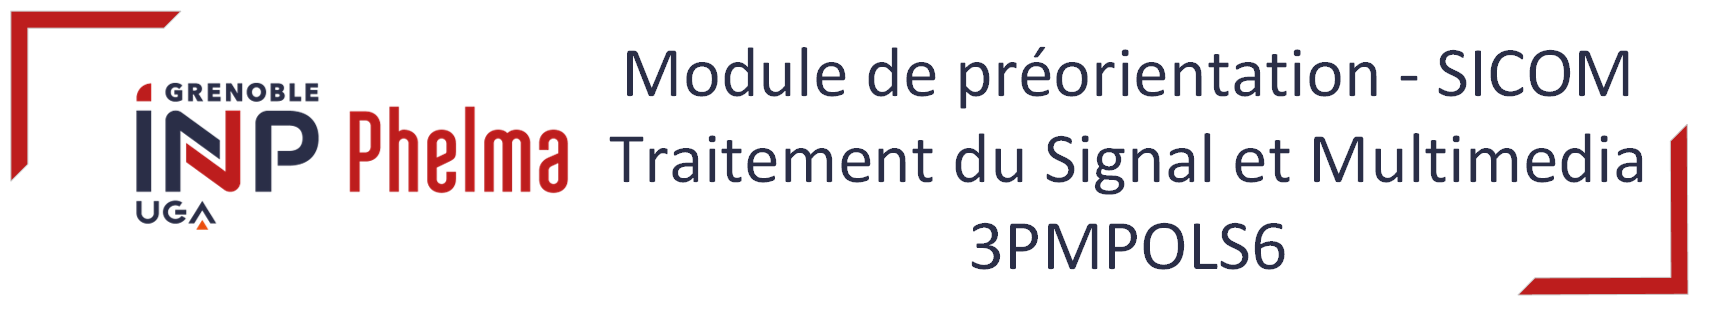</a>

**Objectifs de ce TD :**

- 🔎 Analyser la **structure matricielle** des images
- 📊 Comprendre les **histogrammes**
- 🖼️ Comprendre les **filtres de convolution**
___

## Préparation : mise en place de l'environnement de travail du TD

Cette **phase préparatoire** se déroule en deux temps :

1. **Importation des bibliothèques** Python nécessaires pour le TD

💻 *Exécuter le code de la cellule et vérifier qu'il n'y a pas d'erreurs*

Le code contient une **gestion des exceptions** pour gérer les différents environnements **Jupyter**. Pour plus d'information sur les environnements Jupyter, vous pouvez aller dans les <a href="https://bayartpi.gricad-pages.univ-grenoble-alpes.fr/cours-de-machine-learning-a-phelma/Ressource_2.html" target="_blank">ressources complémentaires</a> du cours.

2. **Récupération de l'image** utilisée pour le TD

💻 *Exécuter le code de la cellule et vérifier que l'image s'affiche correctement*

Le code contient une **gestion des exceptions** pour gérer la récupération des images qui est différente suivant les différents environnements **Jupyter**.

In [ ]:
# Importation des bibliothèques Python nécessaires au TD
from io import BytesIO
import base64
import warnings
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import ipywidgets as widgets
try:
    import seaborn as sns
except ModuleNotFoundError:
    import piplite
    await piplite.install('seaborn')
    import seaborn as sns

In [ ]:
# Récupération de l'image sous forme d'une variable
try:
    img = np.asarray(Image.open("intranet.jpeg"))
except FileNotFoundError:
    raw_image = b"/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAABkAAD/4QN1aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA5LjAtYzAwMCA3OS4xNzFjMjdmYWIsIDIwMjIvMDgvMTYtMjI6MzU6NDEgICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcE1NPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vIiB4bWxuczpzdFJlZj0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3NUeXBlL1Jlc291cmNlUmVmIyIgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIiB4bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ9InhtcC5kaWQ6QzdBRkU2RDdEOTlFRTMxMTkwNThEREIzMDY4NUY4MDgiIHhtcE1NOkRvY3VtZW50SUQ9InhtcC5kaWQ6MUEyMkEwNzA2QkU2MTFFRDkxRkVDMjM3QTZFMTBDOEQiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6MUEyMkEwNkY2QkU2MTFFRDkxRkVDMjM3QTZFMTBDOEQiIHhtcDpDcmVhdG9yVG9vbD0iQWRvYmUgUGhvdG9zaG9wIENDIChXaW5kb3dzKSI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOmVmYmE1ODQ4LWEzNTYtODA0NC04MGEwLTRiNzcxNWVkMmY2OSIgc3RSZWY6ZG9jdW1lbnRJRD0ieG1wLmRpZDpDN0FGRTZEN0Q5OUVFMzExOTA1OEREQjMwNjg1RjgwOCIvPiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gPD94cGFja2V0IGVuZD0iciI/Pv/uAA5BZG9iZQBkwAAAAAH/2wCEAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQECAgICAgICAgICAgMDAwMDAwMDAwMBAQEBAQEBAgEBAgICAQICAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDA//AABEIARgDKgMBEQACEQEDEQH/xAEvAAAABQUBAQAAAAAAAAAAAAAAAwYHCAECBAUJCgsBAAEFAQEBAQEAAAAAAAAAAAABAgMEBQYHCAkKEAAABgECBAMEAwgICwwUBBcBAgMEBQYHABEhEhMIMRQJQVEiFWFxFvCBkaEyIxcKsUJSM1OTJNTB0eFiNFQ1NhgZOfFyQ2NEZCVVtjd3eIJzg5RltSZWdtZXtzhYaJiouOgaorKjRdVGloeIeZLSdITEJ9ektJWlhihIyFk6EQABAwIDBAUFBwkOEQgHAw0BEQIDAAQhEgUxQRMGUWFxIgeBkaEyFPCxwdEjFQhCUmJylNUWCRnh8ZKy0jNTc5N0VZVW1oKiwkODs9MkNFS0NXU2FzcYw0Rk1CVFtThjo+OFpWZ24qTE5SZGd2W2hMWWpidXOf/aAAwDAQACEQMRAD8A4a6+UK/qjoaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKcDGuJcqZmsKtSw/jPIOV7WhGOZpas41pljvVhRh2a7Vs7llYWrxspJJxjVy+QTUXFMEiHWIUxgE5QGxbWl1eScK0ikllRcrGlxTpRoJTEY1g8xc08scoWA1TmzUrDS9MdIIxNd3EVtEZHBzmsEkz2ML3BriGrmIa4gIDWtveP75i21ytEybSbdjq8QXkfndNvdbmaja4f5nGs5iN+a16wMo+Xj/AJhESDd0h1kSdVsumqXchymFs9vPaymC5Y+OdqK1wLXBQoUEAhQQR1Fas6Jruh8y6ZFrfLl5aaho0+bh3FtNHPDJke6N+SWJzo3ZZGuY7K45Xtc0oQRTlXrtY7ncXVEl/wAmduWeMd0NRSPRTu16xDkGo1E6suADFJEsk/Xo+GMpJgP8nKC2637TfVifS9TtYuPc288cGHedG9rcdmJAGO6uc0TxO8NuZdV+YuXOYdD1DW0cfZ7a/tZ50Z654UUrpEZ9V3e7vSmrp9MuGQrLEUug1SyXi42B15KAqdPgpSy2WcegkouLSIgoVq9lJJ0CCJz9NFI5+QojtsA6rQwzXEghgY58ziga0Ek9gCk10+r6xpGgadLrGu3VtZaRA3NLPcSshhjaoGaSWRzWMCkBXOAUgbTSmyfhjMOEpdhX8z4oyViOelY0JmLhMn0W0UGXkogzpwyLKsI21xcS9eRpnrRVEF0yGSFVI5ObmKIBJc2d3ZPEd5FJFIQoD2uaSNigOAKKNtZvLfOHKXOVrJfcoapp2q2UUnDfJZ3MNyxj0DsjnwPe1r8pDspIKEFEIp42HYf3xSrFlKRfZn3WyUZJNGz+OkWHbvl54xfsXiJHDR6ydt6eo3dNHTdQqiaiZjEOQwGKIgIDq43Q9be0ObZ3RaQoIikQjpHdrkpvG/wXtpn29xzfyvHcRuLXNdqti1zXNKOa5pnBBBBBBCg4Gsv/ABf/AH4/+JN3cf8Am3Zk/wC0zS/MOu/4ld/uMn6mo/8Abr4I/wAsuVf42sP+sUzGUMHZqwe+iovNOIMo4gk51ou/hI7KGP7ZQH0wxbLA3cvYppbImJcSDRu4MCZ1ESnIQ48oiA8NU7qyvbJwbeQywucFAexzSR0jMAtddy1zpydznDLccn6tpmrW8Dg2R1ndQXTY3OCta90D3hhIBIDiCQFFO6y7De+STZNJGO7Mu6+Qj5Bq3esH7Lt2y+7ZPWTtIi7V20dIU9RBy1coKFOmoQxiHIYBARAdW26FrbgHNs7otIUERSY/0tcpL44eC0EroJ+b+V2TscWua7VbAOa4FC1wM6gg4EHEHA1iTfY53rVqLdTdj7P+6SAhWIJGey832/ZZiotmVddJsiZ0/fVJBo3BZysRMonOHMc5ShxEA0j9E1mNpfJaXTWDaTFIB5y2pbTxp8HL+4baWPNvLM109crI9UsXvcgJKNbOSUAJKDYCai5rLr0yhoop/wB12nd07HHpcuPe2nP7PFJ64zuJMnOsN5Fb49PUZBog/YWot0VrhK2auPmLlNZF8DnyqqShTlOJTAI3zpWqNt/a3W1wLXLmz8N+TKcQ7MiIRiqpXCR+KXhlNr34LRcx6C7mcXDrf2MX9obrjtcWOg9nEvF4zXgtdHkzhwLS1QlMBqhXd09mMO2nuNzdFSM7hjAGbMuwkRIBEy0zjDFV7v0VFyotkXgRkjI1SBlmjKQFo4TV6KpyqdM5TbcogI3bbTdRvWF9nbzTMBQljHOAPQS0FD1VxvMniL4fcm3UdjzfrujaVeyx8Rkd5e21s97FLc7WTysc5mYFuYAhQQqg0z8jHSERIPomWYvIuVi3jmOko2RbLspCOkGS52zxi+ZuSJOGjxo4SMmqkoUp0zlEpgAQENVHNcxxY8EOBQg4EEbjXWW9xb3lvHd2kjJbWVjXsexwcx7HAOa5rmkhzXAgtcCQQQQUp43XbL3IssaFzQ97fc3tMOnjGk0TLDrFF8b40PDyDtFgwli3tWAJVjRj185TRRXB10lFVCkKYTGABtnTdRbbe2Ot5xZoDxMjsiHAHMmVCcAVrkYvEjw7m5iPKEOvaK/mwSuj9ibfWxu+I0Fzo/ZhLxs7WglzMmYAEkIDSLxzi3J2YLGWnYkxze8pW47J1JkquOahYLvYzxzHp+dkCwdZj5OTMyZ9YnVVBLpp8wcwhuGobe1ubuTg2kcksqLlY0uKDaUAJStjmDmflvlLT/nbmrULHTNKzhnGu54reLO5crOJM9jMzkKNVShQYU/v+L/78f8AxJu7j/zbsyf9pmr/AMw67/iV3+4yfqa4f/br4I/yy5V/jaw/6xWksvZN3m0uvTVtuPaP3O1OqVuMeTVis1lwJlWCr0DDx6B3L+WmpqUqjWNi4xi2TMosuuomkkQomMYAAR0yTRdYhjdLNaXLImhS4xPAAG0klqADpNXNO8ZPCHV7+HS9J5q5butTuJGxxQw6nZSSyyPOVjI42Tue97iQGtaC5xKAE0isX9t/cRm+PlJbC2Bc0ZeioN4lHTUli/Ft4v8AHxEg4Q8ygxlHlUgpZvHvFm/5wiSpiHMT4gAQ46htdO1C9aX2cE0zWlCWMc4A9BygpWxzL4h8gcmXEdpzhrmj6VdTML42Xl7bWr3sBylzGzyMLmg4FzQQuCrTof4v/vx/8Sbu4/8ANuzJ/wBpmrPzDrv+JXf7jJ+prm/9uvgj/LLlX+NrD/rFJ229l/eJQa3MXK99p3ctSqhXmZ5GftVtwTlGuVuDj0zFIo+mJyYqzOLjGZDnKAqrqkIAiACPHUcujavBGZp7W5ZC0KXOieAB0klqDy1f0vxg8JNc1CHSdF5p5cvNVuHhkUMGpWUssjzsbHHHM573Hc1oJPRUadZtei0pKfTLhkKyxFLoNUsl4uNgdeSgKnT4KUstlnHoJKLi0iIKFavZSSdAgic/TRSOfkKI7bAOpYYZriQQwMc+ZxQNaCSewBSaztX1jSNA06XWNduray0iBuaWe4lZDDG1QM0ksjmsYFICucApA2mpKf4v/vx/8Sbu4/8ANuzJ/wBpmtH5h13/ABK7/cZP1Neef7dfBH+WXKv8bWH/AFimfydgTOmE1GCWZsL5ZxGrKBzRiWTsc3ChKSJR6uxmBLVDxRnYD0D8UwN+Qb3Dqpc2F9ZEC8hliJ2Z2OavZmArquW+euSOcs/4IazpWq8L1/Y7u3ucmz1uDI/LtG1No6aRdPplwyFZYil0GqWS8XGwOvJQFTp8FKWWyzj0ElFxaREFCtXspJOgQROfpopHPyFEdtgHUMMM1xIIYGOfM4oGtBJPYApNbOr6xpGgadLrGu3VtZaRA3NLPcSshhjaoGaSWRzWMCkBXOAUgbTShybh/LWFJ5pVcy4uyLiSzyEQhYGFcybSbLQp57Aunj+OazbSHtUZFSDmIcyEU6QTckTMidZsqQDCZM4A+5tLuykEV5FJFKQoD2lpIxCo4AooIXqNUOXObOVucbF+p8o6np+q6bHKYnS2dxDcxNla1rzG6SF72iQNexxYTmDXtJCOBObi7BubM4PZaOwrh7KWX5CBat3s4wxdj625AewrJ2qdBo7lmtTiJZeOaul0jETUWKQhzlEAERAdOtbG9vSW2UMszmhSGMc9O3KClQ8y868m8lxRT846vpmkwTuLYnXl1Batkc0AuawzyMDy0EEhqkAgnbSRe0y4Rlwd49kapZI+/R9kcUx/R3sFKNLgyuDSUPCOqo7rS7VOabWRtNJmZqMToFdEdFFISAoHLqJ0MzZjbuY4Th2UtIOYOVMqbVXBEVcK1YtY0ifSG6/BdWz9CfbC4bctlYbd1uWcQTtmDuGYTH8oJQ7IWd4Oy41JT/F/9+P/AIk3dx/5t2ZP+0zWj8w67/iV3+4yfqa88/26+CP8suVf42sP+sUP8X/34/8AiTd3H/m3Zk/7TNHzDrv+JXf7jJ+po/26+CP8suVf42sP+sVGVzVbQytDikPK3PtLo0n1aq6qDmHkULQ2tCEiaIXrbiAVbllkZ9GWKLU7MyQOCuAFMSc/w6zTFK2XgOa4TB2XKhzZlRE2quCbVwr0WPVdMl0xutxXMDtGdAJxcCRhhMJZxBMJQchiLO+JA7IWd5Uxpw8pdvGf8GoQzrNeDMw4fbWNV6hXnGUsZXXH6E8vGEbKSSMMrbISITlFY9N6iZcqAnFIFSCbYDF3sXWn39iGm9gmhDlTOxzFTamYBUUKnTWDy1z9yJzpJNFydrWkatLbhplFneW90Yw8kNMggkeWBxa4NLkBIKKhpntU662nAxriXKmZrCrUsP4zyDle1oRjmaWrONaZY71YUYdmu1bO5ZWFq8bKSScY1cvkE1FxTBIh1iFMYBOUBsW1pdXknCtIpJZUXKxpcU6UaCUxGNYPMXNPLHKFgNU5s1Kw0vTHSCMTXdxFbRGRwc5rBJM9jC9wa4hq5iGuICA0rcn9s/cfhKIj5/M/b9m3EUDLSIQ8VN5PxTe6DEScuLZd6EXHyVrgYlm8kRZtVVugmcyvSTMbl5SiIS3Om6jZMEl5bzxRkoC9jmgnagLgMeqsrlvxG8Pecrt9hyhr2jarfRR8R8dne21zIyPMG53Mhle5rMzmtzEBuZwCqRWkxdg3NmcHstHYVw9lLL8hAtW72cYYux9bcgPYVk7VOg0dyzWpxEsvHNXS6RiJqLFIQ5yiACIgOmWtje3pLbKGWZzQpDGOenblBSrvMvOvJvJcUU/OOr6ZpME7i2J15dQWrZHNALmsM8jA8tBBIapAIJ21n5S7eM/4NQhnWa8GZhw+2sar1CvOMpYyuuP0J5eMI2UkkYZW2QkQnKKx6b1Ey5UBOKQKkE2wGLu660+/sQ03sE0IcqZ2OYqbUzAKihU6ag5a5+5E50kmi5O1rSNWltw0yizvLe6MYeSGmQQSPLA4tcGlyAkFFQ0z2qddbT/1DtO7p8g0hvkyhdtOf7vjh22lXjXIFQw3kWy0hy0gnb1hOOm9rhq49gVm0M+jXKLs5XAlbqt1CKCUxDAF+HStUuIRcwW1w+3IPfbG8twUHvAEYEEHHBDXCat4peGWgaw7l3XeY9BsuYGOY11rPf2kNw0yNa+MGGSVsgMjXscwFqua5paocFYDVCu7oaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiivQL+rZf5QS0f8WvI3+7XF+u+8Of8/v/AHs/9MyvhD8Yf/uJtP8A6jtf8mvajV67H+VU7pv/AKyH/q5Yh1m88f60XX9j/tMdejfQn/8ALHyz/wC8f/Fr6vc/lXt+p/dP2ayuALygkpA5MwzCQRXZ0kVloKcLARr6r2hgDhB0kSUq1kaNJBscUzgVdsURKYNwH266sIdU0c2E/wCtywgdhQFrh1tKEdYr8UeVeetW8NPFaDnrRHEX+m6q+XKpAkj4jmzQvylpLJonPieAQrHkKNteE/00sbW/Dnq49vuKb/Fqwt0x3nefp9mjVCqgDeYgIa0RzwW51kkTOGS6iHUbrAUCroHIoXcpgHXh/LdtNZ82W9rOMs0c5a4dYDh5ujpFfth9I3mPSeb/AKKWu806FKJtH1DRoJ4XhMWSTQOAchID2rle1Va8FpxBqen6zr/4XWBP+Li0/wC+bkDW54lf53g/ew/TvrxL8W9/uv17/T//AOEt6wO379Yc701bHhHDRsYdrwVhSbxtjIz8KXlf58ECd/C1UXYOhzWMf83+Xjz9TyvR63HpcvwaSw8QNZ4kNnwrXhZmMXK9UUN/ZEVOryVNz79Ajwfg0nWubmalzKdSZb3d4Gm4suFxQySYNI+b83DzYJnzZcMy413t9ZH1DM0+nnjDDl1wtWMX2eVyHfJurzTfKELa5qPax8bXvmyC0WlVLrSnCLw7j4TmVVXIJOAEAeOu65w5gvOX7aGazbE50jy05w4hAFwyub8NfD/0SPAblDx65o1bROcLnUra1sbBk8Zs5II3l7pRGQ8z29wC1CoDWtK70wrxg9+PqIZq9Q210G4ZprGLqxJ46r0pWoRDF8LbIVi6Yy0knKOVZVK2Xa6uF3ZHCQAQyKqBAJwEojx147rvMF7zBLHNeNia6NpAyBwCErjmc74K/X3wQ8AeTvAPTb/S+T7nU7m31GeOWQ3kkEjmujaWNDDBb24AIcVzBxXYRsr2Ueov3z5a9P3sE7bMy4aruOrNZ7NZsO4yfsMmxNlmYFKBmcL3e1OnbRrVbdTJBOXTkKY1Imod0oiCKioCkYxiHJ7BzDrd3oGg215ZtjdK50bCHgkIY3O+pc0qrRv6cK/Ir6PPgryt47eNuv8AKPN1xqFtpttaX1411m+GOUyx39tCGuM0Fw0xltw8kBgdmDSHAAh3OX09v1gLuB7je6zFmA88Ylwsyq+Wp37HxljxXG3yuTdcsLtg/Xhnb1parzfWU7GPpRug0VSJ5A7ci5l+qp0+ifndA59v9R1SKwvooRFK7KCwOBBQouZzgQSg3IqrglfQfj59BXkTw88MNS565I1XWH6jpUInfDeutpY5og9jXta6G3tXRPYxzngnih5aGZW5s4gt+sadtdEwz3Y0HKdCh2FdR7g6PKT9uh4tqgzYLXyozCMZN2RJs35EkXFijJZgd1ypl6zxJVcwmVWUHWJ4h6bBZ6rHdQANFwwlwGAztKE+UEL0lTtNe0/i+vETW+bfDHUOVtblfcHQbyOOCR7i5wtrhjnxwknEtifHJkUnKxzWABrGiuKfbbheZ7is/YewZAg4CQynkOr00zlqCJloyNl5VujNzQA4EERTgoXzDw/NuHIgPAfAeM06zfqF/DYx+tLI1vYCcT5Ap8lfY3iNzjaeH3Ier87XuXg6ZYTTgOVHyMYeFHhj8rLkjCb3DEba+nRbsd4tvWMLp2rOTRRa/KYYNRJWmpLFO+isbW+DnqBEOvJJroO02KqMK8QbLFOmPVZm5TlMXcPpWW3tZ7Z+llOGYcpbvDHAsHWmBAPVX83+la9zJonMVn4kQ8X2+LVhcx3BHdddwSR3LxmILS4F8bnNIODwoINfLiybj+wYnyNfcX2xv5Wz46uVlo9gQ5TlKnM1aZeQkiCYKAU4omdMjCQRD4iCA+3XzJc28lrcSWsuEsb3NPa0kH3q/pZ5a1+w5q5dsOZ9LObTdQs4bmI4LkmjbI1U3gOAPQVFeyv9WH/8FfuF/wCMCl/3ualr2Dw0/wA13H74/qG1+RX4yH/eloX+gB/ldzXIb9YE7NQ7ee7o2bajCeQxh3OovriJ2aBSRsVlmPOgnkeN5UGaKLVWwrOm06HUUUUcuZF2JdipCUnJc+6P836t7bE1La5V3UJB648uDusk9FfVv0EfF38PPCv8CtWmz8yctlsAzFXvsXqbV2LiXCFH23da1rI44QcXKexuTf8A/mnjf+LViX/vr0zXXXf+7cfveP8Atja+ROW//wDodJ/9TX3+S3FcZf1dP/KNR3/AplH9iv65Dw9/1hH7S/4K+wPxgX+4A/6bs/0s9dM/Un9c/u17Oe9XNHbhjLHnbrO0fHX6Ovkkre6lkuTtbr7XYnol7kvmr6v5crEQv0JezuE0OixQ5WxEym5zgZQ/Scx876rpGszadbR27oI8iFzXl3eY1xUiRo2uKYDCvnb6PH0K/Czxb8HtH8QeY7/mCDWdQ9r4jLae0ZC3gXtzbMyNlsZpAscLS7NI5XlxCAho5jZw/WDe83PuHcnYSuOM+2KNqmV6PZKDYpCtUzKrOwsoe0RbiJfuYV3KZomY1vJotnJjInXaOUinABMmcNwHmr3n7WL+0lsporYRSsLCQ16o4IUWQhe0Gvo/k36B3hDyPzZpvOOk6lzJJqel3sN1E2a4snROkheJGCRrNPjeWEtAcGvY4jY4HGow9h3qu9xHp51C+UrC1MwvZ4rIdkj7RNOMoV28TUg1kI2L+UoIxatUyLSm6LM7f4jlVSXOJ+IHAOGszQuadQ5fikhs2QubI4OOcOJUBMMr2/DXo/jd9F3kDx61iy1vnC81i2urG2dBGLOW2jYWOeZCXie0uCXKUBa5oTcuNezX0+e+TLPdh2AWburyJXsdwuQ4b9MPlYalxNljqYp+j5i5cw3mI6cttjnDeZURAHXLIl5w36fT8dew6Brd3qugu1S4bG24bxMGghvcGGBcT24+avyD8evBrljwt8c4vDLl+e/m0F/sKyXD4n3H99ZeIjo4Io8MxyfJYfVZq8qncP6+/eJ3LYTyRga9427aYmoZRrbirz8lUqdlFhZGce5WQWUWh3kxmSei27wDty7GXZuCbCO5B9nl+oc+avqVlJYzx2whlblJa14KdSyEecGv095D+gv4SeHnOOnc7aLqPMcuq6ZctniZPcWTonPaqCRsdhG8txxDZGnrrh7ria+0K6R+kD/lK+0T/hNU/wBy9h10fKX+slp+2f1Jr51+lp/5dOav3gz/ACiGvS/6wXrBdy3p+9y1Hw1hqj4Ms1Ys2DK1k1+/ybWr9MzyU9M37JtVdNGjqq5NpkenEJx9ManTTO1UWBZRURVMUxCE9I5u5u1LQNSZZ2bIHROgDyXhxKlz2/UvaERo3dONfnd9E76J3h147eHV7zdzde61balba1NZtbZzWscRijtbOYOcJrO4cZC64eCQ8NyhoDQQS6TPZ/3C459bfsUytVM24xhq5MklJXGd8hWIHlYaItB4JpNU/JuPXUmLiRinceaTTcNCrKHcs3zNUhjqomKdXS0jULfnTQ5Yr2MNepY4DEByK17FxCKoXEEHaNvmnixyFzD9Djxs0zUeT9SluLfhR3lrK7uSPh4jo57S6axGvDsjmSZQGSRSNKNcrW+SX0qq5I0/1Ue2epTAIll6tmubrkqVucyiBZGEh7VGPgQUORI6iIOWpuUwlKIl2EQDw15RytG6Hmi2if67ZiD2gOBr9TfpP6lbaz9GDmHV7PN7JdaRBMxQhySy272qASAcrgoU47zU6P1mn/w8cS/8Ueh/9+TPetzxJ/z7F+9G/wBslrxv8XL/ALkdV/8Aqq5/yDTKev8AVeP9+Xuu/wCDLHv+6qa1d8Mv8Muv2tn6Y1xP4yn/AFX5V/f95/aYa5HZr/yvuW//ALZHff8A1npXXJ3n+tsv+kXf2419U8qf+UvTf/1dW/8A4MyvWl60Pqa549Of/Bs/QlUsR2n9MX6YvtN+lOBuU35H9Hv6LPkvyL7JX2j+V819uHfmvMea5+mj0+nyn6nqvOXMt9y97N7EyJ3G4mbOHFMmREyub9cVVd2yvy5+iB9HLkj6QH4RfhldarbfNPsHB9ilt483tXtvE4nHtrhU9nZky5EV+bMoy8M//eae/H/uS9o//wBQeZP/ANPeuJ/2k67+xWn6GT+619p/k5fBH+Feavumw+9lcbqPfpjK3eNT8o2JtGMrBknuYr9+nGcKi6bw7SYuOUmlik20S3fPJF6hGIPZE5UCLOF1SpAUDqHMAmHj4bh91q7LqQASSXIeU2K56lFUopwxNfWWv6FacreDt7yzp7pH2GnctTWsbpC0yOjt7F0TC8taxpeWsBcWsa0uUhrRgPTn+tIf3kdm3/ZVmv8A6UY016V4nfrVn9tL7zK/OL8Wp/n7m396WH9suq8emvI6/WivQL+rZf5QS0f8WvI3+7XF+u+8Of8AP7/3s/8ATMr4Q/GH/wC4m0/+o7X/ACa9rvn6+dEjMv8Apx5UmoxmaTmcAZSx/clCppALqMdJyLKoTagDzcxmydUyUZ0pyiYOjsYwAJB5e757gbd8uyvaFfbysd2Yhp/pXrXwx9BzXbjlT6Qel2lw8RWeuaddW+JweCx08Q7TPaNYPssAccYG/qz1MiKRg3vC7jpsDlauLVV6N5s5E+VpHY0qcndpxFkfYFDLyP6QGfVIIiBhbocoAO++F4bwshsrvUX+qXNb5GNLinbnHmFe3/jGdZutX525U5AtUzMtJrlAqufeTtt2ZtyM9kflKYZ3rgiG/rSH95HZt/2VZr/6UY00eJ361Z/bS+8yk/Fqf5+5t/elh/bLqvIRBwkrZZuHrkCxWk5ywSsfCQ0a2AouJCVlXaLCOYoAcxCCs7eLkTLuIBzGDcQ15Mxj5HiNgV7iAB0k4AV+rt/fWmmWM2pX7xFY28T5ZHnYyONpc9xRSjWgkoNgr6jXbTi+m9teDMCdryUnGGk6fiNjCNotyq1B7ajVBhAM8g2JFjwI7SXsdlTcPOQokIeRLuGxg19Nabaw6bYwaYCM7IQE3uygZynaVPbX80/iFzLq3iFznrfiPJHIILzVXyuc0Oyw+0PldbRZvqUiiLY1KkRHeK+cN339vyna53f9wODCNBZQ9JyNNhUUuVcCmoU+clmoShTOVV1TiaoTDIDiKig9QDAJjCAjr541yw+bNXuLFEYyQ5ftT3mf0pFf0G+B3Pg8S/CXQedHPz3l3p8YuDgvtMSw3KoAAs8chAQd0goFqJWsmvVqGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiivQL+rZf5QS0f8WvI3+7XF+u+8Of8/v/AHs/9MyvhD8Yf/uJtP8A6jtf8mvajV67H+VU7pv/AKyH/q5Yh1m88f60XX9j/tMdejfQn/8ALHyz/wC8f/Fr6vZH3V94DLstxB2P5Esjhq0xxes74hw5lZ+6BIpYijXjCOUV/tELpdwgkxa1S1wcVKvFB5zGYMl0ylE5y7ev6pq7dGtLK4kQWz5443noa6N+PVlcGuPUCK/Irwu8J5/F/mbnHQdOa9/MNjoV7qFkxq/KXFtqFkODlDXFzpoJJ4Y2hPlZIySADUHe8zs3bVP1bewTvVpEcQkHlXJjfHWWDMW/8mJfISg2Rel2ddVu2FIVLTUY5VkqooqHxQ6IlAxlTDrF1jRxFzXYazCO5LJkf9sGOyu/omhP6EdNey+E3i5Jqf0WOefB3WZCbvTbAXdjmOPs8l3ALmEAuVIZ3tla1rf6/IpAaK5Q/rOv/hdYE/4uLT/vm5A1yniV/neD97D9O+vqX8W9/uv17/T/AP8AhLeuBnb1/v8A2Dv+GDGf+7SE1wmn/wCHwftzP0wr7j8Q/wDd/rv+h73/ACaSvXD+tA/7wPbB/wAMFs/3F69Y8TP8Atf2536Wvyu/Ft/7wOY/9Dxf5S2vF9rxyv2Cr6MHeV2C/wCMY7Iu3fCX6WP0O/ZZ/iTKf2m+wn6QvPfJMR2ipfIvkv2yo/lfNfbjzHmvNqcnlen0TdTnT+hdY0H8IdFt7Li8HKY35sudUjc1EzN+uVV3bMa/n58HPHP/AIf/ABf1znL5r+dvaYb2y4PtPsuXiXsE/E4ns9wqez5cmQLnzZxlR0D+1r0OMD+njlWF7wc+937GzVzCy5LFEOLJTITCNGgJx2i6gY+Vtlhmck3QsgUj+YQ8g2TUYio/BIgiv1ASHD0vkmx5fum6vf3YdHDiFaI2gnAFxL3LiQgwxTbsr3DxO+mfzv4+8sS+E/I/Kj7a+1ccKRsVxJqNzLG0tlLIIo7S3yd2N3FcWy/J5iMmUurhB62XflSO+LugiFcRujSuHcL1dxRqdZVWThipc5eQk1JS22tog8Kk8Rg3jlNs1YFWTTUUQZdcSl6/IXhuc9dg1vUwbQrZwtytKJmJKud0ocAF3Bd9fbf0NvBDWvBnw3mPNbOFzbrNy24nhzB3s8bGZIIXFqt4oBe+TKSAZAxVYSZPfq2nbulkfu5veepdkRxDdvGPzpwqqqBzlRyBlP5jW4ddJUwdADNqbHT4CHE5TqpmDbbfWl4c6eLjVn3zwrLePD7d6tH9KH+ivN/xh3PztA8LbDka0eW3evX6yAEY2tlkle0jb3rh9sRu7jga6JYP7/QtP6wVmehKWAi+NrdSZLtQqqaJQUjy2jCqC9xRcOXjlYTlOa/MrczaGa8qCx5dMvTOYwL66Gy17i8/TQZv72ewwN6M0fe/TiQBMDmGG+vn/nPwLOmfQS0fmAQFvMNrfN1qck97gaiRbo1rQiG2NhI8PVzRC45mhY65FfrBvb2phvv8ncgx7FZvVu4mnwGS2S4An5EtqjW5abd45sJSlU8yL6BbyjgD8w88uAgblECE5Pn7T/Y9edcNHyVwwPHRmHdcPOA4/bV9W/QM59bzZ4GxcvzvadT5fvJbVwxzcCQm4t3uXBEkkhaiYQYhQp7Lfqw//gr9wv8AxgUv+9zUtdh4af5ruP3x/UNr5F/GQ/70tC/0AP8AK7mnZlggvW39HwsiinGue4GqRB3fRbpNwcwHcrimMEHzJJuh8zWio3KcM8EUUgE6iUXYUhEBUT2C2/JzpyjmCG/aPNMwY9KB4P6F431ylsb/AOhr9K/gPMreRp5sqkuSbSL1/dcSeGJH2b2944NNxauA7ppv8qILtf1a5m1dIqtnLbtvxSg4brpnRXQXRy1TU1UVklAKokqkoUSmKYAEohsPHVa7BHhwAdvs8f8AbG1tcryRy/jC3yxODoncy3pBBBBBtbgggjAgjEEYEVxg/V0/8o1Hf8CmUf2K/rj/AA9/1hH7S/4K+w/xgX+4A/6bs/0s9dve+z08PSWzp3VZTyn3Nd836Hc32n7EfbbHH+E12049+zvyTHNQrlb/AOpDIFJl7dEfN6jEMH/8rcKeY8110uVFRMpe01zl/lS+1SW61K+4N67LmZxoWIjGgd17S4K0A4nFVGBFfG/gn4+fSl5K8MdM5Z8OOSvnbky29o9nu/mjV7ri8S7nlm+XtbiOCThzySx9xgy5Mjle1xPI/vs9PD0lsF9quU8p9svfN+mLN9W+xH2Jxx/hNdtOQvtF87yNUK5ZP+pDH9JiLdL/ACioy79//JHCfl/K9dXmRTUKblNc5f5UsdLlutNvuNety5WcaF6q9oPdY0OKNJOBwRTgDX1T4J+Pn0pedfE7TOWfEfkr5p5MufaPaLv5o1e14XDtJ5Yfl7q4kgj4k8cUffYc2fI1HuaR51tee19+17ofRc/yM98/+yc/6Uv9e3cm/wCp0n9m941+Jn0w/wDzb2//ALo9+OvC9rxGv2zoaKK6R+kD/lK+0T/hNU/3L2HXR8pf6yWn7Z/UmvnX6Wn/AJdOav3gz/KIa9L/AKwXo+9y3qBdy1HzLhq8YMrNYrODK1jJ+wybZb9DTys9DX7JtqdO2jWq4yucepEKR9zakTUO6TWFZNUBSKUpDn9I5u5R1LX9SZeWb4GxNgDCHlwKhz3fUscERw39OFfnd9E76WPh14E+HV7yjzdZa1c6lc61NeNdZw2skQiktbOENcZry3cJA63eSAwtylpDiSQ2RPalgvG/oc9heU7TmzJsHaLI7mJbIlrfsOaKjLJdTwDSFpmLcdNJEreWmFnnygiaKiyRF1XDpw4UIg2TEEtDSrG35J0KWW9ka6QkvcRgC5Eaxi4lUwXFSSUGzzvxQ525i+md436bp/J+my21kIY7SBju++K3ErpJ7y7c1WMDeI5zg05WsZGwF8hV/kx9KafkrX6pvbHaZlQq0vZczzE/KrEAxSKyUzC2mRfKEKYxzFKd05MIAJhEAHxHXlXK0jpeZ7aV/rumJPaQ4mv1H+lDp9tpP0YuYtKswRZ22kwxMB2hkc1uxoOz6kDcK9XHqa9jvppdy+eKle+8rvA/wf8AJ8TiOBqUFTf8IDAWKfmdDYXK+zEXZvs9lSpT1heecsM9KNfOorFZqeS6RCAqisY3qXMuict6lfMn1i79nuREGhvFiYrQ5xDke0naXBdmCbQa/Mf6OXjP9Irw65IutE8I+U/n3luXVZZ5Lj5r1O9yXLre2jfDxbKeKJuWKKF/Dc0yDiZicr2ALb0vOzf09e2C5ZXmeyzup/whrDa6xXoy8xX6ccI5a+zcNHyr11EyHkcT1eAfQ/nnyyifVeGUSV5OUgAYBHU/LOj6Bpk0r9GuvaJHtAcOJHIgBKFGNBCnprE+kr4tePHiTpelWvjDyz8wWVrcTPtn/N2o2PGe9jBI3NezStkytDSkYBaquUEV4981/wCV9y3/APbI77/6z0rryO8/1tl/0i7+3Gv1h5U/8pem/wD6urf/AMGZXsu9U7tK7Du6T9BX+G13M/4On2G/Sd+jL/8APNhvEX2x+036PPtn/vtVuw/aH7PfZ6J/uf0fKee/P8/WR5fYOaNK0LU+B89XPs+TPk+UjjzZsmb9cBVEbs2LjtFfkf8ARm8U/G7w0+e/9jfLn4Qe2+x+2f8AZ9/fcDg+1ez/AOAyxcLi8Wf9dzZ+H3EyPXkf/ilvQd//ANmX/pm9m/8A+jfXKfgpyN/CX/3i3/UV9Uf8Uv03P/8AXP8A8A17/rdeX7t6/wB/7B3/AAwYz/3aQmvMtP8A8Pg/bmfphX6Q+If+7/Xf9D3v+TSV6q/1pD+8js2/7Ks1/wDSjGmvUfE79as/tpfeZX5kfi1P8/c2/vSw/tl1Xj015HX60V6Bf1bL/KCWj/i15G/3a4v133hz/n9/72f+mZXwh+MP/wBxNp/9R2v+TXtejubIp3GR3rUdqa7wruTZSkanXWwlKZWJJlTsxxaFVEEytD86BLxTHrog7qqioJwACgBNehv/AO0W6zpSq8EJ1Z7dmX+maTX56Whb4fT+EPidHHlt3ROfKcUkdZcwXvGxzYH2aaJhHdCZTiS6oJdo4OO2L0MMQSCiaSFkz7mTHwlRIodMFm+Ye5is1hNRRUvxKKqYoiwX5QACiYATHcAEw4ekrpnJELtktxMz/wBZM1v9rC17R4tcHxJ+mdrMDHOOn6JpN3iQCjtO0eaYgDcPbSWrtQ5tuFNv+tIf3kdm3/ZVmv8A6UY01W8Tv1qz+2l95ldV+LU/z9zb+9LD+2XVcavQ67d0u4P1D8SGlGRHtWwqhJ52siaqB1kRUoqjFGmlMOwolMXIsxDqCCnwnSSOGwjw1x/JOnjUOYIswWKFZT/Qpl/py3yV9c/TS5+dyJ4B6oy1eWanrL2abEQQClwHOuOsg2sc7cNhc2u5feR3+hj/ANdvtMoaNgIljvEkJH4VvyCBQWRSsfc6g3GbUkVnKxWrePiU3VLfLqNwIsiaMUBQyoAKBe31jXvZ+eLSAO/veJojd2zbV6h8mSn1u/ZXxX4S+BZ136E/NWvvgJ1/U53ahaklFh0cnJkDRmL3/wDaMTQ9Wu4rcoae+Yh/rNnb2pXc04M7mYlisEXkumP8YW10kCflEbXj94eXr7l0PKCxX89WbIogT4jEMjC8AKJRE+T4lafw72DUmDuyMLHfbMKjylpT+hr1j8XFz62+5T1vw4unt9p0+7bewArmMNy0RzAbskUsTHHAHNcbSD3fL1rzKv0roaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKK9Av6tl/lBLR/xa8jf7tcX677w5/wA/v/ez/wBMyvhD8Yf/ALibT/6jtf8AJr2o1eux/lVO6b/6yH/q5Yh1m88f60XX9j/tMdejfQn/APLHyz/7x/8AFr6u+X6w5/kxu2T/AIwOF/8A1fc167vxA/1atv3xH/apK+GPoB/+YvmH/QF//wCJ6dUtfRU7rYLvQ7KaVVL8o3n8q9scnVaNaCyax3cs4TqhEnuJcheYVUO+M7koONBqu6OoKrt/GvRU5iKmKbV5M1Vms6MyKdHXVsWtcu3u/rb+nEBCd5a7pryv6YXhdeeEHjFeahogMHLHMTJrqDIA1g45Lb21QANDY5XFzWAIyKWFEIBHDv8AWdf/AAusCf8AFxaf983IGuJ8Sv8AO8H72H6d9faH4t7/AHX69/p//wDCW9cDO3r/AH/sHf8ADBjP/dpCa4TT/wDD4P25n6YV9x+If+7/AF3/AEPe/wCTSV64f1oH/eB7YP8Ahgtn+4vXrHiZ/gFr+3O/S1+V34tv/eBzH/oeL/KW14vteOV+wVe0z1/v8lT2l/8ADXgb/wBXHMuvZOff9V7T9ui/tMlfjx9A/wD8y3M/+hNR/wDFdPrN9B7vcbd3WDcj9jvcy+a5MstIrb77Po30yM8pknBM+QsNNVaeLLuHbqyL0qRfeWUOsUd4mQaJAA+WOcXcja0NWsZNE1IiSRjSmbHPEcC0rtykp9qQN1Q/Tc8GX+FHOun+Mnhyx+naZe3DeIbZYhZ6lEeJHLFww0Qi4Y3OwNOE8UzsA9rR5r/U97LXnYt3b3zEbFB4bG01079hyUdC5VF7jmyOXYx0Yq9dHWWeyFRkWzmHcqnOKi6rHriAAsUNeccy6MdD1aS0avs570Z6WO2DtaVaTvRd9foj9Gvxhi8a/Cuy5ouHM/COBbW/YMoS6iDc0ga0ANbOwsna0ANbxDGFyGvVV6PsDT+wf0l57uhyqyl2zW4NLr3IXBvFptHlgfVNg0SgaFBV9pIPYiMVf2KCgGy8cku5bpKO5gAVXTIbdP1LlGOHQuVHandAgPDpnJtyjBoCkBSACFIxdiRX5ifSvv8AVfHH6UsXhzy0+J0lrJb6Rbl+ZsTZnOL7mSVzWveGxTSyNlc1jiI4O6xxCOixE+tN6K0Dc22R4PsAtkLkNlOmtLO+xPar2nx1zaWY7o749ibWhnlRGcQnTvlDLC8IuDgVTCfn5hEdZbecuTWTC4ZYPFwHZswggDs21c2dVXFVWvULr6Hn0wb7Rncu3vPVpNy+6AQutX61rb7cwgBoiMLrIxmMNAaIy3KAAEQU9/6wdiivdxPYLibuyoYIyqGL5upXWOm02pVF3mIs4x8PFqKJrodQyaTifd1xzxMKQJlOO++w6u8/2seoaDFqsCEROa4HpjlAHv5DXE/QO5pv+QfHPUvDHWs0TtTgntnxlyBt9p7nyBQUUtjbdxjDMrgOkVpv1Yf/AMFfuF/4wKX/AHualpnhp/mu4/fH9Q2rv4yH/eloX+gB/ldzXKL9Xq7zCYD7qH/b7cJUzXHPc6nGQMYLt0crCFy9BA8PSXSSahxQbGtzZ65hlemQFHTtaPA5hIgXbluQNY9g1Q6fMUt7lAOgSD1f0SlvWS3or6f+nt4RO538NI+ftJiDtf5bL5JMrRmksZconBIGZ3s7msnapysjFwQFeV9L/rFQENWPSv7roevxrWJikq/XHiMeyJ0miC8tmimy8gKCICJEE15B8qoCZOVNPn5SFKUAKHo/OEbI+V7pkYAajcO2VpPpNfnR9E28ur/6S/K91evdJcG6kaXOxJDLGdjVO8hrQFOJRSSVNeXf9XT/AMo1Hf8AAplH9iv68z8Pf9YR+0v+Cv0q/GBf7gD/AKbs/wBLPTJ+ux/lVO6b/wCsh/6uWIdUueP9aLr+x/2mOu1+hP8A+WPln/3j/wCLX1cj9cnX1TQ0UV7ofRc/yM98/wDsnP8ApS/17dyb/qdJ/ZveNfiZ9MP/AM29v/7o9+OvC9rxGv2zoaKK6R+kD/lK+0T/AITVP9y9h10fKX+slp+2f1Jr51+lp/5dOav3gz/KIa68/rDndB3LYU708YVXDXcPnPElYkO16l2B/XMZZav1CgXs86yvmuOdTbuHqtgio9zLuY+KaoKOTpmWOi2SIJhKmQA6zxA1PUrLWYorO4niiNq0kMkc0E55AqNICoAF6hXyv9Ajw28OucfB/UtT5u0DRdV1KPmW4ibLeWNrcytibZae8Rtkmie4Rhz3uDAcoc9xAVxJ81mScy5fzNJN5nMGVsk5Wl2fW8pK5JvNnvUk18wgwar+XfWiUlHSHXaxbVM/KYOZNskUdwTIAec3N5d3jg+7lkleN73Ocd29xPQPMK/Q/l3k/lLlCB9rylpenaXbSJmZaW0Ns12UuIzNhYwFC95CjAvcRi4rNr0gf8pX2if8Jqn+5ew62uUv9ZLT9s/qTXjH0tP/AC6c1fvBn+UQ10G/Waf/AA8cS/8AFHof/fkz3rf8Sf8APsX70b/bJa8M/Fy/7kdV/wDqq5/yDTKev9V4/wB+Xuu/4Mse/wC6qa1d8Mv8Muv2tn6Y1xP4yn/VflX9/wB5/aYa5HZr/wAr7lv/AO2R33/1npXXJ3n+tsv+kXf2419U8qf+UvTf/wBXVv8A+DMrt9+tOf8A9iv/ANk7/wD49a7XxP8A+Y/2b/kq+N/xZv8A+m3/ALn/AP5pXke15PX6pU8Hb1/v/YO/4YMZ/wC7SE1b0/8Aw+D9uZ+mFcd4h/7v9d/0Pe/5NJXqr/WkP7yOzb/sqzX/ANKMaa9R8Tv1qz+2l95lfmR+LU/z9zb+9LD+2XVePTXkdfrRXoF/Vsv8oJaP+LXkb/dri/XfeHP+f3/vZ/6ZlfCH4w//AHE2n/1Ha/5Ne12z7VMnkr/r4epFiZwIpo5KxPh60tVOf4VJjGeN8Pt27LpAmYRUViL6/WA/MUpStzAICJg27PS7nh896jaHZJFG7ysZHh5nE+SvjbxO5bdffQe8O+amYu07VNQgIT6i8vL5xcq7A+1jaiKS8HBDSH9Zp9V8H0T0v+1OjqqRUB/hQ4vfxcOmsAKr1bDQQNXbfMugqiVch3+QW6xgMiKajlPqBymTANQ84OisoNM0qDCP2phA+xjRuP6MeXsrU+iRbalzjq3iV4mawBLeDla+a+QjZPf8SY5FBQ5LaRqhyhhLSocaYr9aQ/vI7Nv+yrNf/SjGmqHid+tWf20vvMrvPxan+fubf3pYf2y6pa/q3GE43FvbJn3u0uRflSGQrEpAxks8ObyzXHGH459IT0yiQpdit3VmmHyK5h5hEYgvKBdh5p/Dqyba6bPqs2AkcgJ+sjBJP6IkH7WsX8YXznPzL4k6J4X6UeK7TrYSPY0d43d+5oZGTvIhjhc3Z+vFV3IuzetN6K10t7/INx7ALZbL7KyKMvKXezdqvafPW+Slm4Ilbyj+yymVHUy8kUCtkwIuosZUoJl2MHKG0MvOXJs0puJrB75yVLnQQFxPSSXqtbenfQ8+mDo+ks0DSeerS10KOMxstoda1uOBrHLmY2Flk2NrHZirQ0AqVGJqcXqVNsf+pL6QFiz3iZlIuWEVWGXcljtOwRrEtkhjY4dyjTIENJtoh/NNWc6wqRJ+PcptXbhErtPYFDkDmHa5kFvzHyi6/tAS0N4zFAUZFzgoTiG5wUJC768V+jxNrv0evpXW3JPND2Nnku3aRd8J7uFILsM9mka6RsZdE6c20zC9jHFiHK1xSvAjrwiv3RoaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKKGiihoooaKK6Bemz31f4vTuClM7fot/S98yxrY8efZb7b/YDo/aCaq8x84+efZC69Tyn2b6fl/Jl6nW5uoXk5Tb/Lmufg/fm+4XGWMsy5su0tKrld9bsTftrwj6RHgn/t75Ei5K+c/mnhalFd8b2f2peFHPHw+Hx7dM3GXNxCmVMpVQ2vfZ3T/4a3dVlPua+wn6NP0l/Yj/AKiftP8AbL5L9jcc1DH/APfJ9nqp8y+ZfZTzf9gIdHr9L4+TqHra5qnzzqkupZOHxMvdzZkysazajVXKuwbU666PwT8M/wDY74Y6Z4ce2/OPzd7R/fHB9n4ntF3PdfrPFnyZOPk/XXZsubu5sonz6h3rEf4evbFjHtx/wdf0U/o5yBS719sv0ufbn5z9kMfXaifK/s9+jGnfL/mH2x811/PL9Hy3S6Z+p1Cb3MHN/wA+6bFp3s/C4cjXZuJmXKxzUTI1FzKqnYleF+AP0Sv9hviLqPP/AOEHzp7fp89twPYfZuHx7q3uc/F9suM2X2fJl4bc2fNmGXK6Kfpv+oFc/Ttzm/yxAVT9I1Ws1TkqhesbLWdSotrMyVMR/BPkp4IG0JxcrXZxumuisMe5MZudw3DkBwZQuVy7r83L18bqNnEicwtczNlzDaCqOQg4qhwUb69P+kL4D6P4/cmR8s311836pa3TZ7a7EInMJTLKwxcWEvZLGSHNErEe2N+OQNKk9Tr1Dv8AGO5doWVP0Qfob+w+OEsf/Ift/wDpD+adKz2Cx/N/mn2Jo3kub570fL+XW26XP1Pi5Sycy6/+EV4y74PByR5EzZ17ziq5W9KInlrO+jf4Bf8AD5yvf8t/O3zv7bf+08T2X2XJ8jHFkye0XOb9bzZszdqZcFMBseWz7B3+jXnyHzX7GXCs2z5X5ryPzL7OzTKY8h53yzzyfnPJ9Pq9FXp83NyG25RwreXgTsnRcjw5NioQUWvcuYtJ+f8Al++0LicL22zmgz5c2TjRujz5Vbmy5ly5mqiKNtdcPVB9Xr/GR0DGFG/wev0M/o3uEtbPmn6Wf0ifOfmkL8n8h5L9GlF+XdD986vWX5vyeQPytdXzNzb+EUEUHs/B4by5c+dVCImRqemvlb6Nv0UP+HvmDUdd+f8A53+cLNsGT2H2Xh5ZBJnze2XOZUTLlam1d1cX9cdX2DXabv8A/V+/w5+1TEvbJ/g8/ou/RbdqHcftt+lr7bfPfsRji54/+XfZv9GdR+WfM/td5vrefcdHy/S5FOp1Cdlr3Nvz5pcWm+z8LhPa7NxMy5WOYiZGouZdpRE66+O/Af6J3+xLxL1PxE+f/nP5xsrm39n9h9n4ftF1b3Ofi+2T58nAyZeE3NnzZm5cp5u9qncfd+0juBxl3B4+5F7BjmwpSasQu6WaMLNAu0VoyzVSTXblUUSjrLAPHDNQ4EOZHqgoUonIXXO6XqM2lX8WoW/65G5U3EbHNPU4EjyrX0L4oeHmjeKvIepcha6rbLUIMokDQ50MrSHwzsBRXRSta8BRmALCQHGui/qeeq/S/UkpeOYp72qfohv+MrBIvoDIiGZ0r0orWZ5kVCw1F9BjiKmqLtJB+xYO0VvPfyVVqYCpmBdTXQ8zc0w8xwxtNrwZ4nEh/Ezd0jFpHDbtIBVcE668A+jf9F3WPo9a1f3kPNHzroeo27WS2p082w4sblinbJ7dcAOY10jC3h99smJBa2nA7x/WvDuW7MI/ssxt2xoYEpDJrjWuHlm+YTXcpqDjErFaGqLSAZYux83aFWkYKMUMsZwqiRFqZMG4ioVRKxrHOfzlo40a2thBAAwLxM3cYiNTIzeG4ruRMVGB4SfQ3/2deLzvF/mHmR2uayX3c2R1h7OTdXmcSTuldeXRcQ2WXu5WuLnh3EGUtdwk1w1fbtd7KB633yf0+w7DMm9sJclxwYesuGv0lNc0GqLgsC+TlGlOkEqmtim1FTkaRHOGSaX+yYkcqMCH2R5+Qvdwc65NA+Yrm24reC6PPxMuBXKcuR2LQiY4pur4a136GHtfjofG3lvmU6dcHV4tQFo7T+OOK0sfO0zi9gVlw8SE/Iqxshb30zFCemH6xH+LgxXkPGf+Dr+mX7eZAJevnf6XP0efKuWuRFf+V/Lf0Y3nz2/yrrdfzCP75y9P4eYYOWub/wAHbWS29n43EkzLxMiYAImRy7Nq1u/SQ+iV/wAQfNNhzL+EHzR7Fp/s3D9h9qz/AC0kufP7ZbZf1zLlyu2LmxQcXoiWk4CVjJ2EfuoqZhZBlLRMmxWO2fRsnHOUnjB+zcJCVRB0zdIkUTOUQMU5QEOIa41j3RuD2Eh7SoI2gjYRX2BeWlrqFpLYXsbJbKeN0cjHBWvY9pa9rgcC1zSQQdoKV6Du6f1+bB3V9m917XLZ2ztYa05AplOr1kyyxzB5lktO1ycrNglrG0x5+ipn5VvPP4BQSMfnRvJlcgHXV6fx99qvPkmq6O/S5bYNlkY0GQSYK0tJOTINpGzNgu0pXwZ4Z/QVsfDLxZsvEnTOZHzabYXk0sVk6wR3DkjljZE669tcpjbIFk9nGctXI3NhzP8ATp72P8APuNbdwH6M/wBLPl6Taad9kvtn9hOf7S/L/wDZH599lLly+S8j+8+SHqc/5ZduPN8va18w6j7fwuL3HNy5su1MVyu2J0V9GfSB8Gv9uvIH4DfOXzV/fsNxx/Z/af1oPGTh8e39bP63EwT1SuHfP/3pz/yFf/Sd/wDZ613n+0//AKD/AOu/9lXw5+TN/wDnb/4P/wDlSkNk79Zp/SPjXIWPP8Cb5N9vKNbKZ83/AMJH5j8q+1EBIQfzL5f+gRj57yPnur0euj1eXl5yb8wQXPiT7TbSW/sScRjmrxlTMCFThBUXprY5e/Fx/MOv2OufhlxfYryGfJ805c/BkbJlzfObsubKmbK5FVDsryr68ur9Oq7o9lvrS/4IPZnPdo3+DX+kP53+k7/84P6Y/sl5X9I7Rdr/AHqfors3W+Tdfm/ukTzG235rffXb6Nzl806O7SfZuJmz9/iZfX+xyHZ249VfE3jD9Dr/AGseLkfin+EfsHD9k/vX2Djr7Ll/r3tsKcTL+w91fqq4Xa4ivtmhooqSXaB3Cf4KXcriHuH+yP29/RVZzWP7H/P/ALLfPuaLkY3yf2g+S2L5Xt5/n6nknH5G3Lx3DS0jUPmrUodQycThOXKuVcCNqFNvQa868WuQP9qXhzqvIHtfsPznbiLj8LjcNJGSZuFxIs/qInEZtVcEMgvU17+v8YxnipZt/RP+h37LYjgcWfZn7d/pC898kuV9tvz3519jaP5XzX248v5XyinJ5XqdY3U5E7/MuvfhDfMveFwcsQZlzZ1RznKuVv1yIm7bjXC/Ry8DP+H/AJIuuTfnT529p1WW943s3suXiW9tBw+H7RcKns+bPnC58uQZVdzr1z1e/wBSS7QO4T/BS7lcQ9w/2R+3v6KrOax/Y/5/9lvn3NFyMb5P7QfJbF8r28/z9TyTj8jbl47hpaRqHzVqUOoZOJwnLlXKuBG1Cm3oNedeLXIH+1Lw51XkD2v2H5ztxFx+FxuGkjJM3C4kWf1ETiM2quCGQXqa9/X+MYzxUs2/on/Q79lsRwOLPsz9u/0hee+SXK+235786+xtH8r5r7ceX8r5RTk8r1Osbqcid/mXXvwhvmXvC4OWIMy5s6o5zlXK365ETdtxrhfo5eBn/D/yRdcm/Onzt7Tqst7xvZvZcvEt7aDh8P2i4VPZ82fOFz5cgyq5bel56lf+LauWV7d+hb9M/wCk+sV6ufL/ANI36OvkfyGVeyfnPN/YO9fMvN+c5On0m/T5d+Y2+wTcs8yfg5NLLweNxWgJnyIhJ+tcu3qrF+kr9HT/AIh9L0rTfnj5n+bLiaXN7J7XxOKxjMqe022TLkVVeqogRTEe69wn2w7vrb3W/ZH5d9qe5Ke7hPsF8/8AN+R+d5Pd5H+yP2o+StfNeV815Lz/AMuT5+XreWLv0gyptQ42rv1XIma5MuVdivz5cyeRU603V6ppXIHzZ4S23hb7Xn9n5dj0r2rhZc3Dsxacfg8QoqcThcUp6nEPrV6T/wD3pz/yFf8A0nf/AGetejf7T/8AoP8A67/2Vfnl+TN/+dv/AIP/APlSh/705/5Cv/pO/wDs9aP9p/8A0H/13/sqPyZv/wA7f/B//wAqV5zsz9z/AOl3vKtXdv8AYf7PfabNLDL/AOj/AO0vzbyXkp2Pm/s99q/s/GeZ6vkel5v5any8/N0R25R88vNT9r1h+rZMuaYSZFVMQUzIOjankr795Q8MvwV8Hrfwn9u4/A0eSx9q4OTNxI3x8XgcV6JnXJxiqJnCqPRj/wC9Of8AkK/+k7/7PWvQ/wDaf/0H/wBd/wCyr4C/Jm//ADt/8H//ACpQ/wDenP8AyFf/AEnf/Z60f7T/APoP/rv/AGVH5M3/AOdv/g//AOVK4a+nt3+/4B/c9be4/wDRN+lT7UUq50/7G/bv7D+R+19mrti+Y/aL7G3DzPy/5B0ej5FPq9Xn5ycvKbiOX9e+YtSdqHC4uaNzcubKmYgquV2xOivs/wAePAj/AG2+Gtn4efOvzZ7JeW8/tHs3tGfgQSw5OF7RBlz8XNm4hy5UQqod6M9VuWhvVEmvUji8Ni1QsKYsprCP6RyKEfxJsNR2KjRymRjY/wCYgBIRLeZKoWCKYFEStxAS8yprbeaXs5nPMbYUDsDHn2jhhiZ8nSA71errrlbn6L1pefRrg+j1c6vmktnZ49R9kIyye3vvc4tPase5I+3INyQjjJtRor37eq5Kd8XcL24ZtWwsnjSF7d1ot9H0MMkKXJWxSje7sLbMPD2caNVUodOXaQzFmUhYxyZAUDKmOqBypJrrvNL9b1C3vTDw2W6ENz5lOYOJzZWoqAeqURcdgZ4I/RctvBrkLmPk1msnUbzmFj2OufZBAIWG3fBGBD7TMZCx0skhPGYHZgwBqFzs/wBUj1Yf8ZTCYahv0B/oX/RJK3aT8z+lP9I32g+2LStNeh0f0c0T5V8u+zvNzcznrdbbYnJuZeZ+afwjZC3gcHglx9fOubL9g1Ey9e2o/o0/Rc/4d7/Vr759+ePnSGBmX2L2ThcB0rlX2u5z5uIiIzLl2lcHWYeteFS9Oj/AExl2xoUZRbDTnEz7LaWYTPfNObUooplC3FobDF0CdF7elZeWUBAZs/lFpADqLOwTMVa23nPhcvfMNtbBnyPDMnEX1vXdlDBi5XYZsCcSUx5af6G/zr4/f7ceY+ZHXrRrAvm2JsMqNhT2O39pdeSgstgyBub2cZ2RZWsizAs4Sa4avt2u73YD63L/ALLO1592uW7tta53qh7Bc3sTJHy2pjz5fV7ygipNVJ1FGxpeySKSkyvIOgcFXb7lfCmKW5Oc/c6Dzo7RtMOmTWwnizOIPEyI121qZHLipVRt2V8Q+Ov0Mrfxh8SW+JWl8xO0TUjBbtkZ7CLrNNbK2Odr/bLYs+TbEzIWuxjzZu9lbwuk1WC8lILxTNeOi1nrtWNj3T0sk6YMFF1Ds2bmRK0YFfrtW4lIdcEEQVMUTdMm/KHEOLS4loRq4BVQduC9qCvte1ZcR20cd29st02Noe9rcjXvAAc4MzPyBxUhuZ2UFMxRThabU9DRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRQ0UUNFFDRRUjzYdrocQfTgh/+EsPo4f3N4ba/XQfQG8HVT5y5l+6LH73V/KS78ef9LgNzjl3w5Lf3hrP3/okcRV3js+m+HvcMdh//AIdvp3/AL4O/wlzL90WP3uqufx6v0uP5O+HP3BrP3/okcS18A/s2ZD6RcMdv+l/iIaX/AIBfB3+EuZvuiy+91NP49f6XO7l3w4+4NZ/nBRZsUQAeDyZ8duLhj+z8v+nS/wDAJ4OfwlzN90WP3upp/HsfS6Gzlzw4/i/Wvv8A0UOLIEAH+WTA+4Ouy/mGj/gD8HP4S5m+6LH73U0/j2fpdgY8ueHC/vDWv5wUUbF8GH+q5cPfuuyHb8DHTv8AgC8HP4S5m+6LH73VH+Xc+l5/Jzw3/i/Wv5wUUOM4TfYHct/Hs/p2/wBQ8fDS/wDAD4OIvznzN90WP3uqM/j3/peByfg34cfxfrX84KKNjaGANwcy3jxAVmnAPbuIMtg04fQA8G9+p8zfdFj97qid+Pi+l8Ao5b8N1XH/ALP1rZ//AFBRY45hvY5lR+jrNN+PvDyXs8NL/wAAHg3/AAnzN90WP3uprvx8n0vUVvLfhuvR8360v/7wUWOO4cBDZzJiA/6c1+jfxZBv46X8n/4N79T5mX98WP3uph/HzfS+wy8ueGxB/wD2frX84KsNj2IDwcyX31mv8z0fk/8Awb/hPmb7osfvdSH8fP8AS/2fg54bfxfrX84KKNQYkvHzMlt7B6rYP/yTTh+L+8Gz/wB58zfdNj97qjP4+n6XzQp5c8NkOz/s/Wv5wUWNDiQ/1TI/xrb6P9aDvo/J++Dez5z5m+6LH73Uh/H1/S/AX8G/Db+L9a/nBVv2Fitv7Ikfd++tv5p9Gj8n74NfwnzP90WP3upPy9f0v/5N+G38X61/OCrRo8WH+qJAf+atv5ppfyfvg3/CfM6fvix+91H5ev6Xx/8A0b8Nv4v1r+cFWDSIsP8AR5D+Nb/T/rTR+T98GU/znzOv74sfvdSj8fV9L4//AKOeG38X61/OCqfYmM/h5D+Nb/zTQfxf3gzu1Pmf7osfvdS/l6vpffyc8Nv4v1r+cFU+xUZ/DyH8a3/mugfi/PBs7NT5m+6LH73Uv5en6X38nPDb+L9a/nBVv2LjP4d//Gt/5ro/J++DSK7U+Zvuix+91L+Xo+l7/Jzw2/i/Wv5wVQaZGexd/wCH8I3/AJtpv5P7wa/hLmdP3xY/e6l/L0fS9/k54bfxfrX84Kp9jI3+Hf8A8a3/AJtoP4v7wb2jUuZ0/fFj97qX8vR9L3+Tnht/F+tfzgqn2Njf4d//ABjf+bezR+T+8G/4T5m+6LH73Uv5ef6Xv8nPDb+L9a/nBVPsdG/w77+MQ/m2j8n94N/wnzN90WP3uo/Lz/S9/k54b/xfrX84KH2Ojv4d9/GofzXR+T+8G0/zlzP90WP3upfy830vf5OeG/8AF+tfzgqn2Ojv4d97f9EQ/m2l/J++DZKfOfM33RY/e6j8vN9Lz+Tnhv8AxfrX84KH2PjvYs+/jEP5tpfyfvg1/CfM/wB0WP3uo/LzfS8/k54b/wAX61/OCqfY+N/h338Yh/NtH5P3waAX5z5n+6LH73Uv5eX6Xv8AJzw3/i/Wv5wUPsfHfw74f+aIcP8A9WHR+T88G/4T5n+6LH73Ufl5fpe/yc8N/wCL9a/nBQ+yEb4dZ9v/AMsQ/m2j8n54N/wnzN90WP3uo/Ly/S92/g54bp/o/Wv5wVT7IR38M++n84h97/U2j8n74NfwnzN90WP3uo/Ly/S8/k54b/xfrX84Kp9kY7w6z376iH820fk/PBr+E+Z0/fFj97qX8vJ9Lz+Tnhv/ABfrX84Kr9kI7+HeiPuBRD6P9bfTo/J++Df8J8zp++LH73Ufl5fpefyc8N0/0frX84Kp9kI/+GffxiH820n5P3wb/hPmb7osfvdR+Xl+l3/Jzw3/AIv1r+cFU+yMd/DPv4xDx/529ml/J+eDf8J8z/dFj97qX8vJ9Lz+Tnhv/F+tfzgqoVCP/h3v8Yh/NtJ+T98Gv4S5n+6LH73Un5eX6Xn8nPDf+L9a/nBQ+yEftv13vh/CIfzbR+T98G/4T5n+6LH73Ufl5fpefyc8N/4v1r+cFD7IR/D8+94/6Yh/NtH5P3wb/hPmf7osfvdR+Xl+l5/Jzw3/AIv1r+cFV+yEd/Dvf4xD8X8m0fk/fBv+E+Z/uix+91H5eX6Xn8nPDf8Ai/Wv5wUPshHfw73+MQ/m2j8n74N7tT5n+6LH73Ufl5fpefyc8N/4v1r+cFU+yEd/Dvf4xD+baPyfvg3/AAnzN90WP3uo/Ly/S8/k54b/AMX61/OCq/ZCO/h3v8Yh/NtH5P3wb/hPmf7osfvdR+Xl+l5/Jzw3/i/Wv5wUPshH+1Z7/GIfzbR+T98G/wCE+Z/uix+91H5eX6Xn8nPDf+L9a/nBQ+yEd/Dvf4xD+baPyfvg3/CfM33RY/e6j8vL9Lz+Tnhv/F+tfzgofZCP9iz3+MQ/m2j8n74N/wAJ8zfdFj97qPy8v0vP5OeG/wDF+tfzgofZCO/h323v6iH820D8X74N/wAJ8zfdFj97qT8vL9Lz+Tnhv9wa1/OCh9kI7+He/wAYh/NtO/J+eDR2anzN90WP3upfy8v0vP5OeG/8X61/OCgFQjh/0d9/GIeH/O2kP4vzwbH/AHnzMn75sfvdSH8fL9Lz+Tnhv/F+tfzgqv2Pjt+C70f+aIfe/wBTaPyfvg1v1Pmf7osfvdR+Xm+l5/Jzw3/i/Wv5wVX7HR38O+/jUP5to/J++DX8J8z/AHRY/e6k/LzfS8/k54b/AMX61/OCq/Y6O/h338a3/Y8to/J+eDf8J8z/AHRY/e6j8vN9L3+Tnhv/ABfrX84KAU6O/h338Y3/AJtpfyfng1/CfM/3RY/e6j8vN9L3+Tnhv/F+tfzgqv2Njf4d9/GIfzbSfk/fBr+E+Z/uix+91J+Xn+l7/Jzw2/i/Wv5wVUKZGjwBd9v/AMsb/wA20v5Pvwb2nU+Zvuix+91Ifx9H0vR/+jnhsn+j9a/nBVfsZG/w7/8AjW/v2/tXSfk/PBv+E+Z/uix+91J+Xo+l7/Jzw2/i/Wv5wUPsZG/w7/7yjcf/AMl0v5Pvwb/hPmf7osfvdR+Xo+l7/Jzw2/i/Wv5wVUKVGj/o7/8AjG/820H8X54ND/vPmf7osfvdSH8fT9L3+Tnht/F+tfzgoDS4wB28w+H/AJq3/mul/J9+DX8J8z/dFj97qUfj6Ppe/wAm/Df+L9a/nBV32Kjf4d//ABrf+a6Pyffg1/CfM/3RY/e6m/l6vpe/yc8Nv4v1r+cFD7FRv8O/9n+it/v/AOpR0fk+/Br+E+Z/uix+91H5en6Xv8nPDb+L9a/nBQCkxn9sP/41v/NdL+T78Gv4T5n+6LH73Ufl6vpe/wAm/Db+L9a/nBVfsTGfw7/+Nb/zXR+T78Gv4T5n+6LH73Un5er6X38nPDb+L9a/nBQCkxn8O/8A41v/ADXR+T68Gv4T5n+6LH73Ufl6vpffyc8Nv4v1r+cFVCkRg/6of/xrf+aaPyfXg1/CfM/3RY/e6j8vX9L7+Tfht/F+tfzgq77Dxn8PIfxrfw/510fk+vBr+E+Z/uix+91N/L1/S+/k54bfxfrX84Kr9h4v2uJD+Nb/AM00v5PrwZ/hPmf7psfvdR+Xs+l//Jvw2/i/Wv5wUPsNF/2xI/xrb+a6PyfXg1/CfM/3RY/e6k/L2fS//k34bfxfrX84Kr9hov8AtiR/jW3800fk+vBr+E+Z/uix+91H5ez6X38m/Db+L9a/nBQCjRY/6okP41v/ADTR+T58Gv4T5n+6LH73Ufl7Ppffyb8Nv4v1r+cFXfYSL9riQ/jW3800fk+vBn+E+Z/uix+91N/L3fS//k34bfxfrX84KvChRXtcSP8AHNv5no/J9eDP8J8z/dFj97qafx9/0v8A+Tfhr/F+t/zhq4KDEj/qmR/jmv8AM/HR+T68Gf4T5n+6LH73Uh/H4fTA/k34a/xfrf8AOGrv0fxX9sSW3/LW38z0v5PnwZ/hPmf7osfvdSfl8fpf/wAm/DX+L9b/AJw1eGPYgf8AVMlv/wAua/zLSfk+fBn+E+Z/uix+91NP4/H6YSp+Dfhr/F+t/wA4aqGPInbi5k9/bss12+jj5L3aPyfXgz/CfM/3RY/e6l/L4fTCXDlrw2T/AEfrf84avDHUP7XUn/HNd/8A9i0v5PnwZ/hPmf7osfvdSH8fj9MFu3lvw1/i/W/5w1d+jmH/ALZlP45p/MtH5PnwZ/hPmf7osfvdUf5fT6YKp+Dfhr/F+t/zhq/9G8PuH8plePh+eacfq/kWj8nz4M/wnzP902P3uqQ/j8fphAgfg14bY7P+z9bx/wD7hq8MaQ5h5Qcyoj/y5p7P/wAR8NH5PrwYAU6nzOn75sfvdR+Xw+mI5/Dj5b8NXP8A9H63/OGjP0YRH9syo/T1mmw/V/IfbpPyffgv/CnM/wB0WP3up5/H1fTKX/Vnw1yj/wDZ+t/zhq/9GEGP+rZUAEwFDdZp4+3m/kIcoe736PyfXg1/CXM/3TY/e6l/L3fS+JVvL3hmGqmOna3t3r/+cIQdB31cXF0IbmEXcuHLx5esz3MACADy/wAh2HbfjoP4vrwZCf8AafM+P/SbH73U2P8AH3/TCeHudy34agM3fN2tknFMP/zhC/m1cXFsF0hUM8l/EADZZmAb77CIiLEdy/V7dH5PrwazZRqfM/3TY/e2lb+Pv+l/7OZ38ueGqKg/7O1sY9p5hxHZQSxXDLGMUjuWEShuI9dny+zx/kPAPp0rvxfXguwAnU+Z8f8ApFj97qjt/wAfd9Mm5e5kXLXhocoUn5v1sj/94dnXu30C4tgzbbvZQAEdtxcNPwjtHmHb72lP4vnwYH/efNBP74sfvdULPx+v0xHp/wDm54ZNad50/XPeHMJNZpcQwYgUPmEoBzjuQouGfxF234f7Hjx/F9eofyf3gwp/7S5oyj/pFj97q1R+Ph+mLla08v8Ahjxn4tHzfreLUX+UPZ1bUVKBsRQZCCY72W33KUpCumIjuYfhER+X7bCHH6tKPxfvgu5yDU+aE6faLH73VFL+Pm+mNDCZX8u+GJdmDQ0WGtEqdhX8IURMexMaLLiSHOI8rmYHl/K/lDHhwEdt/IbCbYPAOI6kP4vvwVG3VOZ8f+kWP3uqkz8fd9M6QuEfLHhocox/7P1vzL+EQBOGAG3dRpMRQglHmczRRHblMZyxITjsPEDR25gEo78NIfxfngsuGqczp++LEn/w6povx9f0ynRu4nLHhqH4ZSbDWmt3bV5hU4YhE2UenhuFOJBF3M9MwAIm80xKG23EOYY0wF39giH16jd+L/8ABYApqnM+Yf8ASLH73VZg/HxfTNkcxzuWfDT2cgEn2DWx6TzCQF3EjtSjz4YgQDmI9muUeBSi5YnOYQ/KEBJG8uwaa36AHgwqO1Pmdf3xY/Dp1WJ/x730x2jiQ8t+GmQjAGw1tzid+LeYET89d1VJhWDNvvIS3ARAQK5ZCJdt/fGhuHDx8OOg/QB8Fh/3lzR90WP3uoh/HtfTLkxPL3hhgSCmn65gnbzCF7R09tUDDNfEP7MngMUA5gBdiIeIgJwN8tAOX6PHfTvyf3gyv+c+Zk/fNj5v83VAPx830wyxfwa8Nw4JmHzdrZG0q4H8IQE6BiVwrITwpW1Of/ZCeDl2+Ey0eAh79xCOEN99Rn6AHg01P+0uZlP/AEmx+91XIfx730v5i5OXfDdqbjput+kjmI+9RhcIVwwG3fWAogcQAAXjzbl235g2jQAeGkP0AfBkH/OfMyJ/jNj97qlj/HtfTBcDn5c8OA4ORBp2tFR04cwp+eKuJhKrmEoC9sZRMYSgAuI4BHbj4fK+Gxfr46Q/QA8HBs1PmU4f4zY/e6li/Hv/AEuZCA7lrw7aS4gA6drKlOr8IOjbtHmrILgyrCIgMhYeG3HzUd9//wCadhD3cdRu+gJ4ONCnU+Zvuix+91XGfj1PpbucR+Dvhzgn/MNa+/8As61owMEVb2yFg+rzcbv+H5TtpD9AXwbH/eXM33RZfe6nj8ej9Ln+Tvhz9waz9/6uDA9VHxkLF/z3G/8A0I+nSf8AAN4N/wAJ8y/dFj97qUfj0fpcEp+Dvhz9waz9/wCrwwNVPbIWP6wdxv8A9CNH/AN4Nj/vPmb7osfvdTh+PQ+luf8A9HfDn7g1n7/1d+gSqf7Y2P77uM+9/wDNGm/8A/g5/CXM33RY/e6l/LnfS3/k74cp+8NZ+/8AVf0B1T/bGx/89xn/ANCNH/AR4OfwlzN90WP3uo/Ln/S3/k94c/cGs/f+q/oCqn+2Nj8f7bjf/oPpP+Afwd/hLmb7osfvfS/lzfpb/wAnvDn7g1n7/wBOAZIQ3DYQ3DbwH8Ya+3A5u2vxiCtBaQQoRPd7sTWKZH6OOnh3mquWA9tY5kfeG2/7H0Bpy1EWLtogyHEOG4eG2/3cOOnLTDGuG6iRRHfw34D4+Pt+9toWm5CtEGQD2B48eAD9/wBnt305aiLBtrFUb77jwAfo3339ogOnNdUEkROJKD3b6LFDcA5Q3Djx9/jx4+PENLmpvDBarcR00QKAF3H2cRERDbhvv4e7TgVKVGWBjVK5ccaIOgQB5g4gO2wh4bjx4b+z2/RpwJ2GoXMj9duIPuw9+iToe3cQ5QNuADwEPp2D4hH2BpQ7d01E+LFVIyg7D7l6qxQR3AREo+3Yo8REB+kQ28dPJAqFrC5S4eSiTJABR2ABAPZtxEPH7wBx07EnHaahOQDDEN93oxokyO+5ifF7PcIeAceOwBsOnLudURaHK+PH3e8hrGMnsHEu2/h4/iDbj46cMSgqFUCkId1Wij7uPAB/o6CfNTkUoNqUV0xEfxcfD/N0YUgK4VaJPq+9/S4Do3UqptqwU/u+j72jclKH1QU/f46TclLnqwSD7vu8NKXHfsSlzVTk/Y9349IMCtOzVTkHj/V92l2GjNQ5A+jSg+SjNVok+j36T7IUodQ6f3e7QSmyjPVOn93j+xpdu2lz0On923+Z46Os4Glz1Tp8fp/Z8Pw6ap8lGeqcnj9OlDSq0uah0/Zw4fdt+HSkjZRnqnJ7g/B97S4UZqryfd4/TppozVTph7eP3fsjp1Gc7qryBtwDj7OOkTFKM2PVVOT27fWGlTdS5t1Dp/e0JRnoAn92w/dtoIpC+qin7g8dCdNAf00OmH3B7B46RKM9V6e/4vu/DoApM6UOnw4fj/p+8dCdNGfHGq9P3/d/m6EpM/RVen93HQlGeh0tvYH9LQlJnoAn7Nvu48dCUZ6qKX0D4ez7t9Oao6KM9Dp/R/V0J5qM9XdIB47b+4eOlSkz1XpCOw+z7vv6RN1JnTCrgT+gPb9waEpueq9Lh7NCUZ6qCYDoy0mdKv6X3f0NKlNz0Ol9A/e9vt/Z0JRxKr0d/Zt+z4aVKTiJVen/AFv39v6Wly0mfrqvS+j9n8OgAUcTrq8Eh+oPZ7dGWmmSh0vD6PH3fcOlApOJVej937A/e0qUcSq9IeHDQlJnq4ER931/R/V0qUZ12VcCA+7fj9wfToQUmZxq/wAuO/EPu/B79GFHf6KuBub3D939HSYUI87qr5Y3u+78OhaEfVwNTfdvw9v06aXAdlOyPOG+jPKG8duHuDx9o+AhxDShwoMbwFo0jQwj4cA47iHDYQDYffx0heB10MiLzlC9tZAMx9ocfYGw+ID7/DRnqVtuW4HaaNKz47AUebbfwHb3b7/SOkzeajgguyAHMn5m33dlGlYGEwe4d9xAPAQ24AA8dN4oTrpzbGUvBDu4VU/EPclZRWO+wDxHcNhAPaID4gAbB4fg0x0oHYlWW2ZIAcSXg7e3qRE+CjAYCG4bFOcBDh4DyiIAAjsP5WwD9GgSh2xQKQ2bg4ghj5tvkPUu3b1Vkgy24AntuA+GxigPh7A3/p6bxAcV2VZFqgytYi9hA3e7p7aBIrl2MJh2ASjxDiG4gAhuHh/Q0rroYtQLVdmjNY4SOe5A4e+Oj3DfgFq4rA5TGMVMxzcwgRTnKUREpePwbbiUd/Hfw0cVrmgEgDePzajFlPFK6VjHPlU5XFwBJA+tRS0rt3gbAayfIqKgYBKBTh8OwCAl3EwbqeIG4gHh46aJmNKgqPdhVh1ncXTS14yyjDBC1VHe6Qo+pQnrWqjHuOoUTcochdy8g7Ac4G2ET8NgH4g38eGlE8eQgbT71QvsL8Ttc8N7jVCFA5wP1XQSoXA4VlBHmUTAhjFIYS8SkAoiX37GEdxDh9HhqET5HKhIXfWg6ykuIBHI9kchbiGgFOwlVGwFExFGfJyGKUonU5CgPKBeIbjxE3EN+I/saUXhBJAGY7aa7QYZY2xmR/CaCgCIp2nEdKeZKyCRKZSlAocQ2ARMAjzBvxAduHxAP49MN28nqqZmi28bWiLaExOKjeDuxGHl6qOLGIG2IZuUBAv5ZeYPZ7B3Df6AH2DpvtMg7wcU6KeNLs5PkXwNDg3a1QPOu7BAdx7ayixwFMU4FAxilAocOIcu4gOwePxD4ezUfHcW5dxNXRYMbK2cAF7WgbOhce1T1Ju6KPKyIIbCmXiICBTFDh4Dt7Q24aTiuVVPkqRtrEW5XMCLsIG7Z5PzRVxGBeYdyF25gMUdthAwCHxbeG/DhpeO5EU01tgwPJc1pGYEYYqEx6FwwwwxG+rjsCKHAxgHcA+HgGw7biAeAjuG+nictajd9NmsYp5hLIucDAIMdpA+LZ5KOMxOcoABuUvAB2/bBvtw9wCXx0xszAcQtSTWc0rBGHZRvTePzu2sgjPYwCAAG3DlD9nYOG2+2mGXAjGrDLfK8FqBo3e73benABHgU4nKQomNtzbiO3E3j94N+GjjkgAkoKh9gEchmjDXSOPeXrOJ8nR5qM8kO4AXYhd/iLy+IiICPLtttvtx0nGwxxNSG1dmHCIZGuITbsVOhaMCPDcR5S7bbCUCgAbgHEREPER20nGd0laQWEWcvRuUj1UQLvJxx93RRxGpQKHIHAxuAh+TvuIDw+9t+DTXPcShNTxsjY35EHI47tiqfzvN00cDIDCAmD8kQ294b777ePjpOIUTdUrrdr3Bx2tOHV01eDTfhsIBt4hwH3cNuIcdNXFafwlblxATso0rPbjt97bx8OP4dBeTtp4iI66MBmO/ENvbxDcdtw+nTcwpeGQUNGlZgPHh9Ww/0Pr0man8NQq1cDQOPD2b+78H16M3RRw9xowGfAeHH3bD98fw6Qvx6qeIsMKu8oP7kPD3+z9z4+OjMPTRwjSIMkIbbkDYPdv+Tw4DpgeNlSODiQ6Voy706OxaIURDYRDYOHgG/vAB4/Rp7XDftqOWNhaSzDqx6verFMh7RDcfH6faHh47acZMe7VXIEVwx/N30SKG4hw29n7H1acHhOumiIuKCijI8u4CG/3h+/7uHDS5lxpCxzAWlo7SPeogyHt29v1acDuqFzTtNEGblEB3Dhw8Q329v1hpwch66jdGHYEUSLfbw3+nb2bBtt9OlzLUfCLaKO3Hjw5g93gI+7bfShydtMfGTuUVjmbF335QE23jx9oewPDTs52VG6BmbMQrqKM2ANttg48A8Pd+wH7GlzKaZwgAgQUSZr4bBsPv8dvH3+I6UO81RvgC4YHp6KxVG5Cj8JQKYSgBjGAdtvDj7A4fi1ICSMdlU5Y42ORgAkI29Va9VpyjtuBgNsIiUB9o7eAeGp2vXGs6W1yOyqCDvHbRR2/UKHwiA+ADsbfhtwDfh4hx0B2XfhSPj4oADe9u2+j4ehatBDYogcfi2AChsHt322+j8XHQTirdlOjYQ0iUnNgmA93nrHFATAIFTHcTiAcvxcADiAfRw05UOJwSq7mlzUjb3s27Hze/RQIFETiYOQR2Hhvtv9OlK4JjSBHF2fupsTZRPT+gfH2aclQB3Tsqgp7eIbcPq+gPr3LoSnhw31aZMAAOO4/R4e0fw6TE9lOcWt2FT6KL6f1/d+DSpTc9U6e/H3/d9/Se/Rnqgp/dtoTopc9Dp/d/R/HoK+Slz1Tp8fr0qYrRnqgp6Fpc9AE/HcPwjpMfJSZ+iqdMA4B4B4b8R23D26UjAClzk4nbVOmPu+/oXqwpc9Dph+Pjw92++g5eijPVeQPd/V/Z0tGaqdPb6/D8f9PSkBwxoz0On4bh9PDSbB1UZ6qBPo+769KMcaTNQEnu4fX+H72ly0uaqCmPj7dAQYUZxVQT8fD731e36tGCUhfV3T9/4Nvu46E6KTPQAn0bfX+Lj48dGWjNVel7fZ/U92lRO2kz1UUx9ocPo0JQH9FDo8Q9gB7Pfv8AscdBFHEqvS+r/N+vjoSkz0OmO/0+0fZ+PQlGergT+n74f0NGWkz1XpDw4D+P3aEpOJQ6XgO24fj+vSpScTz1UEuHgPj4j/V0JRnqoJbewfu/q6VFpOItXAkA+O4D+H2cfxaENIXndsqvS+j6Pu9uhKTPVxUtuO33baVN1BcTV4Je4o8OP4f6GkSk7xqoJCPs+4OOhKaXoauBAfd9/wDDpcKUEuxxSrgbiPs2AA0YU4Aldvmo0GxtvDb6vEf8zSKKdwnIrvNvqvlTeJg2+vgHj7Pp0A7hTSxzWq4ICd/oo4rMBESh+UHAQ9whwHf3CA6QvTE7KlbC1zixVkG0dFGlYiI/k7fX+Lh9WmmQeSp22q7vPRoMf63w9we726aZQN9Siz3kUaVlw4F4B/U+jTDPjjsqQWmCJRpWHDwAOPt3DcPHfxDgGmOn6KlZZqMU+P3dtGgx3DwD6gKO+31cfd46ZxnA9VTeyBw3A9AB93lqoMR2ENhDcA9nj7fcPv8AvaUzlVFILQgEFRV/y/h+T7eIh4bcBDiAbfX9WkM5J6qUWfdwGK+Td7jVfICX2cPf47h47htuGm8UnaaU2iDZ+bRxGIDxKXbf3h7/AG/QGkMhIRcBTm2rQVA20cVhx32+jbYOO/EBHw8NIZDTxatVR7w92FHlZ8dg/Btw3D2iPjppkJGNSttwDhR/kt+PH6uPL7uIfSGkz7t1S8BR1+ijiMgAPhDlER5h247CIbCPu30GRxxJNObbMYuUAElT21kEZiX278OIiAcR9vhvtphctPbCWgAlSOqjgZgIeAbjwEfDfw4b+O2kzEVIIWnaBj7ttGFZco8C/gHgHiO4e4RHx0F5NDbZrDgPzNp+HGjitBD2b+7bgAeH7A76bmWpBGRiaM8kYNuXiO++w7ceHt+/ozjfspDA8JkKkHfv92700b5E4iUTDsBQDgURAB8fvf0g0ZwAgFK62e5wc490DYCUPb5fMO2jvI8wbG9g77biH3h28d9tNz5cakfbh7QH7FXfu7Pdu2UeDMNuBQD6g+/v9Y6TN07akETRggFHFaDt4e3Yfr9mml4BQ0/KBhRoM/Dw2H2eH9HbjpM4G3bTjGMAdho4GggG+3D8G4+Gmh4JTeKcI3ZcxHdowGgcA5fDjv4fV+IdKH4LQG4YjZRpWe4ewfdw8B93H27abxN6GpGxZxto0Gg+7fj4/Tx8ff4aM4NKGKFGIowGnjwHh9P0j7NGcUBgSjAah7vZ7x8ADhvoLh5adlFGFaAHs4ff+vxH3b6TPjShjWhFq8GnvANtIJBu20I07avK1+jf73h7Q48PZpDIMDuoTfuo0Gv0bD+xt+zoMg8lO7tGA0HfiH9P3ez2abxRuoxBxFGlacdhD8G30fh30wynaNlPaG5srtpOCe7FaMBn7NuO23j7NtIZScRspxiJ7rf1z4KMBmPN4cPeGkEhTrpGwu4mVypRwMwDYBDh9PjxDw9mmiR2yrfCY0BqYUYDThwDb6vb+Dw46TOQVO2nNiCEAIKvBmPDgHD2D7Pdttx4hpM5xONIYThlAw6avBnvsG39T7ttIXlMdlP4a0PJj+5J7/APyvd9X06MwqL2d3Q3p2e7z03JkdxNuAcP2B4akVKky53uDt1Yx2wgO4fR4AHEP838OnBw2GoTbOaVjOK1jmbiO47bcdxD276UOwSonwSOJl2e7H46KOgO47huO2/s23Dbjtt4hpQRupr43KS8K5Fw93nogyA7CJh4bbD+Af6Wn50CCoSwuBc8+eiBR39n3+G30cfq07PURYu1cBRIofR+D7vbpxf0bKjyUSZAfDb+ht9A/f1JnCKuNMLMUooyO3AN9vu9vu0mYkLTSwCiRQDf7vbx8NHFww203hheuizIe8OH9H8G/s04vAONNMZooyAh4ePiIe8QDgI7cdg0Ncu2mOjxw21jnQHbblAxtw5uAB+AfEQAPxalBCruqo9rtiBzlx3Vji1IYDfDy8NhEA23HcB393s0/O4JjhUfs8T1BCFEO6sZRDiBRKYRKXgYBAOO247CP0hx9untKBdxqtK0qGuBLmjAjs9y+bfRItQKIF5fjMAcRLv4jwLt7A0ufMF+ppoha3uEHiuGKhfIm7rqxRmIl3KAFHxEfyR8A4Dx38dDZMcaJbRxarUaenZ2+msc7EQLx2EA+LwDxEBEwAPt9u3v08TDMg21XfYuDO8VaMe078d+9KIUZAUAEeUA4bAG/HgXjw92/HT2yKUC1XlswxocS0NKeXZ71EKIcfyQEOHgHs222393hpzSgqKVqnABE3D4axxbhxDY3uHbx39wfXp+aq/CG9Uoryw+0BD6vbw+kdLmFR8N1W+XHx22+v6v6OhRScM1ToG34hw8OPs/AIjoUUmRyY7KoCA7fkj93HSqKMrjVBR2Hbbb69g/Z0KtGV1U6Ihw2Hjt9Xs/B46FpEcuNDoj7uP0h7d/ePs0ddBDlwqgICO2wcfxbaMKXvHZVegYOHL+APxfVooR1U6Jt/D8Ab7/AFh7h0YUmOyqdE37n9j6PxaMKXHdVOiIbbh4/cO/u20KtIcw20OiPu4fV9WjChSlVFEQ8A4+7+kP16FpcaAJCO3w7b/dw2DRgKTvddDoj7vD6xDbx0YUd6q9IeGwfgDTsDt2UgWq9Idw2D37j9WlUY9ApBmOzbQ6Q+G37GwaXM00uNXAiPuHx/zPw6CW9NI7MAtVBAd/Afq93hpSQMTShryUqvQEPZ/R04EEUha4BTVeiPs3HcfcO/3/AMGkwpirsU+Srgbm8duHv8A9+hWqhONPDHuGYer07KqDc3sKIe3w8R+9oUU0NcQrgV7Ku8uPj7tt+O+317cQHRhTUei4Ybeqqgh9Ibe/3f0dL79JgmYuCL7l6KMBoYduACA7+AgP39/o0mYb6nZA844EHrwowGY7jw4gG+we7TeIEwNSNt3qQ5CU3UaDIf3O/wBPD3fi00yjdU3srjsq/wAkbwAoiPDbbb2j79uGjiAesUFI+0ehDQXH3ejpq/yZihzHKIcQDYOP3Dx0cVpKN6KPZ3MbnmBGKYKfd0Vd5E+/HYnjsUPjNsHtHb37+7QJW9podZynunKwHcMThQMz5BKYQE5TD4gIb7htuXb2+Ola8OUDAioZrbgvY96vjJ2jq3Jv7PJWQkyE4iJg2Eg7FABDx4gIG4bbhqN0obgMQatQWxmeXSd1zCgTzFdy9QrMKy4gG2/iO/1ewdvHffUJm2kVottkIBx2lfd21eDIB4CUwb7h+T7OHht4+O2m8YjopwtmuBaQU2e73qNBgUR4k328Obj48BAOO3hpOM4DA0/2ON3rNB7cdvu9yUaViBf2oBv7duO3j9emmVzttSNtWN9UAFPdjto8GXHcS/SHDxH3cPfqPOdlTiAKpo0GXDfj9QF2HYfp8PANIZFONS+zIFXHoFX+REPEuw+4QANx93t0nEFBtj0FaOIwA22+4+8Ng4e/8G22mmSp2WjSN69HRRgMvAOPjsG4gAh7vcIhpMw204wHBqnb0phVTMtth2Dbw4iAiP4R0B+7fSSW6AFO72rV5WJQLuPKI7+Ajw/Y4aQyFUFDbdgapLSehaAswDbgUOIBsUNxAff79+HHQHqU30GFMe72CjSM9gEeIB7tt9+PiHsHfQXhaVsSNJJQUcVoG35Ow+3w2+9tpvEx20ZGbAD8FGlaBuG/0BwAR4+zw346XPhhT2xg0f5TYfDh7Pq9g6bnCY7ac5gaUNGlaB48NvcO2/4A8dIZN2004RtRV+Ojysd/i2D3be37wBx0hlDcDT226jOgUeerysgAPydtxEdxHjxH6fZx+9peIDvxpRBkGxBjv6e33Cjisx2EQKHDxH+gPD2BphkaChNOERILvqR6KOKzDbwABEeH3vEB4abxccVQU5kbS3t92z3LRoNNvr/pB9OjiCgtGyjStPq93Dh7f6GmGUg9VNAJO2jQa8dtgAB9of5mjidGynAIegLR4NQ3DxHh7AAA38dRlxNSOY3MM2ISjCtDDxEm4B7uH0aMwBwp4Dic5arR0UaDUR2+H2cNw+jb27cNITTcr3uVD5aNBrvsAB+wHj7NBcdppchdhtw7PdjRxWnL4F9vht7eAjx9oeGkzLUmR8YCbF2e7dso4rUduIflfRtxDiO306auPVUrcxxPrO9CUaVluHAPbv7R38Q9wezRnSnNgBajenHbj+fRxWReIcv9H+ptpuY76lFtEiJhRhWYBx5Q8fDbw2D+iOkLsEpzIA0qjavBnxAeXx/p+I8B0Z12mgwDMHkY+7dRoM/6ggG47b/SHDSZxUhhzBNh6hRhWX1+7bbxEN/H8Okz0jbdjcAqGjQZgO/wh+Dx8PHf6tGen8FiqBVwMwDbYOO+4/f8fwaM9JwGtHdA29tGgz29n1cOPj79vZvpuepBE3bhV4NAEd9vd+L8Gkz9FOyAlUxo0Gf0bb/X46M530uQKtXeU29nu/qaMxpQ2jQZm9ge7fbb6gDTS/pp3Dd5aMBn9G/uANJnp/C6eir/ACQ+7h972fe03OOmgRO6Kr5L6PZt97SZx1UvBHX5qakyPHwDj48AARHh4/e1aDlqIIcQMaIMiHHcOAgPs8Pf9WnLhTSCCSdlYx0A9viP4w+sOGnLUDmMLgHk/HRJkB8Q47D47b7gG24Dw8dCigseoQ4A+joNFGbiI8PDbgO2/wB76tKo8tI5iv3ZEG7o3CsQ7cOH5W4fRw4ff8dPBWqcsceUZSSfcMaJMjx8Pr94fR7NOWoA0AqRhRRkBDcdh4eP9TRm3UwtSihb7h4be0OGw8dODzs3UmQbaKFv7dvH6A9v49tAcQKbkG0UUKH0fi+nbjpS5dtNLN9FGR2DcdwD6g+9w8fvaXb21G8hgBdsJAooUN/Zx2/c7hx/zdKHlE3UwsXb61FGb7eIb+OwiABvuPDcPDT2uAxB8lMMWUY4nrwokUBH2AJvqD6vp8d9tOLwOyoiwnAJn93uNWCgO/hvw+jf2+P1aM+GG2lMbswUKu+iRbiPs4BxAfp9v08Q4afxG7TtqLhq4jcD+fs9HwrRCjUTbbcoD7QHgPDw2+kNK2VrSdpqGa3c9MpAcek7fzvdjRQtzbCApgPDlEfDm4bDwMG/4NSAjBDtNRcKQNLXMBwT3b/NWOLQ3h0xEfZ48NvfvvwAR31JnCKoSq5gcuUsJdu24e7bRBmpg23LtvttwDb2CG/t208Pad9QSQOZ64RaKFr/AFvEQHb6f6AcNLnqIwb0osWoD7PcG234tvo30ufdTOC1cu+qeV3Hbbw9wcPo4/e0ufooNu0mqeVD2Bx2H2bB4beP1aM9IbcLgMap5Tcdtg4b8BDx4+I7+HHRnSmmAEpVfKcN9g+nYA+/4cdJxKcYQG5t3VjVotQD9qAj47bDx2+j6dLnUdVJwAcU3UAah+53HxDgG+/uHb6dLno4BO7GgLTbxKP0+O4e32cdtJn6KPZwiEYVaLPiPAPbxD8QDx4e3S56T2balDyYfWPDYOGw+8B9/joz49VHs42JjhQBmPHcu4B4iHvD+poz9FILc7UUUDsjBv8ACI/QIbfQP0eG2306A8Gh9s9rlI3bDVAZ+A7AIbb7Dv7PveG+jPSC2wUYg1Xym/sH2+zht9ejPSm3xSrhZ78ADjx9nD2ezQH0OtiWkDA0PJB7A8eG/Lt4/dw0Z6UWwqvk/YBPo329vhw0Z8NtL7MCUTCrvJAIfkhv4iG3iHAP2B0mc0otgRsxqvkwMOwgID7R24D7Pd46M6UOtGvwINXlZe8ADh4CG4+33cB20GRaey1IGIAq7yYcfhAPb4/Rx9+wBo4pwxo9mOJQBvbt+IVeVmPgJduO/ABDxD2D4joMgGzbTm2+bbs/M/Nqp2QlABAB4DxARDjvtw+vhpA9du2klt3NAc3du6fd7umqgy+HZUOI+wA9m/wgI7eOjikHubKQWhdERdesejo3eWjCsS+wggBeHgAgPHx223ACj79Bkd0405lrGvdaQwHyHr6cDsVemrgYhx3IAiOw8u23AR4CO/AfDho4pRFwpzbUAk5RmOJGzBd/T7t1XeQ5g4CUNhEQAoAADuIhx+sujikHFab7EJGo0gEdGz3t492FXJMzbG3EogBxADCQAMJQ2ANwDbfiAhofICRhupYIJQ1wc5pAegJGJAQYonWF/OrKK1KbcS7DsOw/QO2/L4b7gA6jLnDA4VbjZHKuQrlKHqKKnpowWQCXYQHYdvyQHcBAQEBAOA+OgSkbcae+2a5haVTDZ56N8kBigAl34gIbh4Dt48PAeOmCQgqMKldbNe0BwXeF3VXyAD7B+vjw8QENwDfYQHw0vFcO2o3WUb1BG3f8CjFKvBkABygAgO3A23uANh5uIgGwbb+3RxDtWlbagDIAhTb+btCDBaPTYAG4+O4iI7AH0/QPjvuPvHTXSE7alitGxkkbSVPu8qnpNZJWfjwD2e4Ntvd4ajLqsiLbsowrMB8A4Bx9/D3hv9WkL07acISQSNgowGZvbsAcNuG3vDw93DSZwV6qOGdpwFGAzHbmEu+/h/maaZWjBadwkAdtBrJTYlKIDxEfEOHD3ePs1GZlw3Vbjtg0hxUn0UYDLiIgAiPu8N+H7AabxsE3UvAIeSA4mjCsxEA3Ad/Z+H3j79IZUOGyntgJALgcw66NKz4bbD/RDj7+HjphkKrT2w4Id5XbV3kgH9r9Yj4/dtpOI4YDAU72ZhJJG2q+S4+AB48Ng30okcOumm37wRAOjeau8nxAQDl+jYBDj7dtvbsGm5+nGlNurszcOpAnuwHmq4rIS+Gw+4RLx9/7OlEiHGhltwyoKld4owGYcNw5vYH0b/QG4aDIT1CkfA0EZxmU+ajys9v2m3gO2/u8NvdpuYnfUjIMuxuHb0e97umjis9uIl3Ew/i2/BvpM5RAcKe2ItJc5CT1eSjAZBuOxQARDbfx8fxaMx6aPZmkkpiRRpWIl8d/qAOA7jx4j7tGdcKa23LMCT2JgaPBkPDYOA8fcPt4b6bm3nbT/Z3BAz1dpxNGFZbeIbh7hAB/q7hvozdG2httkccxVp6aMK1Ao7bb+IDsXhxDfw+/oVQtI3JG7K4Y9A2CjRZ7iXgIePHht9Hu8NNDglLLGHOBQhoG0UYViIj7fv8AtDSl4SkjtC4ldm7ro4GYAIbhx92wcdJnG6ni3a0q5cw3dNHlZ+3l+gBHxAfdtxDTS+pY7fI4uch6D+ZRwNOO4lDcPDb6x24j7tJn3CpRDjmcBm6feq8rMRHiHAdvAduPv+njozpTDA5crj3D5MaP8oA/tfYAAAgP0fh03ORUphDiFAyjpVaNKzDYB5Q2ANthAPH2jvpM5pfZ2KCPVA2JRpWe/hv+AA30hegx2U4xA4goPdvo4Gg+Hjx9wfXozY4U8MIKbqNBn47Bv976f6O+kzdNKWI3LRhWnDwEBD2bbb+Hjw0mfrp2UHCjitPo4/V+yHhpM1ODQMBRgMxH9r4fg+jcdNMjRtNODHFEFGFZ/F4b/Vt9ek4rUoDVdl3rRxWQfuR/Ft7dM4tK1qlENXAz29/18A+9o43VhSlj27RRwM/eH4vZ9Xs0cWpRCR6wq8rIfZ4cOG37HAdIZTuo4JB6qMBjx32Dx3DYP2f2dIZj0U7hHNuy0YDTw3L4b78NvAfd4aYZCd+FObGoVwxq/wAluO4AAbBtt+Db6tBlIwJodbhxzbBRoNP60d9vd93u00yHpqQMG4baMBkP7kfb7OPt4/eDTTK3eakEDk2VcDIfdx2DxDx934R03iNoETtwq/yZv3A+P4/d9f4tLxGdNHBl6DTLGQD3fT7/AB/Z1pKayyANlY5kPHh9YD7fbpVNMIKIKIFvvvuAB4/e+rhp2bopELgFCYY1jmQAQ8B39/1baXOV6qRQibKLFAdvDb6B9mlULSYHvHA0SdDh+Tw3ER2D+lpQ4rUcgzDFMqqUogW4b/QP4Pdx0/Ph11CGtY/pZ6Pjory3EeG+31iH0cffpcwobEQ8hAR6KKM18OGwiG4+O+wfd+HQHheqo3RBxCBCip7veogzcPd+L6NvH2aeDUOQEoDhRRm3iHL9OjNhSui72zu0QZD2bez+l9X9TSg1Xc0qAEosW+3Hx+rhsH07+zSr5qRzN+00UZuIj4bht7Q+nw+geGlBFNdGHHHEUT5b2gHgGwbhsYPf4e4Pfpcx31EyNjjmA2bF2jqqzy/EeHHcNtw4beG2+lzFE3UoYAU30WLYN+BdxHYR8Q+gPo4baMxTGmiFgeSAFKE+T3e/VgocN+Tfbw8QEd+G/Hfx30U04AnKSQfzKI8sYQ3HcPHhtsHjtx8fAQDT1AwFVsj3NzklpC4bMNnv1jmbGNzbc3EwcNxAu/tHceG2pA8BAUqplmkDspci+Tz9FWmYiIe8Q33AfD6yj4jvx0glpH6e8jA98bVH6XpokWxwDkAOIjvtvx38A4e76NPztJzFahLJA3ghcxK9ajZQBmc3LuQANtw8NxAQ30plG804Wsry0kI9PKR7ttW+SOO4bbbcfAfZt7fZo4oBUbKaLOYOdlCJ+ZRfleHgAbiP18PZtpeIQeuoeD3cyjEn3fm/FVwNBHbYQD2m2LzbbCO+3hx0cXDHyVLFA5zkXEjFAqe7t2VUGnHbgIj4cviAiHARDbgIaXipjilKyDK7LgXHYAd/SRuqhmQlH4gAOPgHEdg4/gDQJl9VSKdJbGL10Qny1b5UPxh4APjx8R9wbaUyFUGyoixpCLh2fD0VeLQA2AR2D2iACO34A0gkJKNp/AaEZnCdICp7vfowGRQ4/Rw322Hbx8PfpplcqEVZFrGCHl3cPTsPT59wqwWWwhwDlMAiPIAfQPHj9PjoEq7fTUMlsA4ZsYiDs+GrPKCG2xBAN+HiHsARH2ak4iFBUZhc1A1qN93vVXy2/iHh7w9nH8WjiJtFIhQZhQ8sA7FAvhwEQ3+vjx2Hh4adnAC07I1A1oC+440PK8duXgHgPH6+IfVpc2HXRw3ZsqAt6fzKANR24E48fEfZ+PcPx6QuxoMbgAGgL1mrvKh7QANwDf6/Hx8B2/Y0Z030cJrRiQpoA1Dfhtvw4iHDRnCLuoRu4hfd7u2jAa/Rvw8duIgHhpA9cakbGo6aM8rv7B+r2/5ukL8oodGE7ar5Phttw+n2h47D7wEA0cTHrpwgaW5Ts92B6vgq7ye3DlD7wb8AHw2923s0oeuK04QtQAAFvu3UaDTw4bCH0cdJmpwjxxq4GgcPh4+/bjvttw00yAUZGL0n01cLQvgBR++A8Nv2NIJFxOynujYNi+WritB9u30AADvtvx3HRxG00MIUuII3YY+X4KMKzAfAN9/Zx8R4cfvBpOKKcGNPlq4rEAMIgQAMYeI7cRHj7ePD2aXighFoEDA8kAB7kU9PR2/n0Z5Md9xAoiG4APEB38PEPZx+/pDIBSuY0OVyFw9xxo0rIoAPwgAjvwAOIiPHff2iO+m8VTvpzI4mgoEJK4DaTtNHAz4biUePs24Dw8d/p00yjdU3DRgehUnDD3eSjPJCPgT3b/QO2/v8A0nGFLwXnEMOG2jPJD7SgG4fWIe8Ng+nTeMpwodC9nrIAfKfNVwM9vAu/wBQeHD+no4vmoyEOwxHVjV4Mx/c/gDj7/b7tBlJ2UZXH6kj3e5ayCshHYRAA28AEA48BHfj79R8QjAbatRwOcQXKGg7OmjRapk5AUUSRFQ4ETBRRNLqqCAiCSQKGL1VjFARApdzCACO2wDtEZmtID3NBJQKQFO1GqQrkBIaFKAlEBqx7I56uYHkNCnK0kNCgZnIDlapCucjVICqRRwMi8Ny7h4bjx33+kdLnOymm2jUZsR7t/wbKNKyKHgXbh4+7SF5NTMt2s9QGjgafRw+76NNzY1KI6NBr9H3fV7tIop2Q+SrwZ7+z8O+jOKOGu3ZRgM/D4R9ns/B7tIX07hpV4Mx/c/iH6NIX+el4ZGJFXlZCPsD8HD3+I+HDTc9OEJNV8lxHhv9X3baXPRwiSgGNV8n47hw93H+poz0nDxo4rMPcG3H2fi3+nSZ6dk30aVn7ih+Pf6vq20mY+SlEfRRpWnvL4ez6/eOjNTslGg048Q24fe20ZqOGh66NBr48Pw/e9mm5j5aUMo0Gvhw4/0PHjozGlypRxWf9bx/D9waTOu+gMBowrMd+IePDYQ+vxHx0ZsKXIpUonQlGgzDcfh48fv/AFezSZwi7qMgGyjfKcA+Hw8OOkzjppcjRsAo4Gn9b9O/0cfaPv03iNpQAnVRoMw8dvbvx3+7x0nFFKg6KOKy3DfYPr4/0PZpnFxxxpzGPecBhRoM9tuHu24D4f0dLxRupS1MUowrTfiBQEfft9QfiHTeIfJSBri5Apo8rLhtsAj9XD9jTTKVUbKlERKjf6PPRoMhHbYA8fqEN/2dIZemgwPPq4ijwYhw3L7vD9kPv6ZxMNuFSNt/rlo0GYB7B8Q34fdw00yDpwpTAAiLRoMvby7D9W2/3COk4gqYQhuIGNGA0KP7Xb2Dv7/H36TiBKUQtVUo0rLjttuPs8fHSGXCgQAuXeaN8lt+1APvcePH26bxSdlS8LLtCH00eVibbfl8R934/v6bxsUqQQOy5hsNGAxEf2ojw9wBtt79x2300zJvFK2EncaMBiPh47D7A+gR3D9jScbetP8AZz5Vo4I/cdw8Ng4e3TOOU21L7K3pNGljyj4B7PaH9IeOmGenttGu2LsowrEoD+SI8PbuO+w8fw6aZjT2WzQuUE4VeDEu/wCTw+oNvv6DMfLQLdu4YdlGkZAUOBfpEff48fq0wyk1Ky2y4AeWjgYhttyjvv7t/u20zjOXbUogaR19Qop6mzjGovpR40i2YbgDuRcIs0DCUNxImo4MQqyu3gQm5x9gDpDOGjM4gN6d3u9NOFsCcoXN2Um/tdTf9uj/AL31f7hWL+xf7f8A7j/3P/0797+nUft0P1w29fxfmddSewTfWn0ebb6NtNao2EAHh4D466RsuNcrJbOa1U7o3+70VimbiAb7fQH1/s8NP4gJSq5jIGYjD3YUQKPj4cd/Z97gGpMw8tR5aJM38fh9u/t9nvDjpc1IWqOqijN9w4gHAPdvv4hoDqQs6aJM2Djw4ff4b/V7tKHU0sBwosWwcNuO3s9n+bpVNN4YHYKJ8tsI8BD6PZ7Q8Pp0q00MIPQKLM13HcR4ff5vD3+AaXNglNMRL8xOHpoozb2cu/1fhAN/oDfS5ztWmGIbEJrFMh9AD4eP4Pw8dPDjUBbjhRRm4iH5Ife/Dtp2emmMndRQtvHx8Pr4fi8NGam8PDGihbAHH+nt9Ht07PTCzFaLFuI+4fH2Dv8Af+9ozjfQWY4VaLf6PoDhpc1JkNFi19wcd9+H0aA9abkA2baLFuAAPDb6fH3aVfLTCwAHdRRm4G9gjv7t/bwER+8OnA9lRStBwIJPV14e7fRflQLt+UPEPhAeAfTt+DS5ieimiFsYBbnyrsGPnqnlQDfbfYfHfcffoLl7aVsAjCNVD040SZt/WG4+IcN/p2DxAADTwapyRK5cjiD2egdQq0WfgYhT7+G48dg9u316TPuJFKbdEdE167F2kDq9Pkqnlx3EBATe4N9g8fEwbeOlVdlNGYOcw5nHtTynroeTDb4iDuO3h4l4bBuAfcOjPjhspW2jcoMrSXE7to93RVPJGADABdwNw4fT/S9+jPQLSSMODAoI2/HQKy24cPHiOw8B4cA+nSl60kVpvcWouPV2UCM9x34HDxAfEBDw94+Okc5MCoNLDal78+Zska7dq7qodpsbYQKUBDwKUdg+jcOPiGlDlC41FJGjuG8ta3qC+nb1VQrcSgIAUdx9+5g24h4D9eg44mmszRtLWDE7zjh2eegLU4lANuHuAoh7B20qheuke6RzMjj3eyq+TUDb82bbwDx9vhw8R0KDsppjegUFKAszm/aCP0AUdg9nD3cNKF3LTCASqj4KvCPVHgCJ9/fyjttwHgG2wjvpe8cUPmNOLWplJGftFXBGrjsIIKj79kzfs8vt0oZIfqT5jUJMO9zR5RRgRLsdgBqubh7EVBABHf3FH7h04RzfWO8xpS+BpCSMX7YebbVQhXwmDZm8Hw4Agryj97k0/h3B+ocv2pqMyW5dmMrf0TU81GBCSHDZi7334CLZYR4/8hx0nCuAcY3kfamnCe3XGSMnrc346uGCfiGwx7odh8BbLe7hv8GkENwMQx/6E/FRntC1DJGR9sPjqvyR+G27J2H/AOLq8fr+Dx0nBn+sf+hPxUvFtv2Rn6IfHVwQz7gAs3IeG27dT/73ScOYfUO8xp4kg2cRn6IfHV4RDzj/ACRx/EKePDx+H3aThzH6h3mNSCSDEl7QUwxG3z1f8pcAAboL7j70j8PxeOm5JvrXDyH4qlPADG5ZAXncowoz5S42HdBT4Q32EggPNxH3Dtpvym4OTsNWxGCwhxbgFQHFduO2rgi1eAgkcB4/tTD4+zw8dIkm8HzU1zIMocx7Wu7V93uFGBEriP7woX6kzCO+3AR4eOkAk3NPmqXhQ7C5rRvx99fd6av+UOeH5hTbjt8Bt+PHjwDxHQkn1rl7DTTbsJ9dpA6x7ttXliHI+DZXx2H80b4f/g6Utk+td5jUTImO2Oai9OyjwhXewcrVYfqQU32D/kffpMkpxyu8xqUwwIAHx+hU8/TRoQj/AG2Bi5Nw8QbKf0CaBHMccjvMfioPDYOGHsIO9WpjRpYCQ/tB0PD2N1g3+9yaOHNuY/8AQml4cI2vicOp4FZBIKQAA3j3gcOIeXW/+80wxTrgx/6E/FVyOS3DO89gP2w+Ojgg5D+0HYb/AOtlf6JNIYph9Q/zH4qkEttukZ+iHx0PkzwPymTkohxERbqh+yQPfppZKMC13mNK0wHEuZm6iKoMUv7UFyht4dI4AH0+Gk742tPmpxZG8kh4ATcR56ARxw8Uj+7cSmL7+PENNLnDppRbxYHeOujk49RQxSESOc5h5SgBTCYR9gAAcTDpmcBS4hrAFJJAAHSSUAHWanbEXODI2udK4o0NBc5x3BrWguceoAnqpkbNOvZy41KLiYA69RgbzGNpS7u1RQZvbiBHzMlcqjU5eeZQh26rr5q/L+YbvCpNkjKHBx0/KuY9dk1TmPRrXToBLoVtrUYkvC4cN9zwbhrYLVP14Rgye0TA5GSZYmFzhJl9i5X5cbpHK3MF3qVwYeYLrl+Th2OU8Vlr7TaudcXSoYTI4R+zwO77480z2taY1fYGI+IFEfvb/h9ns16lnXA15CIUGGNGAxN+5H38f6G+kzjppwhcd1HFY8Ntth9234/vaaX1KIFHRRxWIB+13+kd/H2ezTTIKc2EDrrAXfQLNZJu9nYFm5WfliUGrqajGztaWOVE6cUi1WdEcqyipXCYlbgXrG6hdiiJi70DrWji8bppvbP5ycQGw8eLiknY0R58xcdgamYnABa0fmTWPYjqhsb0aW1pcZ+BKIQ0bXGQty5RveuUDElK3fy85QATJHKAhw3KO23vARAA21cMjhtGNUgxpx2+mihSbAIgZy1KPiJTO25BD2CIlFUDBw94aZ7Q0bS1e0fHUnszziGvI6gfiojzEWCnSCRZmU4/CksVwP0gPl+qAajN5CChe1eor7y1KLK4IzCN6dYI99KuK6jTmOQjnqGJtz9No/MAfRuDTlEQ29gj46Rt3CSmZT1B3xUpsp2jFieVvx1UpyK/vcfNKF9iwRSqaBv84o4UQMYB/wA6GnC6CkBkpHTlPoVKY+zcQueEH7cKO0AGqlB0YxSowkkYN9hO6UjWRQD6AVeKHNsPuLppupCUbG7y5R/VU1tmwDM+WMOXYA539TWQZCTIOycIVQB/0RWdZIgXwHbpptXChgKPu8dBuLjdGF+3HxGlbaQjF0uHVG74SKO8pLGKApt4VM/AQK6cyKhAD2/E2aEMY34A0cW5TuiMHrLj7wpwhttjjIR1NaPfcavO0mhIBSGr5FNtjH6EsqQo+8pTOEBHj7x0me5TAxA9jj8IpCIFyZZSO1gTtKGsyJr1kl3IMI5wtLSBx2BlB1Y8guQTDsG6Kbt2sBRH9scAKHtHbTZny2sBu7yeKC1AUvkDY2AD7KR4HppIGxXdw2zsLaa4vHFAyNz5JCTsGSOMn4KwJdaHpsmowuuVKvETTcwkNRW8Ozut+UUOHKmknQsfN5+dMr8QCUrtZiUTAAGMADx8w1XxW5VJdp3L19fatrDh3WaXatuCCcQDK9hhYThi9QAVr1bSfCPm+MN1TmSw0/R9Fa45n6vdutwQFBIhjkE7wMSjMpJCVnQU4wdvlkUsUZEewbxJdI9uyNa6/juSi1wbKHZPKziyvtrPNnAz3plWJMyLYPLCbYnUAA02zvPGHWb62uY7W20LQ2SAyNvpWXN1PHjmY6CBjWRuIPddmbldlcVQgzX1r4K6NYXNq+4u9f16SItjfYRPtLWCXa17Li4kc+VgcO+0tdmZmaEJBG3Kx4B8Ib+0fvD/AE9eqGUEquFeQ+zq3HB1Xg02ENw4e3hxD+lwDSZwQtRuiyvQhQaPKyAfAN/DgAfd4abxRUrbYEruo4rP6Pve/wDD7tMMvRUzIQ0EFCtHAz9wezYOHs+j2baQylKfwQcAMEo4rMdtwLwH6PDh47cNIZTs30vCUdVHkYiO2xN/vDw3+vbTDMm01KLcvxDVNHgwN+529wD46YZm9K0vAe0KlGhHG923tDcPb7h+nbTeO07dlSC2enQeujix5uAbcPDj/QDx20hnbThavXHZRwR+wAG3sH3htv4fXtpvHpxtiOs0aEfwDYOIeID4e7f6NN45XGnG2KAjbvrIIwL48u4+Hv4CG23htphnd04VM22aMUo0rAPDkL4/SPs3H8G2kMzumnC2aTsFGlYBtwLx+rh47+7TTMemniADYKMBl7ygP0iH3vwCOk4ibDSmJdoxowjP2AHAfoHw4+3bTS/eaVse7dRwMuHgHj7Q4/SOmGUDbUghX1dtGAx4fk+Ps2HbTeO1eqnNgKIBjRhWH0fR4beGkM4qVts4jZRoMS+0uw8Q3EPD3Bx8dIZujGntt3EpgKqKKJRADHIHuDj7fdsG/H2abmeQrQaOGGuAc4AeU+8KUJKlNqMfmZYiQFlsY3V8k43BEpOoLkxekPI1Ag79QfhAOPhx1lnW9PF2bHjRe0gbMwRdiKvrdVb45X1f2D50NvMLElAcrlRPWyoob9kcKSa0iyIJ0Y5s+sbxMRA7evtyvkUTcgmIL6XOqhCR6JhDlE6jkDFEQ3Lp79SgDzGx2aT61uJ8uwAdZO+omaPNkEsjCyL65+APUN5PUlHIR14kgAvnISoMjmMItYore0WJUoGKUUlph+ilX2AKpAJiqNmzg5BMAc24bjTmlMjs0xLB1K53nwaPIDWlbRSRNy2wY/HejW+bE+cgHqrGPXa9DygHctF5+2ETAQWlFjWm2GIUSmKuY7w5m8R0ymA3UKVkTpgIl3ANOils4ikamQ9JLnenZ6KSeK9lUzNCgbRla1Orp9Nbvzth/wBqy/v/AP1ztvH9x/Y39mf/ACf+mavceXr8+7p93nrM4cX1w2ps39FRCURysAiANMPHEOAgSWyGQAEQ3Dcp4RQfva1hNzL9ZpJP290P+TrDdByoXEtl1gdXDtP7on5tYpkcrB4x2Izbews5fiG9+3xV44Dx07j8y/selH+y3P8AcqhNlymWoZdY/c7Q+T9eSsVQmVv9o8Wn8ADks1zIA+/8uqmEOAacLnmduyHTP3a4/uFRuseVnY8bVh/YLX+70QIZW/2ixcIB47Wi5AbYf/5THwDSm45mVTBpn7vcf3CmC15TIQT6uo/6Pbf3eiTDlT2VzGpveIW61lAOA/uqgO4aPaOZR/zfTT/Z5x/yFILPlV2IuNVx/wCjW/8A1iiRNlQNw+zeNd+O21utY+72/ZDTxc8zbrfTfuif+4U02XKgwNxqy/va3I/yiiTHyrw2rmMx9/8A1XWvgHt/+lDThc80bfZ9N+6J/wDq9RC25ROPtOq/c1v/ANYorfKo+MFi4oeAb2i4mEN/b8FUL4jpPaead0Glgdc9x/cKT2flDZ7Rq5//AIe1/wCsVQf0pcf9iMWb7+2w3UfD6qyHs09s/NG+HSx/Zrn+400wcnjDj6xmX/F7X+71YJMpD4R+JicB/Kmb4fw34jyQBN+Pu04S80n+taQO2W6P/JU10PJ+6bWiP2mzH/LVb0Mo/wBrYgD6PmGQTePt/uSX26dxead7dHX7e7/udNEPJwVX635I7L4ZKKM2ykIfkYfDbxDr5ENw4cNwapb+3S8TmlcBowXpdeH+pFRmPk0hM2vEjobYD+rNF+VygHiGIOPuDIhi8ePHc5Nh05eaz/A3/wB8pvD5LbiBr3/3CiTNMpCO4K4fLuPh5TIh/p9r0nHSrzYnraKP6G9P9UKiTkzbl14/0ViP6g0QLPKX9tYjD3bReQBDcdv3UuX26E5r+v0dPtLv+6Uh/AwH9b1zbvksh/yVWGYZSN/84YqL/nYO7qcN/EOewJ76E5q/ZdJHZFdfDMKcByen+D60T+3Wg96A0X8sybx6k1jcge9KsWsw8QDfYFbQAeHhpcnM5C8fTPJBcfDPUZdyk3D2bVieu4tvgt6uCJyAYN1LLUEvf5enSagbh4h/KbVuIDp4i5jPrXdiPtbaQ+/cVGZeVtrbLUD9tdxj9LbVT5JeR4jdIRMdtvzdCIYAHh4AraDezS+z8wkY31sB1Wa+/cUnH5YUOGnXZPXfdfVbVQa/djAI/pCZIjuH73jmHU2HbYRDr2A+4f0NO9m1/wDhKIHqsoz781Run5aHq6VOcd+oSjo6IKKGuXjbb9JyRf8AO4vrA8PduaYMIhtpPZNeP/erfuCD4ZTSi75cDU+Z3Epv1K5/uIq37N3cAEBygb6OTGNPDb37id2oPHS+ya8cTq3/ANxtv1RqL2rl5uDdH7P+0bv0nJVfs5cA2E+SnB/oLj6mohv79wIf8Hv04Wmtb9Vf9x2o+Ok9r0Pdo0a/v+9w9IWh9mrNvzHyDJH94I1OntxH8Ecr46d7Jqxwdqc3ktrUf1BpntOiNOePR7cO67u8d/ygoFq8yO4qXqxiBh3/ADcbVkB+r4YIfvaT2HUPqtRuieqO2HvRU4X2mgI3SrMD9tu3H0zir/snIn4jdrh9ApqV1Pffh7K8PHSiwuvqtQvT2cAe9DQdQsy/MzTLAJ0+0n37iiBpjvxG837gID8MnAlJvvvuJQrY7/f0jtMne0tdqOpgEEd2SFpC4K0iBWkbiNhxpnzhawuEkelaQXNcCj4Z3tJBVHNNyj2k4OacCFBwNWEpDgBVOpkHKLg6qqiyhzWaKR+JU5jnKmRCspkSRAwjykKAFKHAA21T03ltmlWjLCDVdflhYqOnvfaJcSqGWSEvcAdgJKbBhVrUuZp9YvX6lcaTy225kADhBp5toimCiGKdsYPSQ0LvWjApOw7Dd8oCA+37aEJvxHf96hkvZq+dKXE6hrH3UB70QrO+dsj8g0zQGtP/AEIn35jjVo0Qm3KN0ymIj7767Lvw95WRfYGmfNLTtv8AWPux3wMFPOrPaobpugr+8GfDIaLDHzcRET23JxhANh5sgzH4fgIQNB0iJMb3Vz23knwAUrdWuC9fm/QmuHRYRfCTVwY+YhtvYshqAHtWv9hNvx9pSuC8NtJ8zW2+61M9t5N8Ypx1i9B7lpo7W9IsLf8AUmr/ANH8TsPPIW5UDAO4rXSzH9/gJZIg7eOl+ZbI+tLfO7buf9XSfPuoNxbDpoHS2wtvhjND9Htd3DmTnFgHYN1bZazhsHHiHzoOADo+Y9MPre0ntubj+60rtf1kEFvsYB6LK0w7fkavDHNUMHxxTtQB2/fLJazCO23/AEdDYOGkOg6MfWikd23Fz/dqGa/zAqiaFrOq1s/7hs9NWnxlST8DV85vrsFtHjv/ANkGm/g/oRxdbE9s1z/dqmPMfMocA26QHeLe0/6vVg4ooBhDnrCZ9+G5p227j7OIDYNh2DTDy3y4dtoP3a5/u1ObzPzUHJ7ecp38C0B/yerf0SY63DmqTU3jsB5m1G/+NPD7NJ+DPLSf4Ez91uP7tSfhRzaxwHzhIn7TbbusQYLVxcTY5Ed/sbHh7gGQsRxEA/z80b2Dpfwa5aAT2KL9HN/daRvNPNshJdqM7Ru+Tgx80NHhirHgcQp8b7uLmYNuHDh8UmPDSjlzl0f8yh/RS/3Snu5n5ocVGo3J/oYff4Qo4MWUD/rQitvHieRHff2fE+Efbo/B/l9P8Dh87/1dKOYuZgcNQucOqIeT9bowMXUINhCnxO/t+J8O3Hx4vfHR+D+gf4nD/T/qqPwj5nwS/uevGP0dyjgxlQw8KjD/AEbkcj7x3+Jwb26X5h0L/E4PM4/1VO/CDmJP8Puv0TfJ9TRhcaUcN/8AqRhth9goKDtv7vzwjpToWhn/AJpB5j8dI3X+ZApN/dFd2YfFRwY3pHDapQgbcA/kx/xj1Pp0nzFoe+0g/Qn46kHMXMW0X1z+iHxVd+jSjD/9KMJ/zuoH7C3v0nzDoX+KQeY/HS/hDzCDm9uuV+2HxVeXGlGD/wClOG9/7wqG3/y2j5i0P/FIPMfjo/CDmFf8PuU6Mw/U0cGNqQP/ANKcPsHt6K4ePhvs4DSfMWhj/mkHmPx0/wDCHmI/8+uEHWP1NVHGdGN41KI+nYHgePiHwOy+3SfMWhEf4JCn9F+qpfwj5h3Xs/nb+pqo4toIjuNPihHYA4KyZeHD9xIF220w6DoB22sXnePefTxzHzI0qL2bHqj/AFFXBinHo/l06MH6PNzZeG39ZLF9+ozoPL260j/RS/3SpBzHzIChvZV+1hP/ACdXfokxyPE1LjvEN9pKyFHf3/DNlENNOgcu7rNn6Ob+6078JeZ1xvX4bVZAffiowMSY534U9qXjw5Zq1lH/AODYA/BpPmDl4Yi0aD+2T/3WnDmPmR2Htj064rf+41lJ4toiewpVrpjwAOSwW4PxfaEfYGlbouiNwFsn9ln/ALrSO1/mB3rXWZ2/5G3/ALjWYXHFRL+REOU9v4OyWwohv4+M+Iaf806UPVieOyaf+603561h3rSMd2wW39xo0KBBhwTCcQDf/QLXaSbB7ADeXMOlOm2X1PHb2TzD/lKQarqOxwtXDrtoD/ydM5krBd4uspGR1dyZYKnQjRi6NkYJXO7J2CVklXBxAAdNHB94gjECFSSTXbKA4Moc5jFBMoeT+Jvh3zpzw220bl3Xm6TyqQTeNf7RcTzuXutaC7h8JrQCGlzSZCS8loZXrHhj4k8p8hvuNb1vQjqXN4IbaSRC2t4oIy3vkuDeIJXvJDnta5Iw1rACXrgKYRgMWVXE9SrtvyipGR+Ta4zRVe3uROcXE3ISzqQeoNlSOUI5w4ev1TJlSHlRKcShvxEZJuTtN5L0bl3lzSbvUnWdvrNuwOfOVcXtuC+RrAMkTnOcSAwZW5iApJJmsuctS511fmnmLV7PTG3txoFw8tZbggCN9q1jHvJD5mtY1oJkOZ5aCSAABIYtLAobBcsnj7NzXUVB+v8APRSgb8Pwa9S9jI/55qP3QvvsNeS+3j/EdL+5k96QVd9ild9y3fJJR9gK2GKcAHh7F62YfwjpjrN269v/ACysPvxU8X8ZwNhpy9UUjfemo5OnSZf3u828R/10Fac/SG/PXCiIj9eozbztwF5dEDp4Lv8AkqmZcW7/AFrG0zdXHb/y3uWjhrVmKT8zfpFANtgMvUqg+NuO+w7nj0N+I6URX+YBl68Y74YHf1IpDNpwYXyafGcNgnuG/wBUaR1trzyGd0FCTyOsycu7JAy0D8rwTilRpLWplJNSQjKySblFwuqckxKIyZXIik7OMcJE1euKBdfE0vL7bzxnZZySNbE/mCZkkjWCORuaRyPjMbmlr8wGVHAtcQWnCvuS15kdp/grLfQxl1wzl+F8Ub3caNxZG0mOQSteHR5VzK0hzQQ4Y0pSUe3NAXFrcICQOoXciE5QSlRBYTGMY67uMsyTtVIxTcvIAfCBdwHx19mezajEEiuongBBxLfo2EubNmOG3z7a+L/a9MmdmntJoySSeHc9OKBroMoxVPNsSgWIyU0EOnHYqck35RUSrViE6m5hADdBlOJuyEANhMPKfbcfHbTc2tx+p83kLt4cv9TIvbtoDdCec0nzkCN3FiT+mjT0itk2VuYFFIq+KEV9gMdtz3yFVIO5y8ooPmqnx8xBDYvNxD6t5GXerDBdPzdC3DPfB+Gmm00VS4t1JDvItnhPIR8FZRnF4KHI5o7CRVJvurGX6MZNj/EGwpITsa1fJhyh4KcfvcdSm71MBH2zZHje24Y1p7BIwOHlqt7DpMj1bdmNm4PtnucO10by0nrG7roFeWcvMZxjiUR4eLW302SMP/MySDQxh/Z0gv74FX2jwOqaF39UKV2nac4kx3sZf1wXDf6l1YStnk26oETxPlV8BGyhlVmrGqLIKvCCqZNBkZGzLGBusTpp9RYCCRXnMIdPkEefHMfNntt3BPy5cCxjT2aZl7avNyMuOeJqutnB4PrFwLHMPrB4HQt5Y5NNnZ3EXNFv7fIvtUL7C7Y22OYoY5nZRcNyIuVrTna8DulhOWhNTb1V0dnju9t2Dbcyrp9SrW/FsiHHrSK8CwfRseQu25jKL8hQ8Tav3fMTNJsfnHmKN+m2rW5nunDgxvSjkGcDpaCu4Vn2XK7tZvzpvLMjNUunOysbblpe7oVhcchPQ52A2mmmm+53ANUTk3V5z1i+nsYF8zZzzRCt5Hs9qYC4VAFS/LGDBKHK7KhzGSTVeJiqbbb4dzB5Lr30jeQdIkNrpkzNRvyFjawmJkgQEua+RHuAUghsRKtX1XA16poP0ceedULX6y0aVbEo7iujkmGJw4UeZoKAEF0oCOG8EUfXcyq3xNnJ0OXx9TYN8n12rzNjBxNWp60E5iJSDfHkDIQMFGtn6IdduSTlV+ZAxDHJ8YgGtp3MviFzhZRX0V/o/LOlzMDgjHXN9kOIJdPkghcR3mlTgQThWbqPKvh1yZqEti7Tdb5q1WFxacz2W1jnG0BtvnnnaCjXAAIQ5u1acNevJW9FVK3Z6kLawZiRVxWIe50XGdBZKplMqQxqRSHcKiKxCl3Ik/dPTG5AHYwiO75eSvDVsjdS5y1Y67dE+vqN/HLE532NrE8RAlR3QHbBhTYudvFSWF2l8laN8w2oHqabp8sMrW/Z3UrDKQMe8S3acaUNOxzE0lgpE0F1XoCNfO3006YwMPWHKMs5nXi8m7fyL2HXRdPHj565Oqosooc5xNtsBQKAdjyVbaDouiP0zk29dPovtc78uaN7o3Sv4jrfuRwvbHGXfIslaXtiLWhzmBhri+ep+Ytc19uqc8WDbfXjZwMzZZGNlZEzhtuBmfNG6SQN+WfE4MdI1zi1ry9VknB2wnIJ4iNki7iBhYKyUasJeApqbP275vzfugBQA9w7cNdVmugBmYHdmYe+CPTXJBlo4kCTL1ktcP6Ug9mFUOi/bAb5jWbIy5SFUOq3YpzDMgCOwkM6jVlTmUTHiIAlxLxD3aQzvaO9G8OA6FHnHxUC3a4o2SMtPQUPmPx0EHMQ5UMklKMgVJydRJ0oZgqXqhzJl6T8jVQ5j+wCgPHh48NMF3ESjSF83vpT3WUwaDlKr7tiit0SOE5CnIXnTEAEFCfGU5eOwlOQRIYo7eICOn55i3MAch2EDCkyQ5+HmaHjaCcU7KPKxDhyl3DhuO2++307eG+onSPBIeoNTNgY4BzD3duCFfL0VkFZDtty7e/hx94/h30ziYrvqbghMBhRwMQ/cAO30h7v6emGXrp/A6hWQRl7dvYHDx+njqN0o6albEmJo8jYQ8CBv9Ib+79jUZkHWlTMaV7oBKUb5I2/Eu/h4e7/ADdJxsMKf7K8lS2jQY8PyQ9obeH4/eG+k4++lNm7bhRxWA8Ny7ff+jb2ajN0KcLM7yBRpWH0B+z+DcNIbnfTm2nSiL7ko4GG3sDx8A4fR97Yfxab7T208Wrd5w7KNFhv4CJR9ghtw24+A+3TDcGpBbRnAArRoMPYJfv/ALofvcNN45qT2VgCObj01eDAN/Advu9/ho49NdatB2EDz0aDEAAdw/zOA8Pv6Tj408W4aD3dtGFZgAbgG33cPpHTDOd5qSO3T1Qgq8GgDsAF3H6C7/UHv1GblOyrAt3u2YnqFOHA40kpPZR66bw7Y6YqJquBKdQxx25UgJuHKPtEfAoB7x1xmqc82NmeHatfcTAoQ1QAN5X3htPZXoeieGuqX4419Iy1gLVBKFy7gmxencNm2nojKjgumlQ+2jtlNS6wEBug9kVzrLKmDdIrKtxoKyLwFBAAExEzF3HxANea6xzxzjdEtsXOs7Y7A1gzEfbuBPmFeuaJ4b8iWTQ6/iZeXYHrPeS1ftGkAL19dPFBWWNRbkZ1TGUREsicCPZ+GSbrCACYoppQLcriUFQPhMkdwugQweJfZrgb1+s3cpmv7y4c87S6Uj0Ap6K9GsbbRbGEW+n2kDIm4AMhannIX0ms2Wj31oIKErFvpxA3Ju0kATjq8AkEgkULAR3QaqKEFMNgXMuUQ8Q47arQGG1cHumRwOCEr2rtXrq7M2S5ZkEfdI3gIR0J0dVJiag63BPo1s4qsA3mhIiERX61BhJ2Z90QKIKM64zAGTVAhExHqrkbtSgURMpw1sM5nvI4DbtvLgwFe7mKY7QPqse2sR/K2myXAunWVr7SE7+QLhsX6nDdhWrsPbmXILd3JSy36IRXTcA1YU99HPLDIPFiAcHFqn2RTxEOkVQCiDeGTFYpTnKZ1vsGremeI+u6c9lu6Q3GngjM1y8QNG6OQ4tKbypKDEVkaz4Yct6ux9yyEW2okOyvYAIy87HSRBA8A7sBtwpn4DttlImRaQ4Ei2FaFVJSZk6+dRy4SbkOcphXUdgd2+k1CBsmdwdXbn4n2DbXpcniXojLB8unseL0BGRSBA9yBC5wJVoXErmww215VF4ScwP1OKHUpYzppPyksRJLWqVa1pGDigTDKFU7MZd/oSw1/bMt/en8h/fWf9j/ANs/2P8A3R/038v6deUf7Qeb/wD0X+F8bY71vrdvqfY7K9j/ANm/J31sv+Bez7W/rfT6v659ntriQZmACIgUoGHbcdthH3AO3jtvr7UEor4Gdb4Kzb10QZr4ht+x93hpwkbtqHgv3jBKJFsHu8B8Pw/h204PHTUZYd4K1jmagO/w+3hsHtHhtv8Ae08PPkpuX0UWZtv7Ntg9vs9o+GlDyMaVCcd9EGbDtsBd9vdw8R+kNOEhWmEOAQVjC2KAjsA8wBuYuw7bD+If6GpOKTt2VCI2sJewEOG2ijNANuIAPHxDYvjx8PYAho4xGBqM24eS/HsooWQ8R92/sDw/p76eJm7Kb7IOk1ji0332AR9+4cfeHt8dSZhvqHgFw+TB7PeoszQQDcSjx8AH3beOlD2rtpj4XtALxtokzT2+H9ENLmqPIEJ2Gixa/wBb9Y7bjpweRspuQbasFrt7OHt+jcf6GjMemmiPBDjVotfo+v7tvdpM25aXIKt8p7gAfeH0fRozpStiJwYNgokzUeI7fe9o+/699SCQ1VkhU5yqDdVgs+Pt94AIfRv7t9O4ppOApQE+UVb5PgHKHHb2hsP4/YAaTiFVNNbAuIPwVYLIfEBEPeGwbGD3aUynopeAccpQ1TyfL7BHxDgAe39nRxd1Ag4Y7ylaoLTh4DsHhw8Q8PD6tAkIproXIq4e7dVgs+IbFEfrDYfD6PHThLgV21GWFUAKnpRfd7jVAZiO/wAI/Tvtw+/v7dLxh5adw3nY01Tyfs2/D92+l4oSkLC31glU8r7g8Pu8dLxAtMKCqeTMP7Xb36XispA1zkKdtVBpt7B+ncA+rScRppUCpVwNd+PLw+rw4/0tBkAoIb0KRVfKe8A+7b6PdpOL0UBDsC0PKf1v7H4tHEFKUBoeV/rQD8Gl4opMNoFVBoPu8PYAfd79JxQtK0fWjZVwNOPht79w4eG3H2+Gl4gRaEA7au8p7NgAPcH3uPDw0nFG+gIlXgz39nv/AA6TijdS4HZVfJcfAPxbaQS+akwJ7wq8GfuDcf6Gji9OylCkoAauBkI7Dy/i8PbtvpOKVpcrj3gFSjAZ+Pw+A8eHDgGmmR26kAccKvBmPu+jfh7A/B4aUyHdTsj3bsKvBkPjtx48Ntt/o92m8Urtwp4hlIX0Vd5IeG4f0vr8NLxSdmyhzHt2ijAYjt+T7vp/HppkJ204wyoqVeDER23D6fwf1dHEICUNhkOB2UaVn7Ng93s8OP4w0wvp7ICSejZ7uujQZB7Q+76Pw6QyJvqUWzUx21f5Hw4fTx293htpBKDtNHsoUDd10aVkAD4fe239vs9ummUU9tsGlTjRpWW/7Xf3bAP4/ZpOK2pRCpUBRRhWf7r4fpAAHiHvDx4BpplJ9WpBGAVdgaNBkO4AJdvrHbgH9TTeKdtLwiqGjSsDGDgH9PwDjx9mmmYrT227ntUbPd7vJR4R4ht8O+/H4Q28feO++w6TjlN1SeykYnHso0I4fH2fe+jx00z440otivVRgRw8duHu3Db8O2mm4BGJp5tNqbN35tGkj+G2wDx8dvZ9/wB2mmcbiae21QIUNNLl9qCCWKx5QAVs54ta7AA8RdzvlgDj7+priec5+/o2OzX7P08QfDXf8i26Ra+EReWr3Z1GE+8Pfp5CMOIiJRD3eG3t+vx12jphurgY4N7gRR3kCj4l34eI778PD8Gm8ZNmypTAxxUhTRxWPsAB8fbx2++P1ajMp27qmZBubRnkB2ENg4ht4fe30NmRw7ac+DuFSNlNbmxnzxOKyFIJ1ByvjFqQC7AIqvLvBsUBKIiBQUIsuUSDwEpuO4ba+Rbhv/8AmV7Uxdr487pgh7QSCDuKGvru1cR4NRvGxvL+P2rYMR2EAg9IJFO43bJuUG7pEwKIukEHSKhQECKIOEirIqF5gAwkUSUAwbh4Dr6zEwkaJGnuuAI7CFHor5MfbcGQxSfrjXEEdYKGssseHuD6/wBjwDQZBS8NmzLRp4tNwQCOESOEg32ScJJrpgAgG4gmqQ5AHb6NMMzUyuQjrxHppRC9czA4O6sKwka0i0RPJMlV2UMzUKrJi5VbFrqKKQlMu2NKyIJoQJVk0zgJ/MB0xETAXhtrP1jU9O0Gzdeave2unW2XuvuHsawFMCGOc1zxvysUnFK0dG0u/wCYL5tno9hdalcZu8y2Y9zyFxBkY1zWHcr0AwWkKjkelP5V1D14bJd3zUiQqfo6rTi2RArGRQO4TPb1HcZTWDNsq5IUXCr83LzbchzJqbed2nipLq9w6z5R0TUNcAYC27hBs7BxX9mvA12UAgucwPBJRqoTXod74T2uj2rL3m3XbDQszyHWcyXuoNCKAIrNzmZyhDWyFhACvOIFbsgZEkebyMBTMfNTcCPLS4HLdvT+EN1CwkeavY0bAcRESgoeROkIBuBtaIsvFLWv876pp+gWh/rWmR+03I7by5AYFxByR4bRWc698KtEb/2NpOocw3g/r+qy+zWq9IsbbvFDiM8mIwNWPcds58qAXqetmR/LiJ27G3zY/ZZkcwABwjqLX0IOnN25gAN01mTnw/KEeOp7Dw45Ks7kahe20mqasCvtGoyvvJA7pY2Q8JnY2NKraj4l89X9qdOtLqPStILcvs+nRR2UZb0PdGOK/tdIprAfYjx2eVSs6eKKhYbIzRSax7RRrHRbddIOkkRmQjhIa7GgZJMpPMHaGFNINh3LuUcjnDwy5M1S31TmGw0KxuefLi2dwpywcbixxCOBkJJEcIaGta0Ma0AkuOJJqbkznjmHSdW0uw1DV7qDlG3u2GVmYmPhGQvldJgZJCS5xcS4khBsAFN6+yGjBTTqrZhjYzHtC+yqAkiZx155m7mUxh3wxEPFwDhw/YwsSRZ4motJNEQkToIHZ9NBMyAY+p826NpmqcHxZgsdK0SWBzIxeSNmifI0sywWkEBdwLZkeck3MIdMjZA5gzRt2bXRtRl08S+F13e3mpQ3ALn2jDFPkcHrcXk8rQZbmR4a0C3lyQAmPK4gSOUVWs2Fsh2KUqtSjMY25OIjG8vMPgjqk/eedeHaiwInFO49aVkSkbnP5h+cQ8s4TBA3xjrf5Y555E5j1+blzk+PSLiwtLZsjp4DaFud2Qtjit2t4pDGOBkmIDWvIi9drq53XeWOcdJ0ePXuZrnVY765uHxiKZ93nytzZpJJnP4YzOBDIgrnN+U9Uil4fEuNljnUNj2mFUVNzKqN69GslFDCABzqGZN25jmAOG48Q13TtN0Zz3Sm0tRK8q4iJjS4oiuLQC4oAFJJQALgK5dmqa0yNsLLy74LAjWumkeGjajQ5zgGqpygAKp2k1kJYox6mQEyU+MTJ7CN3c2zKXiA/CDOWb8ob+7QbDS98DfIXj3nCganqzfVuHr1hh99hq9LFFJQP1GUPIsD78DMbdd0dh48QKayKJ//AAdN9g05uLGOYeqWYf8AKVJ85ao89+Rrx9lDCf8Akq2itEZrJlRNO3lJEn72mjcpZQqY7ib4CyBn5QEB4+A7DpxhjQNEtyG9UzvhzVF7TKuZ0NqSN5gYq9rQ2tQbEMQoQSp27LDYORdMnlsgLtioi5OVRVRuihFpt0nHOUBKpycxfYOwiGsq40PS5pnXD5L4XL2ZC9tzI12XcmVAC3a1yZgd9bVpzBq1vAy2ih002jJM4Y+0je3Nv9ZXEO2OaXZSNwONKBOn2BEQ8tkOzl5d9zykTT5lU4mMYeZVRWBaCoICOwcA4Bp2n2LtKsYtOtL6+lghbla+5e25mI3CSaRgfJlHdaXKcoAJKLTNQ1Bmr6hLqV5YWEM8zszmWrH2sIcgBMcMbyyPMe84NAaXlxACpWQesXceUUMlth2/0J9jKuqlP48DLR8xGqh7PAobCGrD3359W5HYYWe+HNqBrNO2utXJ0id6+YsdRoxWRkygVnIY2enDxUmYS3x4HHbjuWHm3pUwH6AHTXT6g0Ix1sT9kJB+lead7JprihZdtH2LonfpmNowEsjN0+dxB47lFtv3mGsVniSH48ABWcr70CAb6REA0w3OoNHebbud9i97f0zDUzLXTlRhuGDpfHG79K8LRyT+79MTOMW8hgHb+Q5MqL3mL7TEI8ZQ6nt4AOw6j9rvCFfb49UzD74bUhsrTN3brzwSD3i6jPtBINyiL3HOSBU/goOKr9mEAD+ujbKAm+8XcdJ7eQO/BcL0NDH+8+l+bgcI7i3P2zns/TMq9S4wjNMF5aIvVeR23MadoFoQEge85YxhLbcQHfiO2mHUomjM9s0bPsonj9KHVI3SpXFGOgkP2ErD5lLaBch43MQhxukQgUw7AaQbzEOAD4bGGZi48Cf8ltpnzrYovGYnWHN/TAVJ8zXuzgPXqLXfpXGlGzm6m+IVRnbqe5IcNyChaq+oY4ePBMsgKm/0bb6eL22c1WzRuB6Ht+OmmwuWEtdDK0jpjf8AFSmaxTh6TrMkTPEtt+qzDzSQh7BBVDqEEPpAdSiVzsWK4dWPvVCWZSj0b24e/RgxiyY7KIqE2HYQMQQHjv48wAPHTXSOClClOawdIXqoAw+j8X1eOmGeniEnZV/kx/c/XuAhpON2UvB6jQ8n7OUfp4fdvpvGNO4SYIVq8WPIkouqBEW6Ic6zhc5EUES8NjLLqmIkkTf2mEA03ik76dwCBiMK0CNhbLrGTq7CQtjtIxiHXhypNIFuqBTCCTy1yPRiUTKAHwih5oREBDYB1BI+OVpY7vDo+Ords2WCTiM7rgChHwe7srLCLuEnuaatCkIgYf7lUo6ybwoAImL5m3SqSr8HGwgRUrNs2TMAfCbjqsYYnNyoxjfsQAf0SKPJWiy7uWOzuke532TnEDyL5lpU11ojVFAWr7NtHuDH5lnhSHdSLswlKU4vZV4o4knZVAIG5VFjF4eGqFxpWnTtdG6MI4IUOPkOJrTteYtWs5BLFKS9pXvBR1AjAFKcZzmycrrdE0m7aF+LZFszYKOZN2YNhAjdg2FRdUeUfHYCj79+GuQueReX3ycNkj2zuChjpASRvIb6xHk9413Nl4m8zMh4s8Mb7ZuBeyMgLuBOLQepV2dIpyqdP57yMiZeKbs6bA8ihNwcNVrk+MBikKmkKRHLaAKYSG3OQi6wAcAASiAjrhNe0HlrSJfZ55ZTc4d1rS5FxUk4eTbXo/LvMXM+vW/tcNvE2zOxz3Bqkbg0YnHfspzmDe+UFi+TesqPR4xxyqSVjn7Ewj15Y3KBhVk52xPEZCSULtzCKqglKICJQKGuXmteX2gSMknPUWkJ27vTXWR3eulY5WwNHSHBPJv9FRdzV3bYYrkV8nju+ztax9ZhVULLO3DkcuT8agUgAdvXajSJF6maXUE+/WdFUKnylApBEREuRPqWn24It3QNf/6R+bDqaw5l7UrSiZM8/LcR3UxpA8pcE81R0qnc1AP0nTWE7lvUF7nfmpkwSZ4M7N5CqRXUKBh5oa72OsNE2qJzmAwK9cm5C7c3xDqKLUWvcHkSTEbBFA8J2OIX006Ud0tYGx9bnt95a2P2ru//AHDfWy/f/mP9/ePP3j+H/vo/fP8Aob4/1mrvzjJ/imoeYfH6PRVPgH9lt/d5PT6aahVkIimfnUT6ZhMYpAACqgIcvIrzAI8oDxAQ193h5HQtfnbJGWgPC9f5vpT00SZtvx5dvu8dOD+mo8d4wrHM1EQ2EB/p+/722nZxTTlPZRJmnt2+j2hw4eH08dLxN1McxpxG2iTNOP5PgHt07iddBjY4iiTNfo2/Ft7Pd7NOEhppt2k4YCiTNuPh+Ljt4+7TuI7yVAYscPWooW3hsXf/ADfu+rSiQ76YYztTCijNh9pR3H7vdp3EFJkdsTGihbe8Pq3D7tw0vEFIWEBTgKLM139m/wCD9jbQJG00tXsoo7MDB4beA8A923j97TxKmNRPgDwmyiwZbBsO+4/QA7f0/p08yritMZAjSDtqgsi/uQ3Dw4eI7fttvp03jJscadwGquUYbPzaLMyEfEA24APDYdvDgPh+xpwlA2GmOgJ9ZPIMaKFiO22wb77gYOG3jwH3hsOnifFdoprbdAQfzqKMxMHgUTe7YPdsA7aUSritQut3ByDGqCxHYB2H27AG3t28R/DpOMmC0ezuDV6ej4atFkYQ328Nvd4D7eGnccLtU0htnjEirPIm8OQfDj4D9Pv0vG66aYHqiGrRZj+53AfDhvv4CAfgHRxT040ghcmzCgDIRAdiiOw7bbeH3DpeKR0UcBzlQGrBYiXxIIe7+kHu20omJ6Ki9lyYodtVFmYofk8PD2Bx/H7NAlXtp7ontapCCrPKf1v4t/d7tvDTuKaiMS9VU8kG/wCT79vd48dLxqj9kjVcaqDMP3I/UP0+/ScWneytATGgLP2AHD28Pu8NLxfPSOt+7lYgC1XyYcu3KBRH3bfVoEuOOyk9mblRBnoeT4cQ9nDb2fh0vFC0nsvdR1VFn4cNgAfYGkEg8lPdbghBhVPJDuO4bBx4bcPo30vFG7bUfsxUh2zo6auBkO/h+IdJxRSC2cPVNXgz8AAnAff47/fDQZQi76lFu0YAYdO+jCsgDwL+H6vbppldTm27GFR6auBjt+0/F9fjt7Q0hlJpwga05kFXgyDfw/F/TD3jpOKemkEDfqk+KjAZiH7Xx+j8GmmYHBRUnCDcUIq4GW+3wjv48A4cf83SGXDE4UoiBOZKMBkIBuJRAN/Db3be7fhvpomGwGnGNG5iMF6KvBiJuPKPv8PwbbaTjAb6OBnGbKo3VeDITezb6BAdtvwewdBmAxxNK1gccEXr926rwYiI7cvDw32H2cR9+2k4zRjvpwhzO6ti0YDAwgI8p9wHbblEAH6Q8dwHSccLvSnGBwBwxB9x+KjQjlOH5sR3/rf2QD3CGjjN240vAf0baOJFqj4JG+oEzb/XvtpOMOg04W7kUoDR5YZ0P5LZUwf8qOP9Djo4i/UmgwObsLT5RWWSEdAAgDNceHEQbqCO/wBHwb7aYXyn6k+mp2xxtb6zfR6KPLBPADgwdiI+3yyoiH/wOGkWc7j5jTmst272k9oo8IN8AcWToPHh5ZUNg+rk4BppMq+q7zGpViTBzV7RVxYN57WTjfb2N1AHb/7njppMvQ7zGjLAe8Sxe0UYEI93EfJOd/8A8HV8PHfiTw008RNjvMaUcIk4tXtFGBCvNg5mjgN/D8yp7vH8nSHPuDl7DTiIyEc4ecUYEO4AA3bqlHf2pn22+jhppLug1NkjTukL21eEUr7Uj8fYJNvd46aXHopQxu8ijCxagftDB9AB/T03iYU/hBdtGBGm3/JH8X1CA7fXpplNKIgMQtMfndoZu1w6pyiG/cbhEo/QU1ybAYd/dy64fnaQ/wDYx6OYLL9O4fDXoXIMYy66P/lu/wD0rDT+BGqfwQiH1beO4+P067YyY764FrDlUbKOJELjxBA/H+tAR3H730aaZNyGnst3EZgiHpKVkFhne5QBmuYB33MVM3KTlANuYNtx5vo+/pvEcdxqQQlUcQB20eEG94j5Nxt48EFBH/4mk4jicAV7DQYWgFXN89Qd7krldorJ+EaBGFbLQb3L2HJGUbIQfnJZoxbZDhXr5y8kwOJoxoiZjuYTFACpAIiIAO+vk7Vbq1j8XfaGTQlvz7CpEjCFD4y4KCQC0qHDa0ggoQU+udK064l8GzE6GdsvzFKA0seChiflKFoJBBBadhBBCgipuxsWuQpWxGEksZcz6QjyM4eUelcRR5B6UHSJmTNZqgzbOkFmxeYxAL5cQ2AA3H6bdqdlbRzuuJ4ooreQtkMjxG1jnNbKGuL0biyRrmhcWkJXzE3TLyd9u23tpZp7mIOjDGGQyNa50Jc0NBKZ4ntcTsc0ruNNna83YppLRdzMzMy8O3esooWlQqktdXa07LHO2g6+gNeBzHGmpuU6TJBEzkpiuXKRT8vNrzrUfGLlOGF0mhR6hrkgeGD2K3l4BkJAaz2uVjYFc4hoyl6uKbxXoum+EPNE0wj16TTtDjyF59suI+MGNBc5/ssTnTI1oLjmyANCrtpStz5gn0GzmHxvWsfsXKCawuMqTr+yWxoDlIFWpzUeiJNYVg9TKJgXZSEusZNQglEB2HVxv+1jXGte86Zy7YOClsbHajfBpRAXyCO1hkGIdlbJlIwWqJd4U6JI5oGpcxX7SgMr26dYkhQSGRl91NGcC3M5mYIqVrxxPIPJV9NZAfscrTJ36TqM+3qk05g6y0SZt2hIirVEif2Qho5MUjrJh8uUW6i5+ZYwCA6g5a8PdD0C5n1K9ZDqusy3L5I7u7YZrhkZRI80jpGBzXBxLo2RglyZQlWeZfELXuYraDTrR8ulaNHbMjktLR4ht3yBVlyxNjeWuYWtDZHyEBoOYqaX+0k2QI1NXVk45oUoNkId/GOESl326TKH2jPLATnHYhQAohvt7tejOvZngNfmyDYAQnkbgB5K83bZRRkujDA87SmJ7XYqT102WV7w4pFYUfxLKY+0SyiyULCKUKzWiTm3TeMfypmEbFQIcormRYG51l1k2yJdxMbflA3K8069f6baMi0aVjNZlzmNjrSa7MojarwyOFzQHBWlZHtai9FbejaRbX9wXakxztOYWB7m3EVu1he5Gue+QHu4OCMaXKhpjMXP+8N1IpvbqagTMFYpSIJFxbmPi2c5AxDQ0y/sDucTrzxonUBm2gs2cWR359wY5gMZIDpnE3mvJupePc1qy8172JzbuVhiivrZsE8ETMzpXXLLJ+W14wytiiJnmYSwOGYSEdjzDp/hJHIbfTW3jH27HiR9tPxY5XuytjEJuQs3DOZ0j0ijcA5ChaKejJN+dxys5j3HVRHJmYPsq+nmuOVptGoNzQ/mGsaLuVsbxVArNJ+Z+IMwbCoqudM4AZLpnMX0rUubS2/k5b0izlv+axZ8c2wcIoxGSGd64cgBdmJYGAlzQqtUVxlly1F7NHrWoXcVny97TwhclplcZAC7uwDEonfDiA3Z3kK8HbpJdzuP8lMYiyyDhG+xk9Ew7eIf3JzdmzZSaj5RzT8ZweQ4x4mg4mpVsgq0IzOcplysFDuAHopg4+CeZbHxL1XxJ1PlfUNbbZ8wttpBbN9pjnwuWxx+wMcWFrpZInsieHHYZGoryK+ttEm5KtOT7XWbGxMuhOkY6R4gMKOgLn+2SRLmbEyRrpWloJXIRgidSPTvouU4DFJ3t+LVWkfNyb6wQbBGpqR9v+WTJEkj/Mn8gm2mYNshORTlp8pclVVS+XFWFVRNwkfX1b4K8q6rypy9BBcx6bHYBpMeW3S+OdozulmIa5odIC0xFS0QtKuDwW+D+KmtaTr2syOs338l2AGSF0y2ncccoijCtcQ0h/FCBxlIygsIPQ1y2bMURcP1kGDcNt3D5dNojuYB2AVFzpk3H2BvuOvcXTvY0vkIawBVcQ0edyCvI2W0b3iKEF8pODWAvJ6kaCaT0vcaPXmiT6Xs8S0aODbN1CCu86whzeBGaC6hC7piG5gKAiGweIb4UnM2gsdkdfWpf0NkDz5mLXS2vJfNN04st9MvCQN8WQdWL8o81YDXJmOHqYLMLQ3kG4icAcsWMgsgIppic3IoZsl1tw4FEgGAxhAA1RuuduWLN3DnvYzL9axsjz6Gp5zWhbeHvOl0UZp0rR0yOjYPOXedKTUjnjGkYmuodSzLA3FQnxV5WOIsqmChjptlZZyzI4MJUT7CXcPh235uGq34ecvlBG6dxPRH7/ewrYb4T83I58os4427c04VegI3E9iitZGdzWDJAhzLWx5CKJFTMsnMwb9IpBULvyFXZFfJKmKcBII8AE223AQ1aj5u0OQK6Z0Z6HscPMgIrLn5B5jgwEMcw6YpWu29IOUit8fuBwcRoo8LkBo6QSMQpyMYmcdOuY+/KANyRxR34cdxDYdK/mrQmtX2phPQA8nzZaI+RuaJB3bGTJ9cXMy+cOpFyvdrh5idRGIbXS1OCpiZJKOr/wAsScnKoBTpJuZRwmYgFRAynOKfKIF5fyhDVKXnLR2YR8aTsYg87iO3ZV+38PeYJSkns8R635nAdKNB7EX0UUfu1x9sQraoXdR2qLUjZg9LGxa7xVyYE1U2yq51W4lZr7pnOJgA3LzAHLuIUpOebNrw2O2uXxJi9Y2gHoLSSfLsrUg8MNXlaeLdW0Uq4MLZCSFQEOAA8m0b60DnutmmAkWk8MKwzE5g5FZm7sWS4N+uKPWMj8vETc/KPJygJR5RHiADqAc927iRFbvcOp4J/SotXj4VagwB1zdRxA/XMQbUVM69nTVsr3dEbIlNFVCvrrqLdNM7qZnHDNMCl/OEO4axrRM7ghwMAAUeUSl3DfcNV/w5meSGWaAfXSY+YCrf+y60YAZNTJccO5DgvUS739ta6P7y3Tl22Yv6PXIvqi5TVdA/sLwiS6Zh6AGRKREyKKpBAomMYdjiA8A4aWTnK7EeeG0ic5N8jh5sN1Mi8ONKMzY7rULhrST6sLCQnSrt/wAVbhh3fv2BlHk3TIFeGI8QbkcQM2/ZTpjOTujEboRsgCpCHbNm4KKqKiBA5gATbmLpsHOlwZA2a2YF25XuCAb1IIJxwqW78M9NbEX2t9KHbAJI2EFxXAhpDgECk7lHllnQsoUzKrMAqlqTknYJJHe1mRWO2nmXWRFYpF4h0YDuiAUDfnEOqmPKYd+GuqtNZt9QjzwPJO9pKOHa1fSFBFefaly5faPNw7yMBu0SNCxkHYQ9MOhChXDtVh6fAPlQTcVWrv1jiIFB5WIJ4qJuO/xumChw+njp00tqyMyzMj4Y2lzWlPQahtre7knbBbOlM7tjWvcF/phhWIfBNCeuBePqFW0lUidQFWSa8UsUPEATTgX8YAcvj9GsOXUdCe4ZGMfKSgQOYPOE8ldXDofMrI3Olc+OEBSrmSHDoaSe0rhWCliqttHXXiJC8QBilOQE6/kG2tm5CmEN/wCRyMpKswMHLwEUx29njq2IrbiNnYZY5ACBllkARyL3S4tK5RiQSEwIxXJc+6yOgeIJIi4E5ooySWggFQ0OCZjgHAHeqBDEqZItFFBjMmZAE5+IBYjVi4ERHbb82m/rbVUS8N9jKDx9urOW4biyabH68sf5laPfqqHwIc0MOH1gezylHHzpWHIFskByJPsoV+WkFDADaNk8cNmr9cDc3ImSPp88i+UOcCjsbolAQAR9+mk3gCmRrvtow0f0jhSrZuKZHN7JCT5nt+GiRHNTzbyFcxnHMzFS6TuVeW5jPrc3xKGQrpm8yybHKQwcoOnIAJgEDF246Ti3jnAMETwmKGQH3nD00vCsw0mR07HblEZCeQg0ctV7EzD5xfccysg1Z/yhKdsWQqatXW5ijzCqwrkj9lIaPKXbh1gVMAft+G+objUo7NpffcKCIb3TRj0OLTU1vpEl44MsuNcTEojYZT6Whzabua7sO3KtOW8RYclxkRI9QWaMMwRJdnKJyCP5pJlipe+HSQKbgHwFKA8Ng1zcviJyZE4xi9Eso+phjfM7sAiD189dKzw55wkaJHWfBhP1U0jIW9pMhaQu7Ck8PeZgtzMPK5WIzNF6szFg1lV4CDw9ZK+5PFPweFYyyK9/PUzfKF3DLomdGRBNJRdDm+FUBDmT4yct3eqSaDoNtfahrsIV8DI8j4wAHEyNf3mDK5pGYBczQCpAroLfwm1VtmNQ1a/0yz04uAzmZsilxQBhaQHEnDBU2nAVrnOb843JtBPca4Tx9RICwPY00NM567hqlDz08lKGKnBQg0zHcZYpusTM1IKopKIrKncp/GgXkVPzp3LjmLnW+ggfbs0bSY7kt4b7i6Ekj1RGCNrSGueobtzBcEIwrw6FyPp13M27Os6tLBmD2Q2vCia4KM5kJVwYhdsylO9hgdbYbD3AUW1Vuv5AzV214Zstmj1p0Yuq4Cu+THJa3FKuzvJSdyLkObSj4mARcNlkFXPQSOdQwgikZQxQHmOYdbm5cu4tK5n5rtdN1e7gc9jorPuxx5uEJH3MqhkYleGAEtLiuX1Sa1bGbRb0G60vlue8063lbmbNdu7x9YtbDEA0vcxpKkOAwXcKcaJxRNWaHjHuVe6bu5yDBPI9q/QeY9ydD4ux1Jxi6BFkl27HD1TgpRCJdkOBkiqKAcyXHn3HfWo7kBt/BHd3Gq3d3cSMa5zxIGxPJAJcwsaHFh2sJKlpBJWrNt4jts5XQx6bBb2LHERtDS6RjAUa14c7KHgJnQICCmFKWH7Ue0cDnlTYDqOQXhjAKk7k2y3bLkqKvxBu6c3q1WBsmsYwCJiigQeYB3D2afD4aaAzvTNEkvS8uk9D3Eeiln8UNSef71jDYk2BGHztFP3X4uq05sgzouOMcUNJuXkTNTqHVq6qBPYQFoeIZK8NvETCI637PlHR7Q/Jsbl6GsYz9KAT56w7vnvWbpqNytd0lznk+RxQealSvarW5KUq9glVSFKBSpHdrmSKUPAATE/KAB7A9mtQ6JpRbldC09ZxPnK1l/hTr4eHtuHDqAAb5hWH88n/APbRz4/uh8P6eovwf0X9hbT/AMLeYP8AGD5qh8Lco8OZMfp5yD/R92vYQ9p2GvES1cHA+aiTNyb/AJaQfRzpgHu9pvbqQSEbxTeGv1PoogzYgh+Wlw8dlE/D2/tvfpRN1imPt8wAQt8lYp0ES+K7cP8APLohx/5I4DpwuAPWLfOKrusX/UAkdhokU23Hdw09/wDZKHDxD+E9ml9oj6R5xTjaIuZrseo4fnVjKeSKG4vo8B/rnzQNv/ulgHbQLmFUL2D+iA+GmPspMhfGyTyNcR73RWKZSPD8qRi/rGRYh9P9se7UntEP7Iz9E346g9nuh/W5f0DviogziJL+VMQhfZ8c1Fk+98Tsu2k9rt/2WL9G346T2a7P9amQ/YO/U1jmeQQeM/Wy+z4rDCl8PH8p8G2l9stt80P7oz9VThZXoA+QnT9qk/U1jGlK2XYDWmpF29g2qvgPtAeAyW+j26zG2e3/AHWP9VSmyvz/AM2uSmz5GQ/1FEmlKzx2tdSD/O2ivDw3H/oj9Gk9vsv2e3/dY/1VIdPvyEFrcD+wyfqKs+aVn2Wern8PCywZvxFfiPgOg6hZ/s9v+6M/VUjdMvgVFtcp1xSfqaLNLVoOP2krm39bOxRt/bw5XY7jtpPnGy/Z4f3Rvx0HS9Qch9nmQf8Ao3j4Kw1bFUUuKlmr5ADjv8zam2APbuRQ2+2+ozq2nN9aeH9GKk+ZtRcEbazL05HfCKwFLpQkuKtxgCbCICAuVD/WACkifwEdRHXtIGHtMS9q+8KkHLusn/ms2HSAPfIolO948WMKaNvilVP3CKEuufxAA2KjGqbiIjpRrmlFD7QzHqf8DKPwe1cApbPCbVczDzvrXP8AJmMY5ykxc3OOGSXKJm0Q1jrC7mXnKB9is4tvDqPFzHFMxS7F2EwbeOqd7zfyxprHPv76GMNRQjy4f0IYvnSr+ncic3axI2PTNOnkc5UcsbY/0Zfl8y44JW1byarydbxQHj4JiKQ/M3czG2pSaiRUKVQjleEQgABFvHAU5X3VPzNjhymAdhEPMdY8Z7Vp4nL7GPtAcHSskJl6mhqZAcCzEud1bK9l5e+j7K6LLzVNIy+e1clu9gbAMELnOBMrhiHoAxuwLiaTEre0WdossDCNlrhEQCyLWPtcLU7wVC0mTMm3k5aJhVIc79tBIvXAC3UWMVRRm1XXMUgmSTGaLxhIto7i7s7dksjVMQdPmj2kNe4sQuIGIGxxDVOJqOTwCtn3MlvaajemGIgcUxW5bLsDnMaHghoJQEnENc4gd2tzPXWpNpReIpBb1kKQKsLdoyTxla6w6kHSL5dk+j2oyzABM7Zg2UWEAIYOmkoG/MA7Rad4yzyt4+r6dHDajE8KSVzmggIe8zKVUDFMSKfqn0fLWP5HRNXnmvvqRPDC1jipBb3HB4QKVC7DSXWymyZIKuJWhZBjkkFEkznJBOHwGKJxSdrIkSbpLqJRiogC4cvNyCJygIEPt00firy7IB/e+pZ3bhCHJ5czdu7p2Vx03ghzbEXZLnS3RjY4yvZm6UBY5E344DprYo5Krisc1llq3k5lHOwQFF49oLxs3J5whVGhXThV8VCPF4Ud0vMGSFQOJfEN9my5/wCWtQmFrbOu/az9Q+BzHEjahcQ1yb0dXPaj4X846Vbm9vYrX2FqLIy4bI0A7FDGl7V3K0UownDGKBiUTKgpnKUyap6Y2TSVKO3IokoefAiiZg8DAIgIe/XQ/OJG20vx2wge/Js665P5qacGXmnOHVOShG4pHgR0bqv+YrHKJy029lHcP7JhYltsI7hx6lgEChsGnjU3Ehot7vysYP8AlKjdpDQC/wBqs1Xc9596LGijvZLYRSpVlVE3jzOK228PDfqTvAR0p1C52Nt5in2UQ9+So/myzTv3UCnajZneZI6xzPLP4I42lVQ/dK2+ls9x2/cnk1vh0DUNQXu2bz2zQD+qpnzXpyY3sYP7TcEr5GAJRqatsPxPjtVP/ll+qewfxRFg1IL7UE/wTz3EPwLUJ0uwBT29Sv8Ais/wkUdzWfx+w6RB3/JUvUKIe32oxaviIad7bfJjaj93Z8DDQNOsQ5TeEof8Wkx87xWOoNx49GmxJePAXF5REv8A8hXFB8NM9u1LdbR+WcfBEaeNN0sHvXUx7Lf45hRAI5AOcm0BTGyY9TqC4tM25OH730ekVrWEibB8fOIm4/By7fFvCLvmE3P61pwsMm+SczcReqLhcPKn2eZd1TGy5dFsBxNUdqOfdFbC34aYbZTNxcy/YZU31nEY3cQ3Mhj8g+4z62q7fR8EYhq0bjU+izB7Zj/Uiq3sulbzfeaAf1ZoDH3sR+EMcePtLcz/AF8AOn+HQZ9VTD2H/wBf+ZTXW2kbS3USe22/NqpY297hzqY6AP8AS2NyOP4VJJMB1GbjVjtNknU2b9XUwtNHTAXy9boPgZR3yq4m/KkagiO/i3gp1bb/AJ4nSb6bxNUO2S3HYyQ+/JTzBpO6O6Pa+Me9FRY166Kfk2+Da7/wVF81sHtEBdWcBH7+m5tVOy4ib/YF9+WnCHSB/wA2mceu4T3oavTrFzAQMpkRtyh+1SxpBAAj7wFadXEOOm5dTO28b9zM/uhpeHpG32F/3VJ8EYrOLXrOXbnvZjj4iJaBWUuG30uVth+vfS5b9Mbtf7BF8ZpC3TAQljs6bmY/AKuNXbMpw+3TwgCHDp06pE2AN+ACdqrxHfTXR3qYXTl/aYviqbPYkk+xhE3zzH4RWOaoWA47qZCsYb78GsJTmuwceACECsIBqPgXR23kvkZCP6g08z2YKCzhTrknP/KCjU6VIBt1r5fFR4AIJu622348dujWA2330C2kHrXV0fLGPeipfaYk7lpa+USn35azC044cBt+QveIlsccTjvv/oVfJtuIakFud9xdfujfgjqPjoUFtZgdHDd/dKM+xoGDb7XZHAB4/m7eUm3H2ckQXbbSGBf+cXn7sn9RQyZhGX2Wxy/tK/1fuwon7CEHcPtllINx8Avr5PffYdt0WafDTHWwdtub393d8AqZt3k7rbXT0/e7T75NVLj1r/olnyQuH+uMg2A4ffAiiXjqP2SLfPeHtnkPw072yXFILJo6reP4jWSShRIflPrYtvxHr3GzKAPs/wBsifdtpRawDa6c9ssn6qlN5cbm247IYh/U0eWgwAgHURl1f+W2aznEd/p+cF92l9ltd4kI/bJf1dL7ZdbG8IHqii/UVf8Ao6qR+KkMur48T2G2eI/52eAN+OmG0sDtY4n9sl/V04X1+MQ8J+1RJ/a6AYypA7c1d5/89PWw33uM/tw21GbLTjtiH7pL/dKc3UNR3S/+ri/udHFxfRt9/sogP0mmLQbhx8QNOjw2HTfYtLA/WW/o5P1dTtvtXJwmIH2kX9zo4mMqSHAtUZBsIeMjYD7bcAH45g2/DR7HpoGETR/RSfq6PbNWXKZnfoYwP0lHlxpTNv7147bYA4ryx/8A48iI8A011tpwwETfO79VThdampJnd5m4/wBLRgYypXtq8YPjtzDID9e+70fHbw0z2bT/ANhb6fjqQXmpKvtEnRsb8VZTXFVEXVUIrU4oxQav1g+F2A9RsyXcJBuLo3wiomG4e0OHt1BNb2DWAthjXOwb9jnAHf0HDz1Ztp9QlnLZLiXKIpHYIMWxuc3dsUY9WFXJ4kpJw5go8SoA7gA+TcqcA4iAfnjeAaf7DYPwbbsJ7CajGpX8TVdcPTrcB8VHhiGlBsA0KG3N8RSmjT7jsHiUDH3MG2l+bLU4i1Z+gNINWuz3W3Lv0Y9359GkxDSeIhQoI3Ad/wDYsBH4REDb8dwApgEB+kNtRGws/wDF4/0IqaO+1AhfaZSD9kTRgYjopRKBqJXEzGEAIVSOQSMoI7ABUwUMUVDD7ADffVd1rpzEzxQNXYuUL2Ki+SrDJ9UeSWS3Dk25c5TtRQPLUeO47HtDioXFS6VbqbMR7gMPJPBT8gmb5epZQFyR2AOBFJichPzhz8qYB4iGuH5z+a2xaaWi3Rus2hchZg0PK5scG9JKAb69B5FZrD36sHe1Eu0K8DczX4uLWZcuGLl2AKeinCGW7YSLu2/zDHB12TorVZFFmusoKh1joGM35UAK6QQOAiqomJiET+LfbbexLzn4fMLlurVxa5DlY44koo7oDgNpIwAxqvb8heJMwaRa3bWuaXAvkY0IAqO7xLSdgaQpOFYK9r7X2TEHqilVVMU3IswYwckvINlynImsisj0kSlFuocdzc3IIEMIDw1Wl588PYmB7poi4/UtjeXbRuTy7cQFq1H4deIskhYY5GMH1T5WhmwnAqSdiEJgSBvrWOcndqzV0aObIJzUyKnRbQcBTrFIyr5Y2wJkaNWoCocixhACm29u+2qU/iN4dQxmRr3SjH1IXoU6HOLQh3Htq7a+GniPclqiKIO2l87FC/YtDnEjeKX9Nxb3EZHMxHG/p2ZgnWcos5+WSNkhJigN5BuiY6wKMD2xWutXxGzASGUUQUULvufgXhrjJ/GrQIpP7202Lh7s9wcxHZG0hU3Ka7W28EdbuI/751eXPv4duMo8sjgT5hhTD91+ApGAhY1m4wrDU7MNRyHSF5GsxUO3vt2jRk5eDOaOpziMcqoy18SZPGrmOagk7RcyBCMFCHSVV38i1XUNKu9e/CPSbZunabJeMnyQMjD2BmXiOarAwyOe0vzObi4q5SpPqml2Wrafo7uWdWuXalqLLR0HEnfIWPL14Yf3zII2tcGENcoaEamCKF9j+RrJ5Nhm7s670ZZNSObOXf2/pOYEoIkYdI5FV3FJg42Fo0QB3DMUxIQFzn5fjEB3LruLHnDwhmmdc65Y3d/ck/rt/K65diNvCdliYdwytwaiEAJXI33JHi22Btvoep2enWzQnCsYhbNw3cRgdK9u85nYu2gnGtrXbXUZfqVDHmEWtGXXgnAxMbl6027CVSjiP0DxwSKbR26jiOVY547ScolaEKZNREixzJl5Ta2eZfFrlO50f2HQm5LwSQviD3vbCwwzRyoWRv8AVRmXugbcCCKyOWvB7mq11b23XLlkloYp2SZGNdK8SxPiUPlZge/m7xdsQg40vpBu8hmSiwY/x7KMGsinXoW5l7xq2hWpCxS6aEu9iRnkryzZAmZQqZWyLYpuiREEgApExEa48S+TrtnEuLB004ByukupcxX1i/K9rQPrWtGDQAMBV/8A2V822ruFbaqyKEnvNitIA0J6oZnYXE7cznHvOVx20iIY1oloxJ28zdjHHC76MknMZVW2VLBc3UU7jl2TtzATzp1eGDKvN0Gs51vOkO5KdYFUwKYUjiFE+Js1jLK3Sm21txJczw2SaQOOUNDgsmUd1jQjQFwJGYknUHhRY3sMTtakubl0ceRjnMgjLRmLi0kRhzu88kZi5FIBQABXSkvA45uY40ytkWcZTxWiLqPvdKzDI2nGVkbrqKJoLISrORk3cA8VMQeZF5tyiJQEShtrv+UvEzRuYIWM1SWezvXFATLIIndGLldGT9l3TuNeY85+FmscuXLnaIy2v7HKpbw4jM3aoACNkA+xR4Cq2m87lsrynb5VAsFbkbXYlZBeLiIdy9z24bNpizSbpZSOpzKDiQkrBKS0wgwOCAkTTS51CGBTmIJRXxN581nw/wBNF5p0LJYpeG1k0+otja6VziTCy3aHTTERMdIXgsjare+qpy/JXLFnzZqIs71IXtzFzG2JKMDUzumOWOPvuDcpDnHHupt3ONsg1S80WPt2ULFIY3lZkiix6o4zOhdJZq2SUFEy0g4ZRy6yJjLJHORMBMomkBROIKcxC9Fy5zJNq+iR6tr2WwuZS75KK/bdgAEtCyNaFcSCcoXLgCcygU9X5auLTU32GiQG9t40HEfYmAEnEo1x2BQC5QpVMEJ5v5z7ihjr1L2TGX24rL6BgHsSexqZFj7FK+bcMnMZKrFbrx5ZFuwaio0acqyZY0eUQTOZdUok+OvFDxPtze3F3p9vf6PqcjHxhzb0vuuMjzxZmRZXiIvZbtdG2QNa1ri4EuQfQ3JnLOq6fZxWupy2F5aRoRG+wjMAjCDI0yBwLsrpiHuaXnMCCMuMRMZZ5QN3dzdud1/IuU4VCux83HGPa27JWJlG8Gk3G1zs2rCi7LDxUyDZum4cJEdFTQIkJzPDJk1zXJ3NLLbmUeIh0yXU70NfMX3E4Jjm4b4/aZLjhgBjJDkaCwBrXI08QMNb+t8tP1Lln8F7e5gs7NxEZ4UCNMIeHGFkedQS0FSHFXbe4XLPTGPdlkmWtttRseQJdCvziKx20nYMjRMw/q8uo4Oq3ShJdesGdzsI4GbXUZpHAHLcsYRFUhVhdJ69Q0Xx51jUtSuJhez2fLpDg91zNFLIyUHNktHvja4sV5YwEOcImxEBrhjzEPhJyvBBA2/tYLi8jJQQsfDHIEAa6ZjZHAuGXM8AhrnucMWpUp4e+ZKpZJWQrS9+Vev2hmb6y5Bx1VrGtARzhBV0q+jHN0qpm1ccuGyYKedBEzoA5RJsURHW2/TY+YY2Xl3qElxbvdnb33pIV2uaQC4E7AgFddYuOitMem2sMDg3KS2IDI0A7HbGhBtCmo8ucty8cd+ZvLSEg8bq/wAo81WawqQxzq7mVL1iJAsmY/KYdichBMA/k8db0XLTHAfLlgI2tYweTAeTavlrDn1+1hLvkpJJ2OxVxA7QpK7dwQdlN7K3myWFNV2aSjY1ok9QM4cNqNAx5yKHKu4QbLKMnLVBQVyNlBEQLzAUDiAhzBtqQ6XJaDJHdSOJGAc1rurBThtFZD9Wiujn9la2IPCo9zUVcCgQqh3dNEJRt0WsCTUZpvYlCSx0Wr2XhjHWRaoOTqio0TWmhS5nJUjCJhJyioYTBuOgNkhiLxOxoy7BCApRMS1+7D3qmjAddNDbYveZMHGZziACvdDmpim8ddPmSgSjpqVmd9S3RitxcKrPYB1HNjmKJlgTWWjpHnW5FgHYQADDy8AES6yjqN2x2ZpjOPQ9e1MxSui+b7J/yT2KTt9TtxRo2dNalCEtzxE0M2cY+bgZ0Ui+0VZS8yKGwpqKopuFCmWFUSmKYDbhuA8eIam9ruWniPEJ6MZPfxo9lic32dhc0rj3WbB1BMeg0Ywq+VHEqk0rNXpQJNkXBiTMgvYWyx0SEbkcvEodGPdu1gVVTA4Kn5SCJw5gKBttI+/c2NZ3ROJPqtc8dgzFqDoSoWWMrpgy2YWMAPfeG9WOUODiqKuyi28xZ6O9XjozHjZyyI8TI9uTt1IyD4z5RIxzjHxsxXyHYIJulBRTVIkJi78RMU2ncW5um55QzMRgxswATrOXHDEhaRGWD+FA1/Bzd6V0TnEuIPqhcApQEDDetMzLo3WTnXklP0azIi6fO3XP5xF2mycmMC6SZ0HZk1WjYx1SpkE5iJgBhOG+wgOo29lhhDLaBj0AGE8TcNhOICkBSgxKZcFUc3JYG4uHTXkkzAS4hYJXIdoCKUBKBSUCriiUSkjPxh0SWCsWqKWcCdREztJoqsVykdu4WMmQroxBVKU5TimIF5SqFNsA8NO9tzhY4yQNuVzHe86oW2UsBDblxDnYjM17SuBO1qeTrWnLPDyz5s3fMsdXcXR0WjCQalqi64okcO0GUXMslXTgwospwV0wSOXnDrnNyjyCXloDU42OyPEwYFK5QRsJIOVxxamPV11t/Nc04E0bYnSlGkEkEKQA4Zm/Vbus9FYB6Vb2bls5f021fLVH4NG5grbkp1CCZNRsoqCBlDoMVgMflMPxmKmG5QEdWPnvSywjilkgapzNfh5mnGq34PaqLgPlhzQhyDKWKQuBPeCNxPWQNmNKcaFbmazWVTfMqvLrKGRjJEzmdYvQfEMVRRBNy2igXMs35yJlKkO5iqEKPtDUMfM2jsIkZM45MVDXA9oKDbvqzLyxq8rXR8OMcRqFrnNcDvRwxBTBB2JU9KN3JX6Kia/T7i/xw95TuWT/ACW4RsJ7K1SbpnBo8mam8PXiv5BQpUhX2XSOcqnOICbfmts51s5Xm6OaeZrQA1zw1rusooJxOKY1mO8Ppo4fYoXMt4HPJLmMzPYu5pchDSQEapQYbql7Q0YS6NCyTXumozoDpmB5DtqlQYKTjlzuit2rMrKwWOQlTPnqIGWT3IoAFDlADDttQvPEfVC8wQWlvGFCEOLlwUlegHCrtl4VaFCzj3N3dzylcwdlaBjhgBtO3GnjkiQ1dYDZExmskLQceZ6SlsYSsIz1kIZwkwZqxFcZjHSku2WeKFOmsgcd2oGV5T7lKPOnnTWYs0BnaySU7GOzvQ/WhSR0FBg7uqtdK/kbl2ZrZxacQQjDMMrOrNgAenE7MabHHveXlDL7y1x+BezbLslGU+wu6NZD5pkKR21VwJ5AG7lxCKuZiNuF/lFY6PeNFlysGhUykdEAFRMfhy891ql/KeHFdkscmJcw5tqq9xK4hUaRsSt6CK0s2ANFq1pCY5HBNwRjUTtNGWGu959qi5ZKqVLszwvMNWr8YmMr9CyRlGySEgcq67dGavl7l6TCotF5FXlUceRcAUFDnAg/kjtWepc3ae10lpdcF5GAe98ikBACCjRuCjZ5Kxr/AEXlrVnNZf2sMrAdrI2MIBKlCFd1/EtIt/2z258ignlLub7ql3BjmVkG9HZ0HCtEMrsYx2KLrFVbk5VZJuJR4DIFOJBARHjrobO61TUpANYvtQvYyP1uGX2fyJC3MR2nHfXN3mh6TpsBOj2ljZSrhJLC2fy/KlB2AYdFadp2XdsCxE5n7CR2UZMpwUdT2TrLcstPQIqUpiqvD3axTcakAlOA8pmyZeU2+3ENdPpWi6C65cTojJHNCh8pdPID9kZHPHo21yGr3OtCzbw9ekaHORzYw2CJPsRG1iecgiouXfucrvan3DSmJpGsU+t45b49f2SutMZ49hKa6ayLOOSetmT+xsE48DDJvGysaRMrUU0XTpATmEAOYeA1rxqZ4cc3jSeZbR1vol0C22FvbsjLJgwuZEZGo95mLciNjc1j3txLWvIqP8Pjremi8sLtt3dsc3iOkldJma4oXBji4DIO8uYFzQcFSkh2Ns4BGGz13l5HyRDmnMjztpkLQugtIhE48x4wnCmZIyKL1NeUTI8XYJG5jJkQMmmkKaYArxZ4LOsH6TqXi3r7fm/WdUkmfPFLjJZwGYv4by1z3HivDJSGhGoxgaMuNbnYONxacnWDXTWlkyMMcG4TSliZmhABlBcwYkklxJ2Vs7dL4qvljhXcHZCSWIsAwcveO4XL9qrjCqwMnJOq2nE0JeduE7HMK48LGllCv4VlGNnCxgUEGyJuoCwy3/NvIeoala2bNQkm0TSGZp5irYpp3MMUbHqzJM+JjjJG1jHAE9wLide15f5ylt7nWPZnWs1088NrXEOjaXcR/DYH5w15GRxc4Er3lwFQTv8AgmHissUOeg8l5UyhX7VKUyaquMlLbfISayzTHKq6jKSrFnYN2deTYOrQyLHNkCtkhcu1G3WUI3MCoeZ6xb8o2PN8GnDXrzVnT8FzLCWaZpvWPapcbpsPBI7ohZERBGJXh0hUkt6K21HmhmlSMdZC0mjDxxuE13CcqAmFzjJvL8yvOUHIDgD2uwriXIVfpLeMfvchQCqEg8e1yptlo+wp0itOgScRtYdvVoNck8WOUMoKbhQjdYqRiJHLzJiY305yxZ23L2jM06S5t4bRr3GGISsc2CJxVsIe4/KNYVykgZQQzHKp8o1H5y1fUH3osp33TgOI4QyN4j98mQAZC7eBgSpwBQOY9x9aVFUXgzK6LoA4OjUdiwfLjxMZQ0lCSES5FUwnEfjTVDiPw+Ot/wCdLMkhl3ASNo7vvgiqXzJqiZn2F0ARgUcPQhrGCDyuzdJ8shQ5KOII9RpMQdsjJsyAkU5eSVYOHbJRyCwk+JRryiQDAO5hAdRvvnmRskN1Z+zZ+81wJOXKQQxzXevmQq4FuXM3eCJWaW/hOjmsb/2zIcrm4NzZgQXsez1MqtRjgcyO3EE8zy0opl69GTdKlNyr/K7nDGApfaqi3lmkSsqA+wgiU+rzbkubma0OHSHD4UrPdacN2SUljhuc0+lFo35s5/607N+Tt+9wn777v7ufvX+m/k6dx/sX+j46i4I+ubt+y+L0VF49Kqwj8VYgjDw2H5W0Db3eCQBru/Z7M48KL9CK4I3l/wDs0yfbOokaTVQD+9iBAA/6FMxD38N0vZvpwt7P9ii/Qt+Kmm5vyF48yfbu+OiT0qqjx+zMFuH/AEJZ8PH2dHbxHThbWX7FH+hb8VMN3fbp5l+3d8dW/Y2sFAOWtQHh4fJ4831flNxDhtpwgsx/Wov0Dfiphub87bib9G746LGn1n21uv8ADw3ho4Pdw/sfhp3BtP2KL9A34qbxr1VM8yfbu+OqfZKuF4BWq2PHf4oCJPx22H8pobx08RWh/rMP6BnxU0z3+wTzJ+2PH9VRZqnXBH+9is//AFOwu+332OnCOz28GD9zZ+pqN9xqB2zToOiWT9VRQ1Kte2q1Y3s41iBH6thGP9mlMVp+wW/7mz9TTPab4nLxp1/bZP1VWfZCsbiP2TqW48eNVr5h/HHDo4dl+wW/7nH+pobNfNxM9yp6ZpP1VD7J1sv5NUqYCH7mq14B4+IcI0BDS5LL9gt/3OP9TSmW+VeNcH+zSfqq20Vj1CbX8rD1Ctrr+IELAQLfmETAAFTEzIoqKCP7UgCP0ap3uoaPp0fFvWwsj6RE0+Uo3AdZStHTdL17V5TDp3GfIBvmc0HszPxJ6ACaVLfClhWdIM2FRg3jlcB5ko5pDKGZKAIh5eQTKgkqzWHYB2Eu2wgO/uyn83cswwunlcyKJuwuiy5h9cxGkOG7aqhOittnIPN81y22hjM0rhjlmLsh+tkVwLTv2IhVdtSAcdq0RCY5XnZYqqN0TDrKMSMWYQ7VMw8qbYvl0inUUKBwETiYSmENtg3156zxTdd8xNs7KKD5kJQOyjiO6XYjDZsTDbXprvBuGz5add38s/4QhqkZjwmHc0AHFMFK941FtaBUYmEqjUrflMYA3SIBeYpgKIB8JeO4eHjr1uHUY5wDA7N2fmV4hc6RNaOPtLS1oO/ZgU2mtoFnisWySq1qpEXdlvs4lJqxsy9sDWPqLiRM5PDhOlifLx55SVj0U3jdmu5IoLVXmN0R5jB5Lzfzvqt9O7SOVr2S1gikyyTwlueV4wfHGXBWsjKte9oOZ6gEgBfdOQfDXR7Ozbr/ADlYx3dzMzNFbTNJjhjd6ksjWkB0koR0bHnuMQkBzijE5YyNcsiLNKqhAIYohG8oumhXqlGoQdidNzc6ao264pykhLHPIGdi4I2bKjHM2qZeuoCoFLrmbHX9fsWyTy6vqN3I9iOL7h7mdjY+6AiAE4PJJTAmu3vOUeVb98dvFoWl2bI5FaGWsbZAel8neJVS5MWNCLiBSBg5IsSMMxxQu3mpxKdnU7FKN4x3YXkbXYJhGPLcS0zTuS+eELBCoumWRROi0lVlys0iCIiY1OaW4ui+41SSRHNagc8q57iQzKqg5ihIcpY0ZidlacMNrZCO00aOPuvcCWMCMjYBxMyI4ZQqFqB7iGgY0t4TLmTsi1+fcQBbPWYlF39l4uQhLAq3sMvZvkb1aTbszvnzh8jEw8ig3WXKZJwt5IolcCddc+0Vxplvp9xGLqRkspGdzUVjGZgikDEuCgbO8e73W1NbarNqltL7JG+CIO4bHL8o+TKVAGwNa5Cdvd9bvE1Nv07MA1vuYcTlWuN/m6hYMURbReUQpjdN08mZCW/2HdzSknILtzxqBjJroHQR5lOuURESkBMVOY501240tzZ7eMSw3DihkUZQMQ3KNpxBU7vKm9ytp0d1BwJpMs1uAHNYdriEJU7AcQg3g9S9YnXpx43F8xmT5gvzeQZOXg1939nqwIQ7uRj30C4cJE6nM/cmYyS6ZRcCflBQduIiI+fDm+9bGYTFFw3JmCu7yEOA6goGzorsXaNbPkbKruI0ktOHdUFpPXgT56wI30w8SRbtGSWyXepl3GNZJlGFkIiHWatW80cqksmmgZ4qAhIGSIVTcd+kQCAIF5uZZucdQmBbw4mtcQSi7W7PN79JHotnCQWl5cAQFO53rJ27D1IKbuuekZjWrKXMCZptEwF4eGkZdrOYxpjyNRBNwR0i0aMSyZEzptVTCBDH3EQAu4bAIDcvOfL6+EDXwsYIGo3LI8E4ISSQdu+qVny5Z2BncxxeZ3ZnZ2tIHQAMMB10llPRuorcIwlY7j79T2bJJRI7CJxzVl4+SV/kyKRpGPkJxZkVNui0PyEbJoDzuDmEeBAL02i+NXN2hgxwETW2ZRFM9z42DFWtBGYAk/XYIErjuYvBvkXmVwmu7VtveZUM1uBFK84I55HdccN7cVK1tv8AFHV1NuuAdxtscqFMmJVlcZ1xINiFAyvOijY9tjgI7bCHKO2+4BrrWfSS14d6TSLAuTdNO0YpuQ+/vrg5Po0ctEFsGrakGHpigcQi7+704qKbvMHpduMf4oyLfaLluXyFcKNTZ64RFFkaUwh29vGtMjy8jAtZCMlX71vLyES2XTjylTP1n4opm2Icwhp6b9I6/uL6G2vtItY7WSQNc9s8pc0EooDmpgUVdymsq/8Aoz6XFZyz2Ws3j7pjCWtfbw5SQFQ5XL2JjXGeUushV6hU8hXmhzVQoV3W6VduMs7RYxLwiovVmi5UpJs1fKJOopsk9ASEMBWzkhhEOIa9OtPGHly7vJNPdHM25i9cNfHIR/QhCSqggFVBQIK891DwE5qsdPj1IXVq61lwYZGSwg9rnZg0EI4EhMrmqQTSKY9x+J3T1Zs5WsESySAnTm5CI5o5YTCmUesi1WWfsip9QNzHTMX2766SHnzQpZeE908TTsc5mB7Q0uLenEVx9x4Zcy28AmjFtM/exkneGG4vDWu6O6ezCnagbbQ7UsRrWLvVJ94p+9so2YaneqDw2IizWFJ0uobfgUhDG+jW9b63pt24MtbmGRx2APCnsBQ+ha5m65d1iyYZL21uImN2l0bkHaQo6cdmHRTixlJsUy0dSETDO37FmR2os6Q6RkzBH9MJAjUvP1XqrEypCrFRKcUzmAptjDtrO1fnLlnQLmOy1q+ht72VEY4kuAJIBeGh2Rqg4vTYTsC1p6DyHzhzRZy6jy9ptxdafEodI0Na0loBLWF7m8RyEFGB20BVKVoSsucAMQAMUwblENthAQ3Dj9IeGugM+U4n4QesEYEdYwrmRbl2wJ2hCD0EHEHcQRhvoz5d7y/d9w6T2retO9kq4I8f3AcdvvfXo9pHT6KPZXDYAlXeQEB4lAeHv/FpPaQd5pfZnAKUq4GJh/aD9f8Am+zSccdJWm8BxOIq8seIh+TwD3h7vdtxHSGcddObbuO5BRgR5h4AAcP6u+m+0AbFWn+zOWryxxwEQ/KDm4D4AAD7B9ohtpOO1Fo9neqYJV/y83u3Df6N/p4b8NL7QEoNu4HDEUYEcI+wPx/j+nTfaB5KX2U76MCOAQ9m4+HD8PHSG4ANO9l66u+XD/W7e/8Aqb6PaG+Wk9mcSh2UYWO/FsPAOHj7dN9pG5KVtog2+YVcEd7wEPvb+/b2fTpPaQuCJThbdO2jQjy+wDCP4AD6uG/hppuTUgtQdgJo0GAfuQ+78Xt1Gbg7z6alZa7soWjysQD9qHs34B+MPDTTcYYmpRakHYB5KyEo1RQ3IkiY5x3ECkIYwiBQ3EeUA3EAAN/q46aJy4oAT2UG3DApLQ3roh/8vh0TOpmRioVsXl5nMzJMYlEBNtygCsgu3IImDw2ERHTJblsDA+ctjZ0vcGDzuIXyVLBZvuX5LYOll6GNLz5mgkVrZGxU6FADTFvrEcBhUKAuJlkfm6JG6iwcrVRwcvSI6SMO4BwOAhvsO2FqPN/LOknJqeo2kMiernD3dPqx5ivQDtwroNM5N5n1YZ9N067mjP1WQsYMU9Z5aE6TuGO6o/zPdzhWD80Vcba9VarHSBFjENTqrpAVHpOeU8gQrcjpZUxCFOIHACc4gAGLrlT4scsOflt2XsrSSjhDlBTf3nA7iNm5d4rsGeD/ADOxnEnksInp6plLiCuzutI2IV2LhuWmwdd91acbBWcRW50lzGE8lZJqOjmBUU+QVFiIRrZ47VMUom2LzBzcvAfHaleeLFlCEtrOZ0h+vkYNuzBoce3orRsvB+7mf/fl9C2LeY4nuPWmctC9GGNJ2R7v8ou2PVhaVSK+sskQoPnrefsyLJURUUMcjJExDOxMQU0jFOUCJlHqAYREQDl5fFvXJSWwQWUX6J52lfXc1uIQBRtC/VJXYQ+C/LUYMlzcahOvWxgCgJ6jHOKEHowcPrcUZ/hVdwQLLEBdrzKldgiuhUoaBaeTFAElQKssdUURVTXMQeqAHEQ+EBE3DEvfEvmmVuF/BE1QojgjJBBUFSDsIXA78a2rPwv5PtnnJp1xK8hwWWeRMrmlpXEDEOIKjoTGkrI5jupkEjP7zLs3KYkFUHMhJSizwWbhNRNF4qg/bMm7MhyAUDFKVRTn2Ewcw65GfmTmi+cXnUdSmBG6ZzGt6wGgY+cdqV18XK3LFi0C006wiOxDDG70vDjj07afPFmLs5Z0scnWsawgsXqcY0tsm9yLkBrDBG1528eR0dcFWRn7uTNEL2JAWZPLlEqTlZEioACpR1z2oX+pxuE2oaheDEBBJKSpHqgh2JTHpRTW/ZaJbzkwWtraNYmYjhQtCLt9XYuHQqVIek+nzkyTjFHmRczuseOTRklJXJgXHlul5KDlot6lHfZ2HmFZokPYnclsINztUwSWFZsoBTJOCqjUl1xjXNay4uXbmpM5rSMCXPVwQBVOY7AehK2I+Wg9plfDE1EX5NpQ4gBoDSpUIEGKjcadmuemNXL3GxD6iZ07lcpPX6KRm0JS8UIN5RixcM2S/SdyMq+UYNZiOO+8s4KdRFAXBDEKZMqZh1mDXXSSyPu1JY4gZpHvCg5UaikAooTch31pjl2OANMT0bIASjWMwIXEYKioV34VELO/p0WrA8DWJbuNtEHTqNecuYwx1NMLzfKpF5Og6POyKSt7uVmx/XZafn69VY5uzcnLIGMCiCBUzGT3XS31Tf6fOyVlk0vcIi7YQHYplXDE4DDtVdmSLeaFzX3UmVod0hWgD1k2JtO3Z1VLthgj0SYRf5BOd817t8oZF8gw/R7DvoZuidnJrmbvWby1V4nzNwrCqot+mgzXbuBbrLJFExyELnP1jWGN4jbVGBMAD0bMTsUFD1tB2mrDWaDN3faowekux27UAJ2Hd1pUmcA9t/bRacD3rMGEfTEyvm+wVq6QtUpFV7mMw3RR9fYqWTZupTITeJWr1Bx80hK8pJFF90TqMiItldlxUOQNQ3t9emfgG6YGp6zG5QCNwUFxX36ZaR2kkDporeRwa4AB20g7T3kAA37aJtOae4LFcfJRs33AemJ6YMKRv5dvRsP2rGcvlfkSS6QNFlsVwGWr6q8OZTlMcJBmqBjjtuBdgyXW1xcOzDiTOO8td/VIPMK0G3dnCPlQyI9bmn0NxrlparLdcw5GK+rt7zp3mWUhhUb3yk1vN1yIDtdQ5FUoZ3amgSrZJTqBuokRuicDiTYNhDU/zdMGHiGKNvQ54BpGanauflh4sjvsWFBTjZarGTqtjIsJfo22Ypyiykq88dN8mSS1VtNTeO7LHylbnLJNOX7heuAWGcM5EjtVcDtGiiaphIJRAuvG0DSY42oQA/ZiNrtlc7cOcddfIVaroz3sD6rMeqk/mrug7k8cVK0VvHve5Y5eysGn2lFXFXcpZbVXAQqxkJSabPrKi+ShGjpxX45chAKqIqgG2+48cIW72tMj4zlQ7duHUq9fZXUvu4XuEUUgMpOCdvSm+pRYu7ofUxycB0aJkfu7yKzeJ8pEj0qXsMSRuXdTlNN3yqlrxDDzAKh1HXSMAAAgblKAQy27ocGNCeT4FKVJDPHO1Q7HsPwoCemtZau6Lu5x3akEslXit4+szZiZqSMyJUMDou1miRhBQVo0tVNGFclFYxTHICSogoIbiA76hKAA5XHD6lp9PxnqqbiNIyuewO+ycF9+nJx/mvJWRY5gzVpXbhnRFi7JIME3faRhzIXTmOt1EZN/J1eoc68mVYeC6p+sJh4iI6hEwDw1rEb1+/ux66kEZc0uzAn7Hd5qbLumzdgPBtRgXNr9PDtCnbQ+tLQ9tg7fhaZxPErGfGXbKSrqVgLPBrx8oZ+2IYCmQMyK3IcTpJkFMTYWr63eWPEitrWaa6aGlrgckZBOJzE94gKrQMCQpChWTNgjYHZQpdiCAoA8nZUO8x5Q7abPjFCRr/YrhLt7cTUYNpjpuqZdylIXKXZdZNdswrMPNPJegllX7Bchk0VQOEWYU3bQx+QU9ZV9zRqFzp79Pvpha2Toy8hsr5SQ0jBhIyMUBHKVynYcRVeWG1c7iCOLjHYS0A+QgYnt7a5t4Z7jcLY2ipio2mnXmxu3MpPqzAly6vRlYxyvEK/ZFm9iUKnORC0HXJhwaSd8vM7lFjoIj0U1xAuPy3z7zDyoBBYPEccp+TJlGXKndD2uY4BSCSY2qUPWTTuLayuxlvYWSELid47QR8O6jrdWsJZexqrme4m7lajOsaTamjKPr1CxLN26/wBqlrt8sxhR4yVdysLDwmJabFoovZaWkUXEgrILKGaoJIIlPrqri81vnGBt7zO2KWeNw+WibGySQvJysWMt+SjaQSJGh5zKhbsZBZ2lu3JAHMjTYCo8gKgBNp34YVycqqTtqpd68raVGguJuZg6jaqyQzMl6eu5YyrthOdNyCqldcCLV8Lci6yCKxwVTBcwNwHLvr6HTHzW5D/ZrliS4ubG1rcuUnIe+BlQMPdTFyAE0TQwlzVTDELu3KOtFHo311I7EcJYwnslSFCvfcJimOk6Iqaax5a8vBfMbYyeu0X6T2WlWU+rVJlo1aOJN03SKEiUvnyqGBXlEqpNavKWq6NLeh2q2bri0YS23DH5A498PEpLSXIO8GktAIaRsCsdaSXJLIJeEdq5S5UPaEITy9ldyWvaBlbJMkucmaO1/NcZPxrpku8rvfZiKaTJIOnseQrw0HNTtGdsyQa7QQXXUaPTi0VUIkiqJibe4R+IFgGtayznhyomXhuQDDaoKDoCbBWZNyvNM4ma5bKxzSodnCkkHAAJu2ldpFNJL+mN3kICk4bdpWVZNsBnack5oUlVMnMwaIq9JFxFv6PaZpJ28dNx5ifmhDkUKchRIA62meImiBQ99y07i6AgLvXKXVz8nIt09HZIAuDg2ZSmwEK1oVOpBu2GkuPbfkLFMvGJXjBfcLAVqNemVmoe54jyCwOm/KwXRdOiv3NMPFJeRBwRcTHUVbqHKBRECCYNK/nPQ7oEm9t2TkYLnYQF6C0dm301bt+Vbq0exscErrRpVCWvxRFwPWu/Z0UmJWNZRcqdZZaO+bAVcjtJ6dvFLNNnLpwCbEHirZV4h5MU1eoRMOUDeACJtTw6rZXMYbFcwOYdiSsx7QStTy6fLC/O+GQSAIuRwQdRT3eesVKyxjtqDQqzZ2KI86osXCS6SfAScy52/M2NzFDxE+4beHHcbjbeV/yrAsZ3jEHsIWs8XMMbuGSBINq4Eeet7BWFvFLOU1G6RU3SaBiGOgg9MJkFhMqYqQ7gYpycvMBjco7AAeI6jmbJlTFV7EqzHMzPuypTytMg140a4IziZWGkXKBDKWFuo3VcFXBMxXRGzNMCmbNHqjlQ4JHOqYglTDgUnDKdHJnBe5pYuzp6F6U6auCSNw7oIPTSMe5gj4aTaSNrtqRIx89aspGUO1ZtHEgDU6sj5Zd09FJFV6Zg0BInMYvKYoAA7+LnNiY1MG7UUoFI3HyE9dRC4BeoLnHBSASUw/MpwWuYcWzC7EIiN+08Ksi4bKTbCFniO6okYxiLOgfKmaspFoquoQQTVOuIigYCnKCgBqmZXNbmDpDIT6rWlwd2oME6VAq1xGKndDUxJIBHpxrVWFbEB4+ReggvNzhUo0kU6kny74EE1SJndnj2jQrVJpIFOcw8xgOb4Cl3Hf4L0NxfZ2tQNixUbOxduFV5HWLhmdldKCEO1On8+tCwvqyD+JYuQdtoVFZslJNmcs4eSz2NKoK6ZHrJR0Hm1Ikxuu25VC+XeF5h3KY5dWsjJWEgAk7FGC9XbsPSKj4+V4KkNHWpTr7O3A1sHl5gS2ScjrG4kZquOJORbwkqVsSIeolBRNg6kZ2GYgm4WamQQRK3EolMiJTk5RMcd4RBIyFrokZIAFCr1gAnftXp8lOddxtlcJVdGXYFEI6S4Dd0GpDUCwQar1nYaraI1F2wbLqoSKr9P5iwcrkbtESxgPHiQxZElo84iqoXnMLoTF5SCXlxrkToYpGu4ZOwKhTHFNu3Z5K07aWFxEkTm7Nqj0LsTppHSkwVWanLBlHI8AK6MiWObDPIvJtvLCo2dqhISztgD5qgJk2aTYwqKgYh1kxPtuUNWWue6NltaQuy5VKIMuIwAOO9dlMkdBGHXF5K0EODcVIJTaSFAQCsStYUrE8gSTlWdelDolkxj/l72BWBKQRMs9briyBkZJvFrtihscyxTJGEh9+UTaJ9Qcz5ONrdy5mbt+PSvw0Q2cUw4hcUQoj9+3ZsT8+kbbMgyWMYS7y7qSiFF6TTTLVeImKtXLNDzr1y9TbNIVoR+0KeTKg2IsuZw1cJosXCJDcxTJiGsPme6g07QZtUhtS++KMY+GOJ0sUjzlZKeIWRiOKQiRwkeGOa07SQCjbm5Y/2bjubHlwa53ccuBamKktXEAkYDdWn7We5HF93obqs9wmP67e8lS0/IzaCstKXGj40mXT1kjHR83U3tUcwhLOs0gEGLR46APPgJAQSSKchzqYPLetxyQR6Lrmpvdr8saQTTtEcd8cqNfC6JsbZQCguAwNMZPcwLTUUt1C1/wAjE3u7QSqY7Sq5fsAfWCddJON7/MlU5e/44slVrePnFFTlkq1kbH36UbEWCbxKccCKlhrEbY7KTkZx8s2FrzlFMQXQB0r1VRAvmUPibzro2oXPLfOPze68hhym4smTywxyuymJgDDKxzSwmN3F4Z4zT3kaSZskMpbLaMZmLlOYBcdp2gBDj0IuGynLwP39ZdzZjvOjXuEXSeU/GLhzeWNihMyMWF3dMmCgqlqTKrzNfhpm0REULhNYRVHqtQBMroFgIQDHKHiDc3ujXes6g6O+0+0ZJK32S5MFzK9pGWGKJ7w6Vhz91zixuZrS5Q4Bt2/jikaILswo9wAGQlpPQXJlCdSns20zGSO5CE7opR8mpWM1XlCSqNbXp9KqcueuwVrsVxi0xkK04yxQCVWIq9lhHU0VqhHqoO3SwAoVQgKGQ6ejf836jzmYprbSdRlLmMEEbbuRlvNcyBhNs+aBzMzwHsD4y3vOEkRV+VMd9rYQxP45tGMZiXODSjW7CGuBwwUkDAEHALSGythS8yieLM09xdgQnO2aj2un4zLdM9pz0HcqZDQz9W2KR1ikMapPHGRKtDPo1zDqz0mVWedMWDdY4CRcqhbmqcq6jrt7Y8x8wSF/LtqWQCC6c9z4whbKS8MLnxK57c7iJZmxxuVrZFEtrPZwW0lu20Edw8Ah8QAVVQAeriCHdDTgMQh1VYdSrOdrFTwdSEGEZ3OZfUw1jPuSstfi0Yhpjp87WY5AdY+qddjGUHXSPqwVq5QCRaSZ49s1XIoYyzN5064tbaO8gg5eZczW9/cmCPUWiORnBaCZooyxGsL9jRI14AZI0kOQNmjeSAyTKxrBmLFC7e7mccRicUQny10cw5hzE0p3WZ6g7XiTFGWLTiKGxtGQjVlkOfc0uAhpmJbSybSxU25NpPHZ7ukvGRzwr5sk3div5hqJQI0MmTvNO0e3+fbiG9iim9lyOgyscsbHNCCRjlYJGhEc3aFwAAAR92+RmLmAkneEwwKFVT3qm3f8QwWQJ+h299SbNXbjjl0zWptnxzaqQ6l4aKZkTauqwmxaSUWZxXn0IQ7E6Rk1AbtjCKBSGAB10d9p0d2+IQNfbzxSteHxRAOeG4GOTZnY5pLUcuRczQHAEVyxknykjwXImL07COgqhXDYhwpwXV0bsj+bQhcjuUAOdNSXhGASjFuskIgui5ewsnJolWbKblVIO5iHASiADuGt+JzLnBnDIX6zM3yFq+VNlVJHOiHEDnEbyJB6VIpHymXKaxOQHM5KNnImKp0ZmJnWuxuAhzLhEHJ1AEeO5g1uwaZI9odKWNjdsQOPoIwrBn1u3ikdHFndM3aC5oGPWCVrUuMlQkyqQp5+AKJhE6JVZZo0XNvtwIR4s1OYP+R3+jWxa6LGxBC9peelAKwLvmd7sxuY5BGN4Bd2AJ79atFRi7XODZ+wfKmMYRSYyLJ8oG5twKYrVdUwCH0hvrtLdzYohGCCGgKhrzG+zXdw6cLme4kBOk4DtrefIZT/AGokvyef+wl/yf3f734fTo+cbT9lj/RCmfNGq/4tP+gNRVMqw32F6z339rhEBAPvm92vT8k31jvMa8vLI8Ee3z0Y1ajJLg1i01pZ2YpjlZxDdeUeGImHMdQrSPTcuTETL+UIF2KHjsGo5HiBnFuC2OJUzPIY3HcriBj240sVu+d/DtgZJMTlYC9yDflaCUHZWUtXptEBFeuWZAA3Exl61OolJsA7iYyscQpShtuIiOwB46jbe2jvVuID2TR/qqldp1+PXguAOuGX9RWAeLfFEQNETJf8/CyhB4+HAzQBDjqQXMR/r0P7oz9VULrS43wzIP8A0T/1NYx2KpR5TNHxB322OweEHffgHxoBx3HUgmG57D/Rt+Oo+DIAhjkHax/xVo56Tg6tCyljsr8sHX4NqL6XmJBu9K1YNOsi26ywItVlz87hwmmUiZDnOc4FKAiIBrP1XXdM0OzOo6xcxW9iHNaXuKjM4o0I3McezAAk4Amr+laFq2uXnzdo1tNcXpY52RrSDlaFJV2UYduJIAUmkXDZZw7ZFvLV7KtBlXPOVPyzews0HHVUIVUiPRfmaK9YxDAIF25uPhqrZ83csakQNP1Kwmc7YBMwE9gcWlepFq1e8n806cC6/wBMv4GN2l0DyB2locPLThC3SDxH8JDh9PtLrcMjwU+EVii2JQ9Pb8VWik1DxVTDx8dw2328dwD3aZxZNqGpDbsA7xw7DWfGfZ5NwAy4eZa7CByN1hSVAf2olMUS/j1Qv36o6FNOIZOu1wBCdhrY0mHRI511dj5bVCoaS1y7kT00vY+cx9FrEexS0pHSDUu7JYz9YVCqbgIgKwH6aZTCHu1yd1Z81XkZgveBLbPPfAa0AjsRTXdWGockafILjThcw3MY7hLnkjqVUAJotxk2STVWVZzCBVljmOo6U8uZwbcNuC5QTU24b8d+OnxcpWjmtbcRuyABGgkDzYjzVFc89X7ZHGzkaHuKlzmgk9jsD56X1Gg7Rf8AqqWW1zcHWkWp3bcrZ0glIWNVNTczOPQk3abXppk51DrLAUgFL8O++4cNznzXoHJjRFo1rbXuuuflc1x7kAT1nuYFzFQGsaVUnMiJXoHIvJ/NPPjjPr13d6fy61hcxzWo+5cpGVgeUDAhLpHN6AwFVEd+4vMmEMa/M6XTJ6ByFfH6Ldg8gIx0ezWCMTWXML48pajuQr1VUfQ/IKXkkV3aQmOb82YpDa53S+YudNYay5uZZLOyYcw4QELD9bg0cR+V31zspTfXZ3/J3I+kPfDBasvr5wynjudO5Nh9Y5I8zduVqhduyuVuYe6XIGQJiRslhmKKmaJFy1ZU5s5FWuxYs2abVzGgzcLKuZJ8c63UXcuBE7twJ+UxemBS9RpHL9pZQtjJlAk72cpxHKSQV3DoAwA7a5HWuY9QuZHyRiJ0kXd4bV4TQ0AFvSSOneVTZSSiM5SE1DytTl1K0mwWMZ1E3Qj0YyXrbsQTePmzArB8kL+GsRjHI7bGIY5lXBlgPzJgGnv0+0tZm3jS50g2x7Q7cCVCBzdoPQETGpIdQ1HUIHaeWtigKkTFWluxxAQgua/YQMcSVwp3m+R6jTnD8YnITwXC2O2sC2tzBnAJVp3IWFaSWWJco1FwlITc5Uq9LpHYClyINlg5lSi6SSNrIk9ovI2ukjjCXBcWEuzhrU9Q7A17gQ5VLhs7pIroIYILKV7WTS5PZQ3io3hlzyT3wO858bCMqIGr3u8BTVDnEAiy1qPudfjmorzXNORcQkpJM0bDP/OZZaMlwVI5jzSiTVqiuUu6pE2wEIcpVVwNZkss8vtMzXuccvdLkBytytDhvTEjcpU7BWc3U2xxeyW0zGDvd9sZJAe/M4tecWlwRrt6DAoTXaj0mO4CJqaneNaqXSnmS3WKcHrXxm0e36MirhkJCtvTHiaSNltLlpSacyEWPSReOTkbFcuzruVunygTzPxBtbj2ezknkAzyFuQNRjCil31zidmO4AAV3XJ95bTT3UFrEQ1gB4jnFz3bQG/WhoRQm0kk7q699svfvP8AcTfK9QJftzWxIrLMZ6VVkJDPWI8krMkoNs8kgKhGUJ6+WkwdLNCoGUQMJG5jGE4h0jBrzi4sooIeK24Y+RcWBkgIx25nAN667KG5lklMToHsiAweXsIOzANBLh0Y9FS5jO4DAU7LIwsJnLEc3NSC7FnHQ8NkCtyki9fSBxSjmjZoyfrrLOHx1iCkUA3VA5RLuUwCNX2e5DS4xSBg2nI5BguJRBhjjuQ1NxrcuAEkZcdgDmqcUwC444YLjhTqqrKJOmSJ2EmoDlBYCOkWR1mLY5QbiQsk5KYPJnciblR3KYDn3LuA7bw9W+pHDoFZBU1gSTEU1A3XHceQ23xujEEADbxEDbaN/VSIdh2JRRCri3UKCaqgnbJnMYxTiYxjocg83w7iY3Jv7OOjtpQME21hybiQj0PONoNSYKmA+YahItYsyTQVmvmnYLP0zIuRZNROr0AEFF+TpkEDnAdG00iZRiqGvAT6p+XMiYF7uc74YuDWatpqURCTxBJ2ViUa1GYmsUSE9jp1X0WTZBNk4Zws0RlOeTbJmXlo50CgqlTIGvT9N5g0uPSRHbW7G3gGeUu2ZxgXkjvlUwH1LSQNteeazp2pSaoZLmeR8GDYwBjl25AD3Aek4ZnITsFMDgbNDed+SZDr1fh7R8gfumjiIv1dkpOoKvPlxGViSXjCoNnDqMTCQDoq8/WaKpkUJucoBruYr621zTOLFK6NrzlLmHI4PblJyriApTEYhQa5SOC70rUQXRMkdGMwbKMzcjlHeAwJToKgoRU34LIOBpiBtcne+3BlXLURFiqe2MH9ieT8Usq7cuFGlEg0IpizYy084WVE7xdRRUrJAjVJRMqRVFPNOd+chyUIpZLuWecn5KBrAkiZVLntJcOGCHJ3QTjtNeg8v6ZYa6yQy2McWCOeXHM1Vwa0gDvoQSV7uG6tHh3vrytj28xAOGNxicRsb9D2Kbx3WMUTqDljCsW68ctXICXcQy75eFm2jhueRRFUq0q+YpLKKJrGUOfA0vnfl3mcPF9bS2t7MzhxzzvJaXOKh8iAo9QjXFcgeWlQKty2euaVI11vKx+nMkDnQRRgFrGgjhx7O4hBc0IXFgIQmt5kPP8AlCsZItKlExXJ3nFMrNSMpTlDY1yLDOEo6YdHmmbdsmxinErHtmrF50kWbsiot0CkAVBMUxQ+ouWOdb3T9FtrG9khndDC1gzyNDgAEAMoKSAIgKbEG6vnLnTw603UtduNS0+O4tmXEzpC6NpexxdiSIiFiJJVwXFyk4kooU+5Cfb111Kz3b7mGJkUFkSN20PR7nYY+VSWUKQV2agVlB6gRomcDnKomPUENiiAcdYHNP0iuX+XpRp0FndXmtZkLIhmhb1vm9ViDHKhLjgCAtQaR9H/AFnUD7RPdww6amD3AiQ9CRj1g7Yq4DEg4U/eLrHMZWIoENjLKkU8ak5XsVM4syKycmW2R5XMY+cVxGOdxqp1DAQefqmAu/KAbjrtOT/FbROblV0WnzMYroriQNcSo70ciiN0ZXAE8TBSErkeavCzW+WGhzI57+F70bJBE5zQMUbIwAyCTDEgZNgVacyCq9qsr+Yi4TH2UXUhAyC0XJt18V5EjCkeN/33yTqUrTNpKNC+AOGyiqBhAQAwiGuitOf+Sr+ee2tNVsTcW0ro5A6TIj2+tlL8rZGj6+MuYUwJrn7rkDnK0ihubjSb8QXEYewtiL+67ZmDMzo3Y+o8NcN4pYFw1lweXkxFlFXmIsqXpUGzqCJEC86mwEjREDAUB5QHiYQ2LuPDVifnXlG3xn1XT24H+vsOwKfVJ3efcpqOHkfm+f8AWdI1F2I/rDxtKD1gN/5qCtongHOSrYztLCWV1m5UDOBElImQVFEpOoIEbKN01zK8gcE+XnEeG2/DULufeSWR8Z2r6fw8ub9eBKIvqjvKm5FXBFqVvIHO7n8JmjaiZMyJwSAqptOAC71RMaPie3vPs3HtJNjgXMSLd6iCySEtR5KGkUiGEQAj2MkhQdsVwEvFNQoGD2+OqsHiTyFc27LqPV7JsbwoD3Fjx1OY4ZmnqIWrU/hl4gwXDrd+jXzpGFCWNa9h62va7K4dBFbRTtl7i0jtifoDyooZ05BqQ6FdSVTQUMiqsCr04Pyg0abI8gqm+EFDkIPE4aZL4m8gRFodrFkczsvdc5wBQlXEM7rcEzHDMWjfT4/CzxBkDi3Rr4ZWqjgxq4gI1X952K5RigJ3Vtke03uZW26eBci/EblATsYtEBEdtg3WliBxEfEdNf4neHzMXa1Y+QvPvMpzPCnxEk2aLfL2Rj35KZoK7ObiUa1aOYphKYBq8/uUxREDFH/Y7gJRDXXDULMgOFxbIQo+Vj3/ANFXHu028Y4tda3WYFD8jLuwT1KMLW50eAVi1e7+9aweP/7t+nTTqNnvuLZf26L9XThpt4dlrdfuEv6ijQrU7/1tWn/6lbBx28f/AJt30nzjZ/4xbfu0X6unDTbwjC2uf3CX9RWimHDSuE6s+lMxKfKY+7mr2hQeQp1EjmBNpDOFBAqqRiiABvuUQ92qF3zJoNiFvL+yi27ZozsKHBpJOITtrRsuWuYdQOWw069l7IZAMccS4ADA9NIF1liitCuDJNciyot0jqf7CYiyY9TXEpAOVJu5Vq7VqoqtzbE+MAEQHcQ21z1z4k8l2wK37JXAbI2ueT1DADzkCujtvDLna4eG+wOiB3yOYwDrOLiPMvnpm5nuWtCSxfs1275Ncs+chRdWiBs0eqvuoRISoNomDdi3MJ9wAVDH328OOuJuvGi1Dv8As+y+SB2zS4kdTIgU8rq7aw8FZnR5tWv3tedgghUeV0pC+RtIqZ7mM2HHpwOCZiMEScvVdUPI8uqV0Y+wgCbiGZtgbpp8AEQExz78ClANYt541aoWJZ2lrE8k4uLpMN2BIx6d1bVv4M6DC5bu5v7hibAGxY78Wtdh0YjfTPWDO/dqKRHny62VlokoTzLn9HL+vxjYDqFS3eyEhXk0ARDmDlAVAE6hgKACYQDWEPE7mu5kPF1DggBQI4o2rhvCOJ7DgNtbsfhpyjAO7ppkBwJmklenX6zU8nZWgksr5csEOlC2bKE48YqrEcLJs1kYvzigj1eiu7j0kZJdi1VQ3SIY4AGxuYB3ENZt9z9zJdQezT312+FdgRhOxMz2hpPUFTqrbseSeTtPnF1b2Fr7SiAlpe0dOVjy5o7UU9NIaSejMmK5nZ6QnFkhdkRGSOvLuUPNOlHrwGwvQcARJy7XUWMJADcx+G3ENcpPqlzdOcbnNI8nNmlkc8qduDiendXS27IbZmS0jihaAgEbGsw6O60YdC9Vad0ziH5FEhZvniRyk50lHpmaaxklTk5lOiHXSAnUEQDgG23DhxpR6iYXLEWhy7mg/n/n1K9guWpIXuamzMn51YTaJg2qqq/lUEVXRQTLy9Z+5LyrJOjBu5OcqihyobCcxQHw24hxsya1eTB8Qc5sTmpgcqbNiBTs2KlV4tOs2vDiO95XHYcMcKJkyxhTtlpE88q1Ku3QK1jjqrGDqKEMBgjGarU64EFIpzgZUpA5RERAOGohqcsEZVznYBSGcR6EpgCQpxwxGG0oFq57NDI8fY4952VoTpTydONXFn45v5ds4cIRgPFEEioSEkkmBFjkBFNJ2PWcgKpCj8RuYSgBvEQDUcQvL8ZwyUuO5wAOO4oSAelCQKkfPHECwubwwdoJylMFxx8/TU5KP6eXeFks0aaqY7rkpEvzIH67a91VPoNXLVq6avXatgfwsczSdC8KkUTrgYi3MXl+HjdaLG0wvpQ0jcMVO8DKqpUwhup2gwNUeYdSqlP8z9InuUq7VjNZTyTinG0KC7Z4hD0+tWzu1vK7Vi9NIi0dUrD9UdQDl2V5uJUnUwmguB+koIppgbUz+YrbIYbFkzoj2RtTtdie0DbjUZ0a6LhNO6IPb1F7vIBhUhKlg6Gxk2qcZVu1b1Su5q7Y6nJiXqE5CYqpnZvTIODs6hpOYx61ZyQ5Gv7zGctZlvmQNXgAVquBDgdNMvMOJNeSXDH8V9tCyQq5S571RAVCAEADEfmVfiW3LXQx3Ussfq90MABxLUO1rjimPorqbGwuSQTZ5Vs3aliftVnXjeuSktN5mcy2aMgwD75IaPkmEdDRUjk6QcSkQ0j2LVMzOKQK9IKZzFAUeUONMF9wHWtm+MgKGggua4KCDmduIzEgjA9tdnBfWEr2XV8y6BLQXBpawtKFQjNqHKFUYYrTK5e7z8eUmdp1fyFkz1BMrS1wmTw9AoOAu1DIWP4u52KOboEeRNJSvBMeRc+ZI003MqglDukSpOEyCAioAlkg0LWXxGS9mh4e8NcEa0gjHEeQ4Yii41vRo5Mmn2kgk3OkUlzgQcMCNmG3Ya5od2XbLj+djaHmel+nRkXtPb5M7jMV43m7T3V5Dc/NLotZZ148JDOO3WrLpHJSbGmyWWnZYJNq9TIwRaNAAXKiqfSWN1dNikt55RIxkBIIRcC3aURejz1y1zaW0lx7SyAMle7KcSiEH6lTtwXHZXo7xX6fsbjxkduxyfBY2S6ZuaM7Q+3DDPbumxVKJg5o/IMnXcoZaUAu3KCik4RY5PyhAdYcl4X7nE/ZOLl7RgKtxWTI/Vys+0Y1vpxPpqQDntBwHO0aex3kqEueeKhapaLn7PG9xGVLdlpaVloXywxbg6lrsT0Y1k0O1TOVkzTbMhUDmFERHUXtMzXBzCGEbMoASrHs8ZjMb1e07cxJ9/8AOrKpPZr2c48KKWP+1DtzqiAJlAAjMTVJycxgUUETCLitOzCoIjxMBxMPDfw011xcP9eR5/ojQ22t2BGRsA+1FSMi2xICPRi67Exdch2xeVCNrsIpBMkg8PzTKM+VtCbB/Wah24uUmpsAEGyvKJ6kltp63cDnK7p12VK+oFnYvTQQDGM4qYkMStIZi48yiCLkBQtMlVjLKCbmMKbkebcwm12VlG1mlMjkUtcDiCiZlPoWuQvZV1dz2gBzC0Y4qiYnqw96vTEya1uz1WNmBrFI8lYoCOmkI57T8frIooS0Yg+QQWIuxUTVBMi4AImDYdvdrjiMSpPnrrwB0VW0s1bhHLwFsZQ1prawbKwNgCsykIsUpj9MqsO4IsyUTKQQApTEEAAPr0rCjlUr1EUpQhDsqMrTtC7UIKznuMZ2ndtzG0GTMY882xrjEXaiwqFOZY7Z7FOY8y4lEd1ehz7CIc3HU4lkTK1zsh241D7NbF2fhszLtyhfepEZh7ZqVluLkICXvXcTQIJ0IlLW8HdwrvCtXSRAgEBJvXscIQsaigIb7kOmbf2+zUjJHt3jyoffokgieMveA+xJb71c0O6r0jO0u8YKttTxfjizV/J6TBxKwl2kMljkvJd3mY1v5mJp8xecy2iUg4uGsMo3SI8cHa8hREqhg2TKAVNZsIdas/Z5zOSw52CN4iOcfZbMpCtc0q0gkooBFNtpFE7iRMHERC4kkpvGK4b/ACVw8uHYpgTGSSeIbxlTJvc/nY9xFpJYg7cj43qFYg4peAkHsilK2SxGs1qrVodo1h8MVHi0BJqY4LokODgwj57Ny1Y28nslvmvLwyD5G3yMUd4l8hcpae6RlBxDVAxKyiZsbHGc93apCAdAHSccTUTl4DDnbs8i5id9NamYPzIyqnncYVHumzJmruIk7PGPbRMxRLBJ4/jTUeiVy0QUewCRI8eLKNlFpBsANwIoRNvra3faLyTDGbywn+cp25o87Q7P9SXLkAYiNCIAe8WjfVeGcSv+RdEWtOOLiQU2dA37d1N5cLi67mILJh8gR1cp1OvbeftK8ZifGuHcQtYiBLAWGQqtaqX6Rb6rY5xpD5RiZBtLQ8WyP5hmuYzQxpA4EDGbqztRtXX9gWNvYieK1GNDTkORoCjOzNlxAJQqD3kqxIbggZj3CMDggQ+fydRrn1Q8M0aWdUWIcTFKxk+s2Rn1bkcyy8/ly1UqGrDJhWYiSYVWMxtS7I0dL0ryDqSdvoY7lysl1W5Nkeic14m5uC3TtafE2CI8SWRrgY3MwIjkOVwCbUBJcEJKYFgk4gDHDFFOHmxTacCldIsX9nvbzF5cqZr93K5Hk8QWSLkXmO8iYdxZJxbKxtWSKrqWr1Yjs3W9tI3FqWfFuYZiWQj36plFXANwRBMh324todbia2WO35c4SMIaGRGT9kY4DMrTg8FhzAtUAY0xxDGZmMflH1LQjsOgEjb0ruRK6F3L0aqjKrMZ/GOQ7HW2SwNXzph3MlqkxfisSkBVVFvj/t5oF4mWc2mA9MjZysXlcFMkbiXmH0mWARymN7w5w3gYecnYmK1NHcTOjDo4SGEfVPAIH2qEg9VRzkvSw7gqzUq/eMf5C7nGt8nIdhNGxRi/sa7xFrLUpF80TVVrljvcGpXac3sEcdQWzoWa67MFUzikuokJTDQfbd0Frm5kxx95PhRavNkGb6pPd0mkjR8efrPlSUM3wniz1Hq7GpjytV5q/XGLaLoJG6SKgwd1yAowTTOmICCShR94huG4VnsTul78vbh6fip+Yr6rfRU16WT9bqI2bsLNiZxkmPOUwCx7kKX2sX0jdApOmqAu7WvIyYgoioBDGBYDqm2KI+O6+xxSAd5p7Wg+lKbxpG7AnYSPeNTSx/hD1dbQ0/8A6k/TT9PTIS7lJUH3UxBiXHCi4nalTWM+suN8uQj9JUBKICqVqA825QApR0jI5rd/yBQje1zmp2ZXCnudHM1JQCOhwDvfBqQTT07r3PMzDPemJ2+VBQ4FErXFvqEZIxqsiKiiJHQNGkm2yLAthRQKocqYpmT59g2+IdakGucyQnL7TOGftxd6HB1VpNP0ZzcIYyf2oD0tIpXIej9TZ9BbzNTzlhrcxxWLCdzGFs2sm5gFRRT8xZcc06WOgQiqZSlBbfYPHfcR0I+aeYAUlfGR9kyNy+UBpqlLomjvb3WvBP1rnt9CuFMvlT0PZ2OlMcMKn3L1iUG139eBh2+QMVyzJWNeMMaZDvHmpF7VLDMs3XM3pTht/J0QEFF0zgIAQwG1bfnS9YnGt7eVrccMzSSe7ipcBg4kEbwKoP5asnMc2KWdpKfWlACCmGUlSACp2LWtb+if3TGSc+azXgdFNIgNxUIF9XUcJpCUSioX7PImSIVRMpuU247jw/J43fw2tZsZ7WRjhsyva4ekAiqR5ZlYMsVwxzU3sLfOhINKqM9EHOqQoIOs/wCCRFTmUOP2VyS5MJBKJFUiARu3AxOYSiUQ5TAYBHf2ab+GVoPUhn8rm+7ppRy5MG5RLGu85T5q3aPob5KI6M8U7k8TpRpnhBK2QxtflHmxXIB0VXS0iXYhBLzFAvw+8dhHQ3niNrQG27+IAi5gnQSib6UctOD/ANebwl2ZSvTtWty59Dm9STiRWfdzuPU+uQwvEWmK7koQUjgUocoOJ8nKoBUSDwES8wAbx3HTPw3aEy27iW7FePiqT8HSS4ulCO2o07/LWEz9BywJJNGqvdZVk2a6R1RjC4gmXjFZI6SZXBTBIWbnORZJMpTEEQAC8A234sfzuXv4nszs+48RD6BtFQN5UYwZRP8AJ7xkUek0q4n0N5tlFuoiN7tGsLESThQ0i0i8QmKhJnQA4m82Ve1CYwnBuAhtsHOACO+m/hs8vEj7UOkaMCX7PRUw5byRGGK4cyJ3rANGPbjWIl6DMWgdVQO6qYSValMkqdtixo3IfqpiJ0zIo20hDoifjuYNzF4D4amdz7M4I60jI+3PxVGOVIAAOPIo6Ggbew1qLF6LmGQm6ti7JffE0VsFmjZVGlY6slKpyMtZIqvivYZ1rVoCZuqa0lGwgLqPHSBCimUihjGASmMGsnVOcNP1K1fomo2kHBu2kOYJix70Q5m4YuYgcHEODXNa5CQKnZy4xj2vFxJnZ6qtaUHRt2YlUTaa4Jd4vZRW+zfJFlxRPPH2Q7HU5H53AWihWF5XaVX6pb2p5h1TrPV1p9wVtYIU8KWQFBBEpnrpQyZuiAbH+f7yW/5all07S7Se5c1/FYDdycKOFz8/sx4jcvfezO/KRxFRwC5qsy2UoeFIeUCuDQCDiAVO9CcMUwqVkX2sdjcNgir5Cju/XNuKrXKIPJC4weKe3uauGZmpHEg3bSshmuLpkm4exNOcWJmzdNOZwYjVw5bKApsspts3Wscux6PFLp0kulSOa4yPgDi9wcWvLrvKEkY17Y8mYo1qNiKuUX/m17WceVSxBi5rUARE3blB3nbXNzuQxPkuyspeuYjv2Tc6UeHo1fisV5qxPg2bha6xtkpJVmcUxZLT1qZoyjjKL6vyKDmzLHWUkFjFRaGSIsCvPztrYahrdw1t/c2mtcpcBz2mOBkbbe5enchETYwyHhtRFc4F5bIXKCK40+J3ebixdoJQ7doU4BSe1NwrEyE5u/brPq4zxN3ES1xo8hVMcS027pj2fo7I7CZGHhZiSsVHsjGDUknz61SApJJkbnWRcJKJt3Rm7ZRcPOrmDm3k326z5d1SW00i+tiLuOG4kaLkAsPyTHHPG9jiRnaAWI4q4EkwXOmWVxdxR3UUck0Uqsc5gzNOzA70G3FDWyb0TuAtWKYN5K26f8tEWBy4Vr16yzERjqJrFmqTW8vnLSr2m3IQd3eBUbawlCpyCjZL+VIIIqOTG6KWppltrdrawsubqa3uGMyx+0XDDGIQ15fFaxPeGScVkudznBjmEOaA5TlnFhIx7ZXGMRuBwUKq4IN2zenVsqdXZjgPKjzG8LX8Cz9F7ispymL7Rk1jR0+4uIJk/AePo63R7ScuylZjm8ijEWBXIUYm2cETF1LquFTtyooNJMh3nrPIet69oHLr7PQmR3zp8zmB1zwW2wPrmKJoOTvtanecBjlKFxfHqGl219Kx8BaGNYAQiFyL6zk24lANmHQDXRX08+1zLVnkr83veHnnbLT7EwjbOfP11dwlpuHdRlCQk31iXl5N49sUPF2d9KVW1KyjVxBNEY1sissm3IKRSmHvfD/xJ162lumalo8UYeWOM0jy98z+8pdIUMrnA5swa1rAcjcAExb/AJSbqbWg3EtsxigCMhCMEwK7E2/VLjTv5g9PTvbvc61rsJkKjoUajWBvP3Gs0llcMWzmeau+XfOq3WKPk2dlJOPrdigDxwpSZHarVq8X6LhMoEUST112qeInMeo3Vvwo222lQSF08MDsjrthIysE7mufFkG3IW5n4nuoKzGeHFrGyVzb2WS4cxI3StDhG7e4sBDXqqBdmO/GsHtKxHi+Yk2HbJUoXImDbtWI62S9hpdhxfKvKzW5OInCoWxaatSVjcAzlLBZnrhy2Ip1/NJKprlVBNygUbug+Meg2DvmHT+X7iyEZe4MD28MFzi5xzZTi9xLkx2jEAtFZVx4ZaldyGS41Vz5MoUmI4pgMA9NgGyugxOxmVRIJU8xMCHEpRAG9Tk00zGMIlADGNMAflAQ4jt7ddT/ALXoge7p0mX9uHwNqt/sleR3tQYv7SfhfTPWbsly26tz6Fq2SsHuIyNqsXOvnGQ6VfZCTI9fSliZiSKSr8mk1UQFtCCJzOligRTlAhTAY4gp8Wmuc0s03unaXSgkdiNA37z79Ss8KcsZ4mpOzrgGxI07NquJGPQMaZzLHZzdMaoxF1lsmUabhBkWkY/rdVw9XIcHSzpo5XBRexSZntjSQWM1OACmqB0/h233EdbWi82wc06l7KGPt2sjL8pbE4PAIBGZcw2jyVl6ty1NylphumGO4kfIGcQOla5ig5SG+ogQjrJC4YU0/wBha7/tGh48/wDZD/8AL9/9m+H0fk/Rrs/ZNP8A2Fm3oNcb88av/jL9nTvruv8AZ2vONwWq9KVKI7CA0/H6+4D9PTAdgH8OvlkXl8Arbm5HZNJ+rr6aNpZuONvbk/tUf6iiFa/XoZJWTYVynRTtMoJg/aQdZrKpE1TkKcgzFfEkkimoA7CQo8qg7FNwHSSXV3dM4N3PPLAfqXyve1RsOVziFG7DCljtra3fxraGGKYYZmRsY5DtGZrQUPQtIG7yQr1G1oEWgjgpS7eU4JW+UMXpjCO0wMIuDGDYBPsI/tdxHUTIIBI1GN2jqqZ09wWnvv8ATW9O7RVXU6gQRuZRQfgsonEdzD4bl35R/DpgjjGwDz0pll3kmm+tE1VWtbtDR89r0Yqyp0tJKGkra2ZogxUYLoBIoyD0pUV2qL1UiSqpVBFuqcoKcvMQTLY5Lq/+bLMSPv2gO4bc2YtKnMwfVt7rgS1cpaQQMFkvmTWOmM1m9dGzTJHuYJSWZWyNLQY5D/W3nOwta9M7XNc1e9lXazGNUWBIzGCMPIsYUlJtkqmIFVbiQTJnbHIfkNxDco7Dx09OknyuJ98+4VCSd4Q9gFIlWUwqZVRJaz9tLhy2UN10nWWMLi5bqpmHqFWIu/FdFVI+/MBwAxR8dh1G6ON2LmgmlZK9vqvI8prZFsmNnaKhmNywk56aiJTjHZpxU45RFUvwHOnMKFSExQHx8dSh0x2PlP8AZH/HUZEQOLYv0Dfiq35zRjhzBOYlWLv++BmTFKgePKGwjICAbiPu8dO4lwMRJN+6PH9VSZYT9RD+5s+Kil56iooqipPYhbHKmoJermLEhDCYpR4gB5EAESjtoMtw3bLOB+2v/VUoig3Rw/uTP1NXFmaUtzC2l8POCE/LEmYcPLgUB3H4xK9OXwDx4aBNcnZLP5JX/qqQxQDAxQr+1M/U1aEnSdup8ww0ACICBxyzh43MYdihsIvTEHmHgHvHS8a8/Zbj92k/VU3hWv7FB+5M/U1YadqTgTlVlsTuTG6hTkWzJiA/MlzmTAhkhkTbpCQvLyiG3KGw6YM7Rhm8/p7eupXOzFSV93vVqE3WJ4784CPbpGgnzfnS5I7fWIk3NsYOoVRuYm5uA8fHTnTXJGL5SOuR3x00MjHqtavU0USjI4UX3KVftZOY5zgUn6Q+3FY5uX4x4Aqcx+ACI+Phvo487j+uzE/tj/joMUbR6kYH2g+LbRnWwsUw849rBeUQAd7326gJN/ZsIhyj7vDS8a4/ZJv3R/x03hwbckf6BvxVjHk8IGAwHf8Aa2KIKiUQPkrt1IlzcwAcBTFQSAbqbgPtEQ0vFudueX9G746CyLZlYR9qPioos32+tzCRed7SmQB8fKplDt2SENuAm6ZF0x3AB2303jXH7JL+6O+OlyRDY2P9A34qwVr72yJt3bRfJ/ag0bvSLM5FilmrBbNjKMlRMmoxl2bOWSZykeuTYDt3JFUTgOxijoL5SVc557XOPmUlPJQBGPVDB2AD3krRsb52h1x2lJROSOz+qyDciiSEtC5ewJV36CS/9kNW0tHPo52ii43EVEk1QKoG4mAeOkc6QjvFydZNKMg9XL6KObZd7VER6rXNvaigp+bMKzLuKwk0XKYiZU0hMuwnEVCnSSTKQnHchSFKXYpQAFMsxCF8hB6XOx7Qdvl3U3hQtIcGRqNhytUdh3eTprMPnrtsSLzq9xWBgKBgFM4dzlJWSMpsPL01ELGYhxEB+HlEebfhpiOXYfT8VOzNG8Vpj9x/bSQNlO5HA24cpump3I1tQ3xmHlEyaMqc2xxH4fHcfDfSZZFRHen4qVW9I9Hx1rVe6btTbJncOe6DtvbNU+UDO3XctAtmKYKcopAo9Vkk2ZOtzl6e5/j5g5d9w3cGybcrk7D8VISzaSPOPjrXl7v+zkhA37ue034RHnMp3YVMoBxNwMYJ3YRH3e7joIcPXBHao98Ugcw+q5p7CD7xrKU7ne0x8m3emzx2rzLZz0kGMqtliFspXoLOPLtm8fJqMZMXZF3i3TSIkscDrH5SgJjbCoZLua5PLj6KC9m8j0US57n+1KOP0nedO2aLUKArEauLgZAxUDqqEIum1SrZTHIcyYgBygICYohuO2ncO4+tkH6IfBSZ4hjmankNaaU71ezSuRyc7Pdz/a7CQvMgmlOS9wmo6GMVx/YhU5ZzWkmBhcAH5koKbHAPg0rYbhcGPJ+1cfgNNfLA0Fz3sDRvJAA9NaWN9SLsEM1Azfvw7RkFEdup08vvyi2MqJhIQTg0S2UUTDcA9peIBsIaMs6Yh2Q9IIB84HopeJETg5pcOggp2psrYj6kvYoyTK5V79+2VukYeUqxMnWXl+Lc23MSP+EBER8dg4/TpnAKYsw7KXjNBXN6aSz/ANWX074ZyRu+9Rvthj3aoFMm2/SPflnSgH+EgIkbQiyi4GOAlASgIGMHKHEBDSpJGjArV2DEL2JtozMeMxxA39HlrSuvWG9NVducqvqRduD4hAEDdK6ZXcpkVORQUkxMlWFCpqqAQwlDgb4TbeA6YITcghrOInQC5F6dtO4hiK5iw9qViOPV89M9wUhFPUR7dViCU3lkjWrKhjKJEExd27dauEXURKZMxdyEENyiAeA6c+BwSORqEAICEQbkBxpBOAS9rtpxIO/t6a1pvV69L7pkMb1Au21ZE5gDqfaTJXIOwgIgCnyApecoceXm5tvo0xsDAFY1ieSh05cULnL1qtLonqFdkT5Ng8YdyFGfITKZF4h20pmfXiMuiduaQTXYOEagKbxI7IBWA5BEop/EA7asjTrs4thcp3oahN7bjB0gQbcfd2U21g9WL00anOOqzbu8rEUDZWpm6TuAlKlntOYaruyILtE3DMaeJyquW65DEAR4lOHv046fe/VQv68DSC8tT6sjca2WQvVA9PDEPy0cp90FCx0Ewq/QhxtWNs5x4Si0UZuSURZCFWX6xo47lMqvsKJy+OmXNpdWaOuo3RhxIGYbU27OiliubeckQPDyPrcUWlW19Qbsyex0RLsswNJOKsbNo/rkizxFnJdtOMZCPGVYOIooQJDOk30UPmEgAoGOkO4Bvw1N82allDxA/huAIKYFQoTHoxqM31iHFplZnGBx2YonnwqD/cJ612IKBmLG9HwnkXHeT4OMuiUB3JVBem5LgMu0Vo5dpMGyMczvctToBJA6Dhw6Ks3WWckkI5Fmt00n5RHzbnTXbzlS8szwIjp73PNwDE90gY0NJDC3APLXZo27X5HL3Q6ppNSfGxsjXvMR3gn0VN3sj76YjvkrGSbZU8ZX3GrDHN9d0VQluj5OWSmVETvuks2fRUsmmjLNm7Mh37MUuRt5lAU1VQUHk1eXNXh5itX3fsZtmtkQNeWvJBAILi0ANfuezHK4EKdtTtu53Bc8g7Snu21OMi8gKfAy2/8A2PWYvib27ygH4766L2eFFyN/Q072idcHv89ZaLmUT26Sp0x33+GAsRTbj4iAjKc247bbjpzYY2+q1oP2tI6aV2DnOI6ytZajydMBQ8y4OXbiBoaeNsHH8koS4FL98dPQDYPRTFq0jie5h2cuA2/cw02QRAeA7iMyAcR/FoRaRTRfUnBEd11xEdvCIngHiHhuaa3H8GgUE9FQN9TcXo9k2ZhfHcdArSpmVVNHyyIEL9uK0XmFVxKOEkthNwMYo7D4bDx1Yt84maY/X8tUtRyus35yjMF84rx8ecQEhzEYrmKmmJQcLmAoHIUREBR5DGIAHEREnv3Hh460XlwcRJIFO7orkmSRIeG1ybl39lGQZXs45csqlEzNick6fzBOtQk7ZHiQ8oFT65I5m8VAFOcoFOIAUwjt+UYA1E97g0F+B3KR0nBB8NPhepLIFJ3oCT2LT31fttzpbpI0WNGcUs5WMpKGkssOj4+jiNIGNWl5c66ssz801OyjEFFhIq3IGyYl3AQ20+ORrTgSSfrR8Jq422uZNrMoTa4p7vNT+1DsKsUxYanDz+aMPuG0/O1iGeNsY3mKlJNo1npBszcnjJ23IwcI7kY1uuY6aJEVyrrABScwAIiEluLW7AdpX0CpWWRJDHyNCkDuqvnOFKea7TsG1p3VWKJMjTD5zdpOuS8vOZ57Z5BA4I1i2PUmrCtQk5XPJPG8lEJmOq/W6CxAFE3Isqime1BDcEkvLdmxDjs6F9xqZtpbRg5Wyu3KXM6ejDorovj7tJy2FaoqmCu2dhPxLumtlZeTadvfZlaXDiSSsdladRS223IDJ0V04jmjJZZw1cOklDnOoCnUOdIkUs4aXNmkAC4AySBMOgDZ+bhWjHC4NaIo0GXHuRn0k7ffwp/IXsW7plMf3qHyXU8JQVbuMISCg6rdsKYAXMnZjXyhXBaUmImm5Olotdq4r9IdJCKzpFQjwW6pT86RCnz5Z4Hyo0hzAMAC/DykBccdnoqYW0zmOErxldu4bduGODscAmKdO6o8W7ta7isWP6xUIGM7Zn9qyVNhHVSUuGOKPRsWkk2yS7hKjkusDkSVkoe4SIJ9WHj10EiSW65CulFSJoDoWjYJonySGQxRhXBshLwPrgwtCsH1SE5dpCY1VmyWzmQxtYJH4NJjAaT0FwcUcfqdi4gFcK2k92Qd6oMpZ6jh/sQvkykzZvmsHNW+61hK4WFOMbrrxstOsbYq4j2jCzGEoOXJhQdMWoAKe6gF0G500NIifO07sAcR6pQjo2/FUrIbhr1LISN/rA9YVe1KhLbuxX1CqG4qELaLBFxpLxPJV2JlITuVUgqIe3uEzrRMLLvo+aYR9TdWdyUUoZFyYEHLooNQU6hkyKbUOoWFxE7hjMY2q7uDMQNrgN4G1ybBiiLWZLBdQyN4jkEjkBzHKCdgJ3Lsau04KtYzH0w/UNe5exjZcpwKlqrMPl3HZZ5F/wBybe1IQuK4KTZyVwVQZK2ZWRamkvNyhXyTLkcvWibVEQMYpQChc6lpj4yGNOd+GDEUAHbu2k+irUNlfNcC4jK3HFy4+/7jXav1YVjtMBYAcKKGO5J3rdv7o6oiBVzrEZ3VcyixhFV4ImEhh+Lk2HwL4ax7DEzr/i7/AIK05sAz9sFd1BKHUX6hSFN1FucFiJiAmAxvjMeRdiJQ2/rAAdYfXVytkmoUQLynFPYADnRXKAHHh+0YsTjw/wA9tooq9RM6i6aq6CixyJKlTMUsupygYyYGESnXbpCAh7RLpKKx1SgAgIgA8eBDM2ZdvoE7qQOIfXtoSlryB+pEiKOZO61ASgTrTt6UApQSAoBIIKPA26Ail8Xmd9i8OOu2s+9pMXZ8JriL/DVpO0e8DXqFxFJN3uFMRPgIkp57EmOXwH87Gl5wdUiEcc4gDFQQ36m/t1xj/XPaa7ZuIHQlLp0sVIhlFTlapbfvqso1bphtvv8AnDRhSe3xAdMCk0tN5K2eLSOZNF2/klC8/MSMkU1yhy8T8yxopNAAKXcd+YdTNa4YlQO2gGkcrMLvnjVBNKRaNF3yLZRVaQQVeHIcyfOVIqLUhC8yagcfi5RENSL0dFCLtplu6a4BhPBWUcpw76kIvqPE/NQlctNrLN1OMaiVJA8k+iqqmhMyqUc7cprqs0jEM6QTOkmcqpkxCnf3slnZvuYixrmBVeCWjrIGJTam07BiaaWNI314SavlMYGx5B7vJnuExfUsiDbFp+LG52hnbLS/tljmWb+QmmeG3LOYmrFCdaDIhJrvlkjMot+7US6RlPi8w07U9ZaXakPZ2TPmc8uDA2RznEDMGhcznAFoVA0KQi41nsZlWUAjdiTgNyLupEMu4TtH7p8XdwNg7rsq52hMwSklHP8AElewfTGsuefYSCEQ4aSU0vZHr5nAN1RcGkE2DRNrHlhhMj0jLKICMtro5luTrPM8ly/VFURCXPHlO1C/vDEkEDKAgLMEpGZMjmloY1VRvZ6a56VvIURKRU1MrQi0+tXpK1oQKslLFgz1aOrVRVsk2vGrvI0wnerIqtHqyiq5ncjJCbpJnO9KmOHq3LV1fsitdIL7UyEySudlcHgL3HAFhOVqsGIRpygKAKYVy9xig9OKDr6ujsrop2k587UrNWJSs52ku5Rhi0r1otXRq8vVUazkC2tsZZEoyVrk8eyTBSKp85C3CajghXi7xNv0fNJSCKhG6AKaVuzlvSoJNCvLiYvLQ54bnfHG9zcodHmagflcAwlzkbuRoImY6EFwkJIy4Hcq9HSip1ACukvp3ds9TytnHtksnbFIxmdK7jS4vLNluVy3iOMx9iaimLFIWN9SoSrs7TKXOZyqnyE/l/SZRhjlYrIgqQ6yKV7QdDLzDcQXLJhGQSx8axoUcWk5i50oBJ4gQEkEYBKma1uUOGwdO33bK9uEvOWtNJ0pXDoKSike7NEt52XlEIFSTURMViEu4jjHdoR/mSl6xkSioBRECiAiA69Odmy5WJxBsVUXrSn9tc3VvVOwlj+8WrDedrPR4/L9bW+Vuqthe0SuU03d5jCvXFgoyfVZsHjSxxlebt5NRubrppisqxOqZ+kRFbF+f7WG4NrdFgvAUysJepx7owCFAqbsQSCEJhuqftPuUVeajXrjBIzbWHlEUlWiNrqs5U58UEHnIU0lXJ1u1lmB1ukKqXVIQyqAgcPhMGtaC4juIWzRh2R2zMC09HquAI2bx10pwKHbSq5xF6KIGS+Nq5EhQQOKYiZRusTpDuHKKuwiXcR/JEPENSYgqBhSYjZVqq5xZORBwTdIzsDKFaH3/OFMYphAfznTVHgHDYDBtpo27BjRWQqoYHKYA4KUF+sVL+SlAhzKJblDl+IqXOcm2/ASnL9OlzYqlC0R5gRbOwK6Ic5VFxEyqfKI9RuiBSmHl3MB9hKPjym2AdISp2JQdtNnk5co2zt16a5jlPm2UED9Pk5yuu2/uGQTKTcpQDqmVANvYYOOlYcHEHY34RQN9OkZQStnQmXOIAqqUeQBAw8wFUAxjCmIgIlDnDYNtyiGmLjSVeY6RHCZDOlNwTV2MJhKA7HS/I2TARKAiCge8BENC0UQdduCYpebUSMDgOZMDnVKiYHIHAv5PKoICH07gf6NGFFGebRIKwi4XUFUhAT6gmTMqHMqUpjCGw7DzbiA8NybeA6N9FWInMoVsomYFUk0jjuBlCmEAImGxSicRLy8wCO3sMPu0ijpoxrOZnL+ZKBefnUdblAwgcoCLkolKAnERMIjsH9aBR4b6KK5Zd1ti9RHEN3CQ7ULnB9xLa4zMVKk7ebtiCJkp6BaGF3GO4mJyawmqhC0fFrVo4GVey0sd0/SXZlapAIrk5uX1SPma3fxtGuI5w4rwpmjaSBla5oGVmVSFxzhpLkUOcQ4jugeU+74aXV0xTIZGw7PL+pFZO2qjv3i0qwrdzpELDMJ/EraxGKhXywOSrQLiLLe620cPUTv2LDyywEB4sQSoGDUjbWSaxc/mv2POXEtLWg8MO9Vud2DnNUhWgNKAkItIjHNAIJd6PJgtc+Ln2M9tuNajjrt4tfenIzkXnC+1yMtk81smKq5HvoivwsrKuHVxvkjKv1l7HMOCR6bAAMZZR07eyZiKnejyZ15pUVxp7dCu758sbnt+UaGZxl7wDn94KRlxO0qU7yUxrQUjaXErs2kpuI34+9Wd37S1mzbitTtewr3A5Pz5YJGgTbUuH+0vElLmJnLZK4+qM1X7DnTID9xFo1ispLyLZv5ppIiM62S84mkKy5kzw82abqGqafJpttfSNVhaYo443F+wtdLmxaGnKS5pBIRAS+nSs4zSAXF28KE8/xdaV59MQKd0/Y/H1y7Z8wJnurYPpmRUMuOGazt7B47/SpLVJ5H1ufr89GryUCybGjPlrkJhOJVcKOkGLRysREzbbyTStO5z5Vu4DLazXOmRXChhldGDJiM+QAtBIKkZnNLg0BcxFVIWXETzJIxWNGxR0gDficfNjUrO9C05A7/ALFFU72HtQoyGNaVBEYrSOPqLF5PvNvqbqt2Ccj3GYWcaRSw1BnFy8FIQijhmCsWzVM4LHoHFouZTueZbm9u9Jn1XUbZ3BcGx28cCullLlLY5XEDglzliMxSONVcEWrN0wBJWklRsRU6Q73bMeimItMf3DZR7VqdknH3YFj6wV7AFBQxMFyvVFcx6F7ksly0lQcbuIOhLrIKXm94gtkY7fJuJBFRjAEcIN1GxCLHcKJpkt3e8uR3V9pDI+HnD2y5HF5zOYxwALc7GZpHELirgjlUvn480YL2MDtwwKHegGzrWuoPpldpN+x1gH7GZR7Q3eWJdZJC7Sma8K5qjHkpIQmR41WBmnrSGxXMV16FgrqFJTrNkrzCVBg7fVqIX6J3aSzkvQaFZMjgfNcWjyxczXQyFzSDgcmVwIITK9ochytOXMCacxuRhYcrmA7frvP6NmFOh23Tnalbe7bFPbxiXEcJ3CVuqIz1/fOMjT2XGtqwrH06SSpMFYceY5v0JEY+LbKhJyTgbkkkss9cQ4KnMos8RIiabTNS0e51cWtk25mmcwOJlLw1gacqNa9AHtwzpi4BSS5pFRtcM5EYQIqoQi7AN1ekTpkHdMSGAoOClFPmMXYQAoJlSHw5T8oAUfeUddzsxpawTIlK8F0g2Q8wsio3UdptW5HZ2yZzKGbqOxTBwdqmuUBAgnEoCAG2346RRtO2lxOFV6Sgk3MYQHptxMOxd+RQx9hABDwH9jS4HZSJTbNQSPlS1s+JgPjqmmL8f5RQseSE1B234cvXIHD3hqTY1qYEOPwUu6kL3BQTaUw/dk00T9aOaQ8y2OUgmEp4uVZuXZgL4FTNHprFEQ/db+wddZyddm15ktXr3Xucw9j2uA/piDXL84WguuW7lpHeY0PH9A5rv0qiuW3RL7g8Obw9v9L6Ne+8U18/8IdFdrUgT5the+A7fv8AI/TwHeGEOABw9mvlhzgN/u81fU2UVjzvISIcHI7OqYDoBy9BzJgP55MBEWSsU1Iry+/nDl8Q320jH5n9Xu6qHbKjHmyq2K84/sUJVZu0QdtLDTj2qL1pMKe9eWIsM+YRkS/njx0ozaw8mo/FJYXDdZFMwkXEgnRJtaZNLAS+FsbpEQCRqt7SRiE6RjTGQ2s0jG3rpmWocC4xEZ035QcCeo4VE5xR+/V6o23UjoxBw6ePXxmXcAmoeOSXlJl0jDIprYlWF4ZrHHZt01AE6R0zgCh+dFZRZgu9UacWaa7+xTBTh5ht9/qrXda8lPGEnMDSSPq7QoMV34k4eYhUK1DvKh8kPc9Y1w7l2y38krfqUwq89AU+4s7S+i2GT7teIVjGLWJfHjBpYGzSjuZc7pBuyIHQik1hXVO1KbV+zt7J+o6bfXzjFMbl/FMMkkLGQxNZIXNy/KNDnDK4qFUBMAu1exNsvDXULjRA2WZ75xG27htrmWRRaw2+dpVjHh0966Moc/B3Bjqlb2kZnzO4yhY8HZpxVbKo+seGaj3M0SblYs0vFVuvzMBizH91w6EY6ZEsUBJwGVk5h6g0dKnOikq4A5QKogY6fNDLLSTfi5jlLtSu42sAJcIs/FhkcfsmS5Q0BG5EBKIPKNCn1JksmnanE5suQTh/EzNSV71hxCgxEbycHAYICeJbbsk7z2EVVYN/6S/2kNUHcSdaxhlHtLTPck4Vw6BR0MbIAWbjDWIVyrqC/VUWTSJyKiKgBrSi1yBrGxuhcjQMe6VTqTBeutB2mSKXCRpJ3Kd/X1VCDvk9HP1H+7KexrOYq7BmGBG9LgJ2Gn2ktlLt8bHszyRkEJJg9RJjJy1YIIJDztEUVSHM2IUu5wT+PVK9v47rKY2lhCquC7E9UY/BUsVi+MEPcCD0enad1RNjf1eD1VguDqcf9udeaQjRm4M1iFci0Z8M07NEhEkaNUGMisgzFV0uZ0CrnpJAVMREQOJQGsJojcF7v1rHcST3SNidPx051pJw0aVkPWAB2leilfiD9X49TemGs57p2oVuWJI/LVY0VL9jebSaJMwkRegBnMgfywqgulsAcT8v9brb5a1fTNMnldqQcWvYA3LGZMQd6gJhWFzHomqahbRR6Y5nEbIrs0nDwQjAglca29+/V8/Ums1lqMrFdotRPCQTaZCXgjZYx5U0JV47S/2IF2rGPvMOmTN6UirhIgAdZEhkinTFTnLJruraVqF/FPaMLrZkaOBaYldiRsBUKi7yFbTdE0TV7LTJLa5lbHePlUODhLlZ3VRTg4gODdzSQ5DspBy36uV6q8hapebYdvNNbREkwn2baNVyzjxv8vcP4F3FR70yAyYphyyCxHHwBuiAb/lF1zpnHtUj2s+QIdlO8lzT9SmHePmxFdCy1kMYEhGcH64EIq9W6tSP6tl6tTiBYxqWEccIySMxKOnUgOaMfJkMzXaxTRsUxjPescqSzJYwJkDhzbgG5uLHSnhBoYC/MT5CAmKdINL7L3iru6npx6/TS0r/AOrd+qSxvMXYpPBuIHUGxSbJu45xmPH6wvTt64EOsqDFY5yGB3JE8wHUKIhzcwhzCI6tW13FDfxXMjTwGlpIAU4NAOCIcV341XuLCaW0kijeBM5jgO8gUqiuB7Fwwp5Ln+rz+ovaadZYSD7e8HQcvJoRzeNfKZRxsxUaqtLBCSbk4uWrQqiBFY5isnzFNubn5fAw66rXuYtI1LTnWtjG8XBe0hYgwIFXEKfJXLaBy1rWm3/tF9OwwcJzcJnPOYlqHKUG447lpiXH6sn6rKsdBM08Y4GI4jUpBN8uObKYkR2Z4/XdIbnK0FVXoN1Cp7iI7AGwD7uIe7NGxjW94Art3k9Vdn7NiVfh6ffpS/8Aux/qgOLA2l08e9u6DNCpx0EvHrZrrXIpKNKE3rK7wCBCHb86k2mZ0KomMI7gcR59xGUSNEodl7gjDdh2hmXoRF39GPVR7O/IRxMcxO3cSvT0emjGf6rb6nDmAWiVoLtkinP2hayjZ9JZsg3Lg0URi6ZuYxw4jKwscqyh1yKAJSgkJ099gHYQazh8HhPA9cFUJUAEHcoxpTC7MXh5DsqDHYV347Pd111aqnpH+pbQ8J1LEMDgP09J9tFQNip0tKWrIa6FgRiJJN82JYW8syhwjZWYcFmnYoJGbpg1FuiZTnMYdtY6w9rBCyNhgARUIcgTyHenUi7aqtsnZy9zkduKgg9OG0bt5VSmytv3BekZ6gHcbSISjSHb12VY8RhrixuBJdhnphZnS52UDZ4L5QdE+KohFNBYtiKudUpjCJ0ADl24607LmS3humzXMTzEAcGgEqQR9Ug8tZeo6HcXVk62tZWMlJbiVAQFT6uOPRXPjJ36sf39XxpXm8Qv2i1U8OaaUcnHIxwB781ThwbFD5TTkjczQ0YfcVAHYFfh/bb0uYtVtNZlifbRvjbG0gh7W4qdoyndTtA0a80mCSG6mbI978wLS7YgCHMOquitN9Lf1U6zXqZj42OfTZc0GkRVZiGJ18hX5tdJZGmKsHMGpJScXXHEY0GQdRKAvlG6HUBJVwVECmMQQgbrUzXpkHCGzaqDYuKdqeStN2mxHHMc529GO1N9O4b06PUuSl31kbVD0842QfQ0ZHGhVLzkp1BNnEW7k3CT5jMI1pjOkVdJy6qXROiCaOyRyG50w075+mCjgtPQczlw6QcE7DTPmxmCSYdBb6QR8VQ6H0kvVJz7j654quuW+zCq4ziLGtR1ce/KYv5rCLUmZhZiA6V1rtaXcT0Sk2aNFEnRnPnHaYkB0QigHIQttemtr5s0jXvtRiGDICFGGKnAemmXmjMu7F9ux7Y53D1u8RtU4INvopi7N+q6d09vhWEI87h+02CSZyy8oq/ZntTlZQosTM02xUE4dETbqDziJhKUChw3EAAXa3rrNZZGwROYGEnvFrlXoAISqujaA/SBITMJHPT1Q5qIu0lemtsy/VjO8FvPlmWne12311u2jVo6LYxkvl9IIhQawpX2knHt2CDdmwXYvDlfJdASmTWIBimA4BrHNy/jmYKG5SAF2dzID627ag9/GtkWzBGGEq5ejD1s3R5K2Lz9WJ7s5hpDo2X1GsMzbiHlX8iSQlFc1TLw7d2SITCKSVdSIqpNUVYs6gBzlDmcGHbffTOM8sa1znFHEqu4oExcU2de3ZQbdpJLcMEwAwRcfV6/zaWLH9Wg7jSWybnTd++Hn0BLu5BRjT5SOytLxUC1dyBXrBukm7mlGblWKbkKgQxESBtuJeUOGr+m6tJp2p/OOV0g73dzgJm61OzsFUtR0mPUdNOnl4YSGq7Iq5SDsw2p04Vj3/8AVjcs5EaMGcp3u9v0Qmg/Zv1FG1AuDxVRRlCNIJRqVJzJpfCYWXMB/wAriACXcB0XurG9hhgdHlEQIXOCq9RGFLa6Sy1lmmDyeK4OTKiIE2g1q336rJkCXl7LJvO/rCDMtlVdmFs3xTbpAI0juQbvgSTOvYkCujog2AgCJSFNvvw8NVH3AfI9+UAvVQowxXCrhgwDQ7ujZhSmpf6r9KVey0myyXfhiCdJTG/TSiD4nsyLeWMaRmJVNV07RsahmvRXlw5QIUwD0QHfc3BG3Za5jmtGaMYd7rJXZ1019oJIzHmcMxxRvYE20qIH9WSSg68aDJ340MVF5D5zJTLXEE0D+QUaElQaN1EhsAJnSapSyhSnE24FKHDiOrema1Lpc8kkbGvD2gIXkIhXcKpalokOpRNjle5ga/NgwHcRvPXWxR/Vj6L9p4y1y/fa0l3sLXJuvs2AYMdCzFSVZWFuylzuAsxnHmIR9Pg8RSAOmqq1IQwgU5tkvdTdfXhvXANeWgIqjAIqkL5qdaaVFZ2bbNjnFrXE5kAOLsyICnVSeb/qpWK1owsW77/rUukV+EgCjTt2iyCLg6JGxUwKvbhKCfIXfffcR9ms5GiLhg91VXDs6K0S0Z86Yonuxrp629KS1QtVpdXrneIzrzqjMYiMi7GvgAlmcrMoaCXr6aTmDlranEgdyycGMbk5QTV2MXfYA1rHW7xoAYIwQNpzH0VT+bLZziXl5U9QqLt8/V5qllO+vsn3zvtvjy3STiNevz1zt7rsJFOl4ZFm0bdGKLNOQagduyICgFObc/Mb27BMzmK9ERieyIqqnvDb1JVSTQLF9yLkGQOBBTDdjTvd0XodUDu1Rpja690uR6qSjObO7jhpmFm0io+VtYQ5XgPDzj9cUkmgQxBS6fEwqn5vANVrzVrq8DQ8MYhJwzFVTpqzFptvCuL3Km1Ny09RvSTIlRcfU2od3WW6FJ45aVtCCvcR2+1iyT5iV2ryFPRVNE2gHsA1dO2D063WIn1GzoAOjy8oCEkut3j4WwtDG5URwzE4BNhwxpGaXbNe6RXkOXDAbSu0Y4VxF7z+y3AvaHe8p1+62/vOybkK0Y/jcgxl/HtxxXVKheJJBtGY8ajGT8ZX3Skeyr8zKwyZIxNTprvE1lFkkPMNHKnz/wCJ146bXY7uW1vmalFHGyGb2lrLOTCVz3zQAF0bYQzvyAZ5B8n3WPUpPHCxgjAeGAYYq1SpVy+7ZvWsP0LM85gd94b+pYodSORcZZ9VejlrGk+jItGWNm+OoNRvU7PR5Bs/j46XyjGwvmlbS3K285Jxdfd8pDmIwObT5HmutGEGkzx2zfaXksYJUlkHefNcgORroi5HRMYS7hl6gI0U61c8fJp3Rjtx7cd3Zur2EXfJOMsXTtCqGRbXXKbbsp2FnV8aVSYirinYr7YXkmwiU4utRqZ13UgslISbcixvhIiVQTnEEyKGL6Vd6lp+n3EVreytju7h2WJhDy55UDANBQBQrijQoU1cL2hwaT3js66eZCp2PfclSmhEOIbVC0iHDbbbmccRH8Gr4HTTlTy0ctUbKIlMam2EQKAG3+xdhEhQ3AAERF0UobiPt8dJglLjRBqxOpm41GbLzAJt/sdM7CUN9xETvOUADbjw4bDoUbfgpa17hku0MCTmGfN1eUDcjiquUjiUebY356UIcSjt46QbF+CgimZzrgqB7kMY2LDVnkJuqwFyCMRk5yFrTP5oxbxUxGzglZDJvHzEF3Bo0qQc6R+B9g2H4ge0lrgfzPzqimhZcRGF6hrh8K1CGM9ITt1x08UGrwWT8xKHcsz+StWBYXNMdCLJAqQU+eUnq9GAV2d2CqyYET6fQTH97AxDWA5rsHuDR0k1UZpttEO63P2jN8VSfrvp/TkAaZXpNbx1Q2k/X2EaVZzUIPHso1Va3al2UzF3CUaQeO0m3loN6IFUVHpLLJCQA5C6V1zaAgtJXemPlUptqyy2e0HKg8gG/qpos2YzyP2uXtitXoCTynX7viTLzyelmd2xXiaiY9sVXpD1Sn1d7b82ZJjZSYmspzDpCLZPTgLZk4QKs7KikqqqcjmtpScyh4RASSo2KAB5+2pTHMw5m4tK4oBjhvJ37q5EId7KOP78we5l7h/Txxw3hrFEWmVq9Gu2YO7nOL1iwlEZJ8xcVPt4fTdNj7I7Mk4SbiaYOyTU2OYh0w5daLjaujMVrbzGZNpcA0LvQjN0p2VUZnieHXE8YiU4AEuPUqlvbXoxxNb8Zu8H9hWVYuyQTus3WxxtpTybe65H4tl7E0sPbzmaTLOz8TcpJ1I1V2+FwQyjJ08OZqoYqYm5gDWFMZM8ocCCN236odFabSHBQVCYVIC496HaxUCOPtH3CUJyuj58Qj64/lbs7VGJhpOwSKUcnVI6bZvVoytQb18okgqYxGbNVXbkTEQiZa3EiZI3nyeXfQXNb6xArnJnn1oeyyDqkk+iIjuHvMTTsvrYsskhA4jGBJF32Lr06+lYAzC72mpzDhaNQRN1zlbFSIflIBhMIgGhZaVfXLTNC1pjBT1gCuB39W+q81zDG0Oce6TtAWub13/WFPS2t9ckaJfaN3SzVbuSJYt9EK4hiTeaAZBNBou0etcmA5ipWPlUiLNHiB03DNwkRZMxTlAdMgkkhlZPA4tmB7pTeTlx3IcQQcCDjhVZ8ltdRuhkGaJwxBw83QQigjEHEVg4Q/WC+zVVE1HtKPdTcgYqmRxvkV7hyIZWa/1VFoRwi1u0YtkJq1TyNXm4Ci9cNlDJzCKQPSpJnMsTV59tHqD2yac0te5mZ7CEa1y/1txOLTtDTi3EYgLVe3uzCsFy8PykZXKrnNTDOAPWGwkYOwOBJpau/X99LbKrCWxxKQ/dTdI62MX0JMU1TtwWlCzLE75aLdtwSZ5CVVKsjINDCkskYi7ZRIq6ZyGTKctKEzQzNkgJbOwqCNxBRejb5xuQ1ammtTGY7gtMLghB2FR7uw7MRSDwz6/HZEDZ5QhnO6HJzWHXM0w/cZnC6sTYbvBGi/NRtKyBJSFyBkldqqhs2WmCmV+axxU3qiILlcgdNWubWOyl1mNjwy3gdLNG0IBlBJMZJRHjENOLSoChKitpjCTbTvD2ggMcoLnDocBvbszbHYHArWd6g/qW9uPcbgXB0RiteefGjc91nJVlWU8o4CjNsUuJ+vzcFYG7UWzU8zYErMzlInyhV0nMZznUUTOJSDzvKfOWicxTXMWlvL3N06eZw2ua2ORjCoTHPmDmFqgjAkHCpriVgDAuPEb5K9WOMshVbLuPaZlujO3T6i5HgWVqqcq4Y/JnL6LlkvMIEfRwMV3rF+33FNduobqIqlMUeIadp1/b6pYQ6laKbaeJr2EjKcrgoUHEHqNX9vZTkpAsYpRMCiw8pePLKKkAuwfCHMZsXm4+Gwat0UXyE6xQITp7kW5xUatQKYeZH9s6fnNsI/1vH26KWrDnIThytDbftiqwyRvH2FImqcN9Hu3UV5JvUsTWb567nTpkSEDPH5yAv0l0jleU2NVOU4JESIoQwHMUeUCiG/AQHjrtbAtOlRjqI9Jri9RzM1d724Jl/Strur26ZSsst2w9tK0csnGoO+3jBjkBBbzDhZBzi2orAoKqxTgn1CrcQKTh7B9uuWkja2Ry7Mx9+uwicXRtIGGUe9S9WdSkk7Oo/dOHyhuI+eXWWTVPymKU5RWOJUubgAFAhd9vYGmK0NXdUmAq1ZHnSLzL9IvIICRPYg7HZFKOxzbAYxkybGD9sBt+HMOmEuJUUUGYMivY8UxOoolJR6om+ISJlDplOBRDbcgrDuYd+G3t0HOdtJ1U33dVn6vduuILpkCaUp71yySaIt63L5Dg6PPTjJydk1mhpikyxnAlrLGsXQqtm4MXSR3ApEVLymADUb67FnbulwJ6MwaSN+VQVIGICY04fBXz2sr4swDljNd/o/azOTbidtOP7NkvHBu4OyYdrZb9ZopxYMhXmkZKsNhZ1ttFyMvFtHMaxjkUG7uQsThi2IqRDr8nmMGkaPqerl9jcXszx3yRIkbXFzVV7UDnNazI2NqgZnl20GqLhG+YMaSpx2hPKU2dQ7ajtd5KeYzDSxW5SIsGZ1+jL5EUxNYau8x8ymJhq3YyldkBx23YViNZSyLdOIGKiHKR4mSK6bFV6RhEtXmTULqPWyLa6ZExi90lpex+QFzoTl7hykKO80jHoFSEtc/N3HPDkTHAomOwKV3dvZFzFuPQsdgsjeUyPPWCqOmNjSqsrXqe9lxHL8ayRk46HloiQeRybWMJYl2ysksQyjojTyq5AMqmiRLSu9V0/JAdbjfbGRmZeIw+uoAOOYh4CEhRtGOJpmVQFzDBU+Aj391Vs9/PMKIXCVx0SHkqvBK0+Zr9jk4usK26y09s1e1kSUiFj2AylorqTop3S5UFF1mLshkz83OIaFy90zvZ43NZpsrGiN8TM2VoGXO9+DQMQGk9BzbAaTiuLsjmgktIVCU+y6k667v+nt678B2i4+x1hRXtdps1X4yRu03BTsTKqxk1VZaaNKtvLS9iF0dC/wBssnROvJTMqLIVY5FkimYBamOfXt76PR7MBoY+BikuUNIGAChoR6nBQiBBuqSObK0NdgmFdlvTq9Zm/WomRlu+iVeGSTp0xkanGji0liqycJKy0k2xRW6EyTYWienZ2pMgfteo6TMYUytjpfMnSaBqGkc0ytfM3Wi4yAZmgNAAwXhNKDO5FG0FQhBJCyRzB2DsMFx2efZh+ZU38Gs6r3i2qoZf7aO1DDdH7Tps8jTshSl7jkce5ts862l51/ISNeZ1BvMESbAhJoTovHrlJ3IyhkUFxURMquXVsPm/WGe0WEDG6e8EEoGuJJVyIqq1wJKhXYY7anDgmZpBG0VLHGPfbgm5MO5GKqdgYuq52imc1qzTUzLLoyj1pjlmyZXOzOI9VBw7c06ryRDtDTCPVKoCCyhyAmdsZXVtNRt7uWS3hIPs7shxUnKMfMcF6RjTdozddMyt6ltmZztqiZftkct5CpNphBlBMckoPbRbJOnRsBbsosalFFrRE5FKvUOZRslYUIsoNxi1kwadEwLClqEfJmX6nMGnHeQSvYEphkBfwwDmyk9WBA+Gti49R+yN2sOgTAFckZ2dmbFAzDKJzpCuoSsScTCEv5GS899mAPLO7dhtUtvgE0G/+yCSK7Apwd9MDuEDnSshHrSBqdHe2LhuG2o3TxiN0mOVqr5KvdeptFkl5hmTDsS8joxrPua7Itc80QqmSXBK3B3imoUpJePTZqM8p0F++kIh46cIIIzMI7iF+V0JT6iY0uY6RO41PTsp7ntDgw7XL6K1jr1Uq6hHKqExBXZabmHdmbU2vx/cbjFM90QYR8ZNVN3HPXkamVqTKFGJKzkWU6YmbuIRWKcCWTcpIg4QSOfGwbZUy+Vxbj5QfJTTPG1r3k+pt8gXDyGmIzF6u+IlrFSpCJx2+sFSwjlF9bLpc4TNuNFIB6k4xblKNrMdVkS7ubFI3Ol2Us8zTEpEUH5PkR1AlBECLDE98U0gGEbASN5VwHu/Npxmja9rFUuUbkwpwW/rY9visowgD45mRsNqcdCqRsblrH0mzt7JfIbPHTKYrcwkwRYSDWRMuewsSG6SziDbOx5SOEOiogtp3OjYB3pAE8ri3HzU0zwNDiT6mB8wOHn89RZyR+stdnePZO1/MsBZ5sNZpl5ZY+c3qr3vEruqTktLx8xKRUpWlZF9Hvn1Yfx9adqpOFEklOkCIikHUECIIJzEZ8o4agYkA4g7vIakD4y8R5sS0nZhgQD5cRRLv9ZX7OWVyslEkO3bulZzlbopsmy6rRziiXjkKWWgxuVBft3rW0JFdvxpcmiqVqmHMZ4YGwG49XSm3nByloB4ec94YDJn86FO3qpOJDkEmbul+X1TtLsnmX0UpIv9ZL9PyQj8ZyzrHvdi0b5enJKpY7Ra49pU4+n7LCSsRDSUUo0Y3xIWAhM2Ri1QVWEhXCixhDlImJhiDJHNY9rcHuLW4jEgj0d4IaDJE0uBd6jVOB2Y+nA+in7D13+wBpDt5l4XuDGMYHZtJR/DYibWBpFycsewNYqAl1Iq4G8rNSB6rJGBAAMCaDbnVMmJik0ha/K9xagY7Ke1SB2qQUPVSl8YIGYK5qjsw9OIwpVQ3rgdhbt49ZIo90JHEdEObXJB/g7SipIis/JkZwJqSfIWdVu2QPEv25xJzGUFVUiQFFQQDQ0F85t2oblrM5YozBpAdmTaiEYjs20wzQhuYuGUlBtxKonnBo0fXL9Os8QaZG551Ys5dCTTglJLt7tMcSecQ3STkU4l2u/MgVEr5cjfnVOmkLj4AETJDtQ1XUbTRNNk1bUiWWMYJJDS5xTBGtaCSSSANgXaQFNOMkYJBcFG3qXZ71Qi7w/V47as32fGGO+37uTqmIoaDnI27T/cLmuiX2RppZ+OWBVLF0BgeKqclYcxSdlrpnLSS6qyES0RliJKEclXU5OPdzHpvNUzNO5euCLrvOjkIc3LIBlR0LmgvQEgB5axxVoJNME7C7Kx7Q/y+XDCuWHanV/THybkLMJu/PI1doeWE8jWCwRWa5kbHVJR2dFlLVoaTBwVLjHdZZ0hNVod/wBJZswkWDFJOLUOoBjnR5/RNAtOXIJ9M51mW9mcMsr5DE2QHKx7WxscAw8QK94DGAvyx5WhAkctvGeI8hdqkooPXtTq2lVpq80dxD/AmTZjDnY53jYgkMY49aV6LxJaZS52yiW+4EWjOrY5y43BWssoBk6osnFjD1iNXFuyRhVzxzRsYi8g+W6e20vUtNvMmkMgdpOVQBmdPI7L3AHk5cpcCACcrWN7oJJIV0rnvzMe3KdgG/y7OzDYKwcserj6s2PqLkzG2dMxdreeKvU2rOJaIuse4yzehfoGwtYqIptrkpyNLFpFZQ1pQhJFF67I2MNleoncJKlVBAsd5qvMNhfw2F7aSG3mYOJnax7YjlDh3m4kZgQXFWqGghSFizyNd8ohYSnd72KL8Q2YY0p8e0SrdiOBsGZ/zzj/ALkJyV7hqxcUYivIXWDoUMvZ2sHE2vEeQW9YghjpG0JYvsrjpycLLqouW7SWK6BNREU0lq9uGcv2/t9+6aV73PMa92NjXd4NzF2DcxIJdgAUaAEFSqLNge4Ocdo3gKVQ9WPoQU4GLPUXyS0xxarYrS+8DANRsCtmWr2QO2e7misWdxmQ6XRq7Tiztlgc4w8vMY2v8M3pMRMSrqI+YoSLly6B+mCz1Tp5N5zZ7BpLNYuZ5onzKz+98s0OduBLS8ELgriFcUf3VqKW6eGiSUEOcCmXZt7PMBTO9vXdTlyhZfufdRe85Zqg6HTXqEVlfG1TShaxZLTHzjM1TrpHsBFqIwC88g2tTqdmo1CP6oNmEo5RUQcHItrD5YdfWt5PqM93e3M7O/O0BrA5sp+TcyPuxAcNZWtCPIJzODsxKRl4BmJzuABIXHEE9WwDYBUhO1H1RckUpugjlxCvdwVWl70/gO0y3P6RK/p7st2r0u3tkbHVnMxGDRrVIORfyqLxmlYCySspKNjQ5zAQrkyXSaVquoG5fb3L45bYrJa8WPhzuaHgJmBJVqtd3mlQSMGipYbh7wpXhnYD0bMVwTcN++vT/wBpXfpgfPuKq3Kv820wmS4+irXjKlNs1opbW30KNh3JWc0+uBaii0qDJpELKolO5Y/yVQVi9LmMYxQ7nTtZsbuBDOz2prXF7SW5mhpIJIbgg6toQ76lzxlxDSCAPcffpuu+r1Ew7XaRNSmL4ekWe51yXxuqtLZOkTwGGZqByiS0uopCByC2fNouYmZJvTHaPSZrLrs0AO6FIxE9zUuYNbu9LsjPpsIuJWOjzZicnDeSC5rm7S3eFwCu2NNJLII28QInXs6/jroPSbnF5BotOvkBKQE1B3SoVmzwk1V34y9alYydj28q0koCUUTQVfwzpB2BmqxyEOohymEoCIgHQwTMuIGXEZa5j2hwLSrSoVQd46DvFP61pIgcUs6nafCJH2IXblQCFAfih7mySMIm5uIf7PB7OG4+/Vk/rY+2+D8yjd5aVdohDWOvT0IUg7zkCrGERKUNzGeIOkEttgEQ/fA4batWd0bS7iuf2ORjv0JBqteW4urSW1OySNzf0TUri78zrv8A1yV3+xPNf3cif3j93/Zn5X0eP0a+kuN1jz7unsr5z4EnQfMdvRXb5sL0wh8Kpd+IcoTpQ4D4Du828PDXzC4lUVRX0rvrDtXmQr7vmIur+da7FF/IR4beZS8Xb10ogly7b7CHxeAcR0sS5xTXerTMmUXBwkUGvKAor8C3NIobAZD8rfiIcfvatH3Y1Fh7hWRuqYC/ycoDsIcbmX8GxR+IP2NBUDq7aPdspGvqvX5mYqlmmKlXpWy0s0k6pthkLc3cTVVczcM9r8yrDPRJ1GoyUFJumiv5QAi5VAoFMcTaGqFI2kJt3EgkdhLWk9OUdFLmIaWAnIXBxAUAuaHBpI2EtD3hpOwOciKa3jsHLjokUbIKgBXaxx/SGokoAmMzKoJViFBZTq8peYgCACJSiO/KXZpbvG37ZKUHcuHYtcMcv+tpG4Rws47grn2NZVHFgO2Ddm+i+6SqrWB+3lHh2TOUShFaT/JmQK8gKGFwYpTqlIQyggflvvsJo4DcO9QNB27j24emqrbqNzwwbSU2VBT/AN6z7dHUOWeY9jPcMvGDJmjAXHuNqYLC9bJtHZ0RblqRlTlOi7JymKAgI7h4hqkh4YkAOUkjAjcAenrqUzMa7ISAew1vJP8AWf8AFMU+RYS/p49zMQq6bLu2yspnyOjWDtJCMVlzeXeOaKigsoZmkb4Sjv1A5PHU/sk+fKWPARVOzYvT5O2me0RAesF6Ex2pWNSv1nXF2SEpsaX2D5hcEhyNivzTndNGsASCQTedA6ZTUVQDgUrRQT7fkhtq5pWiXOsSPbAQwsCnOShxTBF9NUNV1y10eNsk7XvD3IAwAlUJxVMMDRl1/WeKPRhik5zsFyAYZoXRWYM+6pi6OmDZRsRQXBy0JIC8xnRduUR4AOpNS0O60uVsM7mve5q90lNqYqh81R6br9nqdu65hDmRtcW98BVABPqqExG2km4/WnKMzl5iD/wAr2LuDGdK8VV7pEVkB+zyLxd70BLQhUP1CsTgmI+O4b7apGxdncxe81d+1F+LCr/t0WUHDFN35nu3LWrW/WpaohGtpI/p+Wry7x88aIJr90KoK8yKTN4ZUwFoYh0DpSJAIIDuIgPs20xtvnZnacA4jbvG2g3rB7vzKvb/AK0e3fWBOuR3YG0TfLI9dJWY7oLQDUxPlYyxSlFlRN1VPL7FEC+Bx92nx2T5bplq0955AXEgKFxG1Kil1JkUTpnNcQ1pKYKUrJkv1nGxxUTNTI9gGM1W8K1bv3KbjuSyWu4WI7l4mFIkiCdLSSA5V5UhzcwgAkIYA4iGtjUOWp9PtTdSSxvaHAIA4HHrNZWn80W+pXHs0cMjHZS5SWkIEww7abp3+tW2dFpGySHp44gOhJkdmRKtn7KoqpGZOTNTkW2rhUjCc5eYBDbh48dYnszsoccqlcFPTWx7cDud6KWNE/Wc7/esnUfGLbsJ7f4p9fZSpsUZmRzll5wzigtrOOfN3DpuSFb9YI5vIF6gAomUwkHiAcQnZp7nzNhJADgMehQD6Fpvzg0tJAK44dlSC7yvXnyr2fBRBe9pvaJkj7dKWJNP5Jl/MbUYY9fCIEfOgRd+UwP/AJv8HMKY/mTeO/B99ppsw0seJFXqT36dFfB65mkAeX4qhI6/WlMwhPsK+h2GdqCDiRWhSFduMn5oeppGsTdlIJGMXzqAnBsWRAphDbmEgiHAQ1X9hfxGs7qOy44r3gDsTcvTjQb+MApmzeT4/d11r65+tG9xFlNLFjOzfs3hjxBWhjCvZ8zPuoDpVZHYu1mSHcgpb+zx1d0vRzqNwYC5saNVQC70YJVPUtabp9r7UWue3MBig2+Wtddv1oXuop8VDSKXar2Yufmzmba9NNTLipWhYRCEUBU51roUTmdGmNthAADpePEdP1fRm6VJHHxGvL2k97u7E2bV249FR6VrrdTidLwy1H5QAVJwXppLSX60t3itLDOV9Dt57LGhYYk2crw0TkZUXIQ7R06LsmreyFDzZm3Lw35ebf2apGzYJXR5291fQFx6NlX/AGxxaC1riSRuKeQr6KSj39aW70vk0dKI4g7KWysg8kWpmw47uD8G4x5WJymE7jIPOodfzw+wC7k4eOq74gxgerEJcNoGxNnnx6KBczZkyEFOg1mR/wCsR96VYstriYir9nCAWLrZIeu5PDLuUKeaknMPBOmzFNa+IpNooyLUqqSYGOYigGDmEB4a1tpUV1fMtXOIjLMSACcOhcKpXmqT2tq64YwOI2KXAKTsUVjWf9ZN9QKChEZdiw7KVFV5YzAzRPtsScF6QMlngrFFK9uVjH6hQKG4cuw+/U2saLDprYzA58heSCoaETfh21U0zXbq/DzLG1mVEQuxVenoStKH6yZ6lbqdexccbtCbtWkMrIg7a9qkI4Od4FSNYU2JOtYnRT7vwBuYofEBP6/hrKdbRibhA/Uk7AvqZhv6cOndtxrUN7JlxYdoxXDb2e7bUvO1D1zu7zL1ft0t3Bdw3bvhF1HS7NhVmTXtwxxUBmWx2nmZJyijOMJh2/BqssmTmIAFLzcdxHVuxs7GSIvvpAx2ZBiG7gd6rtpkl1dEj2dhypvBPxUq81est3TQeJlJvDXeHjq5ZcSdQaY0yF7dMfTi/Qcu00Zs4Q6OPyJbx6agCIg4MJB9hvHVyHTtImmbDxkcVXvgIgJ3gDbhVe6vtQt7d8zYy5ETunFSBuU712UR2w+qT6geUV7i3y13EL1hGGaVxxXDM+3nF1NB4tMNHLuUIB3ePXQygMnAkD4OKQflcTal+atIZDFI6VXvYp+UZgehN3lqGLUdTmnmiMaMjkRvcdiE2rsPkqVDTvc7xH8bX3CHcnkFZ3JSAIPhj8W43bEI0/loiuVNDFCpmoC3SIoUR8TByeJwDTPm/ScCX7Tj8o2rHtV+QUaf0BrWP+8bvS5ckGJ3M5xbpQfVLSEoqi1gjx2ijUIyTUcOkmuGjkkhJNiqm2ImIGcKuwTHYjNQFGOtNJBIzAD9tHQPh92FOE+oFO6Sv2HX6Kj/AN0/eX6m9YrFKX7fO4vu7n7LJTb5pZmVfobC4qoRaEMm488LQmGRTimJpRx5dBQR6ioIGU4EUKUtm1suX5Ji24lY2LKf66Bio3+eqGo3WuxQB9nE902cD9bzYIVw7QMaxMXd4nqbzGEp91knOHqIFzaZhbzVlnD42t8cQ7wke5Co+YbRGGCV5DqSZSfCqoAHJsKmwG1Fcw8vRTuihkDo8EIkJGwLj2rUtlLrctoJrmMtuEKtLA07SmHYnbUDLB3Q/rJbyGYqVO/epQ+l15ZdF4kbHi5U040G6ItlgTGix5EOd2cxecTezb2ap6rDpbGsGmvzOJOZHg9CLmwAqfTJtWlDzqUfDRE7pC7VwBJNah/mL9ZwfOLMEfbPUhXbEA32UN8ldMzrj85bp7OVCwTcRP8AJQXU2MBePKPiIBrNe2EF54gT6nvt6d3Y1dvv1oMdM4AFjuvuv6Pj6O3ZTqVee/WKJBeBaWC6epjMrprNgsbiHk5ttEKog8IZ8LZRRmxUBEGYgBg4HAwCHjroNPdyv7CBeyRm/Ry4uOKnL6oTYlYF4OZ/bltInjTyW7gE2Ztrl6d1N8Su/rSs7W3Dgst6hBrL81ROgxVtJImQViCtVE3fRjyv0Cq871wicnxcwpoqiAABDb8wHjgkl3y2YdCoh6k2pvXb0V0bo5BIAQrTvxQdpzL0joUjppYV/t5/WW7PanzS2SPqVV+mSMk2BpONMmFXfxEN82Iq4Vbxid7aqnWVikzokMoA9LqAcxDAUSjn61c6jBpl5caFC251Rsa28TniNr35hgXH1QGqcdqZQVIpvDlDWkgFw2hSN3anmptc4QPqRYNcO2HdxlX1D6lQbJR7VKRVcznkG52SJcMqlBqzVlsjlvjydmo9GTK8iEo+LbvgTZP5VUsguKaDIyRfNNR5u8SdOmgt5bTTmzPcwOjasglBGQtfHNlPDc4OnlexzXRxRlrASQ8ULsXBhdCMzHO2OacepNqfABjgaizg/KV5xf3SEtrN2zbUitxwwjGh0LJk3Tm0NULnETDpaw2mfZx9VmIR5GLPTTxm83ucyaotkyqlZimTA5I1XQOVYRq99Y3l/fGOcPmbFke56FjmQOc+RrWkhrY5B8kwxCSVOICarg/hnglzZCBjv3KBiVBOBT0U7tP7cfWU78JyzWTEEblXMtfqktWhx5mi3TVmgUQr6JHYMP0Y36/JQb2aiotFFJd0vFKJmMuXrCJhXOGug5U5TGpNs9W1l18NSijK8eaaQq52clpDngAv+URri3KQBghOi2OZ+V7muUblaPfI29p7KkDJekv+sNO3ds5rXndoL+RIvW0ZHvRsLFWNj/OKuASWIpfzmZFXj1UwDm5uYSbb8QEfXpuGC8sdi7Zg8ZQq724YdC1PHDKQA/AgdLSvYjvLinwU70B6V3rfRNjLY4eMsMq+jSPjRLPJ3dzLzdTkXqrFyzbOZusyWQBbvWIuFut01duQwAbbcu2t6XU9DOnCK2hd85BjUc6JBmBCkknEHHdjWLDpuut1IzXMzTppc7uiQEoQUCINhTfhUnaV6eXrQKItGuQsL9tD5Z3LxsrZLGx7jpxrJJ/LlGRkmFer0ffU4BnE9CFaJOkdgM7808OJgOruGYNRcEaYYCMpU5EQ7gANoOC+Va1H2cmOR7+oF27rO1cT6PJ3i9OvE3cViDt3Cod09EodOywa82aYdw2NZ1fI9QJBvkYlOGXYWKXnpF4Z04SamM4QMpskrzCAbG405J+O/O5rWO3hrUb5KuMi4LMocXDpJU1P+GsMBSpE9ysyiNdrFRhbPabLYn8G2bs4Cu1yuyszOTLpdo6dvE20XFMVVzgkiqqYhBApRHhqB6lA0EleipWDGkVYvUw7V4yGYz8daJ+yw8tDx0/Bzzstdx7UpyGlipnjH0dasj2SvtQM/QVKsi3UbkdqJDzAiGrDNLvnR8YsDYjvcQOulM0WUuBzAFO7jj0YVErIHq32mXhLWv2m9ryfcJZK28hIY0EF5uEg3Wsc6sbyEKebx9jeWrij3ygpqqeXfuUG5lipuFUDlU5HjTQIXTSTwgNRACpK7xuI6wtMfM5sZkbHISCAQiHrw24bTXCX9YlmbdnHGvpo3bLONyYmy/fKnank9SFmTpeVxJdbbYsJRsjCMU58ib5w9i1pUW5kHhR80H5pUgiflCTT8sZkLCCWvaA7DpIUeQnz1DegljQ5QCHKF6gfgrzEQCVxdS9/YsWcbMX8kfDtK7X6sxcKOZVSts3rgkrDsFR6iiyqEt1TtgMc6I7piB0igY+s6aVrpditATzemslrWK1qFTtr3NxHYRH91fa56Vkjli3zOO5GSxzhzGljqsHRIPzUW+rOI8vZGkDox026+TsOpKxCTNRr5fZME+fnMJUwDnm3EsT5iQC4tIK7VLm4+St9kTcjMXd0Df1dO1a6lt/TJ7b3LGsRdrsGZrZG091LvoSPb3ptRY1F9P0mzY3sC4MqjCsnQkmqLc5SMWT80KYN3qnIBT8pyyXOr3104Pc4NcAAMo8m9dxI7DTnRxuOZzQTSgyr2C9pE3BLLO+13Hl1VseSjXS1PLPGT1oeT1tfV+bYubLKrrzX8pljNjgj1OUv5rYvsDUUN5etIZHNI2IYoCg6KbwoWRcMNGXBMF2dvVvqOP8AituwYwpD/i8e203QMB0DGw+c4omBUVgOmY70xiG65ufff8sd/HT8xKKcR6Mai4UY2Nb5qsl/S37FZ2tvqkt2K4WjIZ6oR2n9m8dSsDIxEugidvH2KAkmDsq0TYYgD8zV0n8SRuAgYomKaSK5mgkbJG7vNI24goVQjeDvFMdbQPaW5QFCKMHeQ7iNx3UyOJewDs1x3d22Mb72L9vcRlaPjZVzjbLkLiGRriWcKcdFy3m37Lyj5NvD5PiWUkqnaIZMdliLmkWgC0XOCFu4Y17PbbFRbk99m0xOJVOtjjixx+1OIxqwhoeLO8a10wCtcQPlAN/U9v1bR9sMDhFP1Oe0rs57Ruz215Gxx2U9uOP1IuzVwzZ9HU+bqMzX5t++YRzC31JQHD6PkpqOK0RaLs10ikWZODKGUIRufm858QLySz5Zm4WUmR0bS051d3wiBhC5Vdg7ule9gKuyNblLkaHAbSNnuNeVOtW6CyIwyZfEsfvqbkGfgZ6Us0+1qj6rUW5u30jGrElKsi8ODFu9RBJIZFJmmVmooYipdlQcFDnvCK8vnc2apY6lJZ3LRoMrzJFKx0zSJYA6OSOJrY42uzgMAxL45H+q5hrIkIcGvUcXiDAbECjz9K13P9B/uzyhiTJYR+Z+6nHzHDqEdcqLYsVWy2XF23j20PHVmaqWUq/GskkalWm09erCWuMWzcpHwqJPzOSi3FBU3Kcncw6BpUvFF66200xEugmEwit2NDcri96sDicA1rioCBqrWtBIXAlzmoDiDtFeuvta7z+3HvCqyc9ha/RMrLNWKD6foUqkEPcoFFZy7ZovXENYHDZ89hXizBQ7d4gRVA6QlEximESh6poXM+icyQul0mdkjmOLXNXvNcCcCOnBeoEKlWztIGNStEwFOXn6CZeRTYE1Igu/xJfwTdY5fDW/71FAVR/aKCiH7sr02+30eWjd9x+jS0V5SfVARKTuK7jmxjirztq8uBxMqoI+exbVHph5liJKCBRdbcSh+DjrstMK6XGR0u/TGuN1bDUn9Yb+lbXV7szW892d9naogUVFe0vtrXMJQ/bhg+i9Q/NsI8/OXiHgYdw4a5mZqSvJP1R9+uugTgMP2I96pIGBYEucTbc7QFjAJgIUx+qJANuYA48qggAgHD6w1CoTujfUmFYgk5ygfmT35TfAYVFky9MxSh4beKYAG3DYA922lLnbgaOyr2JSA9ZfDzcqyXMUBAOUAXL8ZCl5zCfYNw0EvOJ6aF89MH3yU+/WjBVlVwniebyVnqOkoRviZ7UEqpHW+lSEu7j2lksre0WoiSVer6dVSdJSgtz+ZdIHKkkHmBRUTxNcjuJLBzrSN0l6CjMpAIJ2kuOxqLmTEjAYoQ4EjZtrwbd0GP8ACOMrnaIbIONH9u7k4uKlK5cXwrN1cX1m0OVlGklWoiuR7WbqN3s76IuhE4yaAjJtHtHSztFIztqibXnNte6npMRsGFhvXu+VDsvBty5QHODQpJRqlqZu85C41BICwIwI44BVResjZt2+SoD5BCax9jOr3SUeXWErDSchKpVWCleqTOmObPQSpQVgLe4wyCMpMSsDT2saduRsgQVRIZy4MZd06VPHZxM1mW4ju7aB9wfkxOwJmAyuewbwDmAzkKVyuBICZxDjmaR39gLcMejr27U3+be4Xu9MvaL+336bylIqzMfNSlzSxtEQtVj0X8RGT7uFIyj5cWTJ82sk+3YPbI5EXJ3MfKuVEEyyCbcEqMuhxM1CSwuYoW2cVvJkKh8ze58m4OOwhw4YUIxmBzE95zSWnIQS4q7HpGIA3YHavZSIn7ZQ4a3qZFjoSBtknZYQPmi9Wjp6DraVbWTNOz8mdy8YyM9XJ6mvJJhFv37doCZGTMPLgsCYLOGez314y30O+njGn2hj4ghIDpXvQtic5wDSZMzxlaAARl30jpJHOAeAUGICKpGA2duOCDAbVpKYutXXtiSrGsVCYywh9qwhKjUak1mo6YRpp5+RcPJ9QxHbyYkWjZd2o3MggksWKbADs6rfplDorpt4/T/mqwiPsLY2gyvXOGuClAPrdpdmRVAKgUsbnLlDSWgA47V3e4eSuvUD24dimZe1eElXHfjGUvuVdXtgym0cr4uv9VhaBYjo19xY6ZXGdBiJxbJFaRhHvnJuVWcHB/PxaAIqJpIEA9x+k6PpmnNimkZG3NnkMjHuJccodI1MxYQCUend3kKVu5InQEucBKXDAg7CCpG4AIAiqrlGwo4PazmPKHZ1m4MN4+7smtQwZYZOGqZpuak17Fgq4v7NS2Ndu+QpkPMsLa8qksoVn5NVJBCQFJQzlI+6TfXLWnMMVpeutbCaXK+RXOIAh4ZOUPcxuDW5SAocHBoBchbTY3Br8jSCTuTb14V6YcMdktQ7L/TD7pl61fGd7kMmYMztkyVv8LHy8LWX7CxUOVla09iGVoSNYq6qhj6OhGcg3Osk1XVjQX8umY5h16zy/p1vbRsdEWvEzg7M0Ixwce6QEwVpC9O2pZSY4X4Yta4+VK8mFne2CewMctfylKx9oZ5TrTOCsCl0kVH1eYtKFYmqCTKRGSUfsGJYlsMcmmgYpEmq3TAoEApQ9Ik0l8kPChaji5ejYCPzK49motjlEsxJCInm6+pfJT/UCOj0Mx9sYSlgZvJVtTMAs5FynM9Uj97HV6GbGcCKjghlw8ykYyQnLumBtg21cg0pzZI3Oac7A0E7cQBVebUGjM1p7riSB1EmoV9tGU6pmfDubk0YWFrqcZMYwYHau5ZjKKrqMnljcEcGAnRSRaC4eiJChuPOAjvx1j6XAdQjkDWMDVAQKcR0r21p6g72KRvyji4hVKDA9HXhUmARrcS9wDKN1KlOWOlVWvLIQrZ3Gt1Xc2lma3zbWMdlVdE+TM3D94m4UFZZI6aZynD4jEPrieZ+Y+ZtHu2W3KekWOu3GdsbDHfsZwJAXOf7ZHgY25hkjEby57+6cqEivFNBIx5nmMQIJKtxOAAy7id56KaOu2BsrjfJcPC0eRYw68nj5y/mpRKOcwSh2bi2JRKqrdmY8i4bODSjhymVFMCmBExTiJjkAeO5b5t5h5z0fU9Ski4ejRxOZl0t0rpIpo5IiWSTFjp+LkdmSGMtMecA5iE0JXezPBc5uYBe8nSMU2Ie2pBUxGMkL/24P3Qx8c5jC1Bkkmm3CNQfopZDsb5F/DtlVTHUjv5R0uYAIBFimTKX4B16hyibjUrGASw3Lo4YWujuHxztbLGvczPuGskdODmzgsChucpnArMnvAHHvNV7kLVGBI24fU/GlQ4u1xo1DoN/Xn7TPx0c1ynQEvK0zB1FkXB37+l5HVZoyNvv67yItbN2LfdaRSQ6kaZNNiUhgWOI7V7JDpNs/j5hG14aAImqSQ4gZnYHrI2Im+trT5BctikVQ6J/oe33LTSWJGHle4jOirKbimijvsfNLOWzoRSctG63YvTHTdy58qkViQnTEhjghuUA35Q9msOaPi30hwB9jIQrvgVTgiY7lwp4elsxf8ZCbP2bZ5a0tMXZxta9PuZC0QZV080ZKbtVhQbOkX6BblhN08cIHdCiDESNVQ5VOXqGHgGwjxqlhjFgwNJGd+I2YcMjb7umnuILrlSMI24b/q/eqW+K4Aj/AA7lZuIocrzOBHJEE1DCqDhheM4t1zqED810t5IgAbffnMPN4766KGwZLDM+TCMyKTj9SXY4dC1l3N4YjGQcRGP6YN+Ktxfr4rjy6v7LAOjzLSfx5B4rtUcyYOnbdoi7xtS2EkdYSAHWl0/l5WzRIwAh5khVimOcoa8c5u5wby3zTbXVgLO40+e0IMxcRIAojdFlBb8m1M7nvCgFWLkNWIHidmSUua4ODgN28r6U8lalTJFbaVfttmWdWXnYeNkLXcpGPkJdlHi3i469wsiSKkmj5D5kotYVUTNUDkbmJ1DJhsJlCAfrLzmrQtK0W0v9dDeJIC4xRgyEq8BoygElr0JaTgWte5crHENc97zMM+/Lux7p8yeiooXaqY5i4iAdpXjKLZ7IWkyjiGZuGk5XadGIpxSqkw6YndDKyky8k3KixxZGSAI4EVCGMdXlQ82ZrXh/rOpwWPK0NybouEj3SQutxABHg9q/rr2kOa5hIb3CASSKWOWUyrIxvn29XlHT8FO4+rN5TbXOQl7k6ybE2S4HeGlIUtQczEo3kpOXD5hEJwMgi/iWazB0q5cJ7qMSGFJED8yiQ67vmbRrG3tDd6rNpt3qEgIYbl0HeaA5yYuzxMIV7ka5ocdhxIZHcNkeGRLnADe8u3oUhCh2FQgpE2d9JnquR4NeJYy0iS1kjq89n2zFtIR860LaZJxKtpixJJuVFWEa9WYrKtBFE5GpuciiwoGT8u/CLQrgz6RzA+ZpD0tpIHue2NrZMBJJGS9uYua8ZgC5hQ4VcMLmxxveHsdiNmAGGxDgfjw31JXsCsEzH5jyOK3d9QYoZ3Fx6sa9ZSxTHZXxrZHG8FZ5JhOWa4KRMdX3hI6CdR8fNPOv1Cm8t0EVXCTlD0bU9U0jT5g7UNVtPnEsDGh7sxypmeXFxCgENDXOGLka3bVi3ljic1pzNam0hEA2fDXb2v0Ib1Ixdu7WM34Ey+hQaFacwOMMZUotvr/a/Kmp1jZEO0xbmi7yU5MmsdfewzIlpiXS/wArXcyflAWQbuWSTdWez3ttxrYW93av7yErG5EGZrnAhQQCRgFA2GtQScQZ4yDGSFwwO1OxEwqE+M8wYDyZYaghn9a5xeBO1TH81CYqxmGR7VdrWXP54s07MP6dUmjCERtWNrjktORnHbZZwowRVgUuu4BosmVbhpOcBbXTrbU7cRWdvEHRwx5C8yMIIMbMqFpJaAVAAacRiXUpbvLdP40YblPdaMdnoOCdVRHm8xQ3cvbZOZzTeYyFt0JRV0q9O4moqiVSqUvQEJFNzFp1OBYlUn7Jemy6scdwq5TagaYSXKt5UpkQ8gu+aNQ1vWZJ+YB81TOSK2ndIGR+pnaHsaHOkZMmUNc5WODuIgJApSuL5fanke0BDmCjL0At3qqbNppXU6KtNhiYaLgmdHySjAUdQJeJrFZn0adjVhaTPXqFwLizHjtrfyXuIkJOQaTcm2KANpNwSRVZHI+SPrsoNVOozNgureIthtGF0sL+O0B+eMzsYMuR2cOZIwgg8RqB7UcdCSaZ8JjmDHjLi5gVW/a9OGzHedlaGWfXmp9nFgo1ZRwPYqFNZhVdr1yiQfSzyvZvlcdHVulTVndx0bkCXw/IsK2xlmTBJdVlMuY1Z455FFkBPBAr7KePTbywjtnyuLnOaIrmN3da+JXd45txUogzAYLXV8duXwTBsZcFGVD17Qm7BNxHTTo9ndMJ3W2Lt67fu5HMSdPxU0yI+x/B4WdlWtmU5ySybOSS8o2qcKwjpWCrU7JWStRTWRmp18m+ZwSjJvGKcjnkWt8rMk1Uew3mtRRafnyRwx4ve9zjmMZc3vHaFA7jSDgMAsMjrp3DllVgCBm9E6dw7PLXtx7Xe1xt2lVF9jKo3ycsGK23IrS6ROxiJF6O584/cTCrSbF24eO0Z3zSAqtDkIg1cNjnRApVhTJ7Zoujt0O29ht5nvsmgZGvxc04qS/euGCAAjDbhfaxjWIFQda0uXqpku5WlNNlACTwFmV3zBtyiFeyR27IH5vDfphad+Phv9Ot1mYwkn68e8aT6lOunqQA5AKqJTAomLPYxADcpyrcNj8BDYdttN3JTd9cb/8AAikP+5xG/wCUS+3/APZEZ/4Pv9r/AJX9yP8AW377/W69B/CO2/Zv+6OF6p/Xvre37LZXF/MNx+x/96cX1h+s9P8A9muxjUyW4fB7f7Shy8Nx8dnwjtrz1R7krtffrXXJZJOtvDn6ZUyqtAHqRUe8LxcogXdsyWWcqfEPDYB28R4Bp0ScQfmU1/q0xCz1MXLYCqgACk5D+8VZTiBkBAANygBDBt7fytXPdsqGsgjs3AQXAAERAR+wihd9/aI+JR20e7ZQNn5tYKTpYE0tnXDlKA7Y3OABwD8od9w8PEPHR7tlLiv5tHqGfqiUpXKgczV0BTJ48RUUARO22EhVDgAAHjsPEfvaaVT/AOzShNvw1yAYegD6eaVjStTms901il/nbSxumFhyjY52oyciznELGi2f0mRiXFadwAyrcgmj1EDNjN90hLyCOpbe4mtpGzRuV7SD3m5m4EHFriWkKNiIRhsqC5toLuB9vM08F7S05XFrkIQo5qOaUOBBUHEFaLun6vD6Zl8mJmxTmCO4Yz+wSiUs/Z1G7z9RrqUj5ZhGivFVarxkXERQHZR6RRIiQCcxRPtzGMIunuZrlznyluZzsyBgaAUA7rWoBgBgN+NR21jaWkTIIGnhRhBme55RScXOUuxJ29laBx+rmem4u7Bw4wd3pyavKdIgrZdvqrVNFVuZmokiQ4h0gFqcSAP5YeO+/HVfNMH8QPfmPV1J0ps9y1cDIcoGRiDr6+ytLbf1fr04cY0yRnar2vdy8e+JM0dok9k8rZEdlA8rdoSEEORy/wCmZZVKWUTKHABMoG4DwALVpe3lo9YXuaftQcRiMSTsNV7mxsrpmSZjS3FQCRtCEYbkJp65z9X+9OGcMzNYezrOk0aNOqpHGmMqX4hmp1jJGWMmUkuh++mQIIgbcNyh9OpbrVNQ1B4mvJHSvDUBLW4DamCVFY6bp+mNyafG2JufPgXHvYY4r0Dqw2Vp/wD3e/0whkHko87O8qhIv1JFWQdSGYr2ZR0MoVx8zFymewETAjsjlQDgUCgBTCAbcNq3tFySTmcCVXBuK7ascC3VcjCfL56yA9Ab0pkmCTRz2iTpmjZy7cIN3uYLei3ScKmIiqqUhrclzG6TVMnxG22KHDffUYfKB3XOGPQ33bqXgwj6hq/0VbNp6I/pTwzlByl2f1ld+kAJoryuXH5HpSqNhakICru/AYxTM1OmACG/TEPoHSiadkona94nbsd3VG4Y9QpTDA5pjcxhYQhHeQjoONbhT0jPSsaNnaMr2c4cIwdARF4lNZoZINHCCbhs6SQcAtkJLmTI9apqgAjxOmUfZtqzNqeoXLOHcTyyMUYOLSFG9E3VBDpthaP4ttBFHIiK1pBx3KtYKnpQ+jmimiR32g9pRG7cpioJSWfIFFFuUTmVUBJJXJ5CJ86igmN7REeOqpcTtX0fFVkNCqAM3YV9+shL0zvRpRXUFTtb7Hhc+WMUTuc/UhRwSOSaJsxDnHJxnKTNJkcqO+5SlTEC7huGlD5UQF+ATbuRE2bEw7KTKwBEAHYfdtxo9t6e/orw5Omn2venWkUp+cSv8wY+kgIfl5BUFFe9vviMAcom24+G+kYHtwZmA6j8QpTlOLspHWPjo0O1H0YoU/nFcIel4ycorG2cSOUMOGdoGbqCi2KYHNkUcInbJIkKmTYDJgQCgHANOLpCVLnZvtvcaRI1wDU+1FZxscejbVCAq8x56W9WbcxUvMvZzFTJA6gFOJEfMrGTRXX5AOYpOYx9gMIBsBh09jrlpWMyA9RcD6KY4QuCPEZb1hqemrGa/oyqom8i19Md8m25E1xg0qPbU2qiwBskseGhZZNBZwVP8keUygE9oF4DhdSFX8Vx685TsUFKAbeMI3hhvUGAeir07d6M8WCa6B/TrbdQwAm6RxyzdkVUcLdMnI6Rx26Bydy5PyAHMbqKG5eIjtpohuT9S/H7b4qXiQjez+lo9PN/pJM1DIMrD6fxFkCJmVQTwfIyCyRFjKlSUMRtiNUSFXOiflHYAMYhtvyeC+yXTsOG89odR7RAPqm+dtMrjPuz9MWjo5vtFwyF2ZV2p/ppfyVasspgexyMEaqStQx81gXkQ8Qxe5QZwUjKKKkaIKdLdcwmKmHOUxnOsbp+QiN6ho+u+A9FIbqFq5ntA37PPsp5qZ6h/pf3Jd83xtl7tjvLmMKiZ+3x52t2eaXYkeqqkamXAMWttiulETAUQEfyBEdgDUg03Ud0Mq9jvhNRe32ZwErCB0EfAKS836tfpR0+Tl4WdzRiqKma44k0LDFIdo1wReQjqE8wtNEkSp49RK3UiitFTOB5h5OkYdx2052l6k2E3MkEjbdqkuIIAQoSSu44VENV04zi1bPGbo7GZu8cF2J0Y9lNxIeu96OEY3K/N3G1MzZRw5ZIP4ntJur5NRw1BFw5aJLlrCPMqgi8ROYobAAKlH26oENyh5ILSUBRdmJHkUeerYkU5Qqp6K1zf1+fSdVlV4aKztdJKViRVUcxNf7KbWs9Yg3UK2WEAcItSpCkqqUgmKYdhMHs1NDp815OLWBgfcY90NC4bdpSoZ9Qgs4Tc3DzHBgriSmOArUz/wCsDemZTmyL2eyn3DxSK7xwDVX/AAMjsiLGfHPJt0kF3tgIoJ1o9wRXcQDcpgHx4aJ7Ca0jbNcx8OORcpyg5k20sN/BcyPhgkzyRoHAE91cQMa32Pv1grsJyTem+NcbyndrcLu6WdtixSHbzX643KuxaOH7hF7JyF4QaMj+VZnMUFBKJzFAocR02OHiT+ysA9oxKIAqbUXop75ssXHcvCwxVduytXl/9YY7OMEXiJxlkSvd3kPeZVjEv4mJYY0xw9TdtZp64joxRORTyAdol137RUglEeYgk3H2afLbPgmEEjUkciIARiUGOwU1lwx7DI09zHaU2dRpmob9aA7J7IlKnqdM72J4ItVs2fAWuYhr4EWfEemakAXVzV5wMEervuHwCAb+OrNhplzqcjo7QNLmBTmRuGzAkY1Uv9VtdMibLdl2R7soyguxRdgPRUm8cetJVssY7fZXpPbv3WSFLYOJhBy8m8m4UhXpVIJMi0gPk0DSJUykTUASiKnH6NW5NBv4nFr8gLdqOB69wqGHWbO5jE0Ocxu2KEO1N56aXKvqvFK8PHq9tmePMhHhJiCvcNiJuUEAWQR6O6EKuAOjKLkDl24c4cd9R/M919cwf0X5lS/OUIxyuXspKj6tAvSQSrHtizAQliMgmwVfdzWPSiiovFOpbleFY01yYvQKxWQU5ObZwmJQ3AObSDSrnBXtx6z8VO9vixRpUdQqEeYf1iWsYfyTJYrmezvM0xOM1IUp36fdLWk4ZQbCyYyDMxC/YHzafSSfFKf4QHmKO24amZoN25hka9uUL9UfiqtJrlpHKIXgiQoBh07KevOfrQQ/bWpVFsy4jgKLGXg84hWpaxZkyzKkeyED8jUXjVGVexY6eJunbOdI4IJgKQhEjFMPOcgCl5pPsDA+6uGNa4kDuyHEJuA66kg1H2ongRFzmovebsK4+itPkr1vnGI8SV7NN17dqovS7YeqMYJGv5jyA8n05O7Niu64nMwz+qMJFu1VRMYVxKmCyZkhT5QUMQo8zzT+EOi2Ud/odgzVIy48VvH4DmNTu5A5rjI97u6AiN2u3U5moB7y1rCEXeEQbT0bK40eoN6k6+fpGFylSKjjvGF6pcZEM7KibOd8lnVmrUs4WhnkVBVuWaPvITEeg8ewIuDRHkV0H0mqUHILJnL848y3F1zfzTbO1PR9T0prbdC5sbzcSZhnYJZHtiZHBGwvcGMdmcZgJEJcw1pbltw3it/W8QHBHA7sCMCOsHBPJXHCyvctzONRufblb7E/qkLYL4+usDU5aTssuyrja0uJBJK33BeOgrZlQ8TEzCHMuq1TRNDO9itkR84Q27dRcrRc1TDWbSeCyuoYYreS7aY2kPjLTA3KTBFsLHNa4l0rS4oHRgRtcJJMkjcrk9Vdi7lwTDHEdC4Y112wT6nfc+f07qxhV1kXHdJiKRWXdggcsRqyuL7zjakUWRZrU/FiMVFWxZ/ZpG2ziZ3xX6DRq7cR4JNwMZqqYVE5z5zvrG2i5L0RmpHUuNEDJGBI51uin2e4BAY9soLJTMhY1ha0HMUuOunxo1paQMCpUrv2BNiHprS1L1be9ui4Vxu6xFcIep1WnOJx69Y3U8tZpfKS81JsbfJPrbIZBNKmrsUt8yOjDx7YzZBRo5cdIpDARQcGLnHmfR7uLl65vJbZ8LUJij4xdI9ygyh3EL8wxJiDY41KKXEtmZclEBHbicdibgE37afSe/WOe9eD+YPUO13tEKgyj5lZm5aQ+VX4Si0ZFuJY6CRS38VgE5WggO6ZRAu+wb7Br6b0u75Y1qx9q0XUILjUBasmkgbjJFnAVsg2tLXEtI2qDgRjVJurXZvRaSQlsBeW51wKAlRux3LWbQ/1hr1Esm1ex2yv9u3aPGw9XxlJZDkpB3jjLLpmm5ZT6tca1lsqtdum+k3b1dkp5cpvNdFc5yEEClEZmxOLWPISNzHFUPrDP3V/oQenHZsq++5LZxAwZpC4BN6YY+dR0KNtegT0le7bLXfd2lMO4HN9OoNPvUnfrhWFIGgUM9YgGUXXVI5OOEzK22F9NrPlwcmOoqqJSnAxeUOUAEYhuPSOgYbu3dVxVwxwrqdHVetzrv5BbI2HkajOxVmgrbHSrKutIqSq05V5qJsUdKuk3yazaKfRD1ZJycihBKicwiYpeYwNkUDMPWB6B7vNTmFSnTSCXsXpXdtNbQFaW7DMS1WOeR4NVSLYtlI1rLNI1rGxv59EloKjPIw7VFBITGK6FsQgAIl23bJJdStSUyuZuXMnV1bBUjcoByIAuKINiDdvRK1Ep6vPYBAwVmla73CPb3AUQGiFoDB2LclXhhXzy6Jnkc1Ua1ysRyIjKtuZZPypFiHSAVDGAoCbSNs7hzDIyJ2RhAJTALsHl2ACmuliazjPe3J9cSE61Px15xv1i7P+Osq489PruRo7yfkcd36mZZvNIkZKHcQlm8rMTOBfsxILxEisk4hJVvJOkVilOp1mygAbcDlDV/TnNhjlMowaQo8qe/Va7GcMDEUr5kX3q8x9ssCcOzeJmkLHW14RR7cULBUpY0DP1uXjECxrechJhmug7ZTrdJc6ZVim5TIAZM4iQ3KOxLIxhLkIflLlCLh21nNYX9BCp7k3V7BK53A99lG7OPSZr/b3jZxllYcS4btDHIdhpE5kCyz2V7DTcr0RxByL19Y2lbeOUqE+dySjRwcXSjk5VhPyJ8hsGIRTMnlmeTLlJA6cQQSnX0VsMLhw2saOCQFI2AYbN+9fJU1rZEet5kGnWF7Tb5N40ufM4LX4eVq2GMZ1l+wAuMhSB3MsmcnMREm5LKW4SHEDkRUimQH3KvuZ1y3S45wLQufbZApOPeU5twwREprvaw5GCMhd67E98FPIajXmPsK9VzImJolLJnccLXI7zIUdIBIue6/I5m7GBSr9jK7h0lqGyZM00zPnaQkIVIeYiICJuAANixvdJgaY7mAyyl2BQYBB1jfjSTwzyxjhvDHA49Y6K5+OPR29Xt0qlv6hEQgUyyZ1U1O5Pudcj0fNiodMgoMCF5jNfzYD4c3Hw1EJogRh7lX3sKhFvLveU8tKOpejV6n8eg6G5d97C2yKx2QNnJu43ukTZtm6JHnnudqVFqCjtyoo2AigeBETAIfEGpra6topC65i4jMqJhtXb5sKSSCdx+SlyCtBK+iV6pkydsZ16iNdKMfJGlYVVzl/uZk16/JlUWRay0Qdy3MZnKsotYzYqyQkOKZzkE3Ic28IuQ0kRhwYQQUKKFVD0jqO8LQ62e4AueChUYbD0jopE2b0qu+ibrOSMZZP7qW18y5RGamT63B3fMWbJer5AxxX4sV17fi9haE1qrJ2A0v5mKkE5HpqwAmTMqUE3Kap+Z540S71vlp0Fg63Nq4njNlBDHAA/JulaQ+BMH5m4SNBYSG5qihE5ndFK5CAMo+uG9zdx6CDiD2g1xjmccXrEd+ynjjKaNGhcghjO3uZmq12RmJJevoxdxSglpKEbKgaIcUO1zjp0o3MQ/mQcMTE2OkYjhxkeFnLF1y/rl9ODL7C7TZQxpLC15L4ExAzExtiEbHKW5HJiQTVW4jkaGBxBAeBgE9y7T+bUYMiVeOxhFu06jf0Jc8M0bSFotN2Rs8ZJ1qyyjtEi5ZqvLN458iadJMeYi4xJRyqxP5sVimIIjryuxj1DmKSW41SwureVha027RGmRz3NaYSSR3FDZJS0OmCFhDAon4DM+ePAb08w7Mempldm/f5e+23uuq2WqpYXLmwUKBM4lp+eiFVomRbS1fesVWFjphuk98vLq3prDtDEIVdNmVwsUCqHKoVBpbORLSO9017famyuZBEAQHnI4FspeEaQ1rnTEnA5mxvJyh0rZjG8PkerNhOxSi47UTor6H2EfVK7HcxYSx1m513NYYxY3vlfLJOqZkTLVXrdpq0qm8fRclDSsKs6M/ZFLKQjwWBluU7+PSI7IXpqcPddMnn1LTotRMMkQkYCWvCFp2Edigod4xq57RBve0HoJC+XGlLIepl6d0cO8l32drqKRjqJlE2Z49cplEukKpCmbvCkEyYLkEwB+SBiiPAQ1ZJy4u3npHx9dOE0J2Pb5xXADv+yXjHNeYMx5Rw3fqnlHGtsiqx9nbzR5pKw1abUgscVmoTpYuZQWcJPfldkgXjNfY4ik5QUTNsYggHa6SCNKZhtLiP0RrjNXe12puLSoRo/pRXXLsTVBTss7QTACYgh204VZhuqX4QYY6gGRdw3MO5PLAXlHb72uVuUE8g+zPv12Fv/g7F+sb7wqUyqS26Y85QUFmICKpDG5eZcTAOwiU3NsAcB24b/RqLO0BAKmwrCFsc3E7xYCjz7lKVJLYNg4GHlOYwe8B8Q07Pim6lJolqkRN61EvMoHVIbcxzmMYSLhxApOTn2H8kPveOhS7aKPJVuXm05KVOUq8DidtlRta0yQE7DS14Z0CBYwT8yLaSkZ6VcOkpVRki1WOpyR4+YKCQmEQKUQGncF2Thti4odge8GgDpJ2+b3qUbVVDXjn7krl33ZIa96GapCQtGO+zrHtwZQkTecU9usbj8uWJ9slXp6h4ySNPQEbav0Pqrg0cyN+Ikiqt5dFsuCQi1Sb8dqp4VtPLFE5sVyHNMkUZQOAOQvxBAxJ4hGxrQhVoqORkmKlyEJ+eOgfn1578o1hSjUOr5GzlDqUeyXCuT95rKSznq2bIuNLjY5DHqMrWGUrHy8K6ei4LMNPPu02grxEP8LoXRkOvy+j299A8WejF7YzGXB9wwljhg0cMHv5szHuK7Cc7QiLTV4bkBOc7C4YbNyYr+bupE4OiKrlOw3guYIe/s8Mw7tq2cmiHtcirPj6ruX8TV6LNMkrtI1ekToOn1giI6UcdQZBmTpv2yYpN3CgdPHBaOIu5ZBLMyAOfNEWEvyq3KGNILhmVAMMXB2JIAxjSc7sUbi5p6NoA6PdtqHbGWm7XcY9Jm/aV8TZAgoiKliPjzr6mwz6Rl14wa6YTIWKbgYNo3eeYIG4LEKgU+51Uy60GWOl21obmUFtqWrIC0o4uykuexoJMmAKgZgfV2mk4MDW5nrlQghNq9PXsxqVtleZEokGhLL5WrUXdhqjCG8lVqzDxl/io54aBhCsIm4ogayRCTt+YCSzsyRX7ho7eJiVRNdwCvN6NqVu69kttHsHx2JPysz35WNDRtawhCXYhwa4NCjMfWFNhDQ4stwW4heodQ3dgOBAXoqf11xC97Re2VzTe6vD2M8kOM8Mq3dO3m1N8jmdnwgNpBhY7FboLEsW/YT7S33FmHNLRtphWnyU4siIdREqiRt3Vrm70y3jZZ20crCC1pe4jKMF3nMHDcSNnWRVpw4DQ0AOB8/lWo+KW2IkZ/wDSPbnbiBkVXjKvGs4QqLeHTc1VuyGRs1MrEIp8qhaFEx0qkdZwmn/sg4VSKgVXnMml5feWs90x8EcUBtyr+FGAxcwcrXo0I8OHdY1ExJRMa6HMS31QNo6Ok+XZXpS9NvuC7557uJwRi62WTFl1xnZMBwbKFp1/ydAr068YLeTa0Q5b1Wm2B0yeX7KTptCzrgWqyMgqLdosZ6cvUVMXttAn5nmltbuEwnSnRsAYXhuWNXYBuAMjAMpwCnEABq1aiDycz0LDsOZV7AnnO+vXMGCsX8yDX9A2FvLuQOum3HFWNytVjoJgRNcyIV0CdZJBYxSGEomKQ5igIAI69PM0oOEj/Ofjp5jiO1jP0I+Kri4NxiUzt0GEcNpOI8S9NyXGGPvNMQaN0VG/knBIEF2wNigHTBIS8ngUA0e0XCYSSL9s746ThxbMjP0I+KsBn274dj0UW0d284Ei2soqguu2i8N4ui2z9Zq2cKNVXyUfWG6TpRsmsoKZlAMJBOO2246ayQxfrZc0HahI+GnOax/rtDu0A+/Xne9ZN1izHeR8Z0qKst2xG7fvGQMav299rOPLK+mLeuKjUrRrbLVG1yjpruIMxkF2aqsm8eA4Kk1TSV3VJ5lzG26Ops0/SZo7fTmxuLoWWxOeZwcA4vDomAsXOMXFziQaZMxji05e/jiACU3BSMK5u4bxFMUCbwXcKM+zZl2MuWV4UwYut+LKaxspEk05mftUbKFmqzB1eYlnMBLJN3MU/dIrQ71YCJndKkFVOry/YWum6xNqWi3ubX49OfHM+Fghe57XwvB4QKPflBYXOkORXBVJSB0DQA13fBIUOAOHmr2OVLBGDZ+tQVoY9tOMoJqeKZP4tjacPUCFtldQWIEg3bv49KPdmhpNNVx1zpJrDyLKCbfmER16tHqF1dRNuTLcK9oPfc4PxH1QXB3SKn4EAw4ceH2LfirBnu07tilCliLF2s9u0syFYq6kXJYdojxiZyCCnRcGaHhjNjLkTcHAp+XmKBzceI7kskkwyyuc9vQ4khenGpB3fVQIEwAHaB7t1I5x2N9lislKzK3Zz2ynlJKK+z8pKHw1TPmMlXxr7Wt/IHjokcRVWDLWkU40GoiKIMUyo7cgbaZmKlynMQhO8hEQneEwTowoOIDUGUFQEGBVV7Vx7aIQ7DOxpFWvGR7Je1tL7GyJ52ndLDdWBOqzarmNeLS8Aj5by8e/WdwzNQ5yk+M7VLffl0hClq7GEluPqkopHQqDzCgYEkIrhjgMdu3znzmrV+xLs3jqvMp1vsi7c3ZlWsxMlgkqE3i46fnEEn0mj8wcNDqrJqP5Zwcyq4JqGKouc/KYdwG1He3kP61LI0KpQ9O3z1C+2t5U4kbCgTFowA2eavLv6y/aJhbD1iwzkKPqVGxDU70FneNqZi002aNs6NGfP2Uo4rVmmZaMlG0XeYmSgGDQrtgLBqweuFmIeabgdTzfmiZulytj4QltLlpZwy1paCFOYk95gOYNaGowZnb8CySCCPvNa0O6gh3emmOxZ2RYH7g6tFK4kbZSyrkzH9EbzF8xHjDt+l1L/CzzyysoWHql/tmT7jFV3H69iVQWXZKQ8MtHouDEOoqDciJw5EcoafcWV1b8t3l1aTTsSeKPMZJASAQ90pRhLWmNpiQNDnIMriqG1hkADA5AV3bd5J2nf2bqV2GvTzxpBfpUe922KMgWax4+vE2R/wBvtLtFXo99xvHPI+Ss1Ufz+RTLTEupCPoWuSK04MaidOLrsS6fHHroItlYtG0CXQ7aSKZtzIyK5EkVuHtY/NkOSR0pJcBlDs6HKGtMiEo0tgt2QkF7VkOGOI6ezAfCN9I7vI7P6JR+4Co4qxTWY7CuOHNIgZyuvbDX8ioQ6k3dp1lGlrkHLmb3FHKLyjv5piWwS4lK9cumci6I2USYdPXM8wcpDUObA32lltPK1rsYnd6PMTwW955ndEcJJu65ykZUaAZ3QubcCRjSAEQYZSd56hiABUGrr6dfcFDwZb3lDtOzEtjKAsTnFJckOIzJGH76zyc/dNEhZTFMnZGwqW+HnU5pNmk8aIN0FlAOLcx1lSnP1EGk3WlcvSs0mwY+4bIGsEkfDeQ0l2aRiLxcwGVo7oaGNXcaclrOAcrczi4AKSSnTt6anY+9I7vVoPaPkrNM6wpUYjR6rF5CoFSczMoWclLHHxVflJiWl4F5DxLmPds04tmYi73lOYYxw2OVUy6p1aI8L7rXNUfzRzLO2e74LODIGcOXhsZkbG9iNaM0TssgcC8SMa5Q4E1J7ARFwnOBA2IqkbQq7CFrnZj3DXcPk2Sja1ZMzzTCVqVVa5qn8LN7w7SYMnVxr1SdUdrCUeDXYuLHa3vk2QWFskUkwyfRjFAGruYO2Zm6XTrjT+XbeSwtcNKtXAcGIBxzPQjHOSXucS1+DTxSQccC+BWrGx7e6uCYA9K79uK7CopgKtX7NV4yIZQRshZPyDB5Jc0HHF7xM1A1rylQKPLI0ZxII1GSbyd3pMNFyKcVG9JVug6fNgRQSIqBFQSfrllZ6vb+0QsaNSIf7O5pL8xa1/DkGXEAtJRUTOhKileDcHK39dcoahUJ9c7eOn86pdYA7NaE+xz3M5qz5lqQwNkPCtUjK7jbGWY13kbZZKVJYoGVl4JzCNxY2FvP3iHUeR9VTWalWOuio43AiKZD8pJyvb6npF5a8wTNiuYZOM6NoZFxHZAhJlDhwyCQ5oADimYooIbV0UQklcM6YHDEBVXyjf206tXuOGoyxdvbigULKvZfKW2x1w2S77Q7bl6bemxMZSoM/wBLaEnfZVrUGT+YtFhfyQE86pFR5EGbVQCkO4KutuWWV1av0myNgRKxl48Pka3IECxZlaQD32qGjKABjtkjmkhy5Y2cF+D9u44FdxGKHbtG9Kwu8q1oxmdMg1+0T8lm6KhTFRouUmtTq+DHV9bWCNrllqFrJV6LHJRUkr5iZTTZpIdSKexh/JmOkZoggXD5+uI4bwi5Yy5zZHMKMidi0gTZYg5xbkUBzsQA17RgEr3r4giAkqu1cMRsA8/XhTq9sOPuxXA3ahYcz3jutnoXvex5klKZx/CY2kJJlDTU02aV2biKjEAdUqEwSCeNRJP2JFRNKLaN0yEScCfpL9Zb6Vy9HpMXMLJ3M1tjIzEQ4ZQcqICAEXM4SPBBAJOIIBVvBZGHvLuINhX3YdO+vWT6evdey7isWxlaZyDLITnHFeQh5TNsPaIBWqZHUazlhgm7mo1KUm1sukjI9CBIiSYnY1glLplBygJwMOvT9C1L2+0axzmSSRhDI0jK5CQoaTnB7uOYDHYauNe17c4IIOxPi3U6i+Q4iz93uEGVLnqVaogMJ90MHOSEHZ0JB/FOi3btbkH7dw1ZFcNFF2b+vMkCpCqVQSvFjjsCJQP0ojeyBxeCDmaQu8I6nBC09NTASLskoJxOY3IyU3A5RKAmWA2/KA8w7AI7F8eGocaTfVPIQn9qvf7K+Y/2YT+6/wC6/e/7G/0n8r6dCn0dFL7vzawGi4CJQBZId/8ATHY77e3+5ABuGkJ93uFJWFbzHNXHfTWUA/Ua7A0fqxq23mEhESvHTJBBINvytx+IOAcR1JE75QU1/qUxqiq5V0dhXP8AmXG+98Zm3DmQ/KApPiD6vDVzE/n1DWSV4qJdjEEOO3xXFM3gIeAgTjpF9y0tYhFVzJJBypGMBCbc185R2EoDw5E/h+/o6/hpME/MrWyKsehyqv12LIgN3ZhOpkF4iAGILY4iIkMUFRKACI+wNMcm0nD7ZKc1dyr2LXjQyN3Ed2ymLnK+LMfeo7kXOsOaDMo1ukJ3TRWNbjKElGkfa005yGtsX8wijt1nLtmZom2IuVJM4cie5dbHH04W4MTWGYNHrKhOAOKr17KoiG+znO53DXYEXqQJ58aI7brr3z3lpa5Xur7Z++CnOiOoZlUILFtX7vbNHybFNKQcSczMPX+SZB3HLg8ct0+RMUweg3IkYSJA4BV1tc6eWH2psQfmwygkIB1nDH3qbNDeKOCX5UO0gH82kpkxTvisFSyJRcben56jSdgex1uiKLnR1knPcS8jnTh1IKVm1NK09sRnSDps2Mgkk3UcCZI4ABzG2Hdsl5pzlhjiY0IQHqNqFCirtwpWwXoSQveSPqU/MSoGVTtL9ZBnF2N7mHHXf69izqRjGLf27IWTzRyMhMFfwkS1Ejq/9EryRtcnGINhOURK8OkYgkEvMC6PJpsLpW6i+N7kblLlO/vImzu7V8lVdRi1d7WOsg8YuVMv1pyqv2WVPThS0kOx71xUkYlnjnBvecKa6r5adPL3mQfLqKGFmRkmV3cb+9OimRIivBIwFATCIgIjvo1m9051wz5mMYgyd7K3DMp+uC7Oil0m21b2Z3zvmNzmKKR6qBPVw2rTidv/AKcHrLE7jKbKZmwD3XyeCGtxdvLBF2TJDSUgzVogvVYls6riF5UlX7Zqt5bZMDCb4A5wEoGAaVveQtv80zv7zDnYFqhMcuAC9FX32sxgRg+XQfVJjv312ji/T1zE6tBnMf2h5Eex/wArKKybyJKqmvIlkjByA3c2pwCSaUYmCIn5Cl3Nz8T762xfaU5xLACEGyM/FVYWd2WgKQVx7w+OmRzV6fGRIXG8tQrJ27M6plfMq2QqZhSOtTmowbmctlns1lk6gCM0ecXThW6cHJt0yvHB0WjVUEEOoCnTJqtJrOh2kkEN05rJpZEaDGVcQVcNiDAIrkBPdBUpTZbC+fHIInd4sIHfRCiDHt+OudtK9PfuM7WMgRt9yBQO0eaXhzSUESmXTuuw2mxVmJyvPztl5l6CV3YxKcXFgq/RVctTIuFm5G5TAqsQNLr/AIh8gadBlku7WK4a/EODGgANcXZi3MWoMcRiUb6xAOFofLHMsN2Zbx5dbujIAErnnMXNQgFBuIXrqSNn7GPVKyipBZB7cscem9iWhzVdjEnDKwZt7UsqhKSRG72eaTKM/PU1g+jlH1YkW65mYtUjlTT6pt+bhjP5qtLqNlxp01r7O9uBDo3KUzBDtxajkRQMUrqY9KLSWzZnPB3F3Z7+C04s92o92DCh4nwdkat+mhjH7MW+Lvef8gxncthlG6Zpucrcnk/GkfxLKgIwtWpFVnpM542vsnKLQHqKDl4PKm3BB03OOiWMjW6rdWsKZAc0sbCXuIwDSQpc7ABVxCgCkfpFw5maLAFenYAgx24Dbhtqd2L+wjJuUYwuWMY4/wC3W6Y2mGA1yItlXyFSUI1w4iZeSRkCJu16ah1jIOkAAhygHVOl1CCdIxDm2LPmvS9Qt232nZ5rN47sjQA0oSFCpgqgHYdoUIapP0mZpyyPYHeU/BXJLLf6sR3tZU7hMjZjb5G7UaVWrnk2bu8fWpS3TT6SaR0jNHkgaPUoSmGiAdqhuJypKdLnOPHbfWNcTNmvXXbWEML8yEBfOqVoRwFkAiL8Q1MFTzJXSDuV9Gru97nqFDY/lbb2W42ZQ1yj7inJRloyFbnSyrCBsEEWOXZK0+JQIChJ4VRWKImAye22xh1twcwNhm4phcUXAOG/trLvdGN3b8DitbiCuU7uyszs+9FLuJ7Wom5xsjmntytH2tkYmTQVg5W1QKEX5Jk8YuQcILQ65nTpdu8EiZyiAJlMb28o6lm5n4rswheAg+rbuX46is+X/ZYjHxWuxX1CNqD4KyoD0iPUUj78E/L+pvgF/jFtaX9gicDSNKtS1SaRQSbiWrFZfTsK1h7E4a1V15VQipHAKLKMy8xhAxtZLNavm3HFLlhUkMJCdSkY4YeatQ6dbGPKiSHa5CvXhsxpe3b0uO8m1TsfJVX1P+2nAch5IsTJQNBww9yI9n1o5w8kma4pZGuDyXaSUY1kVDmQQIBfLqFVOXl2OLp9bv5TnYkYTFCoPRiR2+4UjNOtWDKVdjgoT3qQFQ9Ku0ZrxVnnA033VUuKjqzmOHoU7eGGO7G9nbG/x9T8OWIbGyil7AhDRqNjdNURWbmA4tzmVBMeXkALMevzWz43tjYUAOLnYkDLuGzf6Kr3WjQXcL4Xve0PCKAN5XYTSuwP6IyfbzIWKQge8WNsJrMxQjHpJrEMgom3btHCpxM2JFWRuYTuk1DJLAcTAKRzFDxEdSXHNN5ckO4UDUXY5598VVseWrKwa5rJZn5iDi1g2L0dtIW6fq+WLsm3S+Xa4962QBkMkSNxkLBG1PB7FBg3PeEZRvMIRSjx47cN0kCSyvQFQxxAQLzb8dRy8zXstk6wdHBwnAgkGRcSpTcOqlZy3Yt1AamHzccFQO5lwbl7dlJ6ifqu3ZhVpKmSUn3H9xORGFMuSdzLUbPiaoL060vE1oMXUDbWDdNq9kKzKoV1FBy3TcIHOioqAKAJgEMQPdw+G8BzFJxzbwAdibhh1r1VrvgY4EMLmOIRWoo24hV6eulKx/VmeyOEtUpa2/cV3HpT9oeyBnMeSJobNIDyC55hxDxEGWOM6blSSbCsijuqsRmiY/FMpzhZs767sbr223y8bH1muc3Hbhh79QXmn2V9amzuQ8wlFRwacCDtAXaMaUs3+rn9jd0YM2dvyF3eTqDVVA4pxadfh+q7jmZIYjgT/Z8RIRdq0Kbp7CUpjcB220l1qF3fQxw3CFkQOVGFpx2qVxpbfT7S0mkngB4kpBcrlGAQICMOupA4U9D3snwfPr2SkrdzyU29nnVievpqxwSaTx+6jHEOVByz+VJtzxkezdLC1REOdFZY5xObcClphjBqEeq5f7/iDw1yFAJAjgWqhw2dBq45ywPtFAtZC0loQBWlQhAUdCY4ACt7ln0MvT4znfI7J+Uqx3E2G5xLCIjoySaZjb1pk0aQrtzIxgJRDCL6QrIvXaihjCfc4m2Hw1YmuZp5hPKRxWoiBBgVGCofiqKOCKNhiaPkz047aSdb/V6/S8rJV04HDfcKZJ2CJnZD59klU3SjXzp2yi3IokcTJnkFx4AG/UEB4AGz7O/vtPc59nIWPcEODSu/6pUqC8sLK/jEV5GHsa5QFIQoi4JupyIz0MfT1jHca6jcI9xKK8SsivHIt+6DJLKPQcN3Jnia6sHD2ZpDvFRdG51OugqCgbFOBihtpLi7u7ub2m4e504RDgNmzAYYdlPtra2sofZ7VjWQY4YnbtxKnfUoWfps4ABUzw+Pc6SDxRMEDOpTONucOTomUKoZMel8AFOcAMbYNx2D6NOF9qA2SyL5Pio9ntV9Rnp+OryenT25xpWBBwjdVEok4HjQlMs3w5GRwRctCmSHnAOYGzxUnER4Km9o76Yby93yyDyj4qcILbYI2eb82kPKelN2ETk4tbbf2X41tdleGbLurNeLHe5uUXMyRRbsFFXi7pMhwZtkEyJcAAhSB7tAvr5oT2iVPt/zKQ2lm52cwx5xvy4+/WyX9ND05VyNhn+zPttmQYrC6ZqXaft1pMxd7E5nTRS4WqRBo6ECl5lEwIYwFLzb7BtBme5AXOcVwVxKHqVcanw2ZWhehoC+YVcfsq9N6ClvnhO2nsgZTyz0JM8zLzFeWkRlV3KjssiLmQm1VAkjvDiqmqIgoCvxEEDFAQly3LDmBeHA7cxBw9OHoNMc2NzDG9rTGQhCBE3gjo6RXml9VvF76mZByHlZh2pUy348bWWJqkHbsQp4vDGllrtleHaMWzy8MbBI3ew5Jk26irNy3kCvFSqAVVBAjdkIq/PHPdp4ma5zPcTarqbbLlS2eDDI6QiVzMrHk5c2aYGQAuc4FAx7AQ3ZlzxNhaI4GMitYwQAAGMA24Mag2qcAAvXXm6c5jmqWQ9RxDWhxawjq1FuLjJY9Wss8nN3KORLJNX7ucVm3UjGQ8vZoxFMEFCFbtHCRBVIsRHdTTt+W4NZdHPzjqc1/b8SY20VyWMZHHIO8xsAY2MyZMrXSBXFpXAko0RiUAzOAUKuxx6+vcUB2FKx4lHHVhyRbLLk+buGXmEtARksq4KeUc2CTviqUItLSjiPraCcezapLx72Pj4584TKnHPEnRimM2M3Hb1gmy0R2lcrCOzexpjikORjGuVpRolxdG9XZpGq7unL3y0iR8jA3JbhowQHq6lxK7Vxx31OatRMkzsdfzFPFucVQnlsQcVDDUDSmidkjmKEQgtBzsnDTQxURBV6cXdrrxDIHKkw4bJqul/zYfmvJre+0OKMaZPcx33NFuT7ROy4la0IcMl0Q/NI3JklytAYgZGGnKSyF0THZXOJf1HAHDDy7yOrox9N3p3dzvaPinGzx/nnMXp547rSTlzW4ael8bEicqMbPBvTHsNFtklbWcyFkr8E0fMH0bOGXMMmEmIlKTlED+xeHBtrjS2ssH2T4mwMe5sTHC4a0uc1r7nPlkepDhxntAc8O2OLhWrBMRH3iMThu606zv7Ma6TE9VD0oopAxh75+zgW6LgipwiIOK6BXIFEianTiqQul1wKTYp9hNwAAHw16MMgwJ29VSF2PX24pSaH1lfSbZOXh/8ADmwfzLuQ3CKqNi5VlSkIlzkKxx+UFRAqYABjbbgAcdtK0ISccT0eSlc5QFOwdNSMtPdr28T3a3kLuEg51bJeCPlN6x7Oy0e2NSDzQyTh3iS1RdcPJ0mbs7h+ynJ1WPQUYwr8riRRMgQpwBQSjiSS1vrtcmKDEbsacxCQV7pCrjs8lcaMOm9LKHxYrVmnZpnK0Yvv9zRtijK25H7qZWJs9oBaGasDs1qd2oRkMumd1FtG5WqC6ZSrlBDpiJgKa5NqV/PGIZpBkaQfqdoCDfTIbS2t4+HEMFJ2E4p19VTir/cf6fuKazANal2KUmIhyg3hK2ynoruWnVzK186zIkE3krRgxmdyrX1Oq3VRVMJmxwOkcAOIlGMSXDBlbPlxBQPaMQmU4HaMEO4oacYIHMfG6JY3nvAswK9IOBXo39lcW/W67kMe5+ge0GLiMRFxJjSlROQQocHHVvKFEq01GyEph6Rj46nBbcV11rLx0W7gmpTFhCuCIi7IVUSCqlz2bOGMsljlkIL0UhwJ2r0HaemobkuGTI0kBdyBNibRXGOv3aj1yzJ2i1VSItcMd0vKP69YJK1ta7MNR86UlYcysHUDOmDWefPyNiqEEyxDchgEAIoIacphCF7u7kI6iPI3pQVnsD9jQcy9WHpr2dh37dseDOx30yLNk6ZZ4hSRk8KZ2e4+qdfv9zjK1ipga3Vywyca+ShF15BKNF+ciLRQxZF2mRQU0TFIbbn2s4ks3CHdyOPkBb0jrFbDXZGNzYOIA8qdAqWuUPXF7JcRpO3U7Ue7OZYM4pvOOJKvdvTj5K0iXj+KiW8i/k5G5MW8YzGUsMY3MouBQTVlGpTAAqhok067gkEUrMshaCijYVAOC9B81MdcwNcGucA47t+/4jTL5x9cjt9jsH44zHCdvmZrfSMgoUq2VdVTIeHqfNkjLpE2N5Bml4uQk5r5W+FlFqmcNjqHMkJybGNx1oW2hXs8TblhjyYbyuIXoqOW8hiBzLg7Ls37enZUG3H6xbhYDcrPs6zGbcRKU73PmDW5TD8rNNlEOlGOTcpo0hj+G/MHL4jpnsFyqYef8yqY1e09UZvN15enppCxP6yViyyQprLB9nGQ1IMsg3i1H8n3D4rZIkkHiDxy0ZiCFMc8y6raPWU5Q32KmIiPhuy3sZ7lyMygouJ606Kse2w5sqFQF2VWrfrE0TeJOOja12EZRcGlp5Csxkk7zzR20O7nHiyybBgSUHHgM01nyDc7lMDG4tSip+SG+ohbSvBc0dxri1xXAOBIIOG3A4bcKWW/toSGyeu5uYDeRhiB0YjEdNQe7o/WXje6uKp0hV8JZKwBZcX2F08azzTI1eyLKoqTkC+jpSMVoDWjwSkgyk2rj5VNIOnCTFw1cgDgRFuiUfM/E1mqW2gDVtIvDaTg5GuMmSGQuIVjzi1zizO5jHMe15aM3dBBJZYnuDO9mb3gRu7D0HfuSuYM7dLjK2W93Vtn4Mq5BVoT2WpVqeNCz1gpiLd5FSUrGAE9Hni3UKa4Am2aM1AA0UhGoJplAvKCWZ4Ha5zDquuXs1824tZWaVK8gkOjMvHgELmMcXCN4iaSQBlfxMwTKFz7hoJa2QiSIuRMQDt3hD5N4qEEnlrJmU8wWGez9N0fIETW42LrUq/mmLd1COyWGXiX1chU7D5dN6vZUmDZdxzvV0FWyTVUpzEIVVMYecOYr/mKztb+SS+l5hke8MkeGsmDIWua9zg1uMeZwa1A9qPaGbRTW+zOY1sbGxMCoAC1dxcg9BXpG2tdaYJpOVdzBVCIQq9XQuzCIbTE3b607yA3Xs1ibPEEcjP4lBq/ye8WGyoqqFIk38kVVu0TFQCqJp89p137JdDVtTuPar2S2fJwo4JskjIW5XNgbIkdr3os3yjiZMZMMylnGa+dsQaiNKFMAExKjq3+4vbDUfJExRp7FErWzWO5O0q9JUxWgzL2RlHMg5Rsb0jeYYs4ZFJWW+zbRwk1TUUSFMjcW5CnE5+TY0DXoNb5yg1bSpbh9vck2skc0bFzsa3IyJ3EysBBJOBLu84I1oWC8dFa2pc8MEbDmJ3NCor9+JIT82izYlkcYUxnXMgOFUp146eWgWEuJU5SITfw9UTewLxMz50JJGMdsDkUIBkxAR+IhR3DX0RFo0UkGVzQcrnbukNHnwrjr/X1lY6ABrFc3qKIQRhsK13E7O2ianZDRyNm5UWLcMkpgBzoppopv8m3N4iCp+p0SmcKOjCAgYSiO+wj462bO1fDZtgjY4AZkCfZEn36tQzOumC4XMXbfIgr1JdjMJKWbsC7amkWaYYqr4Qq0Q0nImTcRQNXkU2GMAgzMYYXscmm6ZCg5MiIOECc4F2UANcPeFsV3I16tfnOBw3rsNek2gLrWNwxGQdewU++PJqrtqfHvzXBqVvaz/aKMZZHypDytkhmL9oj5KGB5PzIyqgoM2wLOE9xTB6s4MkBUjFIWs6WNrtowPSBVgtcuA8wrCms7YDrJFDWHPmBoYiACZY8hmLH35kDiJSmUKjZFDFDmAQAduIhsHEB0jr23b6z4x5RTmwTu2McSeqmdle/nsTqDgi9o71u2aMSROIqJlyTByaxDpKFMYgJRZ5FfcgeBeXYwiAeIgGoDqdpsMsYCdZ94Gni0utuR3o+E0WPqt+mSRVfqd+nbgsICACDaYn3oAUqQqCURj6u6IoBUx5hHcQ5R92nC9tfqZGH3dlNMMw2t9746hJ3Xd9XZbnR27hqB3Y1S5w9pxda8Z2yGq+Ws7Y3qstW5BeVRkqrlSMRxhYqIyxbOM7S5Tc2cjBKWgzqqnBwAmamR4bnC7bC03LHkW74Cx5EtyxpAd3myiKGZjYy1xBlLWvbsa5SEilbw2/KqPzuke5K85eCTelfjvuRgc598OXMJWugw8JkpybFElHZFypkOXc1iUrtcoElIP2LMjZ+xilol4vVK+kyjGI15widcxlyLNy1OTZYLiytoLZrn6W2M4l8rwxCRlbI9jXyBxCjOGuyJmxJFV4DGiNQgApvHn7K5j+rTkP0908h0vHvp0XPJ14w3CRdlc3yz3Xyj6qP5fIVlc31rD4mj7FCRNpiYuj/ADp5FnK+RN5fkRBFZY4uFB6SfRdPF6y5t2pPGMEVoCYgd3LhiVB2pjtxjmhgMgLRld0AlMNmA89QjVn6tEx542rdvVhJVzTOHbpFy1qK5dz0XLw1UXreTTxj5hFlaOqzlKX5ZVFu9O5ThRYkIgCxTOTHbcalpkp9lN5FFcF2VeI0OBAxAXfmRFx3ArtOJHKeGHIerbh11Ln9Pzyh9zOds8QObb9Wpe6VGwv2eTbNjhgS2ZQZpSUVGHgLjUqMnJwFJs1vbN0UliyxSJtnirdV2qRysBhzYrifUn3FtZ3C20Rc1srmuDiAQQ4Nc0tnDioEq5SVOJC0md73uAcS0DA4qgTbsB7fLTZVHFUx3D2tIAzxjCKtWYjyEtkVxcXl9+0GOJqui9jxjsjS81VX8s8cTD14VZUGCzz8w6boFEzhJJBOOe6tdJgiGrTHgsiLnzy5GxtAdlaXSOQNO9G4O2lSgLkGbvOTulzindAG/MfVTzV0P7bqj6buesJsq5nXE3dJjvuMpMQZ1Tk4q/MIXCWUJmjp000nRJV2nXVZekuLXLQb5Bu/RBQ7VW0NxBNQhEF0OKuuZOXNHmc22lt2TSDO24dPG63c97HSCO6L1fE2RokIkZ6uQhxRuVzYzbsOVrRmIwK9078SqeXzV6osKeqF6bWOaLgDHflqbjyWxSaIx5XbhlsthyEwxBjVCIQlnLGq5dLSkbq7l02cu4imbFoyWTIoj0nbkUnSYn6zl3xB0DmS5h03RGufd4EqxxayMeu4PLWkjOTG15AaXY4girglY7AHaNg3VPUvrC+lmJvi7/cHtxREeYj1TJ0csQDFHgVN5QklALy7bgAe0N/Zr0UvAKEhe0fHShrjWSl6vXpaK8/J6hHb0mC25ig5nrq1E5QTIU3ODqnIjuG3tD6NJxGdI84pcjug1mperD6YKwNwJ6hXbYcwAUA57pYCFJ8AkHcylbTTS2323MIAGk4rCUUUZHdFcwPU979O03uCp1Epvbp3eYWnrhVLGpMjkh5aZB1i6pR71qvHyTZaRi2UjYk5mZKknG9Zkw5kU5AhBWT6xTl855/v4J7aLTPnEac50uMhjdK54a0v4cbGBzyuXM5G5XMa4FwxqOVpydHWi1zmxTkHCOd5hi7vXqKR8FkipZnwwZwvd1YDJOKX9akIaNjpLJdci8kmjH4tcFzTYyC8dNkM2M3UaOybpgYQm5cveYdSs7rStb1U+wNspTH7Ra2feamb2vMGRva2IhywXDj3QsgCLVYiAO4jpMrymJwB8h2Y4V6asOd3/avQcb1up5I9R3tQyLaIpqWOe2wuT8c0BlL+TQbpk8pB/NGCZi9ExFVDcp+Qy/S5zlTKYem0C9tpbQWrNQttQuoQA98ToyAqgZhEXNaXZSUVVUbAKuIoGXHrXbTvte9Tssllk27LvU7UH7ohRVOmHchicqvSKQSCJjObakIABjgG2+++3DW7nbvoylFGylnG9xvbZM9IYfuc7bZEXq5EmSTHuIw+4M6UMkTppIokugncHUAgiAAAiYA4b6M2Kb6RPNS3Z5Fxw+OcI3MGIHphIHMVll3GrwwcxgKmAFbWlQ25zDsAfth8NGdqoT1UqGtindKmmkBj5KoYkbkVUUTRyPSjqgiUigq8jVOwHXNzFAQAoF+IeAAI6Tut6AaENeED1UO5fDmdMn4+Z3fDHcDXW2FMTwtRrljtV7qkDiRtPQ9ZZSje0q1ZdCTl7LA2husxIDCNUbKgqZgQVCrqFE/m2t3VtqV1LBObq21UxubDC7J3iwl6tDmliyhuUq4HK1GjMKgmeHHEY4p8XxVvPSG7uMe9o2dIm/S0Dmm/VvKtekKYg8hJtzBKwVus4Pla356uS6yze2RNjVi/s7HkfSwNmboHMoVM7ZFuqlS0W8+Y78C/iLWeqv627NJlyF0YUHNg1pLh9emIFNjexrsuxdx217F86YnzVmKewSvUcD05OPTnTz2Qcu3GVKedxzWHRY2SdGx0SoRxpa1XSwoQpSNpEHKLBuqKBHZF2jl10fSJovaJIZWwsdICcS4KwOQuyp6xdlAww6VC1bBAKkrXnz9TfL+Z8coD2+oZti8/Qo1uzzWQoHEeTXUghi6JLWpFlb4qaxGZe1sYKp4ogIN1GRXTM3MkzmiqvCA9M4Kl5pzeOZYGPg0y5ZJaSseZAJXh4LQRIxpbm4bAwZQGoMxJehIStcGUBYyqg5uld/n9FdXfTfw/3AT9Jw/mnO9osUfHYtrq9LwdjilyGR4nFUvDNGr9nH5astMyEzjbGpfCsZt82bFfIA3a9dU7dIpStuh1PK9lrsdsyfV3ZGiMNjiaTlLPWEjw5SJMUTBMcAEAsgCMb8W9O74Cm2usMiZSRSXSmmycmg7Msk9bSjYjlo+RWKoms3etlymTXbKpnEpyGAQMA668ukGJpMNorghmL0LsNyV1ruUsO59y7g6ePkWUt+TUoiXdSEhmU8vb46Whqa/tLmwQ8tR69VIRiZhHqQxvmbmQUTfKqeYTTVR5hnKmiWrzPaQtjlkkzuKuOZ2fiAjvYODlIOKnFFAIjFvAHYMQjo37zURfTMovbrgLvdyFjmHqiaF3x/3cdwGM8cxX6K4xxkeAYR+MZSwPslzdzdLLyzpEkhHTSNdZyLtVRhBgZ0Qij8FFdXrW1sbKYRwRhpDsAG4gFo2dACYDdj0VZAjYxwhQZm4/EDuB39OylDkv0We7LuR7gJ3OncDlzDkvY5a4OXTuTsXzu9pxWPVpiYYwtfYtohhWBv1goFLfxi7R/MCJwdxpo1MCtTkUSw73l3UdVnddXT4Y77FoeAJG8JX8NpYWjM6MOzKSmYAYiqjog7vF3exTBR5ti9fwVADCE9lV5cMv9iGFu5PBFtoOR8g3GIqNe7ksbw6FJm2FYk59WckpWaskSwhsd2NoFUSWK1KbkWfj0UUFVxbqp8Fp+vca8n5Ss9Wg9qEpYlxbjM8Jm72Y5QQGkAIC/AgbDUDJXPcbfikPK4uYMU6ggXcMMduAp6oz01brj7MqbDPN1q9hwCzgjY+pdmodkYYfx1hq5XuxVepVqu1m+3X7Y2FzFxdsvKTuLTZs3ZnDyQhwE/IqouTopOVLaCQT6pBHNM5rWCVj+GyEvBYeE52ZzWkvwblJCg5sTVxsEbWlzwCcB0IqqgxI34bl6q6m9sfozdjNBxFU4GeJSbP3LWFrAZAtGT5l5S8l2lk+kXrG4kZUyiWZJs1SoaKyIAwUdMDKH5juzidRQ5R6bSuXdJs9Ni06YW77trGqCRIGkADuMchyo0AZmqQFNNEbIxkaB3fLjsVTXVzCnbNhjAEOi0x/Tq2jYPKSbeSyCNNotfvM+zdvRdox87K02uVxB7HRKXTatEhS5UWyCZQ3HmMbctLGzsh8hGwSIRmDGtJBOzugBBs2VKfrQe6EpNZB8i07l+1pZq0YIHe17uTilFWTZm2OuRSCxRKiioq3SIKnSWgQHlMI8pgHwHfWowkwv7W/DTdxVdnw1JoqhDJmEUDcoppAAAcvKApKAJREQLuHMUduH9HUeb3qbRPVJ/An/f8AbxL4e/w8fp8dNUfDRUQKV369mGQrSpTKR3YYTs9hbwzmfdtmF0cto1lFsn0ZGOzPrJLyEbW279KQm2iIM/NebMZcBKmJSnMXEtuaOW72YwWmoWskoYHFHoMriA05nZWnMSA0Akk4bVpQh2Y+apH2lZhJ1iVOwlK9MJMXCBZFdCWa2GPjDIPDkWLL/L7DIIMToqtFij1+TkOipvt0z8u7bua+RWua4BVQgom1UJQ9tJJgzf7vJUUZjJ+G4U/m5XL3b81QbFcpLrkttDd+WWDkUMkqDO1LnRX5UDjyGKBh5fDfYBsXV1Z2MXHvpoIIUXNJIxgI6QXOCjrCiomtkf6ocT2Uxdh9QTsgpr8Yub7psUFepDu7Rga68siEc3GMLLovpN9Ds5BmzjnbIxQRX6hiqrm6BfzwGIXmLvn7kaxLRc6tYgvfkGVxk7yZsvcDtyeUoaeIJ0UtKIuOHv1qYj1Hew6VilZdv3hYYj2DZWUbqfOo1pX5ATQUOM1JqNouabNZB42Tjyh0lSJmK5cGK2S53A9IJYOd+ULmLjQajbmNXDY8ElrcxRpYHeqRlKI491quUUGGVpQtxTpG/Cm3tnq0dgFcTWWDuQXthWUQ6k3KVGwy5sJ0k9udBmsd62jGzN48FqYqZTGBMdwE5yhvtzl94veHdlKyCS9llklXJw7aVwcfrczmsaH9RKBQSRTuBMAuU4bUPxLSWU9cTseZ16MnZHJGe2q0o7lGCFZb4gaydjaCwcESYOZhhEyjlCIaWBooDhmY5zF5CqEMIGTHmh07xf5F1V7rewlu33wUcIW5UkOygMeSIpHEd7LG9xaAQ5HIC3KhRxAXpJw349CddRn7hPXYqQ0mcR7Xk70lem8lAErFozbROnSrGALSbizQ7Or118rZhdNmTNuq1ebg2cpHVJzInMiprG1fxl0mORtno8c4uTIzNJNCCyNn9ezsa8ObIzutDVJLi4EDKTUhhyszlC44ZVIPbs2dqbqhZLfrB3d65UhYOGwjj6OnAhWcrOz6cvZJStKrqR6az6MBxMO4FvCuPMtHfl1AVcpBynIc+6JDq5Nz4y6hI18mnW9kyFspY3i8Z0j9ha8RsxRMXNwKOaQTjTAGN9dpPWDh7vzawIv9YKm8qxFwxnmHEjqWNXXWJZpjecLyU2m2lpejZMqFrtzi4MLQyCGqyVhiYNUsY2jjvgI/VTSKY6RVDh2WheId5cRRv1qxMU77aWQMjc1rnOgglnejXvJOdsTsuDMji3MoK1GsZBO7MAMCdpToGzyrXRahevf2b2p25b3WB7lcTIICJFJOwoK2loVdFq+cvmp0apGrO03DNZmVEoFSOVYVgOBiEKbS2Hizyrdu4d0bi1eT3Q4tkzggIRwiSFJAAIXeUqXgle6AcOgj361eTfXh7bWEcg77e6blbuKJKR8meEmlrJY8eQKs9FFId5EPY2TrxZ0WrVJXqi4IZMVipnTTJzCmccXmjxp0Tl68fYW9vLNLHFG9z5ZOBGwSOLQrXN4jkcGghoxLgCWgLU0VtxGB6tIJ2NC+nZ0+41yC7vvVmzpnKqNV1JKxYdoaHIq1i8V3iXSey0i8QXaSLmasC8+jLvGzUjoxk48xytuqQUxDkEigeOa34ic7c/ak3Q9Nnt7OPOckVtx2yPICETSuxMcgJOXDKrcCQavx28UDM2VXnYSWlOtNgTp6a5ZOM53G+eexg+yjbrn8shVm8lM2ORn541Np7R83fO2QqxtglHEmwQdvGq6DJu5SQZLIp9I3VUUEaU/LepsvINX5knv4baOSOFjGPdODI0uYxkccpY1rIy17S5DxC9yDKGmll4scZjGRRvCFetWqvauFN22dzdth5C4wVlXl2iblSBolRaPvljB7C1g7hQk7ZpRZFKbXYxTpFF0BwJ5ZddYUFRIZM2o7vRLTQHx6BqcXBukEk072Z3DjOLpIWQMzNDnucWgEnIGukYqtNQPfI9czzlHqqSGoq4naoxIptYzN19qIydNg66k/ftIKLXl5hseZk2oOkOvIqWRJ81bEFJowcyfl1jL7Co2KO4AQQ10t54daJqHC1qa7kt4XXCwsDOE9SMnDIJ9YtByZNpId6zULDf3sbeGxwAA616RsHSp9/YKdvGdGyHZJSEkMk3yRdHkJmtSjuqVktZfMLG6WetUmEI5bvyGRg3B27Fz5l0CxkjmHZQ5uqmGuR5im5d0yGWLRbGLKyKdnHuRcNkjBaS+Vrw4GXFzcrED0acoBbQwPmIdcyuMi9IOO4HoHT6alpgbuezf2r9wA2bHOY2rqTg65OR7KGyfalbBjcWMsd2iaupUebs7+KYMobqtlo84MUXDt2igQh00+okbuuQOZOaYtNtvYprKC1YwtHt5McTWBilzHNXO+QguygkRsCoSQsd26GJ2GZ7TvBx29C7B5FrpHij9Y3yZXYFpRshdpEf3P5NUnpRuhbqbcqPQPMRxTIKItJioR1Dm0GruLXcHSUdlM3RWRBM3IBuJvbdG5pit9IEnNt3YsvIyj5g9jIJMxOThk+tmABUAYHEKDUWTiEcFQuAC4r19HX0UvMe/rLVsyJcH9Fp/YDSK/YYyHdzb5K5ZQsMeRo0bOotqDdc8diNmcXKx5ZI5ALwFMDDvwDfvdPgdqbx7K6IxOZmDwQWkKBgQq7arXUrLVmabPtT3eais2/rImaMGOK0zsPY1hWwr2pvJKxZa5li+LFIaJFim5RdFWqLBYTiZ+QC8iewjuADvq1e6fJYvDJXxkuC4Lh5xUMF3HcNLo2vQHei+/Whm/1i/vFaUpvcoz048NMWDxlCPGxX9/yQdU4TqzFu1QJzsGKZ1TqvyFKImAu46adPmbGJc8JVEaCcxVMO2oxetMvDdHKAp7xQAIuPZhUTSerZ3bNskn7oX+F8GVC8OrhFX8KZPksoU+DfWrFln7e5GOlZOsOH1zVlSVnCLR03I1IdBdSQRMpxFUC6DrOUacc7g1wDPWwRXy7UUnHAINh6ahF3GbnK0KCXYgqqNYQnb10pMXeuX35V/JVlr9bxj26QrTM1pk8xXizzdbyjYI6s22Qx9DM3MDAtxt0MmpEKI0xgk3I6MZ31nhxETAJACtFZGe6itsxDDHi4dKE4Km9Bj01PLciKB02UEg4DqUDGlbnn15PU7xa0qgU1z2+3KSs76cbOYqH7W7C9cRSMYhDLMlwOrktU4EfKyqifO45CfmfhHfm1NqWkmybGYHvlLi5e6MEATZ0qfNUFpfi5c7iNawBERcVVdvQlMY89eb1mX8a6MWAxlHzST5qki0R7aKkRuq1Bu6WfmIZ3fXxR6bgqSRDbjzGHYN999Z7bW4ccuV3blPu6qsGdoxQJ2jpAHx9lIV964vrYrKkMdLGgJKqiHQJ29UdkuYA2MfmO3dPVW4KAOxRAREOUdvDfUnsFwCCWPLehDTTcr6oAPWa29V9Qn1EbhaoTIV8yIxx5e3zhG5OLXSKFRWy8Hba/AXrEtect4SYgZZqZxLY3nJJmdUpOgKCu/T6xCqF2LPTuKGwXGcRGM7FBBD129adGzCqVxdujBkjA4jXjrGLcfctbW8eo76rLNKuIY07uco2OQk3E+M2nNVDHabCORbvEU492C8RTYw8c3UVdKGW3Bcxi7coF5NhLjR4YWs9ma95OZQ5Ts2IiddRRX88rnZy1oCIWoNu1VWmaeeoL6679siwa92eSoOQRdcxnzWTx2z+YsW5WqKi5nCFRUMkZdZVRXkBMm4AQBAB4azzpd05qNhc0g4HDEYbcSOmr3tMLSCZGuaRiOg44DAFBhWNId2frKyZ3yTzvyzyn5hI4sADI8QzUbm6ZC8y52NRaqG6JtzCVISAICAFHfcdTDSJsfk3IdmLQnXj56j9rDkAe3Dtx7alx2eY19VDvAtN/hI7vZz5ZXlSr8RNuWdm7krDQYlBjISrpk9XRewzVsd27BYyCSKIl/eDHHmLyABj2ezsHF+owSPa71QC3A7SqEbsBt+Gkc+4uG/ISsYhxKH4Qe2n6yB6NXrZ263O3da9QpWg0pSJKCMQ+7wM1TMoeZBBcDCt8sbHMVsquZMTH6w8oEEQKI7AOVdm1km4lpE5kCeqSFVD9kd6VbgJbHlnkDpV2ofNsFItx6Efq4SkdHNrT6p0ZHvkOsWRcr9w/chJpuiKqpmbbiEi0AyjfnOUREhAENthH2VHAEAZRmxUl2HUgWpmpmLy45DsAHv4U62NPQY71a6Q57j6lFNtDsJhy+Qeu8h9wEwsWLXYAySiFyq2tNPkQW3XDYp/jH8ofZPBLFFjwmkqfqhs6Cq1HLE6RO+QE6PTu+OnLnPQsvUam3fWTvLoD93Ypw7Asm+XzRIlJZp+RePItIAe28USMTGP5ZMRIIgKZC8omUDbQZqUMcWRttETjiSFKkne09lVvYnucpmk3YAJsAHTWFP+hZlaosW8jRs84TzFa5CYiUrQa5yeRKGLSqxEfYDmSqPUcWiGNMycrJpAss6T6iSZCHS3EggPn3Ntlzxqhd+CuqwadC634fD4QUyF6umfNlc8ZWKyNkYYRmeS/EFpJaFw7ryu3EHzbfgrjX3Ado+acJ2FrScrhidCneYpc7m3D1XtmHWeQI+Rn3q0EomxLHrmeZHrRHDoHAkMulIki55tImSTWdlTR8H1Wydosl0y/vo4+cLJgitJHXNxO4RyHBzYiXCKXhMEgQvGAzEMzE05M8bklf8o3Hacd4C4dqocEHTUeaP3A9sdYpVrJXnMmmqtDWRhJY5fxSSVHCwSciR2TIVAcowNZqLxeCQcNIIySqbVyEasd8Jygo5KGXLy/4jQ63bavPbWkzOMwxyzM9oe5sTDlhuQTJI8EGSRzcWF4EZDgWCo5onSsDnAlxG1VO/A7fN8VQvvncjSJiGsNXwxjxri5pdIiDkslzsR5ZjI2WSQgWjS2Raa6gA1q1WbT7x38qQaCgg7KKCLhIxnRw16DZcialJqsetcyXcl/7K4+zxSDM2Eudg/uBucv7ufM0mMYsI4YNSsilAU4tHaUC4Dy4LioxO6m5a5So9CpNxhKvX7g3yvbJaknqNhbPFIgYKrNIp3IMH7FJjKS53Uw/cuUGPSOZQi8M5ENyuAMY29Py9rOqarBe6hcwDQrdshlhc0PbI5xaHAlzWZWsAMjXDFsoO1hAE4triZ2afIIxt3p0ps7egEVL6b7eO4rNTlpkPKN7aUFFw7b3iYZuJeYsArmXhVZmVn4uEXL1guceSU8yqgucPLGmDI87cpQRHzePnjkLl2zms+X4ReSIYmHIyJjnCTJwTKqSN9QkMBBYwO7xBSFnAjCNzOJA3EFPPivwA7cKlPiTBUpKTFVxBX8c3+0KdwkrAtMbUu2lb0ZvfMZWqC8wnZoR5kJRJwrA3mcQj5CKlzJJAduBzdQTID07EMHMcus2TXw3Gh61OwES2zyOO1ySCDioGPDC0kMkDoWOV2YucFstYXHFpAVQHEE9oXZtx3kV6QO2/0Fux23YZrE/3G9s+S8UZSs7VZ7dccVPuRnyQUIolLLKQxkmiwi4rb55GNm7peLKooEQu5WZdVQE+cfojR5dU+a4RqecXvDaH5i0vJAAzPIw4jkzPy4ZiUAGAuCKIo4sAfj07+nz/AAbqfFD0AfScZuQXHBmVXpjIgh0ZTuXm1GvIBAAFOgSTIYVzeJlNwMImER8daBkeq5j/AEtShkQCBrU8vx1Ne94uNhvtSLhXtorF4fNMep15ti2lVB/FZHyG0N+k1pepR9DoNTtbra55jJSUjLmUK/I95gOp1BAg7xEnNme4uVwJUt+Jd1TNRQAA0AbgcPSlcL0PT27uMiYUha9mtz6qcldG2Sq9OjXqF2rStfbRlVj8ktZqcTZzNj7nRrpTKQiz6RbpGSMu6eikRceoRAyNoXrBG6LhRlxcCHbCg3bMRt6MSOikdEXJ8o4eboI+I+Trp53fpoWy8VayQdx7dfU4tP2lyneJ1xAkwn29VxBCk23JVntrh1H228Zrk37F2dpOBIIMjkO6TeqHTXModNIE1OqS8N8TWMAkIJKYjFUB6F3UgtYz6z3EAqFPo6655erSyn8I1rtCwq8oOTcP3Pt7oM+SAfZ0UqVgkH9KlbRWUKxMIV7GdksTGMbuk6E+Fw0N0XPOrzKmModTkfaylrZbl2AKJgTiFPm2emo7rK5zIWBSAejZ7vgroh2//q5FDzF214mt2X+6fJlMfZJxxj7Is/R61ietopVdeagkrQwhn0rP3JFbrwSM4dJ0KjdH84UeYCCUxQZNqouITEGEK0tBzEELgHAekeSnNs+FLmzA4gkJh2L6Kn73Zdj3bPScQ+npgi712Sy8xqncL2n9ujqXtzKOYDfMTTOXmlXsUHcoCFsjdhCRsuS+LlFVoj+dVV6IrJlACmrwTkySloILoXptQYtJ37cBt8lTiEcMAoQ0jtx8i7a6ks+znssbkmgHtnwnIlcxha5Y0pRAsuivCtV4qZTgZ1F9PSSAMEV4xi8FuuUA3bt1DAIFIOnS3d5OQ6eR73oik7ujZsqIxQqDlaoQgoMEVE8585pLZHwZ2j0nFpHER2+dsVXoFcFS1uBSp+N2VPgaxV4Z584six3NbfxreCrMUcOs4/e2iG3EpeGo3TyxszSPe2Jqk94gAAbSOoL5KuWlrdajdxafYxPuL+4kZHFGxuZ8kkjg2ONg2l73kNaBtJArn32/dwvZJ3PWicrPbRQu1W5SdTTYykvGymH0KnOkrRliMXtjimsrh6PQnIpVysRsxcNlOUhzgDsiRVEwNs6zofMPLptmcyWF/p8l5b8e3FxHw+NF3VczEo6POwTQvyXEBkjE8UfEZm2dV5T1TSLV9/I7Trqwhu3Ws0lncw3bbe6aHHgTmP1TIGSOt52cSzuxDO60uZ+BLknQlSam3KRNjhTB7FEoEEG5MeUNFAh9hLzdFtQCo86ReBT7AOwiAbAI6xS8nYo8tc9hWaEE3BIUSUbDTVIBA4Io1KEQRSUAOkC3I2qaCaaySHwlOBQOUB5QEC6aSen0+/1+mju9GzqHuSmhzTiar5bxneMeXan44c1iyQT5GUCssV69YSkaj8yZuIyeh4+PkmEk2dM0lQUTUAeqUOO3HWfqOn2Gr2jtN1SJk9hImZjlQoQRsRNm5MFGwkELGOaWkd2vD/mTsrxn2ozWTntVzDkLIdxkoQYGbrE5QYmu1OqVuUrrexQrs9nhZR5HurlNLxZlPLJIpldpndOlORUhij1/LHLWiaBE86RNPK0xSD5VnfAc7N335jmILMsYQBsbQ0I1oFcZFfvmvHae8RiWLK4oSfWOG0DBPNsrklK5np9EiD1mqYojXFeeLTD6dhLXbn9zR+0joG7RrNRT97HMwbvgbpGXdkdpC2W5ykIO6SfL84zckcwT6nLda5qLxehjGxTQQth7gD8wcGOcCFIawRuzgtV2Diuu+GZpyznA724D0AdHbhWyr6pICuwVjCXGiJOWVmsNRJXVa1ZLvDGmCoR7BSyNrj5/nrU63j36DVNCQMu2dCKiiZOfqDDdxNv9Ql0qG3uNQlc6KF8k5fBbTsYXOc2GOAo2aN+Rz3lga9jQxrnZSKhZFGyUtIzSu2bgoxC7AEHnKdlTn7cstdqGL69ao3uAwrK51vioLTbxCtZbexMMSqtyuJGHcQ9ehzEdq29JxJHSkiouGqTBv00iI7pOTK9nyrzPyny8+Oez0G/m1KR5topZXstoVJxbMCDlJTLHKc+ZrBkIz96ncWD74iNzmiMOXvMJOYA9YUDrUYrigR+qV6wWCsORVqruEewkKHUZBzGyU3GKZZrK5LM+h3zdtEyjwLPSp6TWkmgpoqCQqiZuk2OdUTiQQH3AarpksTHS6UGvDVLTIDkJAzAlqA9C76a7l+OQ/KyxknpZ6Bj5a7J0LJy+dMN49y2pCIwKeVKZCXRaslVYyDaNGzRbeSPFncMY+OYSQsjPDJCsRskVQQEwEKBttabHsktxJCDHGWghgcSGA/UgrsHprNdBwJHQtKtYS0YJsKbPJXBDM3fhBdvuSL9ieX7cafkz5JZph8SatGZcj1VNVtNLjJpR/wBkYN2SEZNI8FuiXokKCpSAYwcwjrMn1S0tpDFPZW88mBL3+scNhw3bNtbdnZ3E9u18dzLE1SMrdgQnr37aahr3P0qVaZMen7NcHqLYriY+XWuD2etjtewuXN3rNTSi5uRUTKEWSSazTh7ugp1lDseQo8gqDphvrJJibC0WJqqR63fa1Dh9kvTglWvZp+5/fUwzk4KiYEqMd2zy0iZjuTollrZ8zw/bp29VpLt6mYiHSxvCVmzTVDv8dluJsNeM6vk4kkVrDu6E5gG7mFRVHd2u8XEvxJccyTUoX3cF0yytGMhDwWhqtfnAHe6cqK3oJqxFpzmQSxG5nc6QtKk4tyknA9aoeqlNjStZgzxEEybhTBbiuRU++ttfnX0IaKJio1fq1Ua5eyXS6awKUlnIwxrj54hYlklT9QogocihxOVIK5vS15uI4IwHOf3Ws7oBQp0o3b5arXAtsxtJrqRswjjVXofWIacQgL3d3rrtX2vMo2N9Pm0pyNNrDm/weR6NRSOFDNnVjgaa2r2SkJidZAk+QUlfm76pMnD0xEykQExgLuUCiPPKSH4LLxW4JiAQVwXpC1r3JHHty31HROx+uRwQ7NwKLUhfVXm6AwgajWbr22WSh2t1Rrm9l0ZJnSK7GWF3MKUmrsF2yWNHEgZautpVNYqzSQMkKjM24nBQg8/H+Ill7XpkF0LyXT3W8pPE9okgaC5pQuZDFN7QmUkROa3MQBnaC41iRghpIla+PMMO8UGPSnSK4rVOsUBKvX6hRjHCF7pLSw0OfhY5rCkr9smHseytr6qkjnEyrYk30ZV3zp+3bxLJQ4IyU6Z1McxI9JsfzDWZNYj5M1mO1E1rcNgknknku4WyuY1jWPn4UT8xMcbQ+W1HDOLwHB8kJb6H4VSW8viFoLLqNsttJqcbXQvZm4pcHNbHlRA57yxscjmujie5k0jXxtc08Y5iCrtzC1oyMevW3lXhZ+ebzLGBeSzmaViiN02lcUaM1W7SLavj9Vyo9UD+SJpGTKU4CBde3QNEMcd466HDlijaI3EJnLdrDgq4DahAB27eb1CPg6lOhc2PjSAAoERzkUbjsCdNHVmxSFIqMDOtXtnnrW/sDdk5j3zt8Srw9dSRPHt45ZsskZFzJWNuYhSKFMYiCfMB9hW5dZGp6BPrF0Y7m3jj0ljAWyAN4rpicwIKK1sZBcCfqsqApVQwlzgAxocgK4L1+/5t1T7pvp05TvGVsrtbZOza1wx1XCvlJGJj2bOn3C9yVXYyNUhmlpev1vLPX8muC7lMzRN0wbsElzgmZ00MGzBALa39lib8k0HKHEuKKoCnaOhelN1aUVllzBSQBgek9Z9GzCpk9u3ZTmnHjNxnuVhbB+lNhQYJ88wWm4Y3aLvsvDy8FMSzTJr6EBjZpSoXKPhG5pGIKqEhHybVNYHbjlDfI1m3jm0m4tbmwl1KyugIprcLmkhlLWSjuSRPY1jC52aN7ZWEZ24gVatZLzSpY9VtCwahDIx7eJHFMzO0gtL4pmvhkYCixyscx2xwIKU1Mgn3YR9ThZPJmMYnHVOmplpNt2eRWsE9NH2d5Okcqt67LR8owmmicbCKpmZJqNmpRUa+WIZYESlD575j5K5Y5RlnuLX5zt4b8PhcyB6OlijzGMvgma+Qq4OY+4jahzte7LxH1iXs8t1dy3cuUcWQk5Wsa1TtRsYDWA7g1rWgIAAEqSPbELZaZkcc2vKk9THWUHjB0ghSIhWZypbDqIyElMtIin+WkJuOp0g7MoxaIMnbFMzhFgrJAJRVOlf0Fk0eixQcv274tDui21uHW8QnvssMEpdGjY28djnEM4rHiNs4yrlBcC3e4NLGHuP6gXFPg/OrptlR2Vhc71FsXIu2rW0O4xm5dLpO1ei1bkT/ADrkvUTWXMCWxxAw7mAdfSr4mMaI2NLY2hACSSAAiEkkkjpJPaa6KJxyDrFMW7nVizKoGAiZlWTgebpgYgkRFhziY4kMQnIUxQAA8eOka0HCn5nVHfPmfyYYqTq2p1qRuSJFmEYaEhHkdGvDEkXTgoOetIJGbHTROQCnJsJjAbhpYYXSSZW9FMnnbCzO8KPza19TyK4yPhqJyXIYbinNcsfUtzSHsFnrTJzFsiIOI8q6iazIyBnZHbc5CCAlUE5QPyl+Hbz/AJvvtN0SGXV+ZtMhNpCeHHcNkc+4LyuQMEMZljzBSCCrCCpxCwSy8SMPdEHQ5VUlDt3Dpo3tB7XYvvCy/fKbiO70vt3yWnS4rJErI5FeHtbiaUcXJBh5aqtEllX844+XoqisZoXy6DdcCbF5lNbXgZdcu3HNr9cutCs9U5Bh02aB2m3st8xs884cwPemJha4B7mkl70cMwKVBpWr6fptzJcTsnjiliDOLHHbzTwkyRufJDFeg2znPhZLbgyNc1jZ3PyuLQDKB7UKzW7FKVl3A4+nj1u2y9dWkiVOuvWT35WJ2R3EeorHOAIwdqthVSIUeQCmDb363INPs9La6zsIYIIWvKiJjY2kjDMQwBSQBica1XyW08r57WBlvayOLmRNxEbXFWsBIUhgRoJxKKaSLmCxVNzFnjQxtjg7WHmvlciVxQKfzqvjQkU+VcNuaB/NADeU6aaniKhDD9I2mAkFSfOahcWqAQNnQK5e9y6eElp/v5XQ7msMZISko+3tsVYIgcF2avy2JH0Nn6gya5m8++xlCVqILQafESMaY8fInBZFYyaInIfYdcwy5ASuRxCHHq93VWO2SHOijBQcMdhrnyypVRUwbD2lu1qyTeIznfYGQuCVWmP5S2XoOOZCvQ4Gg0mr/rrHYyThkioZIpBUcKBtsY2pbe3t4rv5RkU0OYKJS4qp9UZUIXYNibRVfhveHZC89wkoFyhCrv6EDN0DoKGpI4+a4gP3lOI+zRFZq9AJjaZlXb6frsg4q0CpGdukjPBepdi1by8i8JXXxQlzkTTcOOs3E5U1FNijcuHt4L8kbGK7ANGxDsCr6d1VY3NL2tDnkJv7KklSezKQ7h6TfDUbuDxZkGbhJLJMle2DcmQ4pCuoGx1I3XH1JKEzU4NuhZHDihyrZ6/arLxZE3pFRE3TOC/F6/pPtGtOv3FZgShkAJblLnozBGqgC7Qnnt2dk6aIODmkgN2rvIGBOwL6KWGCO12HMebks3NoxG5VZRhX2kYnOhCoV+JGlwEm2khnmz1Iqb6WlJqQQAiRiFSKj0yGHmEA5y25btBC9t26R5keXlpcXZXAqzFxJOQZSASWqAU6NWDTWFXXIV4OxcBvGPwbKklBUylR5FFWD7ILIyGwtFKvnXMxY9LkVWTFBBOOyUMYVFsBQJ0uQUygAkEmwba6hw4kLrdxIhc3KgJCNIRAQhGGwgqNxq6Ybdw9RqbMF+OoM2yMqSncxG4ooMVH1Kyy8Wa13TI07bbHCv3UK4j3jBWOCVSlEmr2RsqjhVB0DgDkVTUOBwMKhh1yY5N09wdbeyti0uNgbFKJ5HyYrnSMlIiHIjsS5oQkDCsl9hbOuRbwsaxmBLsxLivVsGPaowqfOILZlelwrxrWu5rPtCCNk5Fm3cYO7m8oVivzBGzkG/zaRgpuclEo2wciQpvkeddNNYgiQ4gbYNfRtM+ZGSxRqTI8HO57nl4Te04MAcXI0LgiuO65bWcMbHBwBObaHOK9aOXLvwGFSKhM/d28e1duYbvy79GAEcLFQKXuRezAJJAC5gFROerUqmqf4BD4g4j97W17RNlQH3eerAtbfN3gU7fzKU7bu974DlYHbeob3lGUagg/QLMWTFc8o3cnarEMuiMriZYybgiS4lKfibYxuPxDpOPIcShTp3df5vRSeyQL9Uh665/4Jz33T417n+5m/Qnd7k3G67JlK5izHkaUp1AyVOZLtdGoOQ52qWebocizia9Ou2cdDJdFAosVlCJIuFjkWMmUsMczpJWT5i2I5muwTGMnEA7Qqod+7dVJ0TnOk4RKMCInrFUCdR/N311vxh6lvqI3okWpXO9eNtkcvA0GfaTj/wBOXHLFB/E3+frMegkWdLbpCGNNR0fNLqrNTI84rMFwKpypKiGs8vYzPHI1wztaWlM3eKKANw3nrHTVC1fxrgwSBy8NzgQ0gd0KhJO3q7ab23WrMeHr4v3AzsX2H2jIjCKtuRWMrfvT/slbE9gpDB3YZqfZfYfKDesMrfKpOk1F1nLMwuQbdQhBMipzYbOX+XZ7/wCcnadbfOcjw50uQZswJLXEoFK4qcVx3lbs1u1hzq1zm7CmOA3Ee7zUbk31Te8vP1Ah4PJGCeyDKdGh7svIlj6ohm+imlJenys9BN25HUBZp1FOIZTxUJQCNgFdKQYM1TF5kBDW9d24kgMM6GByAgbwcAMOknbUUDs7y1g76E47sveXyAVLHFfq3d1E9a51vSexzsa+Yw7cq5rhYr3mujXyUilXrSPIaVVcY+kp1FRBSUADNzODpABTEJwANQPbHbu4pjZxCQMwaMxXrRfTUwjM0hDT0nHoqXdW9TjvTmlHJJvtQ7P26LQzlLy8N3FZlSevkUypCos1eyuLl49qYDqFAUliGMIcdw4aeyYvBIRASN+0UroeHvCkComZL9bRCGyFgXKd67NbJU4XGj3Kyy8XVc8Uq1mt6l5rMZWnSESYlHjnMIrEvHKb9Yztsp5sNyE2OInCxbTtmtp8gdmY1jkG9Xhvw1P83XBlEQykua47RgGNL3EruDWk+TAE4VJZ96/+Bq8FLTt3Z93bxBr4QSV09YeYoyABgRZoyTxeXQj7HCLwTNkzMZVU7wqAkTQWMYoAkcAqsvGPBLWuLWjE7guxT0nd0pU79FuG2wuuJDkLmNDcyPcXgkZWHFwAaS8jBihfWFKT/H3dpX/cS7ufyun/AHh45/sv+0v98/w/038jS+1xdBqH5un6B568RknW4BuxeFl7NEN6goCE7YHMiY7YtrZCWSWkWDVi3aMF3LaTM6KeSWbpFURAASSOYiZef4+dwLS4MUbJDrEbzHFE2MvcxzcrY38Rr3RpGE4Ze45lMgbmJTNbZPMQmlexkB6yScOgb1QEUusUdxWScUqzFD7eb3fq+hkmIUaqxdaskzV4yWWjSHaP5a4MXLgp59ik9l3JY4BFVJFV30zFIVYQN0dj8721lNOb9umNie11w9MJAndYMuAIaDnLxvcWqhS1DLCBwoGh0gVFXzoduKbfLTWEjWjyuEoN4JDRuQGc05coVTGsKxJKn5110YGTcKUZlKvDhJulvKpIvDokMmmkuopyiQNZ2oRNnvBq+lPuZrNkRY64u3F0CFHPjiEojia3a7id4jFrGgVDO+WVoEoJkBxI2Y/a4ec9lJLLXzJVSLcIQ0qtX3RZB8Vmd9b2LRhPwbpEikWunAvnBZmYTUSBNs3MYrZu3EDicVOprU5R0TTOBxWyQibYZS2Fwc14cpa6RjS1gCPkka0ve4ZA3KBUbxK6MFwVpXyHz4gJt8lN9mMhHMmzgYi5WObuEjHqklag3hqpcitzovG84MPFxnKwfR5XQCgKm6gGBwksVYVFAHfouX7XlmKyjntbeXJA/K6eUvggJKxMfDLxnmZuJaC+NpJcCxoaQaqx+0znhtxcmA2ndtXYvQK3VPY3+WsUxFRNdjKUzdwP2fg7DdCw8aqvBuX0DHOpJrWfMyUlLLOHyzdNs0IgmYW6iyKZeuVQAx9Udo9nbQyOnlu3tueI9kGYt4jGyEMfKGNa1oa1znPLnHOGkqCFnifcQK5/yatTEY44EJUnrHlBpR6gurTpuNUnI581r0lMS0bGJTL9FpJFiZWUcHMn80jyN0yLPkk3/MZBNuQgJ79IB43kzRdSvOfNPn1qMxWzruOWFwBkjYcwewtXuksAY1WtXPiuDqfdzOdal7CpcCCE7yImPWe3ZSJhWMvXMRQyctcHTeYdUCr3eZSk0y12PpNVO0hhrxHqUcJ55Z5YBYlAqfWVVdC8+NJJNZTpzaw/27me69ltIjasvZ484+VfPKXvUNLvk2ISXE5UaGjvFwQwOfk7hRUCqfgXyItMy2tWL7pNMLvapVrORlWfv2r2IejFPY+VXRi4h0SwPzSLhpMOnT2YKqoii3bqsxBFZHYqIEMHR3VrzLptu/S9Kt+DNcNa5srBIC0OdIOGGgFjQxobnc9zXEFpKlRTWvBaCRmOJ93wJS/vlzurdF4qyfU+t16WjZuUTnJcXUd/KYOLeOiWGsVUyrorSJJPGK5eJih5kzRFQShsicmrvhjpmkTa25t2y4l1KKxvFjjaH92S0naWSzBPlCzM1vey5yMcRSSuztU5Wq5u4r6w2YlE6NtREud2z+6gCyqOTKzO01k/AK89jJGBiX1qcPDC0PIkjHLdO4GcrEAUzJveRFJEBJzbFHfvbK95WMUfLz9O9nuIw4uBs25ok75D7hjUeijEPeTgANwYWOaOM1+/pJ/pVBHm210ui7tbrfigt3LWoaqoykFMqnpAeabwtXnaaZtXpBtKnjm8Y0UbyZIJd7EIx5zHOs6UIuYySZCD8p6xpGmaFzQ3SZZpbxbnjNnc5r3TNuszg5rZHOc3hZ8spkAAaxmVqlRvOubh1uJ3BuU4gbu7hiAhI+twGKrUXkq1ZLvYmjCzoL0U5rEjS2bF9MQ8XAVquKOl0Jp9YYJ06aP4tyiylk/LpJNgK4KcxuqImKTXvOgQMsbF97osfzkBaSXBbGxslxNcMaOGxspRmLmFXud3XZO4iqjCXlssuURlR6wBQYoQFI81Om6EaNAqU/DsfjWBl3rqXhp2YtE98wlZBlHvkGxlLJbkYwhYl2wkfMqtGLXrt0mvxGTFYyZh5iPRNa5vvbbVOZ3au2BluJy2KMwxxvBe4BluZCZHBmSN0rmskkflcEYCajc/iuENsQwYqSNw35tmHR2b6Zi91K8ZYuNfha47Wj6wl/KX9qcRIUqsKnZsgVhWoSaTpVQGFnbu/KRoOTgA8yRjkUETAG1y5qOncnWk79TmuHarLKGMie/2qVpe8MWRjVawxvGafI4hozYhoWoFc+YQ5+6qZiFG0oT0AnDHZWdBUntxozCuWc+Q4C4P4+YGHs0RItbGhWGNhI6lZKUfTrd0quf5eMMg2bmTKRUfgUUSKY4c+uY1HWPE7mS/udLfps9lbui4jHsfE6d0WVrWxwloAUSF5LwQgyNcQHJVVjWcTNK9j5A5C0bUCqW9WG3rrFsuSJuxpTdex/kalOoaPsKi1luVscylXkIYFVk5mvsKuJmqq0PHRhGvkVVkTLpmMQV+UpTFNrW0zlLTNJIvNXsLowOhDYooYW3AeoLHG4Uq+Rx7zQ4Myl2RSatAlzZYYHsdblFkc0qOhvSuCYBOndUSLDS4uNQTtNxlGldVdzUkiKFbiSSURNnZRhXDFWAsq0k5bziks5VR8y4V5BR8wKx0z9QwF9NtNQu5nnSdIhM/DhZ3pZQx0au7wlia0GPIzFrWrmyhgIQLmmIvHewauDgiOA2kejbSYgcg25VN4ka7PKoaPbmBtGV9k9ScWNRVNdRVPzEOUFI5ys0ERF0QnKACURARImYuhdct6DlL32kdyXkd6ZHhhUD+uYEA/UuxOI2EgqEDHFrspHqouJXEYbOnGuhPYpXrzkT7d5aVhRnoLFULXKFLrJJvJW4Gk8mW1qvU0ysxTcyExGsmOOZY79y4MQI9JNLcBA59vRPDgw6brUulszv48ZcxjGggFuQuQBAxgGwNCEknZsqXrJrjT3Tq0Nie1S4le8oCHfiNh8lSmkbPSX1rKu3WhJ17MFYxsESKi4S0KP3aLx2UBhXHUOiVF0u+TIRRExSrKEHmEOmGuyk5vsbi7db22la/NPG7IQNPJ7ynYXSBQdoO9pa7YRT4tBvbaFs9zPYxwyguYTP6wGBIRn1JwPQ4EbjS4m626hXzUSkbqlVYM1BTRrFfLJJOpCNjnz1r5Ex1N0o5Z0ZAVhOAKcgiAF3EoVYOdNKm5ig5Vktbq31udpcI5Io2ujAt2XJEzA8uYWxSMY/a1s5dEHOyl1Tv0m5Zp79WZNFJYxlC5riQ75Qx90kAOGYEjYSxHkBUrSPfMAeKBFs5A4Oa0oRYraJSWABLl5EzcIoqQNEFCkADmUKodPpHT4Ar1N+yLXh2UhAA3DKF2yJ5scN6r24ecLnVQpx8jPi2+StVALyyVmtB/JJmj20+1Mdx5+NbuzSBKtVDEbCxK2DppJoDzmWTWABMJSlJsBxFYC4TOwKB3UPqRTLoZogQnq+XaaW9/n3BrXFLKrrNDGhZkjhVGzxkTziDiuiVE7p6XpnKmXcRKG4iJt/AB1Zu5HF7d236oDoqjaARRnOrvIibaSnzwhnaBSy3S5CqGEV8hxLoCl2AvEWQfmSjv4iAAO22+quYrtw+3HwVbDw4hAQesGsWTsMckLdVxbYlJJJbmWUWviXRRKZuuQp1TkUL0CGMbl5h23EdvbpjpAMS4AdbxUmJcoUu6gaolZIN+minHz9Wl3LpGrnaKNpt3LP10mt0kIyQIwWB4Zu7bM/tEl5oRSFRuZdEAOUq2wujkY+RuR4PdwAKr3kPXhmG/BRTJgRE5pGIPWDsw29h3VqrVaqjUXcQpdLJVq8g+VnG0cM05km6b1ym9ZiqRoDYwHOoXffYeGwh79JdzQwBvtD2MGKKSF2Uy1Bc5xa0uIApMSGVsMsv9k31+oLaLbHTj3Dxyab8ojJP0zumLNTqKkP5p41YODph4CVE4/tdU/bbHF3FiyjA4nBVTzofNVrgzBw+TcFBQIqpt98VfEZUxHOv0UoK80+SKLprHKKMGahWbZ/Kir8tSeu5FdNozF55RXlOsciZQTMJhAA31E/UtNZEZzNEYRgXNVwXyL0HzUMt7iSQRtY7OmwoPfr0D+ig2QQzHniI8u3kHoYaqk+UIysRVljxiJW7OGce+Rl2MkaLEXTmIcpgQqp1AFEdwKG2+DqWoWN9kbaPEjmqSjDgDgDim1DWnBBPbq2ZuVxA+qHXsToro53R+q72P9mGWGmCs9WfK0VlN/Aw1jY1uk9ug3Bi5ibCu8bRBkZdnNtWAvHCzBUpkDG5kxABMPxBrOawvIa31iUAT8+plDW5ypA6/wA6o41r15uwXJLh2yxZB922R3rAoLu2lb7W6VGGbpJiRQVDq2G4kKAbGIAbhvuoUAAREA1NBaSXUZlhLeCNrjlY0drn5W+mql5qVpYge1OyqcNrsexqnz9B6K3C3rg4Fj02ws+2PvWkQeuVWTMHlZwHTzuHTcHZ1EgTd2w6yQ8rBcQExQASpGEBENhGS1sn3sfGsZYZ4gUzRSRSNVFTNG4hU2hcKqv5g0xhcHucC0Ke67YSBv27RU0IDuZj+4HttoueK5TL1QIeVyjWCmpd1stLNb2iNQyUDBwV+8rSUrCIBKO4IFkRSUOKaahOfiBy6Y+3khmMEmDwMcRgtaFvcxXcLbmHvROBIUHrGzdXHfNfrSZzv0RJ0ft8xHbMK5Lr+RLlWXmRHeasZ5Ox1Jlx7JKR8kVGOLWY+wmjyyAICfo85JDqGQ2MQdtZWr6DzNq2lB/LN17NfCRQpjBkDChYXSNc1jSfWUEOard4qhqetW2nyPgkz8RmVS0KO8CR2+qV6Kgfkf1IL3l+tyrbuv7BMBd2aaQL1+KuFzxsFLdWIGLKehJuWRttKtKdtQekM1cPo5TopEjvPnEyhQagbXCxWXixayi51rTLK5so2uzvjaOMMrQ0kPiyNkGbOVDHOc0FzGNY9jW1263blyB8WcAEtO0KgHnUb96VwFrNgxda6tIVJPtAPN5hlM3vXVEudPkMiqRlKqCos3zzHLTt8Yi7a3VGBWcqPQPMSxHqrRx5NVyom35tasFzC8uZI13tTmcR4BzAN2Bod6ziSHBQV7rdhdWjFMrkIBeQpIRfJ1YbRv3USle8HxjJnVrrgcuSpi6NG+Rp21TbZ1jm3OZ1Bw+lZGDr6zecSbM68yjjqNHpN0U5d1EkXQKUjsOXz3UtI12cuuuTdfbb2MOWARtYJo4QY8uV6hxkcJC0tfiWKh/WznYPkkfDJ3G907wFRF24bUwwJ21q5Hu5jaEhBkxTjDEtbswpIu3FkiKE0YTUOi1mGEpHRqL9VZy/bzzBlHGh5ByXpeYQ5zpgHMRXVODw1n1gy/hHf6ncWYGQMluS9kihwMhYA2MtcXcRjUKYNdsIpBbzSBznudw1BCnDpw86ikfU85ZjmLJbY1B4kctnZO6i4aXVaYko9jK3VoxhnL5vIAyTWjpaWioUgHWdGOC5GoGMUxiJ8nSzeHejOt7UGN0boZI3NdEwRAhp7sZGLQ05yTlDDlLkdtVfZIiA5Tjj8OGO73dFen3tT7A8/YJwxdPUVzjM12yZ3wrjGuKdt7XIUnW7/wBsScu2K0aUwXLaNuaGQ210xlY0HqisSowRhUSPCGYJKi5EEt/TdDsdB4kupZhZWEj3Rvkm4iK0jIrXq0MTKIyCDlZi4tBq0xjGxCY5nIFBPrAHH3sMemla09WL1gbE0TdRc92mAkmzOm/VrvZlbJsxphdZyRiMGLmMfi6hWpFmYPjr8jhNUjwpCG6aXP3mlS2esabDqtpIwWszCRmBa4EOc31TiMQFXrTBKYLp5wDJCpww2DBV69qeTrrvn6a+W+5XNfbyvcu6eZrU9lU+R7JDN1aNjmKwxCJ1lnG11SJYo1KYgGEsdyk6duBO6UT3XE4AURKQNK9gD8rHMd2FoC9AVTVtjy4K5rx2gmpI90WbbZ2x4Pu+cISGQdy2O04SbYxdmtaUFCTgnscRGu4ORk4yuvX7NnMM3yjU6rYhlidXmJ8QAA5ur3kek6ZNqd42Q20MbnkRjM45QqNaBiuxdgCuOANSB4j77gUA3giuDth/WNu4ZzTbe7R7fcFOpYbPWCRVbRz7lfnkoAq8YvaYaJkEKUxckjzxMI7CQUEhlkiSjgEzlMgUQ5nl7nPlrmN/Atp5be+IJbHPGWFwaSCQ4EtaEAPfLVzNAUmmi/hJwaUXpHuwrRf+8ZdzL6hyVqU7csN1qZdTFcla/S5HIWdHXWjWRaxHva9BTiUawZOIhUkYs8emObqbyipSb8B12/sdgLU3Ut7AxoCkFzMNgC9/uqSBjt2U35xbnytjXy7duOArld3Gdzd971+4NLuAypFQMENtaQBlIiuNJqdpFAqlGYFikY2AdT78bFNQy5YNzLOlC7nWeSDg5OUDl1uW0FvDHBZ5lnmD3ManeeWKXgDFC1EK9GC41RmmkfIbhzS2MEBcUAKHbv2rhXsa9NPuVvXqAxvc3CvprHEdSMQStRo9It+LKDPtDX+tXOMvTZzZJit5Mnn8nW1FEK0go2bG5BRBwZNYDnIPLyMMlhM4NsJZJGtaCc7CwglU27RgcR0LvrZbccZX5WnvEKCSD1goMK2XqOYDaFN23ZakcyzDu2Unut7W6ayZMKrQ4tGPTsPcri6VdzLhFuMjJmmYKQrqR0ERVI2NuYF0z/AJdKzY17ZBgTw3oV2YbMKcXOQYIwkeXfXSGP7bLBGObWdjmvJihblODOTDV1R8bukSuQgYWsrNGAqQXUbsVmEAiZQigqn651TcwAYCEgQ4LgAB8a+mmB7CSgBx6fdspg8rdpdNYYVl8UW7NuS5uASw5fKijVJtbFLGeyDSSREdEW+JnJFGhKupNecM/YM5Bwim3UFR+UA6YKiJY7uOO4hkhlKMla4HYCjgQQF6nJ5a09Hv9T0fU7bW9Hc6LUrK5imilADuHNE8SxSIVaSx7A8BwLTlxBGFcN+2LtPx7ge+WOc7aaLnRpbJOftVMtzZPuEgKzZgq0RCSl0mBibjkGjzkPAMIt/Bwx5NNRuLk6XVUO7XArcifofieOcJTpd7zFrEusy8GR0YcWty+0ZDcXMhDRx7u8fBC67vpFubx0ERnc4xNrnOVvGZ3ibb6roUGjw8u6TpepstpYoYS1s77ON7bWJodI99vaabFdTssNKhe2x01l5OLVqXDk6ttMXPJqqSVqg8292i7SGBh555NdwTRhWJdJ5CUZ+6lKjYIikRMQ9hombskmwWWWcJkFKLIsU+622vOo2yyn5MFw6iq4LgmBT3gtaz2BpRAm7z4L2j36xModvyjXtk7gMmUfuw7m399x9j3K8pWHlZ7p5ixVaEutWqcpMQERZhc1hOMfycBJpt0pVBPnaKKJKEEie50yETYLiPiNkWAqMzXoMCQ5HgoCCDj9SR1UzOWFQGYdIUeUbx014+qf3NeoPIoTrvIve/3bS7qTnmSlbioLJUiNZWp75k4VclkCQ9ebHRVGSORukkY5+uzATc2++tSNvL0R+XuLcPzkAG5ZuQoVeuYbwcRgtZz5rw7FDU+s7erzVCi95smMi2O302ayHO5CeVXHVkkpaZs1icTk/J2NSYLBSziaXOsJXgQJo8sRHGMURax7MpCGAV1gN01o9hnfFDhCyF+/EuLhmJ8oyt6AOs1jMs47dnHc0C7mlYXnegajG+QFT9k41Cyr9sNuttYZZBhcRQctV5alObcnKBZSvzzjVCzs68cjRmjbju0HxXcq0XIxcpN3Dpsg6VRKoVuqBeIj1/li41n8Hg502tQzRxyQtguXGF07HuhkkPDEYhlAyNma98bZXxxyGN0jF6N+l6oLM6g5uWyLHPa9z4wHBiBwbipe1SSwgOLWuLQcprcZl7Yn2LKDje42huxSrdtCWjX+OiSDVkWg3maftWVddImayrxzJoXyBjCLdbqnIgq2OgpyiUN7d7oFppesXEktnw7oi3LnFQ8Fxnys2q1rS0lrcAMxBFUrR7Z7WO5ie12cvChCHBvDIK4jHPgm4V9AntM9CP0rnGHe37J9p7TK9KXm4Ymxpki71m03ezTlZsNysOMK4ylpmWqb6aXAzVpMqPXbciKhGico9cKbHHplTyJ9D051/7XLGfaIw9o77gGtcRmaGB2RMAgy90ABqVdEcZAdlB6/z8Kmox9GP0nk1nAo+nb2sOF5A27rzNBSlFHZ1FBVMZbzz10KxzKfEIjuIiO+tHM4Zkc7v+tjt7accuBQI3ZgMK4Yd0OLK7Tsv5HwjhuLj8PYbxtYl4RvF47RQi0ouHWbsncFj3HxkgcN67FNItcjl27S5jptXDZFrt1FDp9fYPSwY0/Wp5iRXF6kG+3SBuwuXzgH0415H8kYmxdkL1CaxhS0tZYzDJ2c8VYyfWE5mc/PxcHkC31+puXzRzOPRF7KRjaXUVbdcihBVIQpuYu4ax9UawSveWkvDOjqrX0x2a2ZHmyq47Ch21Nzv67NaJ2WyuWcaUt9bLnUbZgbE99eurfDQCEjJT9pvSc47bnbwaTJFxH1ZOFMRkBiCcUXpzKGESk3fbv9qsbmd7UTu4DA95jscd3vJVi6ibDcQsYSShQnEjaPSnork3jmtzmQYGdw1ivEcda7Zla30WDg4xZojCyDGfipCUdsHscvISEdWUFnbdZSPdOZFQqKDZ2cQOmI/FSdwYrJ908AQRHM4pg1qOVxTYB07KswRXFzeMsIWl11MjWNHrOcoRrRvJ2JtqTFHUcU3CdRilLXb4Z+he8tOJKqwMfNjERNoTxPWaiZFs5gVgZLLihFmO8UMItxYHOCxTIAUT4NxrIiun6eY3JFM1HKgdxWt2YfUk49PkqjwG+2SS90vMMTTmAUBr3koelNnWMCtJysZOSqcpMSLaXyaxRLFQEi9iI1ghGMZtwhHNk0m7lwsRx8nRWjXLgqyYoHcILqiQvwmMA897bHJfOmexLiQROQOCBYwShXYFIXHqWt67dbRwwRw963YJGtecHFucoTgMSGgnCpo5y78MRdws3EN5ujXZ8zJS5Wsv5SBtDJpLumUnOxTtI7Q9viJF/IHSjasoCoPkCAqZYTE23MIS3WoW+tafwNStUt35MzM5YQQ7M3vxuBVrmtJIKE9IJFYDODFEG5ZB3sVcMCgJ2BMCSMKk1Sa3i5rht6OK+33JcrAzwY/s0PkvLNgobps7jrDK2xJUrR64dnSblmZCUInIR6qSYpiwDqAAAmYeN575U0jWOT9UgsYILPUX2Z4MzOK2SKXKWh4fE7jEOjHDIBfmHrNdlAr0rkBmnabzpoN7qcHtmnR6pbvdH3QZACC1uZ6MajsrjmIb3UJANcAMJVK1vbLmyPCDQetJvGuVnLNou9O6IrPRDdd/DEJynIkCjF4AnTLwJz7DyiGwa722OkSaTZvuGhwht2EOc091IgrkO8Ab8R21y2tskk1u7fLl/wAKmKYEA53nAjo6QMd2FN/daZcoFrDVy2MGEQu7eRr1OVjJxCQ8wY0ouxXiii2MZsElHO1CKKlTMqQgFJ8W/MUjdM1y11MuitZTIyMJi0tw2tKEYgjZj0rWbAIzL0SL7/5letKk1vKlZpsehRe1TOVhqjNB+5Z3FKcxedG9IibkdXl9MT99QnpB7YCtQcqOXqJHRyFIUxCFKVMkoY4tzYJtro+M1ruGGknZupyCrkk4y7x8lzRcavjV48GYemKrG/nGj1YzHotk13R3LTyCZhECiU5nCYFHfmENLRXtGpwHPkV6ZkUtw9ZN6dBwrB5yZn5YvmlgeGwqWk5Q4BwJbmGIUBCRjjhjTPyNKx3kfEczBTFTj1a28yk6R+Xx5HUeiAOaLDslVGjsDJyjbzhEVDAAHKJTnEwbGKUQxtT5Vlg0XTNF511a45q12yD3nUrmFtrPI8zySRnJA8hohY5kTRncHiJrntVAK2iavyvzdqeq63yvy5Z8rcsz3UXB0u2uJbmG2yW0Ub3NmlDHuM0jXTuGUNa6QtCope303e2bG2J2t4mmlbbP7jF2WSZ1awyC4zspV6e9m7M1iYiPmFeo5JIuK40ZpyK6yh3SyoHREQTJyBBY6VpdvObq2jbxATlOAyKTmyAAJmcTnO89Fbcloy2IDWo4hfIcR5wV7awc6kVSyTkbYpiJja3xyqdIgJoqKxAgRQC8oAcwKG9/Hx1oOJLiBsWr0YWMdlRNl3Z2qJgWVcgso0m0yEECCVQEGcb1FgLuBy8qiZBLw22MIb8Q0gJzeSlIUb9tMq+rVQv8utXMhVqIu9fOg8dlhJlebZRqj1msm4jlV1ICTiJITxyjkAACrAU5ijuAgO2iOV0b8zEzIaSSJsrcj8W0g8o9wmJMUQsBjasxtHYtKs+YQBsZQjuaXM1rSctLecftDzr6ZO7kWk28Is8ReriVJNbmT4FACzx2xuX8aRjSA4OBc0EByIoVUKKARjVWW4gtw2EISMEPRtpDVamVm+OLB3V48ydPRErATGNK3URiUp+KeNIqSfX6MszhvKN5Fm2iisrS5iXKLYAIVA8eqBgAHoDrWtZJmukEzjnFvKduxGOIRNmKHDYlQyBkxbKEMfFZtTZmxwOG6ptwTtZMiiQPSJpNpVqcV1XKagchI8Ul1DLCcxj8xkjGMbcR4bjrkrnUrGyYDdSsaDsUjH01fkmhjxe9rW9owpW1uuxVnvUexqc01TVvsvANnrp3JkUgSTzt8yqZZB04UOn8vQAyTJFfmOUgqiKm4CfYKA5o0R0jIILqF93LI1jI84aXOccoCnBuJRThUHtdk7Y9rh1Y+j4K5CWjBORZLLHcNco/5CpWshx+anNSMg4Fod4NinJV9AKPAcfmus+VIkcDcoAPOX9yYNQu8VdFI4LZw3ICWFFVAoHb6VrDHsucuLmEuO8+fdTIzOFM2VjAy1RXr049QUyxI2h8yRM4WZvUFKqWPSermIQOs6bqqPClOfY4pGOYo8om2LfxC0jUWvIvGCdQ0jepCgnBMVdsJxUYYU8oyPMwt4ZwCHDA7E6lG3pHTTjHwxkhHLj6ecY6mhr1kwtZKjGSioOEY6SmpvtXlKw0jm6qh00lE3dgOZiKvBNNYOU5im2AVHOOkl/A+cIiAOkIDlxx3o7aioVFNImjflewtAO0qCMMN3lx3JU/ux25jg2v5abZfGSgmOQ1nidJSWYKnTZMV8O5ZqxlFOmUy5WxrRZ2iRzn2AomMIbgmfavzB4g6FY6pNbzSvlEaYsGYNzRqcRgiuAwJ60SrFjfRwQpNmKgAFoUd16lT01ou4ear2TqNYq7ByUdyWOIp7RxJKMSv27ZePsEm7OuZo4TDd0s2KRNNb4gTMBR4cg6593iXpltZi+smyOnc5zQC3AEAEkruRytQGrd9q9nPZpGHOVyIiIiEqab5a6yuOKpUKTh2KgXhYrHCcPMx8Y3TYgneYejwRTzUakdArby8xdmkgvJGV2VVTeA4EObnEdCy8SOUrlwN5JLESASSwoOkOQeZMAAar/PMLYmiIFrWt7yjYd3n31JjGNmibFkarjFYWhra5XsFRO8sr3HFalbGNeTmWb5/HSVneNVJJlUXJWpiqFXXBkKQKFNsVQR1c07n7l6/wBRbpOmyyXF44q1jI3EuQjcAo3BSAAuJSr0N7ZXUqszIGkl7gGtAALjiSBgFIGJO4EkVFbO0vh5PMWHH9nLb8vyVNeDFSGJcJMYGehbJbXqjdy3q5rLKEM0th458gmB1otmq3O+EUiKLcgnN61pXKNxdRF+qT+yPLB8m1hkkauCEktZmO5ozHpQ1xl1z3av1BttYWssrGBTI85IiVGGDXOIG8gJgad29d5WD8XyKdOd0fORbG+jSzTzzS1Kf11Air91BOo2CsbBmi1vYxE4yXZuJCFB1GBINXDZJwsKKh9XrvkrSrc8OK/vJZlylrIIyj0UtUyAPT6rIUBUZiRVn8NNQZG6V1hEcrQ5BK4uLSQ3MBlwClRmQ5cUqTuIKXlXOVhxpXMQ4oyBc5zJkGznqlGtIxFnJqwxmCi82E40kHDEYl3UBRMD4FBAgJikqmJiLpFNwvN9hq3J91aQXdle3NpfML4JookDg1qyMe1zhw5owVyOcj2o5hIOGvo/NdlrBc2GN7Z4yBK3BwjzeqS8YFp3bwQWkKMcxp27eqF2s9y2TnmAu0nIDrMS2OI2ZSgL1iPF2VYWZjrQ9kKxIWZjF3iUlq+7jE5Ri3h01GynXWMYG5CEBwYNa2gQ2T3JqMbmZszhmIzNGAcEBIxw2HDbhiKh1a61dxM2ksLYhMGuBIR7SFzKitxBAGOxUNTrpveL+s+wlWm4eT7TsLUq5RDKvOKViWX7WYmGvmV4h9MIRFmd4dTrNmWx1MS+OyPAmJ9lIvInyMa7KukC+yiZd2QaTGeJGJZIxtyuRF6yu3dUTG6i6IqYmzKUJxXyAN6hj0L2exGoTj6WpVTfWZnDozcvV4B9YI7yUS6QLMPYlq4lWwN0CSDRRNJ4soQCkOony7gBjF4jTUEdtXQ3AbFrye+tdjxWn94jFxSqpFweP8h9uWNLFYmcMwZVdgzylGZWy7FvrawYR7Fg2LITFXYwraRFMBO5STTOsQ3MRQvAc28/6Fyrew6Nqkc5uJ4TMx7BmbljcS5pCrm7jj5W1dsred07JRlMThK3FwahbGCpUjA5wh6juBSA9HynH1i8Wa6TMHLu4yRr6kWINTME5BVY1qjpnzCyiigJmUj4+JVbdNUSjyIlMHw+PFXnjbyfIw+zQX0rlb9S1qom9x2Y4YdtDJY4nFzpGNeHOblK9BV2YAhFCDEqSEwxD5H7qZap0q95UQw7NvKtBwE9b4B+rKR/PNR7AhHTmRkWmzRWPgItpGuHDxylxP0RbIlFYwcnpvhq3mHxFil1iy0uW25WY5/98TSxs4rgQscQJ72VDneAWtTKFcgrF1vmO30tnBYGyagWNEbe8hOIJcgJRpw3Zk3ArXEBn3xZXTUY2TJHaxKqUqpLTUtAllO3WUT8mxfV1ZtBPbDZWdxj3y0es+Zg8ktyFMu2bAVAxTAKgew2Gk6FaKG2rDE5iPkyT7AQQHODyccCoaNhUYiuRn5obfMyXes2xu84DbdvD75cCHlpIDQGnK0NJJdmBBQOpUOvUarAzjr7f49ZM4+YxdXJKuPaHUnliNDyl1rEWNnvZDR9yRYRLW5V6xuFzwr3rqVp+9BgZQ/QEwu1XkCztrEQReyWl7dQslhLXTZZGFHsc5rwUa9hJX6kkEFzdt3T+cZr3UBNLLJdW1nNJE5p4LSyVqxyAFrgHua8EAY4Zgi7G9/w5+2//aPNH98XmP72K9/Y/wDbv91fyv8AW39kf1+uB/A+/wD8e0fp/wAJ+p/Qba7D8LWf4rc+t0N/V+nZTQXzIdHGxOwaXJ2vF0R3M1iOx3LVKWmU7etCKxsg8h4Gwi2mCzTH7QLv1TSqD0/UI0KBSGRUIA/K7+T9atb27jtbVr3Tz92WBzALdgLg1z2NLWtLIgwZMq45sykkTSXETp3XEaoCmRVxO738Tj6oSsda/wAhBxjYL5cK5RZPIpzqyAqpxz7JEVWpGIFrXavBRJEfKxr+bQ8sDpR0qgkk1XbOFjAs1UAudFaHUZpdPsLe4ubCzIbIA1I5Z43JI+WR/e4cRBRjApc2RjVDwrJJ7jKYZiGhwCgAZ0GwLtHWuNN0hlKixsividsnKwVaXdJqs1U3ycfKWpQWJ3Cs7Z7ZWDSco8mYBRYqMYxKLhNQxjJEV6xETF6i10LUbxvz3evjddMhKBFjic091sUcgDAHhpzPcAW4bGuNEM7ZXZGnL3cFIDcMVKjanqk7DTbX2JdtLXEEVoMlTKTImTbEg42am35KqxsaJXLeUmoIVDvK6Czl4rMskFDJSBDgRdQQFQSl6TSb+z9mcZ5WXV7w34OjYxz8gyhscqcN2V4AejeGcWjBCa75HPThtAaWoAcUGOwqBiSSu52O1KJgX1hqj6/xDixQxEIiMasLBkMIKIfX2SkBjflLCIrrSGdS60vGOpRq2UcqOFt+sCSxxKqooU9G/js76C2kiheXSvblgL3MhYxrszy9crGbw0NYSQAAABg2SQ25SJ4UhqnY4J6wBBIQ7+lAcDTr4+yHj6iiTGddJBy00ROPsc3aZlV5IO5hellc2CyxcpMOlDO2h7B5piEQLMg+UTj0gAx3A8xsDmTRNW1OyZzPMZoLJs5hFtHlYWtfGGCZhQNRrs3EY/FznLswpwkMjUXLEUxTMjtmG9CANvXW7G7OLtk6PdSMbIysX84bx8U6k4CIhamnKMzps3dwsSaKxhszk7lBdz1lx6DdUySqCJih0i0LPRXxacLXSJ2W1w5rnPPGLpmhzHvbCyWRGQlAAMpB9ZmYHKssr4YIy9XNg2KikLhsG0n6rDAKa2l/ynR4rIDNFvEJzcpPIymOJifbpzJlF46TXWZtUoX5oxdrTAPFQVQK6cEEBfbqooERKQusvSeX9cl0hw45gZE1s/Ddwkzt7xLi1wyYIT3lygZnLtrzBrS1hxJBOHZ09fuwqMVrskpiZ+aiUusxEbam7RghLisyjZy3g9bsVXMbNyM89RdMJF8+r71QrmJRTRRbCuqiYOUCEDu9N06HmEDVdSuZZLEkuYA9zIEJGeNkbSHBrXjCR7nOeQHbVqHMAkRcI02NXE47tmPuFLK0MYuJjWr275GnX2W0MdTL1atyUbBvUIMq9RTPJg6UbueeKn41CaOmqg7RKLk7FyZyJlVgBPV8PpZbrW7xmi2EDOXWxXY4zHSM4hMMjGBHNAe0vGLmFG5mliNBVsozFQpGZuPwdvu66idYLjWytGilMq7mDm4d23dITstvISYot1PMebNyuDw66LsqSYeT8kLQqRzk2EoEAN6zstTMpZrNzFPbPaW5IwGMUnZsDlaSQH58+DTtWon5ADHgT5U864U9eAu5aOrDo8Rli13dxXQfubPCt0WxbbU2NxBydQspLUh4duV10UVzKNEEVk2qb9BuqokYpDb8fzp4dv1qNkmgwWUV41rYnvI4UxgKBzBO0OJB2PJaZDEXxtc0uBGjp8rc4ZduAhB2nFrehxH1QG0gbe00o8nuMeO28HJw1wgZC3TEMlP3JpEHIZ4+dSBSrijIPWZ3CS8jGeYM2XIQSFZm3SAN0BUNmcoadzZFJeRy2ssWj2Tw2F0z8nca7KXRNJaSxzgHg4lwRxXMgRwjY7uAEnqOO0r1YYn07KXmOnSmdchV6Obx0FWXsG3iHslapCWbIyLiOr4NUlzM4F6RvXEJCLbFOInMYxlmCRiG51fj1X1m9/ADl25vof74nuHSBjWZ3PjkmDnl3FDi8h7sB3S5jnABBhVsXAkVzQGloBcdvQEAGA6lHbT0SuRbQC12VNRYNNOKnWHyNIDwYPVFZRlKOyWCPao88fPtaM0jvmTR0sVI7NwkioZABJzJ+bWOi6cbOzh9vnLpYJGzD5csc0PALJFyujMrnGN4aXCRUzFoINGSdGlsrVOK94lQRhsKFOj4aiM6tzmzNqhQaVN0hJlNu2i9jc2SLjUjy1hWU/lz20PHih2zx22SYpIoeW8uiukcrcwHAObXrttYtsDLqeq29yJrUPEIie4JEvdYwNxyFVPEzOaQ5+CgVCLprYhEQHMHQAD2E7SMETcFHYrWF6xB2+OEGLeTkMpzTZi3NLxTyPhEKY7mn7h49WZdBmRWVlWMcvHNw8qusZqVM5ypmEFgKSjLY8484tZxIrey0nil7S10vGyMDGgOc4BozK9XBuY7cELjchvPY0MYD4tuUrkRVynYSm/ypgaj/ZbzeZhkpKyNMgYaKk4dd112rCP6TtCVBwo8lTMxUKkR2KjxyqiqVNNy3brgmQekmmAddY6XoNrJHYWNzK64gkDS3M9czQAGueVJGDQWklhIx7xJNZ11xiHtY1o3oNpO0ndtXoAGAwpEY6l5CReOazFPa81d2oiMIEhY42NO2jFHIkbIOvNvExWiiCQRBRdPbp8DmDlKbfd1awYwNuZIZpeEcwZE5+Z2KoA0o4rsDtoUDEhImudnIc0d7BTinWD7/Ua6+Yxr+D8D1jKtrWvF6jbVGWvG8E1lEJV3ZW8hBxrK3IXC0TVYSkY2InGVgsajJFlKuUHabUr46LTl5VDLcj4Zc6N1KaZnOTJbS0mY4Q+ytkjmaXlzvZyYnh8JEIa12LSS1xVXZRPcsSB0dt3hmbgSoKbyDgUOIXspsiPHr1jLTr+WdvIStu3il7d0+Nk2x1I5JQ0hYSwJHvyqBermaKGFNJAxTlMIETS5RMAeh23Mfhg2WLRI7SYumGZjHzXpkSIYl733IKtCpmKOABcuFUnQXLmgtlkUbVaxNuAbtQHaU3nDbWUqei/ZmJs1UyOrA1qbbvXruLXLa5HIlabNDOq9GpzcEwUcM2YPLO2XmU1yLmUNFHb85ClUADavNfibonK+nRabo+mXd1rN1BnhYyZkETWsc0hss8j3OY57C4sADy7EnaDUUVldPuhJPIwwN2q3Mqj63KAgw37Rt3Uv79Dr3isHUi7RDBKWZGhqtJtFna4BDoOZ/I8koEPW4tFVrFxqoOUiqFTR8yqdRoQOiiVTm5u38VpI+RhzBqemXTOFp800kLbtkrwYdUFlw+M/KCRxBI565WtBYMxRdR0ET9QOXIGmUDCPKB8iCoaMA0kKnSV6aTGNMfysbkyLmpK6VtGOqVdYwkyZ3YXCISLt9S2CSMlGM5ds2UlEwXkSAJxDzBSAYwkACAJr1140cl8tu0nUtfh1aJl/pcd0xsVublzGSZ48smR4aJA5pzLgQWo4nCoJ7GS6ZLDDJCEkRXEt2EFdhICbukVte63GjnKhaCnVXdUniMXczJkXsUi3LHl6rJkk1A7ZqszeKGkX7LyhOZNVMqhg5g5dzan1Lx08KdV0yHUIr+4Y8OdmgltZmzxkALnaxrmIgzAiQgtC7UBg0/Sr2GZ7JBCWEDvCRoaRihaTj2hF2VAlxVJpsV5XkY6EkV3KKCcsyWxzMGjU1mEg6UbR7SX88sE8kcrZFQHSPIkU6vKIGD4h1xzJoTrR9xb3NvwCGEFyJ3wozAuBYRuDkJxCCpXSNa7v4PbmBR4wTDox95dlbul40uk0jZ46Ox9BsyOoxmAso+lqtDvzJSsU5TQcgs9WWcHFksoKSG6RljDv+0HbOPN+hRs4DdRsjM4AnuF31TQAMihNq44dOFETTdStbbFz5lOGYk7CMAB2BezproVSqK6xzUK9GR9OmG4Cyg5GUOuaJjoZCSdZXxlFKurA4UZPpenkfS6qoRzUjohH7QhFnBDCVPp9By1rF5cW8N7LeaZJbGW8yFpLG8ON9uGDPg1hb8oZy/YC1CgWsqeO6L5InnvLiB3jscmPSe3fhQy/CMHqleUVqqFucRaUy9RMINZZGKerPWSKyDxnJyEeDF8ogiodIy35gwhzcQSMAYHidzfI029joF9bRNa5ZLiO4heRmBGTKWyI0HK4vbiVyjE1DaxysLnBVOCDaE2qmNQueY3ypPuLQ7qNEvTZs9skKqDOFYVtOKM0aMJtIiUUZB69ZrLNzuOmsfYyhF19g3E5g0WOtW+l6bFBeaiZbgoSXzWz3vJDzmUIXNU93uhG5RsWtaDLKA+RrVAK5muDlUYISCDhhh19FZ7TDWYFnDKKn69PIvJudY/J4FzItTyrtq3aOgkwUTbMXMZG7sZFNcDvTJ8PyTbiYot/CuysHi2uZ3lqq+VwAiibsWRzGkIpyo0OcCCoAbjcntJ42B74HBiEgopxTDAk9G3qrtn6WPc3U/T7sGdrznulXh3VbNjSDhcf1ViZtYVY53EzjiakSJqKrxURGRLgAW5lwOudR2JUyE+MojhN8SuV5jJI17wxrwxrMpLi/eEKFpOZqh2wHqNJbxxsg415MGSAeqQS9FUABoIXEAqQAoJNOl3C9wfpX97WaGPcdmHA3qFMrwNUiqmxb4ra1JnRGkVWFZf5e/Z9Zoc7p+oMi4ciYTisVRNMoEEyQgZh5+0F0rZp4pQ6PvNBdEEICk5eIFyooJ6AdhxH8Kc5I2zOBCqmVQMSAF6iOsbNoqsPj30lcXRDmrYNxZ6jdgdWpw3eyh0sm4xqltbPXbRg3IhJEtJHdminLB01IKbUjf8AOKJlcF2KcuuT1zmjknmAR2t7Bq7rK3ccsIaI7eVxyuzZRnEgCBocrWoSMQ6oLmxge9s08ayZQEa/vDaQoG8KV3oawKDK9itHiY55P9ondrlq1HWdyjmWle6AlPrVZTRjwaN26QIxD5/aBU6jhddfpoiimqKaYHMBSlu6Lz5ynoQjg5ctI7ZsOfKA+CFrc5QktBcpdgpc0uGKYCmt0i1uyW+z5o3pmdI8taAuC44NGB89O7mT1B+3K2dnte7eKFhPLmF0IHJMfYweVHuLr93k6+LyxSyE6eEfGj4qesrqYPZ1UjNJMPKt01zqpgdRBsOuh/DzSNaIjvXODuE6YyRygsEbMHlzgGZRkVQ7YFKKhqWe3srKy4ET42yBA1kSvygqTmdsbvwKkkoErm/2f9yWOqhjGal8vdtGHMuZQueWMr253ZsvWG31JOsKWS6zTmQiYSuUSUiSsGczJJIqeYkOZJqsu36SZ09infqXiLcaRfG2s5BPC+NspeJS1qPYHB0bQEIeMQnUU205lnoly8OvHWxc8YhzVLQ0HKXFVeDiAGgEZgpxwnrQu+vsrYybhrZfTw7HrgiMs+dw1boWSsrR1qq8csgZeOeyRbHNTzaRWdLuHAvV0ikASkVKUQESibNuvF98Ds0cF57KZXNiL5MgcMcuaRcok2Z2huUZu65wWiG35de8s+SklIQvZCBGccAc5DgSioQQ0opwJqONF7/bfSssyGbMF407Oh+zwHd0+u17A8QnPyDdxY3kGymbTPQUpFT72bh20kdkZNF8mgqsxbrAkIpGE9Cx5252DNSur4fJRQx5A9zMhLriIK9sbQ9znRuzZs2UI1oaRjVOWeFly2O0LTbsc5EiOADSBgBgqjZgFrFy53qRmY7XEzXcN2Ydg9nfyrW3tZciWHrjjE0hI2lOUmnkjZLLTJ+RM2tMYVVZdo4cFMVo7WA5iCr0ygfOdvfabLqF5a2sD4nBpdEZYJcsrHPmkYGOjzvkQOjUOcHZ8pRwJ0bNtrqLzG+eCDKxxPEacx7oJyFuGYjMjTiqjHCo1Yllu3yKxZaO1qVwZ2/5Vn73kGatVb7pYnGd8a5URqMhFx0bCV5rYzuCrIljm5CyPWVYpEB+Dtot10lOoepqWq3ENlHFZRQ3bY44y4OEzbwFzQeJHEuVAe85R3cChGNCWDXx25PHGOYRtIe0BCCA7A5xgNuXYRUhHXdHF5Hx3SO3y5vcLfYzt9ZOJnCiMPjRjVLLQ7zi6jy7+OtqFsh5BF/c7Qk5iFHi57EV8QXSqhyGAOco47eY9cvoBpaBtu2J72vaXMeJGRvd3iMXMkfg4EqQ47MKLW9tnSiJkb8rYZMHtBOZsTjmwIQKFaE7pAVaazDverkvD0jfWdYzpY14yzPJh63gnMTVrWxUJNuopgq6hou01l+xVkUzwDZVo8SSFNBiyTBDpqrH3TTtTk02wfExrPnB7CrnyvcwPIBKMEbmuk7oyukcjUyoSi12XtoD33O4WXEF+KocFDcHZspA2DKhJzYOzSPVP78IVlCQFF728rNHtek1kWEQnMVxCLKggimEgK7B9WlU11SAZy1bIG2O4XcJGMKqinNqo/mzWoYyZ7u6jLGNLW5Q1jSBjmLtrAMSce6riiGmC9iMJHFmMwAynKMqqFz4kkbQMoU4Zsak1P8AqQd3WSseWSqZT77HFbVO3iYKci6IGN42/OawklzxjCAtVfav1lq1IQyvl37xBykugqsudcQMIFGnd8486TwONndW7tMcGsJfKxsqlqOy5GscAHK71tiNJOK3pob2OzdNdShrCA5EAfimLQgOV27DZs6a50ZCyvOjXE37zI+UbGnGHjq/DpZMvFsuD93JlZxb6Nio6omnzrTLHpPSuUf5MVIeUFDimCfKGfJqV7N8jfCNkYjAe6O6e4NYFBeXySOYxcpzNCAqWAZduS3U4XxcGCNrnp6xDs2G/E7SUXpQDYqpajpzU5FvbKWxVyoz0muk5kJ6VlrZBulG0nKHYNTNINtGO5CPQScovBXURTMqusoUDFAmxjRDW+WzEYLy6hje4hG5C/MGAd4yRqxoCgAFSW4gKKtMnfMxzONGyd7wXOMTlCAI1oAyNAx72OYFMEFSlQf5otsitD437qu3KDSkq6hHT0FZ4PKco2lAkJAkkolMS72lpw0W/bOUgICKZhck6RQ5/wA0UTa1lp/Kk4bbXmr2ccksakmZsTcriHZX93I565cScMqNwNaX9/3EkcYuLdj424ZYSMSVJ9UDMqDFdnWa1FxxpkSBavxZZZqdunIaOkVJyRxHi+55Fhmcal0EWcak3YQsWaLfmUdA3XMqr5YSgmXqAY3KXWlstPudTmZpjBqEDHNc51vHfTsjkIzlpmifwm5gC5uVA3FSgKLc3lhaFsF3DYvnAOOWXvHDHGRrSccQAiphSG+y2d4H5E1YWfuCbsHaiaE9KY9qOTKTIylcl14p28NJMFpGKbOAYtWCRm4nE6aap3PKHIoG+c7Ub9vLz+WdPsJxZtvHXXHe17Jc7omx8FpJLn27SHSBrnYktKqpqjFp92qRNeuYYl2VG47GL17SdmCUssjrZGgIt07UeZWl2zSUhJCGuluXymSa+YAeKXizKBJPlYr5sZ006iBkT+aRVIXoqAYRKGzyKdS1DmG/1C/beyajNpl7mlfI4HPwHAAs4eTM4hQ9ryQ7KAqFbN1bXkbIwxxDA4YmQOcS5EKAI1HLhigKFUqSVwzv6hM7ASqVX7pe7lKIOmi2Qxq7q1xgGsi2UO4QeneXgF3D5w0ICx0yN0kExAgAbm5hE44sWu8yw2Mdrb2evOueGGPkldI6MJtIZEA5Uwa8qXFc2CVr6hcahqNvG66ZE66ihiiaWBkLckLGxNL2wtaZJXBodJK45pZC6R5LnE1GqgUbu+Y5EqlvtNZy1YYSAuETbJqCr1hvUZITxGEizkXUJIOH528OpCPzMilV50hRUE/5wR5R5cr2rXoNThvJNL1SVzHxgrFKxhDXN7zc698gYkjvEKd9YMdnfR3LZHMzBhBLWqFQrvdiehcOnfXVjvUzfc8v4vqrKa7PM4YVqMzPPZJxY7LkerBXMgRbiPUj3tWfvKW6bKiuy5xO+YKCLtio36azcogcoek+M/P99fWdnp9havs5XyPlc72yJxaAMpYkBUua4tPeOV4OzFRFYvfdNSUl4axrQX93DcgJGGG5UCiudsxLZEPWYuMxbf8AJmFWShGoJrReWZWXjY1u3jFItKOYwnWbNI1JvGIkbgXplICQEKACQiYh4PpnMdxZuzRsAlGZeHLKXSZgjy5xcgVSAgBAQA4VYNnG5GxvYwLiGvUdYQqmz3YU4fbxnzucwRDusdQXczZJDCszHXCu5BwhNS8Z+jO4Q92Zu4u8MU2hIty/qctMovzqEfxyxF0Xo9dPdQFOrtaP4i6pokrPm5qQskLuCXlzCHesMqZQqLgMCvSasWsFsyQcaZrYN7XFV8oAK9YqSlvzvRJKFr0FjS+2LtwfR0Sg3F8rN2TK7WQRjW75FhXIVlHyTYYGHiU0wO0UOyE4c5yiQpUx5/Qrvxq1LVMosm21nI0l8gmsYJxK44Fqxsa4MOGY4OeqOIyrT7u10gpFZ3D4cuKtfI5QNgQuwTs6q5p51Yxzaoyrxle61dBOxlGRl4amRVSfiVNm9ODp0zQgYmTQTBfqdRNdQ4KLKAYxeYoDruPBXmvmjmHXL6x1zVHahYW+mOMbHMaxzHGaIZyjGucoJCvcSD21hXVpZW7Wy2s7pXOeAVVUxxx68PLUkq+wiVKxCINcqViqKgzj3QP0KRW4hR05btjpJgsDasOm3QaKJAJScnOQeUEzl5jDr52k5k5xN4kWsy2zopX5C6WYOaCR3VJcNwwRHYZgUFbUOnaSAZTfPOfEtLSQvZ1fnbaeTGdDYCvGpxHdRj1odOYIq4ezTClSlbRUkm/m4SnOG87SE49s3lVYuRWagVMhQMiv8YCcvN2Gn6r4iahbvfBzLbv1htww8eaeVzXMLX9yXM1C7OjmN9X9c2GtezttNjs0Zcs4EUrVAjAAzggNTDA5E8gFPJ2Wd0fqDw/er310yCzom+cY7rdTaIFvEHFXWnjVIJR+WluMUJkYykRA1MtNfRikqyiwas2Ls7FN0QXJfh9v1SDmaflzSHaJe2f4Ustmsv7kxF8UxAc4liA5g2R7+G5G9xcxOCQ2MUsk1za38rnaaycvgja7BZAA57cCGq2Ngc0uJVMowcaRGffWE7+e87tvmK1jnuZxP2oX+nvhnMp02t1qwUm83/HC2NSWx+Wp5NQh5yLGEh3ciyYSLZuVk4dPZEyRFxIzOCy6fzCNCupJteg1DUuXnEW7pzDbMEd058jeE2OKcuR7YZHNdIQ5savHeIDc7Q49T5ku57PTXWVnqVoHXDHmV7mvijfkGYPiOWYPBOQBzD3AcC4GXSlOlqTQ6fGy8oWdXWqMM5TmV3lcVmXyTFgSCTJY2FZEjGIlY5OGK2KkKaQnaIoqlAUzkEfSOWV/B+1DniRwiPeAIaRmcWgKpRrcrVJJwxxWuZ5kbI3Xbp0pWR0pcVyrmIGZQ0ADvKgAARK55V6wYOpOMct3LKffkr2mSsfme4kQia5jjFmSL87aBC1pVo8q8JaoiQsRncq5AwIqgYiCCrURIqiYRNrB1TkvmTmPmw32m3V8zSo7djXs4ggs2nFXvkAD3PIPqNcTswq7Z65pOj6Ix17LKb10jskMDBLM9DuYhyt6XvLWDprn0+z9TpZ5jQaJ3vZKsVPCYcTze2ZRlpOInKMdwnKJpxKkXiWnWU7aT5FnxmjE0pIcordIdhExUutm0Ll+2bPBLLqV3ePRpbbysigeWkFG5w+VwUes4txbs3VgQa9zXcubcm0itLGMksEuaS5O0KcuSJgQ4klwKoF20h7097lLrj0cyXzta7k7dAQF1laq/s99r/dDKko9DeOKS0hsnt3xYODQTire/sj5MrdFEFyvIZAgmHqlFKOztLLRIrh9mUglaxsgdLnc4OztLQ3ISjQe8gTFpIrRmvb+/u4Y7qOUytYXscArWOaVRzw4NDijS3FTj0U4Pb52P96Xeu8ur3CPZj3L2OIjbXOyDPKdyye9wHix3Izcc+gFHr5vm9uxeHezsIBDu20U4kVk0F+gscxCBrOk0jlad5upfao7h4a5YpGljiw93M2RmYHcSAFag21KmqvKuihJUA51zICDgWuLSh2AlVxp38g+jZ3AYPVZx/cVdsZYfvGQYAs0eMb2XJOT6/EtGzw8OkzdXCiVSxQExJFGOIu4AqpDm6oGMPMGvKOY7vl7l28gGsXV1CXQs4ZEAka4RtDCS9jVDsMQ4A4hBiK6C30mK6YCwguY44K/uqSQEAIROvGtRC9inbHjF1K2Wczz87mYxukuxg2WPckTyEio3jpZWYRI5k4eDYHcvl3DYGYKF5UQTMJx2Nw5P/aByHaMyuvb18bnAIbRwKgEDYAAMfWOA31U1LR2x2ha54ZJmPqteSeoYYHpKgdlF0mfbwmGLNjSoTcu8fuWWLWEOWdbFIMNF1FxaTSzxrEJvnZkn/WtCZxQEwius1EQEOQR1JL4ncmN091vO64liLWgs4biX4kZQ5u3Aku2YJlxNWoNRc3hSWTpY7qCWJ7SG7C0hcqgtUJvCGof4m7J8jVhjdJ2RmZabCxUrINXQqVMrNxkLCydXJipBspJdM7dCGXM3K48wAomE4FIJObc2s6TxT0hr2xadbXszUIV0TmNGCNBXM4+bt21BJHdPcZxDM+Ukk90gklRtRN64YUisg9qD6i0EbTY6tkN6rVkjqnGfpMnDIrO3LgXTaSmJQXTlwSSScmMBCIGbprqGBMyW4gJ7fK3Nt3qWvmA2csUD4nEOLZA1uVvqhWNaMx+uU9BxSltGX7p1ntnMhynEg7RiNw216Dah3X5ygcZsqjFdm2R5x3F11zFMJXy9laRa4Lkd9F256le6QIFKuBiAVX4ik2EQHfaNnibrD48nzHdgEIHZZUG4EqwA+ep+LqZPE9jeHqu9F81R+h7j3Ny8a9asO3NwshJQcjXHhC2AjBogdzDrQThZJw9MBXCkaqqcRRE5TCuUP2u28Vt4l8xWlzHcwaQJsrsAc7VOIQ94Iv59V9SGq6xpk+mS2+SKdhbmBxau8Zih2bKOrUj3Awlal6oTBcMmuS1mfoy1hyDUYNojKIxfkE2Riylljk1XHRKcTEEebgUS78wbT33inzjr8o9j0SFk0YcHNEoc4EE4OBeMWriVRQnTWXyxoeo8s2c1paNExlkDszy0IQAMACm7f00tqjaO8OGo1qi8PQmMaijaZCZPOWw14x0/lIabZv5dKZJFfNLkqi2atpt876bkEVCrEIU6BzkMUw519zjzzb5YDa2dtE6NjnOdLFG4uc0F7WiSXAB2ZuZoIKYE7a6O7j1uVrcjYgMjSqhVyjNtKYHYm6o0WHJGaRnpQuV8xxEnZ37ll84Xq8ewWhnxhapIqPWxoxoswcP0m5QWfESPy84bgHMAlHjbzxB5gN4Zo74NgaApEjHN2DZkaQ4ocfsgVxFVmSXsLgy7laiBCDhs6QN209dIZOwyiyEisrdp2VRAXJETN4JiINTCQhztXLtUCmOg5TZGMfkEwgCQcoiHMGs+LxQ1e5c3gXdznJ2PLcdhzNAC5dgKpjgm2nmWSNxdJO5zTuCFD8C7d+FKavWDGUSWMUtEfLS006WW6sy0siVXamaOECAdEWqrJ8iMh5tEOUhVPzhQEhSgcN9dNp/i1q87fZm28E9w04vc4gon1rBiesbV2Vct9QiyBjiZHpt2Hy7vNSatLLBtkczlkHHVfbCzaM2si7kXcI8tiUk/UBnDzSjt+m1NNLEAVTizbEMmo0Iuot0/gMMNzzxzFqzDce0QRWzAQGiUxNzIFbjtIxRp24odlMllinHEcxuVvSQFI6cPMm3Gm9tqGIKrWW6UbdmhgUkoSNi4yuyEUpQJVtJCR3KfPZt8MbNQqbN0zSUKuo0UL5g50zlKoQxjbXh1zLc3nMF5peo3KXY0u9yFpzwn+93nMXesMp76JsbgMaoySwkARoG5gEaSWkAgn3qcKOr2PRSeS8GtbHikq2ORRnE9B8xeM0iPSEkiIu3K5GLUyYtQUQ6fVUBVUxTmDplDx241hucRST8R7XuaUxwUhpaeggBQijHFaQ29mpLYnFu7acOpfipbUerVD5C8Xcw2fW0ihIkXNEx1LPJ1Z20R+VyDNR8n5NR64KMlyK9FEjhFUUxUEOYhBCSY2ftVvNFHcvvw9rgY4hlLWOBR7yfqi3zGrtrBbQyNnhEvGY5rspaAMHA9GOxTSiiMLs3UKJkML5ss0k4XbdPy1auDmETjETJum6LsjWDLIpTqMgkJOZPdMqG5RAwDwputdfkndFHaXPEzYJE4jeuOTHtBQkdlQfN0rmmNjDxXkHFCExwCjA4449Ixwp82GCcstGpSsO37PizZMqBGyq1CvPTFt01AFUrVWLDrPGyrlT8sOQpDDybhsAZ7uWecJ3O4Gn3ZXE5YZMDgB9SmIwUdKnfWlbsfan++bYShuYAKA0BzcjiwD6vZ3yp7rVVK118wNmKw1p3EMMMZjjnPlVUI5WwVyehk48yzc7MEmgSSyJmjN8YAMcodIpwARLsoUpx09P5f5/sbmBs2nXRjYSkZY4BCczsijEhc2AOK9dLNZx3DVjbeEMajQ6VrmDFQCcoeWqXbTmQ+sgrnxDJZOqTo9YsjZyqgV6sBFpvHkq7bnWKimxdNyy840RW8idEpVUkQEQKdZbbgYB1219p8U4E89pdQSkIR32dJ2IhKqvYKyDHqZdldb58oAxB9VoDQO6mwAY7d5JJUufXLvVYeULGzytbm5BuwKwYOGFbaRUW7c+YXHdixKYOcXPmDG6wm6YJmAUy7lPvz2s6cLXThb206ME/FJBc/BzAA0nbgQMOlQdoq3OL9tqwPt2NDimZrNoAAAOGDgGjv4OcCcyladytSWPbJPC3j42lsJAqK7t6jO+Ug3XOy26yqLkWyiUg0FA5iAUoCqJVBANxHhzEOm6vdxllrIp2AucQCoVAUwPV1VVhglkmDo4xFKHBzcCELTtxVcccQQu6mrl+/CTwxlBxjCbo3bRYse12YVhFELfmPKWDIm7GlUWhnEzbpNnR40t/rFZk3rg6R494LJVFPpkBQEyAH3x4PTz8icl2NnZwWMGuTRGSeYFrpnOecyuke0ktyluQAoA3Zhjk6rokV/KRf8V8AcpaFyOcSpPdRT0rsBTZXQrvD78e01WGx7D9hTDs/p9hp9GtuSMo2Fnk6ByGtL1utL1s7eutZaqKIKVq8WteRcJx6airt61I1Apg4hr0E+IGuaYTO+Zl5dSSJ8o0ODGje0YBXKqjYAU2038D9J1Jgha029vHGo4ZLS444O3o1NhRVqJLnvZ7eZJZgVln2kLumEHB1KvR1Wx9fLMar1KBiG1egKnWSV/Hr2MplUiI1sUCMI47ViDkyzsyYuV3C6s8HOBtoeHYz28DCS4iNhzKcScGqq/ZdQwFRSctW9xPnuo5pnBobmc7uhowAGKAeTrONYK2bszPl5DIvbY3yhnGUxpYI6Lj8G1uj5bot4yMaZrJ5+ey7XsrQJqnkOsRlZdA1h1EWC5o540amMsgso5EoYGqc3XmoNdZ3MrpbEkO723OAQHAlXNIUhBtBIIQ1safy5DYg3Fkwx3BGRwbg1zFDgHNCNfihBIKEYGp1dm3qqT+OMpQeR+5HsI724TJqOP5uqz1RyK97j+5h7lIaxMuLZju44jib6wmJeBJjiefJtpZoiKcVF/OkpIqxnIIlDlZp2Ov45oSWwcORpUqQHFhAXeqFcOgJW/FDKNNlgkaRMZY3ABqAgB4cUGzEt9wqSWDvWZ9QSPpt0i8+duHeZlq8TV+WttAteL+xpJWtQGP5muRpgxk5aTcpU4NV7VLYeQI0fKkWfkYmBBdVYvxaWS5Mb8sJDmnYpTbu/NqJmnufi5kgPQGr5VpxYP1XO9s8Ta/sF6eXqB261OKrMxNKj53Gnbnjui1abI3BGJmj12AnAmzNYN8REp0TKGT6BhT5N1CCEUd6X45osDiA5SEOKgb6e7TXuxYyU9oAHv4VGay9snd33KY2pCOTbRmFe84sm7W5qlw7r7XA1F3Z6PeZuCtlrjcgvXzOZnFZSNs7N2lXRaKmTj40xWwp8qZBLwvPOgO5gvopbCCOeG3Y4Rukl4WYyNAcHKxzgAp7oVceqn2+m3Ac2aYAEAgsBxKqMcEATft96kHUewC+pWZOMzDk3txioOabu5AIymdxDBxMAi0XI1cSbJrN0R0g+IBlkyOEC7mEREAENzcnlT/AAkvDcNEklrb225rbgGQBBgC6MhyFUKKQgOymW2gyskzTBxiRCm0nbiDgijZURe97t77gMYYoydbq9lbtIzB2+0uBb1c+Omt6mH3cOlSHVlSMSutLP8AYaCM0ezkrZxK6ShXpEWyL5YzcTcpt/orkvUPm/RbPle3umXFpbN4SgsLg0lSuQDENRCNmLtpcaZNolrbyyXrgCGRPwLkKiN4YuKA5iqYZijSoSuPOe+5fubztXZfJWS7bgls+Z4ngcfr4/q9+d1y1R0RBNpWhso8cXMzt2Uzbwh5QrgwGK6UJHtkFSrACZiG735wvbHmI8rst9QfG8Nf7XHa59P78PGdnumvDQ9h+RkaWktnAiBOBryOz5G0OTSxrBlHGjeUjmewXQ4cgjaGxluYRuDeIxwIzRuMjvWqGl+fz9DqmIXjiLatE8iYVWTcxiL4rNOXhGFxsVRCWn4iKcnXRcLLVhMyRHQIqqO45Fc6ZyAAn2NPvNbnmmgvlu7e1n4cWZznJCxsbmgAHuta8yBkZKNbkA7uFel+InL3KRsuW9S5ZjNhfy6HG6+dkaGzXwlna+WIoA7PDwOLIQS+XjE94rSq/wAMiB/7n8r/AL1f2O/vraf75X/dI/uF/Yf/AEM/K/03XLf7P+Xf8Rg/Xl/XX/rf7H+1/YbeuuA+bNQ/xp/r5/V3ef1uv1a6ddvOJ8NnPQJwYnKUzOL2zIrK1WfAuP5HJNlSrbqv1FasvawXJVrcMGlhk7XLEl3yjsEURZoGW26i4GDzvmfTuT3SyaPrlxFbNcWOVs4glcSwljy7O0kJmCEkFoIGzDuooLi+tWzWTWcYuUtc5FAcAWqASCRsKYHHdTF507dqupiTOmcJHFmXp+Ui1EnkVKWCchDOJiBr0lBw0teFQfRTyZq60adlIecjSICzcxoEOkbkbmWDOtH8s6c230exu4eO75N6HM7i5nEZHtw7wxWUKXkhScq+hc0O8Obqe8m5a0/Xbe3eG+ym4ntZi35OIlt2UMqRzCZkTonOfJb8DjFsvFNQGbZ4laJVpjHVckFIJlATIBXZdnA1Rq+esCsJWVnGLi0lQevBdQlhcCaDUarmSFF6cihziLcSrdciaJd3nzhc8eS5myrxC4g5QGqGA5W5gmfqCnfXnTYY3Rlswa7DaiptKAlPLgpIppckZivdhk1V308YscCcMqRozSRiHkiVzGGMWXkSR4kQXk3JHSiThUPhEwgUpSk4a37Pk/l6wle+Bsxui8Fr5H5+GHZTlYoADQitaBh000hz38Q7MdiDZ0ADCnFoNmxUjOSr2wyd3oikjAuyWwjCwqyLieOrOMX6UfHSzdFR+ZCXi3LorpE4pmI5ZJm5x5jF1qv0PQNYuo49Sjc9sTjIQ8hwMgcO9s7zspKEpiVqvJG6KFWo7EAIN2Xf5firqDhTHNClcPWbKmOyZFjKbAXyMjW1iY1oLVRa3PR7CFrqMzaHi8fLSIqxiWUzLRRCnIVRFo95UxcrMRJQ5u0TR9Vgdodr7ZDayRuldwuG6CR8TmZInukIDHSAvDXkhoPeeoNdNpfhk3V+XJ/FCa70uHVdNuI9Ojjle9t6ba9cyS6kgYHo+KOSCzMrBE97vWbJGIntkggU85Vcg1yTkpaEzK5nZFjBkjpyRl3kZAKP7MyUh7XA11BKPSm3bzkMZoKxVmiLgwmWKdExADL07QrKaS3Zb2EumQW1zESvAebhjFa5hTOjHd3MdrmqmUkolrqEmgSuktnWF7I+HKk8AmawB7JGlrXpleSwNc4YmN0kbsJHUnl+5rMrVzCRIxeMpJOLg0ICDsh2sm4ewKcjGPa+SVUsvXF23ssHGrKpOHZt1CLqnciBlFQUHBvPCHlu8lmc1102O5lD5Wtesb/lBIWFpanDLgA6P1coDfVwrA4kLSSuXagwCbvzjSHKWcUkWq5rRjp3IoulJhYCS7hyid0m8i3qpXaxop27dA4HqkSECnHcqn5PIAH6+PkjShG6xgjexjo0AD3d1rQB3diKHEFNpC7RWlBzDfWWmusLe5ezSnl4fGkZDuKGiQZnMc8ZxFGuVwTKMqKVnN2uol7hrFnR1lVOvStsjqjCzCVgp0fXI+WOmwtDprJI2WTQjXrpWUnnVUacxDIdVZu6WVHlKqBR8J8QOcofo9aLZ6dy1YRX0msah7N/fslxK2CLvPmbBklj4ZcHZNpaGABMwBroeWOVbPmZ1xNcSyxR21u6YcMt77ijWh2YHujEhEJKbqw8+9opZ3IHyzFz2hwraBQWg58DxN3tU5LSDV85TOsYlYqEnGNTNm5CIqJgJCkOUSlKAF217HyNqelcz8h6HzA62jt5rzTIJ5GRscI+LKwSOLQ+RzkU4ZnOPWawdW0F+maveadEkkENy9jC5yuytKDMQ1CenAU3L/sBynF0G2zRGTJylGQL+RTexeC8rpqqpRsfJO3MWnPSlCjYlvIyhyEKmqoqUUypm4gG466zh20krS1zzKHjKBkxOITKHElSQnQQExqobW5YwveGBjWlSc2A2qpagQA+Sp+dunpidwtKjLNP0UMfyimUaKwh6zkXJ2ELGwi6ZAu5iDtalsooyhIuPVnLCjCosjLvWzhueIcO0BKBXJubP1q20LV7KbSOYWXU9uSRla9rCx4KZiWuDlbiAAd5PrNbV6xtNUh+XsXwCOaIseXte7NE9CQ0ogUgOUY4AA5S4U51S9CzK7efgbRde7rArhtHSTKVkIBRZtFNXxWipHoMFX0YZupFEKJ+CiPxJkNw3LtrMsrHlaya6GKwuJbaRoY9jnKJGYK0kq4ZkCkYk47SaZJoFw9hAngY4jA94occQMAaVvcn6dqOJsBZNvEB3ZdsEEpSKFIPyVuBnXT6asDWNTLKWSLYyMpP+YCy3tJoRJVUiaplTGMXlEq6gDzl/wAi8rOfcalZ6dfiZ72PYHSudHDkBAY0BvejCgsa7BhAQ9ED9DkghM0t3E8sacA0NzdH1W3s2rXKqn9jbbJvYxbu8d13N4ya3yIPaX5sQqTtMG4vRgbAvHuvndRQdEtjAXECwPKJOUmSqLhN8zEnNzqgl0EGm6RDbMYyNsYCjGR+CH1Udgo2AZggVemoo7KN9sbjMnV3QAhQ4lwPWmU9VcykAdz1qYRVdatRfW5dOJZRUw7ZQ6MZKz6IRqLQJZ8rHMY+Oi5B6AoLLrJIokRIZcQKB9W4Y4mZnEDhswX1gR0kEnHr27aqpFNOSGqxUAXBdnSMAdg3jbhXX3BPp03aSaGi8lUFlledUaHiY+Ornej254yYxrfyqLoxXATT+1yLx+zbEAEjN+QgogBigJxMXU9vBy9bzOure7ha6QHM1tu93eOJOYpj2J01aisbxQTaFV/Z4mjzd4+Sus9D9HLtNj4Ktyd57Ss2R1rNHNHNlI67/wDt3jK5HSyqJTSCUXLcyUnNxCLgTA3UOzRVWSABMUB30cdzJs1omVp7h4Mi4bCikA1sM0y14YMsRa8gKOKxAd4Bw86Ba1WefTpwalh6boeGmGNe3KxvEYhhFXbNPqQY7yxGMYKKsDax/JRp0RT5N0waOZJpzlMzOkskqY2xhKdQh8C75WsNRv26tJBI2+bI57nRwvYJHuidEs31yMcR04NXYKSeztciMysd0mZpwXo+KuLWcmsgynV4Jf5CzjpqdmZmvwlTdxDqszDVgyhUnsUxmCPTwaEimmmzKBhEVjKFUOBOdYoF8zg0gaTZuNzBcN1ls7ojLcNc10UZfI8TI1qyMdmVrmgMYwkZkGGBM18caOy8VUwIITaoIJHQenppsJivW9lMoKUcZcVoGGxsvaJOLav5uHg1Z+s1hRSeeKNCoslIxEwmIKrpykm7A/MOxCmKrs67bWV5Ze16hbOk01unwkvILAVhaGROcQ7hPkc9oa0AuDyGhXOblZM57JGtaoSNpJ/oRu2ddKx1bk1MfqNgkXUhGDGsFpCZUdP1JdzIvMuWODYxrZwydJxreMUUdrJlEEzqimdLnOCSZkjdRb2BHIDbQ20Udz80zFiAIyOO/gkILXLiSWyOwGZ7MMcpqiCXyd8kkuJ2lfU+L4qTd2jYJWapxZGfMRZOpwLNYZZ2kshyLVZo2VsBmwdJ06M0bHdGAOCwnSKQoKHPylx+a7m7hstKMNssZ0O2eOGCCvFkcIg7FrQ4mPD1cSSWtaCVGRA5QWqezt+Gk9JTUMg7mBPc3L2Vg1EJNso8ds0VoZ7AmmIh3GyPXevxZvluTzKyCICUElyIiQyzhUqXC2djcG3gdFZRR29wMrsrXEPZLkka+NGtztGDWudirXPBDI25rABLhmIRFC7Snkw92816iuxJn6d+UO0vCk5bILEiVzRoEFXbO+nrxCwlnk7BBsWcPapUWLmfjJVki+sEc4TTEERIskTnIYQVEdelM5E5YmHEl06J870dIe+peQpLgHIHL1A47lrpreCwkha57YxIRioQk7N+O6prB2Z9ltwgGpoLDc3M1tZBVkwWo97sflVEDolSMRu5iHjlUSpJl5UzGOYSceU3E272cm8sWshMVsInkqQ17wp6wSQh3jAHfVkaZaOb3IwiEK3MMN4UOGBqEuY+xftrxtkOo0Gk4ktFUrUmhhyTXrxr3ZpFeQWufdbiaj2545LKSLwr1zLQy7ZogKxVAZODidECCscDdjZ6NZzaBPpS3Bsp2XbHNEh9V8MTXBpRWgNCtT1XK7E1j3WmWbLoRNZlaeFgCRtc9uOOJT0092Uuwjtpr0dJy05c7BjFFDoAtIWWwYrlllCJAKLdsqjLMk5hwmVIRS6Ycx+moIB4iI+NXnhlyJZgTG+uLPLsL52yBvQjXISQgRF2Ctb5ujt3caKR8T0RS4bERMR0Vyru+BsSMreV7WMs5YsUC0fxrtmVsSlU1FuojG+XYgzOybGWUjCKSHmDHAhRWVImsU5igA65ufmHQuW7lr+WeLe3zGvBnljEYVwIOUFSSGHJiAE2DFayX2FtDM2UOllnYBlc9wAGIKgpiV2E7BSSJTqpV1FJyVyVmwsO2OVIhrdZ4dCmGeLETcqM3ykayaqvk3TYhlSJHOY6Zjcwhsbcs48ROY9TgFvp8Z9sHrFrlTqGVoylOtcOirDb0xnMXEKi94ovUiFaXuO7BUa0xdNqtI2W4MZbouXTle/FmGDNZkVodozRjm8cinGCkCZVigG6hzKgImOIk1y+r6tdSyma8sWxXLnFx+Uewuc4qXFAFLjjvGKiqcToYCRBGkTtoDztXoUY70xC0vhn6PNqP5CcrL5QXyJRBiXL1zi3LtEjRCOSFmuyfNkmSrdBMqIdJAhlCnOBuJx3yXavbvWydpQls9pa+SSTu7y9wAOXFSTvQHBKkhbZtc4sgaHuxxkeT7+HkpLHf4Srky3kSYKhPPxqrUEZ2bvuQLCqq4UdIuGMkd8tL8zYzVZEonBQyhjfGU/Auw7LeYdOa0GHTLYdwsPy84GVoKNyZgAgLu6Nq9QoL7AJ8jA2TNtV5TrJ99cadew5ygHIqRrzE2HioLqpGQSjGSzcyqBCHcE8wmSVMBjGbPhUKQxQ5kyblAQ2HVYa3ZSTB7dC0dri1WPMcwOVSFHfAeCQQuOIRas3Etq92V0du9w2BXEHsAww6ClMleMo05OssVa5gnD4C0tFXWSTrNDfqu0EIaSRk5FiCb04dGIOzQMK5RAyQEJxN8Ww9domtPu7i5gj0zTmTPsJw0iEuLiW4hoc9ytcR3mkKQCemqkk8UUI9lhhaC9pdlYRj9kvrJiPTsNbzGuVqvHpWk8ngvFUi/XuVgfMXcpjKvzp2bh05ZA1iSuHLATIxTQqbdumiXYiKSBTAGxAAr+Z+drjSNRgZb29m5dLsXf4OCma1jcip6gBRrfqQEwxp1lftiakkDXOEjiDk9U5zs6MfNTxxfc6auidaGwHiRAVCqHcMITDleYyDhmVJFAXCa8fGkWVBu6cJ8pRMAH6mxgECiGsseJnMEts28FrbexF7o2uNqwsMjGtc5gVSCxr2PKDY4dYq2NWhxjYxXdDWA4dfbVqXclY1nJQaUckWLRUVWrtnjCFq6SjxWL5mjlw9Y1oFHzRmm+UbmRMAKpmMoP76UvLUHiJzw6JrIrzJG8HCG3jbsKAElmIzgYDyVFLqNy8teyKUBpKd1ApCbQPJTHWWafSVrRkhw/brOuVvPuEljTVnk0TCurGJBLwyrBM4liytQ5DFACoAg5KY4gIBtj3t9zHqmnajDzIyeS4g1C1jDC95RzGXjXEZVBQtDQndOCFAKpXk2p3McdtPC+S1ZmLGFS0Fxbmc0DeUHexPXSlyNb6b25XSiWauVHEZT23GGNZpKMtOUb9X8gQCsnjqqrWMIlGqoi+UgpmdB22J5o6oAq0cpdIoJgJvtDw9+jz+HWnHma/5p07lzVoLO2sp4bi4fBcB0cLTnIYQXskaQ1VaVjOO4eYc6eKtryPq9tpzNA1zVpLmxZM2WyiaYGNLnxlj5XvYA8FilmJDS0nAhY7S+c+3ldKScM+2ftqazSjWSbu7F9uMqrSqbWdjXULOlcJyr5q2dpWCvvlmDoTJbKNVjgQSKDzh3enfQ50awt5NQsufNDdZwtIkkjdK9jAce850xDQCVUhdqEFCOVtvH62iu4rePkvXmXkocI2uawudmaWlMsjlwJw/PpLNu6DACDhudDtO7WHZ2TTyUYpGKz6i8UzOm5brFjCPZhEhDLouzpCJxD82cSeBh35Zv0UeXnB8Wk+IfL9xNO7M5pLZOI8FpBIfdbczWkDYCAQK6FvivOBxL7lbVbeMDEm2aUHWGuQpTrYs7xu1mJtFYlL/wBmmOjox1nhRnVMW4WqtoeuKk1eR6L9hHOZC2GmBnnEK06KJwT5QV5Ni/CGs3Xforcz6YEtOb9AivYgHiOWBpOdpLw9jjOSx2Yq1xhe1ripa4KDasvFDRNSjAi02cWsndJfG2LA4HvE5R25wRtwroRkXuA7NMp12l3/ALXx7ccU4yq+KqrGZxcWPCKtMY1bMDAZRO1yVkZoVCTXiW8yiRkVs4Fskm7FMAEiZxENfPvPPhf4qRa/c3vMnsz7OW6e22ueEy7b7PnJt2GSOENYRG5rMr2hxeHOxJx7zR7vSZ7cM0sxRRDHhvJLl6QXF5c1cAWktO5KZKBslpuRQs+KZDCuVYqMfvmKs1hyJxnPtmCJGjR4qsCthrkO8kHBWjlADNY0jl8QF0keiA7APN6f4S+Lep2d5qGh2M1zY2MJkldbWbpYWb8snDtSyMkZngykANY52zGrFxqFpZTRQ3t5YxTzOyxtfPBG+QqB3GyFpdiQO6D3iBtwo+s5tyLdRYu61aa9DbJbg8sr/FePykMqXZ6gmjMw8Y5QVImgUiiSwHWSOU5R+IeHDCHmdsvCdqFmx7d3Ft2kdTgGID0BNmOyrrvbsCXhq9L2t+Dd79OezyL3CPmZyNcp4gR5D9ADLZzwzEpqDynUKqmDeHVKQHaRSbc3wbJ82/hvbhi5rdKBHq9mgUJ7Rb7sNmTchXoqUM1Nwwljb0K9u/yb91dLOyLJMHgazzr/ALuO4fHeO7FLzNHlMZqOcjUOy1ufhY+vZbiL3HWSbhEo1GBYpOLNFKNk1UnIuXfSTKmAq85enGk89P5c1G+dde2cCGNoZDOZZGiW4t3F8ccCElrYXiVuVxEMjimTMRUvHOtbq2tL4cSW4Lsjms4jG5BmdnkypCqgMzJndgMRXKXINo7hYhzIHsufLJYCNDLLkrNOyJerk7RbgYwpslUhqUOwYN3BgIJTHUImKZFBTMIBtrhtVdrkcYbfaw68mCIxlzdkgKBuDRgMx9A6KsSw3jR8tM5ybmlzvOUAH59RDyNky6yVEkmtostwaIEMzkG7act0zIg4eMHCTxdYzJ+chmLxg7IApCUgcgABy8NxDs/Ci8e/mqa0mu7h7fma+yh0kxAIt3Jg9xxQqCijcQaz5DMAM7nHEdPTT4P+4+3M0FAc5Ev4xLcynnZV1fHrmHMB11CInQjyLruFjCwOZQCgBlTcu4EEQDXnNldPumRW9tqt+MwHyYuLhx60Jl2dJOCqFqzx34ATuaVxxJ83ThTd23JljWbNZRsT7cA7BMgxyVmXavEo1RyszSBi8cAoCvk1ki8xFk+U6BgOUwiX47EZa664N7dTsaCodLO+QAg4AtLiQCMQ5egEYlGSiRrgc7XjpVPf9NdLe+3vx7SLV294NRpEuZmvI5vvTmWYZDhySkSjYmGPKeyss5GSk1GRkMqE09k4966ZpHO8TCSMCpzq9Xl9J588OuY9L1e3upLd11ozbCFsEvAaSXNggM0LmEE5oHPMIeRw5WRCSNzgVrKsdZt7x8lpcAQ6hFi6Jzo5HcJ0krIZQWktDZhEX5VzxrkkAdhXPRlbYfIMaM1T8bEujQkU5VK7qOPIeKYSCYJGOg0kll7zDi4OqRNNJBUqYAoqfcgBuBdcjYaENRdgbZksT0cOFHnai5g4MOJABOXaQQmNawjt3sDyidTWBVKdPu20tFrvQa44iwuiFbiAcO/LOa5DVhhHIGZkSRI+WSsLTJXRVM0dmVaLOBAwioQVUNy8oCt3FpFjc8DVY2PeWB3yTHtaQmAa7itK7jgCDUsQ09oxJB6MrQPPm20aplTsZ86ZQ9KyRKS4OOqMxXMwQCZQSMbnKgWDnjSvJ5JMQDcHhQVDm59jiJQnD+TZRwzZ6gTszNmyqPtXPeu3ecUpHS6axyJI/Da1zU8yeio75ol8IzFJlF8SNMkpKmJMi+Xuq9HcR3RFk7IsixUrTpzJFeKrIIG5Vh6B0iCbgcQ39t8BLbSI+adTk0wXYe7SyCJnREJx4ioyEuVfrsEVMaoXzbUsa+3ZIBxBi5OvBRjtxSnjgy4ajavGPxx13Gzb2Rj264yVXyLiZpV3jUFUzguRCarRlmDYjcgprICAiHxAcvU3EPCp4OWHX8jL2e9ikY92LnwkLmOAAaXleld/RVtvzSxXOinz7yHgg+RKttE728IVuw15Gp5WePnMZFSTysWq80uGLMHr8gkDGIY2KCqCYRMz0niqx3KiaqRkk+hy87kDknsbjlCI3FvNPdNtrnKJJA5jijSCC1gAQq0BN4J341Zju9NNpcWxt5y2VjUVw7xY8ObimBQuKlcO7vpM0eZxtDs3UrQaDE1afmE36LmWpueVYC7Kw0i+by6sTK3j7OKpC0jlI1GOOkRimJkTKKDuqmBg3X898oWUcejSTXI0u3a3Jg6GQFjQ0HMwgq8d52BBwwxNWIdQs/ZPZ49Na1xjLeI1zi8AlpUL3Q4BuUOABAc47afek54zjXq3WsD4B9OSpZdXLRKfS7pPUi7Xe+NZ+rVevWSuPF7A3uCT6jVB9Y302MuuyauWTdR4U5kyGTVMJfTLGz5Y57vXczcta3Yz3Lbd0RtJYGWTIsxc9kj3xZnTz94sNxJ8o7I1cWAVR0Ge65burm402zmlkunK8ufI9FkZIUB9VpdG0ZB3Q0uGx1dJYJhktvj+FSzHQ4HGWUDRKI3Gi1l/ESkLX3fKp8sbN38E9kopVdxAptF3CaS6nlnCyiBuVRIxC+8cqxPt+XLS3e2Nr42PaRGS5mEjwrScSDt7Sa5bXZJ59ZuLi6bkne8OLRuVjU247E21D/CTXt+qsrY7RSO3ftxzN35XnKubmkdcO6Bn+lqjYiw9i+lYWTgVa9gA9gjG7u45MyVmVpFR8yZuqZughIu9l0o5RALd/NeSTDT45Sy3Iz5VOVSA1UBG1ACmwYlQK0tHht/ZTdliyg5SQApAJO1NgBKDpKBCa7M9qHqaUBnizL8P3e2Dsh7e53tzuMLGT9krMDSseUO91OwU6uZAx7kSAxRZF5G3w1mWjbJ5dSPZmkjpuG5DtTFMuKRMfMInOaXFWlMwJChBiMVQg1sPic4hRgQqFMOo7qbW7frOHphwbgo/4WuXrg4YqLdFSk4OuqyQGMUUlvKOp6egiKJuEhEoCYmwlHfYB21OyKIDNxIA37bHzBpquZCHZcshPUMPOSPJUQcj/rCNb7zrbWcI9jHcNkbBMorB3GetWZMs16kML7MSLBk3b0WhYxjbU+uMJEx7qZeLS1icKESfmhotRJoomc5+okbLaSf2cytbEWnvNCY4ABCNyqcFIaUxSpEk4edrM0mHdPR5DtTAY4EhcFpg6H3a923eplWzYmW7r8fhN9vjZzW/t8FAlH+TM6Rtm6VjO7n2NEpTrGqk9hto2CBln8OdoWQlV1jmbiYpTj594gaXzDqsFq3l64jgbDJLmlIDy9jwzKA1rXAFpbiUAVca1NOhuczhbTtgkIGdjlGxURQVGPTsSl7I9s3c4m7KjKd26iCBTFXK3Z4DzLIGUT6a5ElSrSkTFNF0U+TlS5VOmcx+PjuHlo8PueXL/wBshjjvDHAeZPz6vm11VxBN5EGjcC73k9+sZp29Z3eOTKWLvPvCXIdQy7Ss9p04aSTKqG5FG6bmzR7RJUigmMXnNzAPj4hrQ/2d83SNAl1uZzAExYAe1WuYc2/McfepBbXxPfvGrvRjiPIEHk6K2X+B9Lyzssg47re8t/IGUO4Ra1rAbaNdtnLsi5HisdIushNTtzKmVExy8wgJzjsPLp9v4WajG0GXW5jPvciOxKk/riB20KNoPTjR7FOQQ68ncPtTh2Lspp+4rtZksf4sezclkTvUtqakm2YIx2X6dTYyiPnkkzcIoOHi7K6T8iaaRXRMsw5m/KV2BTHOUAAwamnchDQbsao7VLm6mxaWue7KQ7Bcpe4d3p2/DLY2XDmV088qNdg4YYjo6RuPXT+seyaaYMzRcxE+oxfmIbbJzWSsGUVApDJ9Lyp0SOpJVVuAl3AALzCbcOUQNtqG88K9JvphLNql407wxwyk9OVygdg3knfUXsMbtslw5dy5ferGlOxCpTrRi2LXcw46FkqsL19dbzi28xKrNYpeVJxGorUt1HizTKdVYyCjgy4CAByAQObPm8GeX2tWzvrvjElTI1sgPkIacANgPTTZNIjlblYS0jpObzps7abmb9LXF93j2yF6yv2uqQQKTLWSYytfyL9tVkPNkCGXF3GTtiZN02JUBWQTZPSGORfpqFLucoTaZyPcaVG5lndWTZHAgP4LmyDcqtzd7YiE4bRSN5fjehnaSRirHbdu44Db6NtbyqelP261UqchF9wGIGKSEW1YNX8VTchIKsYePbkSRjEU3dzh+m1QdJdYRMXm5RAnMBQ4UtQ8Ota1QNdqmtRmVp7xFmocmDS7O4d5owXAEbQtSt0YnKO85AGgZgFAGGA6/RTkmr3Yb24P66llvuC7ehRTZCYIuXwjlqwS1hI2Hq+bcPlsqWAvSVReEKRVJvyqiBduYeYpek0LwS1DU3NvtNgfeWwID3excOF563GZrRv9TugjZjVS91vlvl5/s+qXdlBeJ6jpg55/oAHEbsCirTX37v39GikyzlJmzxleGC5GZWLZ522308iR2IqoKsols+mIprKxoJJJkQOKQHObnKUgcvH0JngO2M8Zun6HCpx40jA8HamVheXElcAFWsQ8+8nzO4bY7q5eP2KBxYnTmdla0DrIAFNI89Uf0vK6gpLNu1UsdCFcEEsyp2vVmNr5nR+YyCZ1rZYUlU1xAg7ENxECjygOw6uO8F7axaJZRoES4NIjf77msPoqKPnflp0vCg0+5Mrdo+SzDr7j3+cGtvEert6e4yMgLfGMxXWcGaOaSUhXu1DGFgjqgpKpFXjlFF2ElJumakiXiQyYKldCA9Pn21Vd4cxtzcCPSZXN25eFiegNe3A9a+WtNvN/LjHsjuIZYS/FueLAjtBxA6hhUsqD38doGZTEjqhkKry6iCzN+apWHBOPoCaTUZPWziNknFasUBHSBztJIhDthT5zFU32DcdVJ+VtS0dntM9v7NbIRxGMgawB2BDnxggAhQQ4gEHHCt6y1jl7UhksJLWV4TuoQ7yNflPmBp8pbvuxFWEnvmslxab+IWFF5HMcb1KCkBcJnWMZFUjRgp5lwiokoQCqm3KJDB+121zcl5odr3o76ISICGtdE9ejIAw+YH4K0+LE4Bjo4du4AHsKGkDB+pfgGwy4MW93ycL8jFcQBKek4JoUiDdsop5YVH7KJR6qLg6QEA4GTFA3KAAIbU4ubdEBZDLqnCUuX5NrRgB3SWtTeUO8tPVVT5200uysDV7XIPgPvUpg9QPEcyfka2nIxlSMgeFVf5iJHJmREVg2FyhYR5lwBM+6QjzAH1hvbbzZy454jj1hzszVHfeGHAqFygBwTFpRMKkZe2snqcHHs+E0l3PeHQFy8y9kOm2Mg5kUFpjMky9O7RI4OgoZsqDl4d+dcG6hypAJhMkXqEASCUTZ91ztymxw4+psfJua11w5xGbKEazpPSNmJwxqVt3btLY25Rm2YMQ+Ug1oZTudwY7YDIzsVja0qkbtXLc0zkyTfqLpHRbnbFdxoM3DgFkyLkMBBLumUDbBumfbNb4k8hW5cY7xwu2nACKbOetrnAlFVSCm2rEokyhZInMIBQSNOHYPeRfTRcf3c4afoOY5nD4ZaoHMdB1HSVpthGYIlMVsoYwKNEEUydNHYCkMUxkylEvwn4ud4rclRtcye6vnBFQQyvDhgqEnYNh2bCKGW5kIyPgDxihIaW47TsG7rp00O+kOi0bQbjDGzhii4jk4KqRcq6M2OosyTMwKjCl5xSMibmEvxJFETGACgYdU4/F/k2QE2VtfzPUhRaNaMyYBxIJxwxQjcMRRcae+FocrJX4I1j8xIJ2jvJt8taz/AA0boQ5k4K9IfEcDh9lMQrcixSomOks1XasGh11DFQEEyAfnV2DcwCO4Ob4q2BaJItM1RwLgO62Nv231K5m9G89VU5ZC15ZHbTOICqQBh+jPm21q5Xusz7cis03Nfnb658wePI1nsHykkkygyHAiT4q80wl0FEFDGExGaRBOBBDxEwBq0PEG7nxtNFvnOzIeIZPVwQ9yP1tqj1QmBO7Ol1C4jjDvZi1hPdzEbOlGqR1rWvdWHPDjzhKd2sOLBOIt01ouSrnbFTmkO5kVClFJQJR/Wo5+UWip+b4kSbmTMUTeBtTR818y3LPkNDmaS5FImOUbzkc1qu+txTYaru1S+zENhYPsgpAw7AqLjS+hV/UQsEeoijhzuHx2cWTZFNKtUGstEvmYmVF07F6kVnHLsVGSZeiQAACLnKUw7jqGfVvEMh4t9HMjDgxxaYy37ItdJj2bBt6ab85aqpa1jFTAgenFfNWA+xd6mc1NLvW9dzlWkIpq2SYo2t/Xka9OJSyiZnqEgYJJ66NLx52JhSMUiCbc6gfllOABELjxPe9s3zexhQgtHDDR1lrpN+1VXsp8d1qz5BLMpjI9UAYJvTBV27aY/JHb36gId0fbVM2q62aqSP2H7hY6qD+kevNXjiL+z9IlLeKL9Z+SOq3k0mzIV2rzkCQKkQEDgZMxQ1YzzzJZzi6jgttUeY+D34iwBpcZlRxAVpbiq4IASKvW8uoTNfcGNmWMtGQ5gHZyhKtBKhMNy06Nk7Gu8adZyTJ73JCxiXCCQebt3cLT35HB0Uw3KZsznVDNWopBylTQ6hhKmbcxgMA65mTljxI1CF8GoTxMspFVrLliEbkcAXBUXA4KasvuoJG5fZ52SdGbDr3A9g6BjTPN/TVy1XJRGVadz2EaxMbEbpSzzuFZFOZB0mo2XBx8vaKqoFTXOUQOY6hTpk/OFDlKIZGneFnNOmvNxbz28Nwfq23ErnE7MUb0FD07aIvYgCXi4Dj2FP6YbtnppuK32zSeQfmLSy+oRiSiTNYtFjrMnTMiymUWMwRxESikU6nYs0dGuoeyU2abJKOImRbLrN5BmqmrumJjkL1MvI3PkTGt+eLZ0pQh7eM8Bjhiw90IcSHYKCPLVqPUrbJkjbMS12x7GNJQ/bFR9ad+B6a2rvsDx8USSFg9Rntxk1SIJpi0iYfLb9Yh1Tqi7FiqZm2MZHmcHPyiIAYxzCYN/Gjd+F/MV1K18OrBjWna6GV7g0+s1pLggKlOhe2oLi8ZK9Y2ZGdZYq79i4e9XL71FO1S4Y3r9Wj+3mSed3sbb460o5FWxfj+YYK0yTh1YJ1Ul5plZFwfS8fMqrqrNxbFMch49XqiQTIGHf5J8MPwd1MavcaoXX8b1a0Q5Y3BzXMeHZ5ASSHEA/U4FMErF1Z7TbiOCLPnBzkPxCIRg1p6+3ZXAV6y7mK31U7hgnJcGgzUEihXlQytAIFFM48wpKFaOmpBKJfywDlHxDcNewxXshzBz2N6sz8f0K1y82nDBI3n+hbh2qlLxhcYrLNQPjG1VKTqT+EKeQr7p+4tUzIuXRjybt4om4kIZlIIFbKOVTEbJiqmousURTEQEdWTqkkcXBtphGpzOc1zsSNxzNHw09lo6d7HXQLuFFw2NIAAaXFxIAcVKkqcF8lRz+QWX/uTX/8AuZ5b/e/c/vn+2X9if3R/11+X9Gp/wm7dnSNvxenrpPmsfZ+nZ0dnVs6q9Vfch6YcxnS7W/J01kLHeLT0xjiukTLKk3ecgY69TLXH1HipO7yx6pXG8WReVUXSdc3T66RFFkljGMkUQ5TVIbHVpI5b7T4A7IQeI1kjlBcmJGITYF7ocQOvVj0pkIcBLxSHBCGEA4BdqptPbt31XH3pN4wxhLZOiC5bdi0nMc/Za9v6Zki9OiZHoVsQfjKU2acTUWUraIepQAInFoCbgSKbFUKG4DQEDMrODFCwtcTgzYVGIT3Ltq/FbRWznhXAFqHYFG8HCnnwb6W/p9UuxYvml+2mLzAlaMZ2KwTsHku836wV880WKqbNsdkgysUI4aBFL2hVyUgKbqKtkin3IBtWVuw1xlcC1cMETbsIxPR10vAsu6I2uDkxxBXZuOHTVld9PPscksWX1KT7Z8RQMrmvLdxpsXcZ2WmFZvBdapmRcjwMa1xcebtqiJ3D2uVtm1VczJHRjCTrJ7mOU2rM0znPaC1gLGKuZ3ewHrYphsqCO0hDSpeQ93Q0pt9XBR09vVTdxXoh9oUvbpiuxrfMEg3g6lXrIhbKYu3fdZzZpe2xi1cOMPXJWAK2rhKck9TIQSPDKSx/MmMkDUCKL2RjMwjgUuIKtLtgG3vYbfMlRu063c5M86JgjgN56vdjW1nuzOh9tJIXBFTr3drIY3vtlhJOTcNLVb6Y7lrRdqplOWkHRJ2EgWnSc1KK7amKTRu2QVcJN5985McgpNh017TcubqEknDkiZI3I0ARODsgzPZiXPaC8M3d5SMzW12em84Xuk8j6h4bwWdrNYapf2ty67kAdeQG3Dy6CCQt7sVw5sDpTmaQIsoBEri2FNz7E4nFdmyZkGq9sGSYlzjQkHNY2YVklnvFfTsCSdebxhJRvaX7yw2JUkykvOOFWjaVbLshVQ6bZc7TkguJdTZGw6VJC28EsfenGZjWCRpmLmgjMTFnEQCFryxxKNNcgyzsA57rmNxjyOTh4EuLe4ATsRxGYlQQCGjEUh6j2w1uPuEZFTXbInESMg9imbh9ZqrerBULfBSTC3yMoRlZF4p5F1t60j4qJjlZFn1CmePTSqZUUSKpFf7fq3tkDYmw/N44pnJIOGVjYYY/65mc4ySvnADGMZwyFfmqMWNo5spcCyfuCPDH6ovkd9QGgBrGxHvFxzKiCl/au3+vuYmNx467G6nZAlXjWSo04vj2947spoBAkwxjXDu0R6blSSeWBGPBMsa4MUzlQUHRh6QrJly3zc2TRvlhFizVHRrGZI3Ot4t3ClyStfLIpAztRhY0OCve4VoRw6DGRHdx3EllmxEbwyRxIwkaSxwawJiz1iSigNBpf1H07pPHLyyWCgp5s7f4XJOV6ZihRq2qsbCnmsfzuS4KEe2s7yQQsjyBj20S7erQ64mVaiigso7BEizco19Q5U0DmtkLOeNL0/V5LPNNDJNGWcGYpi2NkuQnKA0HEFq5hmxN181vp6/g3eXdmZhw5Y2udI2VmJUPkja9m8OY4HvNBYcriBKnIfpd4coNmkmLnIneTdCWmr3azxV6r2b5hQ6Nyi5etdILwwikYKvNoOZ+brnMs1MVQyq5jF2SS6mtiwZbaXZQ6dpdtbW2n27GRRQxxNbHHG1uVjIwpysaAGgJ3QiLVeS1tJwbi7uriS8eHueXkq6QnZmy4uQ8RzthxZgQpaPPXbTV8NYexurg+ezzd802jIsNUY2k2rLmeLrSwSsFBJIzViUGcZPsdUKwwar5Zc0u8I4TauUi+WAOcBT3NL1EWN6bqZkbljc0ZhgF2nArmDVDU2EhwKgVgajYG5thbQvlaA8E5TiU2DEIAShcoOYDKcCa5luexXvDp1hpP2mjcs2/Ltssbwkm2pNvYZObVKRrsuQyr1BvAKuH0cVqzjnYmbGOKqzZj10DmbrJGHAfr3NEV/cXEcNneWQGZjFNu5zkb8m6dz3Br8SS8xiMtLfqmuW67R9N9lhjc+4huCEJQSABSMwYAFbggbmzKDghFdJsB4crDxG1XjNfZ5CZ4yRRUJleUwva68iOW4ElfkZmus4ibXnTOKkmnFvcavJRtHKNhbOAlfljRRcr9gZvNb3utNtAdSu4TevkLnGAFsTA8lxiY0jM4RAiJkjjnlaziSpI9wp7rOykkBit3GNrEHEALygQOcdgLvWLURpIa0lra6sduuPMHyzxk4yf2A9hSlqaP04i0ojiBnXn0a7kpCmt1l3DCsFXh2a3JMvYiRamRRVJLxBncf8A7GpnBXHvOX+X7l7nPgbI1zsxzPlKlcylvFyqqlAECkJUQsrdwBkhYHjqGB81PBeez3s57gq9S4eydmvaXVH10xPbrAW8VSsTzKdp9qUj8ew0dPV4qLqKiDuYpreXrliwfg5Z+bbN1uQRa7mNM0XQdDLvmqwtoWEo5o4ha5qkkEOkcq4qdpUglDQ7TbV49QBxaQoAXzkVC4n6vh2XPgXUNdsmqnXA5QJERmPUilNx/wBBUq0kdQiYmEeUxxAwDx3DXQx6mYRlhtrNg6ogffNVHaFaOKvfP2B+UehtPJSP1ZX07pKFYTL/ADfmqBkS9ZCRipas4teIJD1OoUWpDViEFr/JzEMRwnzimoocA+Ivw1tSv9b1G3EWn30enODgS6K1hLimICvGA6QAh2EooMDtFtIXqxsj3EY55HOB3bF6u2nIS/VuewlRcVV+5nKr1RZsk0bfMqzjB+kzACIFFQpHztQVSHVRE3IruUqRgSD4S7m5STROZpGI/mjUmkuVxYyFmZVzAgertKZUy9dW4rYREZI2OaAiGMEHtUEndiu6uYbP0te1+nZ+Y4ps0NdY+iZTs9erOGcq17HcDdbHaH90ZyUlH2PIUQvQnlEo9dimYR7CUlkZJRtUJOUCPkmxVwOfWIzROdW3ks0nMN5OWhLc9xmRpagYXKc7S7K+YuAkAaeGSH5a0X2GmmJocCCQM44TDvV4aEGBx4Z2KgKYmufth7Zpe53ey1R/gS0XUI/JstQYaCY05erQbJ2+YpzMfAyARsLDH2Ui2TF2bl5F30cigqgYSHSOPb6DyZNNK661TXL+81d1uX3DyYmRyi2j4kkzYy2Q24LY3kxRODG5iESsDU5Le0k49rC+CB9zGyNjVOR88rYomAoMxL3sGYhT0dOSHadmZJ2MY0wtKji3IlXb1+rwdxs76npTE3HR0CvaFMdLfM680jnU9impwccnFmK9LIGP5ZA/V6hUupt4tFFi/TGTF9pM1hkJxke6MtDHvIbkxyMcXBoQoQiUyazvji+I5wWjEhCjQN5VW94JvSpZdtfpdZKx9luvysl2w9umaaNV7DZWcvje99wPzJq9EGVkiDQhpuPrU+zaQTG8zfz0ySR1SunzButzEEhNoLkaNcWHsgE0dqQhaWFzXMXNkQvBYM4a7BVy5T3XGpILG+guM5ZA9o6X4gjAH1SDgoQ4IV2gVMntgxZio2Z+7at2vAvpyVs8DnaYjYhnlebezy1EjqVQ8YN5ijYmVcRDFvJ43qT20sVAWUdNHJ3csYfLmSNzBnalDobLOCS5Z/eccLWtc7I1gYVytJc7eVQBQela1bM3bpXxwCPMXnMA3MSQMUGXYMF2J0VONK69lGOmroXkP2jTs5Giqq4je23tyreQjxvMAKJHcLLVx0ZByZXcVFF3fKU5igPxGDfjb/mXlyy/W2smiw/W2PkPZ3WZR0DvY47K147a/eEcJAm5GgDzonmpuHvfni+LdJrY07bMjWVInMdWcLiqlY7bqx6RFCM3rOPhaNOSDkrxNHZIpRTFANhMXYOPPXPiRaWwy2OkXztpJLBE04ooHecV6XAFEG2g2VwTmmcjR09HUm3yUx129R7uel0jR2Oe3DJkG9O4VYJycjRsl3Jy0UVV8uxcIQjatQ0IIGTWE5i8SAZMA35TG35mfxW5nlbk0/Q2tkX1ncR6BNqBgaoKbyu6smSZzFaxr3PBTEuy9WwY+9URMiZK79c5LqslqB3BSyxmisc4jIXA13rLVdidZKVaEWRbQjdfy7KUbNjgZR1zFXblVIBVSgYvP3HMXiFrcZiuxeMhP9bhikiaekPLGhxVEGKHAHBKzzNqE3ybmoAdzCD0+sTu3dBpnnHah3QJN4GUnu3XICsxZrEwoNYb3KMuLew2a2SUPP2JKJr8XPLBISzgWtbe8wkSBuRQyW4mWUKXQOVuZ76wn1C1s3ubAWlzHtIkeHENWNjhmcB9WR6oUmrEUBDu9FG64eUD5CWhqKSMoUEu6TsIQesacB92T96U8RB047KctSjorCPi10WdCllRSSimqUbHN+u/nGia6UXCM2jcighylSTAggJgEdUGcp8zyudK6yumuLQ0gRqrQ0NQElO60BuzEAbwatz2jnw5P72a5hI7rXkuaURSuICK3Da5yrWxJ2F9/wDKMiRh/T6ysrDrB5htHJtqmEF5g4oAB5eFlLAk5cqg2FwmqTmKY6pigU4kJymf+BvO7IXN02C5gaQUAbkJOIBCYer0lQFrNfFqbniPhRMjG9oA84VTVtJ7E/URexa7mB7JX54Z27cLrLSTujxL2wSh1DqPH6qLmeZmRWZulDlJz8hTp7FIIcRDW5m5W5wvtXdNBaXk8L2tBf3AG5QmGd3kblGCdCVXZaao1vqN87cOsdfpq2U9OD1FHTePSV7SpWG87KpDEtC3mikQb8rtukxQlHDOWcqpos33SOZwPwppGOoY3KQTBJy/yfzhaPuhc2To4pLeRoOaLM8mN4a0APwBeW+sgBQnppvsmrHYxjXLgcwwp0Yv0qfUYmgBJ/hulwrpymRiBnuXqxIlSYdARXTXTO/M3O4KKBB6ggUqxVFSm+IwAOFL4ec8yE8KxaWg5gJJoWqd2Ie7cT2Ybd0xtNYldnuDE5dqvBJp3MkekB3hlurqN7douGsMWwr1OXvaOUbzXIN7G3+VqbV7JskHDOAZR87CQCLlJq1csRXbqkbnTKqUSGTS73W/DnVpJrA2bBPp0dhG13Gma13EaC10YygDI1GkO2Fy7qWK3vmSAwZCG4EFyd5ScQhB24dIQU2056PHqfmiXRjUHCot0m6vUCNzRGzdxdmMqKZk42OLAlKsSQIrsJBUKBgKURMBQDlvaLyHd2N5BcyQZDE5cLjOAS0g7sQcAB1krVqaC6niyFrA4bDxDgd+CIh6D21tMOelX3vXyJsT2HlsJRcPFZSyjVl3krk2Y6ydoqNtk6Zaedg0rBiLQA2KDWKi45xVWbbqAQnMBNY/MfhlzRqt7bzW81syOLT7OIh0jz3oreJkm4/Vtdl6dp2lIoLa+bDww5iBzsVcSuYqlOIh6JneJ9rni58l4Kh2ziDjnj+zI2q7Oox09PISZHEEiZtFJuQkGINirrkBErUGzxExDGVMYCxnwr5gfy6zSXXNq2dl5LKXd8tyvjiYNgBzZoyT0BEpg0yfiZmyNDztQOU4rS0R9EvuqEqof4THb6ifrpnUTeusoPhVTIiJ1EmRiNRU5DuFBEpVjlJziYTAIbDqk3wk5g4QhffW2Rrg4ZeKCoTAkj1d+GNXGafdtGVspGK45iPNWldejn3PViAhpV53I4aiZGNoFicPIaEa5CKhFHbtquihQ3LyOnG/n3cyks4TKu2SUZbRYiIG6iQjvu8Lrll9f3sepFLrU23bWvznKGOuXcMoig8ZiNxb3UOCVd0jS3P1a2bfPWwMrWyAZm9wloc0OJwwG3YK87/dxOwmJMg4anUKURlZJrCsHKWEpTPXkg8mWsrP1BZk7ezEoSQSi0Psumumi2InuosoY3xG2D6I5e0Juv6hqWq6jcXctvd8Jr7bKxsIeGAmVrGxl4meVzuLioIAAACcT4ucvWGn6x8zcsCCLSYHv4ZdIXZWNdlyh5OVzXDEk7woKVz1u+TWlotLObn4qSIkUrdFZs2ljlMVskIEWWQbPDrik4AnxlIZQpDqeIl3Hbu9L5T0vTeXtQ0KyjuXuvCC5ss3DJGwhrnRgNwwRK80trO/gmhmMtqGRhwBYzOFII+pcu/E0a/zbK2U8rWIuoMZqKeKr/KHUhINWU+nGCgUx0XMe0QcMl3TdYDGKYFduUpPEwCI+Y2vg9pejXw1HgSsiZI0tBu4crdnrEMLnEnsCJhW42ylc1jo7pLkN7zWwuIccfVJcEGXcQSq4pTfVux5Aqkq0u8G1KWusFuiCjuWPFiMqkQSpkXfNEllykTXKUxi8heoUBApiiIGD1XX7bUtR1Jj9PFlIxvDcWyiJ7lYhIJe3YURR5BVa30XS5NPdDqDpWzvLgHMzZUPQ0HbTwxXcpLxV/Pkhk7Qxp8prXkG7Cmmi7U7tbrpnB0ytqMjEtY2xRM25XWUeJv0DF5VATJsVMo6Vk/N1k5zriC1k0pwAkhD2FjmdAYDgQqggdiVR5a5P0/SrR9vc6jc3OqyTySCYxvjDC89xkbS5+VkbA1gaXlr8pc4K410dwV6jvbouxrNGyvhip1zF0dWXDJpWa1XHM3EUi9D83fR2R8VRkC4g7fUJh9ZLC9k56O+YuI6ZVXMBiJnSYqs/oXkHxN5h8PuXLPQPDtljaujunzmWO8niu7mOeVss9rcwFkltctRjYredzRNaxsaxhdEZGP5rWeRLfmTVLnVeZpbpzJYBDl4EZgiMcfDjkjnMkckTVWWSAOdHK9znFHcMxzMqvcH6WObL6owuUz3BPrpepFR5MTy2Sz44hJixvzKKyUo0r09jt+vBJSMguo6Oj550CR1DbHMIgI/EniF9HK31rmnVOdjDHa/ON/cXZtYZWsZBx5XScKECJHMZmyNzIcoTAYD1/QtU5bjs7bS7uW+mmhhjjdPgWPc1oaXuIc7KXkFyK5CTjvpuu6S49s9elJCudrduZ148LEg0nLHkKRX7gW8lytCoBEVxn9jWzGvumyaYiDlZEoCmYoENw4ZXJ3hByVpJddappVvqMoUMbeAzNjO85Q6Pb1qCan1zUdOfONN0u5kikABLhIM5HQxWkYJiUNRPx1Z6TkGnv22UvUgrWI5EEknUZR0sBQa4BKNHBFCR8lPJ1MDRqm/Kqk4QE7fmREqghumYPUNPsrbRQ9vLmk6RYxSkZxb2kLA9FDS8KS5FKLiFPSa5eWZvehlfqEyHa65n29XDDWjr6cKYmY7h814jyq4NifvPyfMsY9VmMJlquPGdcjHxkCq7gq9WhHDsUWiW5UyiisQgnEBLtvq17OLeBjBZ6awkbGWNq1MdxES9G+i1uYnPe5kl0Hs3G6uTimwgyLUtsBdz3cJ3GRd5bdw3qOwFer8O+aOUIfNzTFd+QsZ44pDtpRSJt9Zj15KOQVMYSixcpriTcokERENZ9xDHbvB+bbGV7mkF3sjA4hwRzTJGGuChQcdlWXa3cPblEtyuYYcd5Ay9DX5gfMV9+a9S9RHAYXqDge4nEPa73GtmD91IxHdjSe1l0ds5Yu48IuYSnsYN7LHOoIHBHChlJeEbKqoEWOVFMpBANcLeeGmg3dpJ7Bp1vaxyAcWMwskbIAQ4NLu7I1uZocBmcFAOIwrftea7H2hkOqMhlJKYAxvH6EFhK7cGndXUemvuw+fgY+5UivenI9rlqboN4O8xuO7nbzIynUOktBPK1M3UBjXbfkIINHbVEoCc5SgHIA64Wfw/wCVYXGF+jQoMQ4RF4Dt5yl5HXs7a7m1folwFtxC2RMWvJBTyj4a17rE/YFSDwz2xUztmnJqDPO2NJXImGgsrSCsC5Gjpebx9TZKVVjG6qbGPIoJVGKqxCtiFBRYCEDWnqGuwm1czWr3iWjWPa7imJgAYSHNytQd3vNLdpQjE1Zi0bSbV5uxDbCZ4AMgGJapIa5x3Aklo2BScCTURO9PNdUtKsDEYLHG4EYtJl7GTeGcfUmvQsg8dsRYPomxVxpBpuZdi7hxUUYidXmB2QVAAARHbyvXNb0CK59l0WO0bANro8sYJ2FwLQBlxHexTEHaAK+oWLpXBlk2JQ1VBA8hJ9+tn2u94FUx1W5Sk5xXfRrFxLLP49bF9HxjKzaUvKoIybtZ/ZrZQXz9VosVkgVsmmibppLrGMBk1OYl3SuZ+XWMEFyx1wwNJzhkILS1AgBDnPzEEFzSjSMQrjVixs3MHDuH2zusgEYbU2LjUorD6hfblUYCbuH6bry1+zMc1dHhmGFsIwL2WeSggtARarstGTSPOTYMHHSUXTBNNJq5MfYocfTOSYLHn3UXWPKtqscIPHuHwBtrAAi8WUNyl+IyxtzSOKgAYmsXmfm3ljk+wdf6s9r3qRHDAwOlmftDI27F+ucSGMGLj08L8u+pzlfvRSybjK0R1fQoVOUXudOX+Rw7SyR5AYyda+WS0nAMYmJnyv2soR11xapKoLNygl+bOcB9mfy/oPLb3N0aaSe6MJEj3RxxtOw91rAC0KhAcXFNpWuI0jmnVeaoBLf2ttaWwdmjZEXuccUHEc4oXNBLTka1pOKV2R9TTtnw72EdouC3uBl1WeR8wwL2xOZF95YyTCrVeqQ8/bwYBJGmE4p9K2e2xxRfqlcGRSFcEwEDblx+R/Djw/1jULvVdT0LTZYLaIyOBiUvkRxaHEk7WsdgABsKVkc732p6NZQWumXk0d7dThmZWq1igPc0ZdoLmp5Rvrlmy7j3GPKnYYiNi+09S7U+js541xPgCRzXOZDkGtcfvFJqxWDMWYBQiwUtsO5SXRZxRSt2yzdRFAoGKkTAuHcpMnY+207SYY5pQxkcFtHkZmKAAcJSG4AlzlKqTUFtrHCtomLNMVyufPK4yOcCFJy91XAggAZRi0BAFaHH/qld6K2HU8mxkzimpzb25yVDcsqD2w9qUNBw1ZaV5F5H2xq2fU6Tssk9jJV4m3+XvAK1dE32OIm4Wb3T9NF0zTo4tPF765YbOORz42+s0AhGBy4SqS0tOBBrctNfgZfiGfMLR7ECPcHNkccrSSgBA2lqYjfTkQ3qm95M1iBhl+gdzEMadRrsg4yTVrd2ndsb6tuH1daIurHGQr6s06tSSHmnYpmik5YyvWQdtQMoRU4n1Tgg0EayNJtdOgbqD2KkFq1qx+sS5wyNygAuJUoWnAnA17nmi+0m5dDdykRl7Qx2Zwxe4NjJQOXE5SgCFSSAK6v9rWQ7Dl7tvp+R7Y4pjux2prYHUk5x5BqVikvCwtttdVi5Gv19STmPliUjB19ou5Ajg6az1RZYoEKoBC9VaR28NpHDatLIG5mhpaWkEPcHAg4hHKNpG8KEpst7LqMzr2ZeLIiqV9UBuJQY93oqLmI5vt9jr5msLZ2+4UzLnWAyxJWeCkX8RIyncVXsbuqLQoxmvU21eskDaXFHZz6ctyeRTddN24e9YpCGATcbzncS6e/5wMd8+0ZE3MbaEzZMSpcGnO0IduUt6Ttrt+VbzTIbDgXYHtBlcQuAIRuC7CVXDbW7jO4Lseazyk3/AIIfa63klZxQjq4WTtzqttkUpxfomknchOWRSVnjP2TwSorlVVUUIuBiht8QD5gzxB5TDzHNcXjQAuMSI0n1jiHdaIpCmuwfNat73BRp+qRRj0krjspbpd7eOkJiQj6XgLtiaM27Hz0VYI3t6wq1ZSZ0267lZq2K7ZKO2qiICl01FSgmczopRAnIOsl/ityjHM5nB1J0QKBwYHF2KeoDmauKKpwPVUQv4WSmMxOCDAhgQ1r1e/nJarlJGA7e6GtHPgQfJvGWAqCdM7UhU3IPCRcfUXAGepGE4ognsUQROJT7nKU1mHxG0m7e/g6dfiFp9Z64hUODWkDdv39Rp8d+xzwxzHsb0kIN+/oHprOk+/buP8o4iqtiG2RxGyjsRZw2EXrBmUrdYiSThBlCVsGfOsYDqKciQgQvxF3AnxPk54GUvs9JvHkkZVa/YUxIDcAN+3qqw67i4TngvLmhUVqH7X0UVXu7fvPtizdRpiTPLxoq3YkJFQuO7jGzKibhwmmvINCOqmhEAJFV/gaqKAIJlMoYd+YNOh5t1KafhSaFdOjIQObxB3gCXAqEIOGUonTiarR6oHPDQ17c312Uoesj3JShXzd36vDHShu2nuMcuUOdN5HyCMlHuvNmWBBAE2zOIbrchyqEOr1FOcghygUOYBC4Nb1x7wIuXpHMVCTI7AAEqndO3BOtemnHUbok913DaSMCFd0EBNnlrYLvPVNkpSNbqYhyhExMuj1G6LiPSQFEDIqHcJHeyFybzDaUQMfcA8uKZARHqB+eTEKI1rxFe6SS20O3ZCAQ1jyMznZsDmc8I0t2knBQgUGqk11qMjzwYnBqYb8fsjgAo6NmzGk9lWod79cx8/kO4TGziAo50fKltK2QHEg1GzOo98SGQQhPnUum/I/ExgFUySKiKhREglKIb60Gocz3T8mqWEFrZqCCCwvzA4AhsjtpXcgCKVWtHT5LsXBFw1IeG4Km8jDHfj2U4Dzs89Uu7MW6zmhNopRWNbG532comuN/OmarnF2Vd9ZnTgqiyx0dxEOkTpiBA3EBDKuGeJt4SkdpCzBPlo2pjiUauJC4E4YGs91/qTW5WwRl31xXDqTfurSh6aHqLyqrc8+ti1s0cK+YeLu+6ysIOEzGMG4KpGQeGdIAgZUvTE25tx3DlEoBHBy9zxKXOvbm3yuChLhyk/ZI33hsKVdg1C5a5LmFhaBhlBBXoOBCL5h2VBfvVo2Q+x6SxbG5jsNWsthvTuRk6/A4kvKtyMzbRDpg0dM3lhbV140ZzTp6/TUZNlmKoLIqm2PzJ7Bq6LyVrN7fpq2tC2tWMUMgY6aTMSQFe8ta3ZgQHKQcKpapfatZ2sOoQ2rTaSyvYVcgJjDXOAcmJAkYo2DMp3VBSd9Q2SPItoHGlWucxMmM3h2DD7aU25W06yJ1ASUjoRtQ4Rj1irrKmXfLlXXBqIJCZNFPm17xyjofJnKEbta1ya51KYFqGcxPapIDRFA57WF6neHE47cBXnGr2viL4h3Y5W5MiuWXMzJHOZa8cScOKN0kr5JYmPdHCyNrnSSNyta0K5zQCahdlzuBzXB2CcnHcZPQNudpMAdTVkmoWReJN5Zkg9YqoIxjh6jICozdpqlJ1DFQMoHMBTAJQ6Wfxd0HmwNteXpZ5mkOy8RuRrQwkEZGNaG4go3AFDtq3zB9DPxU8HLGfU/ErTItMt7WaNkzBcMlldJL6uZz5ZHyEKBIW53MLgH5SqRhrGWphW2zliyK9m7mraa89q0jYfMFc3ippLvI2VaWDHz56s3bQM3Hu4lNA4E6abuIcv2PMl5syyebZ3jY7zjXb5jEWuY7hkCRocChjLsGlrsrtoztDoy4B5Nc/Lp8bLA21hHBGMzS0PBMZLSpDwCrg5uZqnNlJDwCWAVa4zkg+o7DG02ybzNRg5E0nHGFy+bybd8q4kXh3RnDiWeN3zlw7knB1RXKoG6ogBQAADXLstNOj1N2qG4ldduwcpaWEYbiMCgAUFdqlSakl0W7dMZ4XOiLmojQETDaAARsCIgCYVroXNx6e/B/SpJ7DivCJVuVayPlZdlLw7RZq8jQdtOdBE0hGPUDC3WDiiiYqafIBeOlJc6XMTxHMLCEI3+QhCCNxG6mS6FNd2ns16173Nkzsc3ulpxBGKq0glRv27hSpe9yBpgrdzLwLB8+aqkVSfmAYx8ooiYAP5WRRcKPI45iCYElC8wJCIG5TbbaLe40q0aX6eZo50TGdxae1hCOB6HKCNyVnw8pXkV02SacutwQcnDBwVUJBCFMCQF6ENSmwn3/AMRVpObj8k4Lr+a6U6k3r+oUTIWX7lUkqvCIt3j5OEVyDj8YSfsTwgpFbNjv0lSu1FjCoBDm3PwV94f8l6tcu1eayt7XWXyK72aUwwyDe50LAWteTtyI1wLlaCG13FvJ7JNw2CWazy/1wEva5SUzkguamHe2I3LgXV0Rxf6sHplLKtWeYPTLvsQJgKQXNA7rLTdIZMoiYoOBgLi2gn7keVU3PyuhUNuO2++2qcnhjyznHBgike4fVyP2dXf2dg81aMWo6YGmSeF7Q3DDH0FqDz4V2lxpePT3vlOg7/jj06cdZIp8yyOrCTNitdnnnx0kzFKds5bpTizxm8aHR5DtzGAQAPaAhpLnw80TSZxHdadZMc8ZmlHOa9pwD2nOQRtHSqghRWlZ3ej6nCZrEF7A4h2ADg4bWuaQoOw9CIQUNPElfe05gdurHenp2nRR2v5tEr1K6u1G5xJ0+QQMRwKfKXhy8A+HbfYNtRM5T5dixisLIE7UiBXzuNWw23CDKU3Y7D5vJSiDuVxdBtAUhO1PtIhk2BTLt047HcjPSDc5lOcVGZH7EiyqgKG5tgEfaIe3V1miadGGtjtLVuX1Uhj7vYUJHx0/iNYASHYbAp6fctauS75JaHInIVrFXZywKmVdwdOTxKaPmG6aSRXBjtU1YJaPdOVEz/myCul1REClMI7gFyLTLVmLYo2nZ3YokQ7vVUDpCdZpHTjblaQm9zlT3bqhtl71apW3xS+OnmJIe1190VM1lXxbhka6vVHaDgFG7qOlqTIKXCLdxxylVIsUqBg3AQ5iG2Hcs9OuIDxoJWQv2AdwKOgjKAR1VmzanCpYISW7y0HDzFdvx1rx9Y7uHZi1j63mRtLOCxvn3kDe6oNUsKpN1hPFMln2La9IP5RumUpwFMFDrgbcwiIhu06bJi55cMdrXYduDqUaq0gNiykoveaQfS0U0BfXg7sErS5i7JkRNtGJKLdNiSywFSeNkUdwdJrrrwr54mu1IUolTO3IKpQEBOBgABtnQg6IPZJLm34uPw1U/COSOQsc1jR5ASnk20kJP1wu5W0rw6yeXI6pwUmq7Ku7tWTnB/5M3KsoR82YsIJCbjjrJpCQAXTVROtsBB2MGl/B8AEP4r3DYgPxpTTzI5xGV0TAd5PwIo96kUx9XvL9nnE2q1wnp1u7VO3YfKrjcXTeTOioKZVwcMJmPcoIym5eiCqBTJLH2EDFLsGRrOlN06zdqGcthh/XGoNmB39AxoZzI5xIIDgcQQfi6adaX9QwXiRhVoXcSrOKNQVPHvsjuH7Q6iS6YEUddOZV6bRq76h+XkE6iRhLsBgHXn45w5alc5rrmFhaUzJgTlD24dGKHoKhcKmGugjATL0L5DspB2fu9gbV84UlaxkuCRCNUZvFndndW4oKT7IU0Fa2xcnOEYyYqRP+yyRBFR6kqmBeVUCmNhM5q5a5hm9n9oML+I5jhIe4qBrXMG5rimZDiOsE1q6dr7La2uJXZ2yHh5VKnaVToTbSZ7c+6isxxLNQrSmRs9pcodyx+07d3LrJ0ySWTTID58dkqqoWDkzlIVycpDGSX+IAER21dA1e3tSbaBwNpmWPFRldtaFxRrsRvR3RU7dRGpDPK48bKFO8pvPoFdOKpAz11ZtZWp16gz0e9akfMFWD6jlO4YLcEHRiqzbR63RccwGLzkTPt4lAQEA9BZPA71XHMFUI47PIlM4UgbnTuHYVHx04DrHGaWnl05Cr16JalTAzZCTmqakmVI3DdIi9lHfmDhuAbco8NMFxahcrnHHc1/6ml4Eu8ADtb8da51jbILpufqr4lbc5DboOrVSk1j7gAlIKCcg/FUwiA7F2DmH3acLmFFDZj/QH4UpvBem2Mdrh8FJd5iDuFSdxyVQkazENAKfzqDI6dgadLpqA38rHOWTpMFzLiAnEDE2TD4R322Yby0ILXw3Dn7u6B/Vih1vIoyzQNAOPeJ8wSlG1xJ3KNY07qcs7J+3apmVUbQyFurb45USgoBFTu4J/XimPsI7JKkJsAcQ46YLm1e4ARSNG8ucxB14OJ8iLThDIATxGOd0ND1P9Ll9NEPY5jEps17xd77WOq4ZtGr2SwreZNqnJOHKLVBs1scOzdxyRjPlyJJrmWSKc5twEA46Ud8JHExx6OKweXEYoMaXK1mL3PB6eG731re+RqX/jFzP5HV/ubLfvn7n++H9//wBJ/fP63TeGf8Xb+i3foKlRv7IenZ/9qkg77be+aJROMFlzGlzOmmdlGhEd02HbAVJAiya6bh61dX6MaCxWXTIkogYpzFADiU+xi7eIQ8t+LNhMJBdPkAAByTtkXFcqPQ4bV8lZzrZzXkRSOezcSSwdpahWtGt29+qG1bQkfX8X4hsjhcjtawScB3P4VOU/mEklAjgat8mqySzcypBLsVNT4y7lEEzGDXVWb/FK0DiWQygFWiURkpsLSWubidrdmIQkb0MErj+uNDunvkdiZVx6a20thX1ao2KZxVe7dMqvFQdRJ0ndAy3iF7Cx6BHhHT4wFNeknonaJJlD4QOUVPhERAdx3LjVee3xmOLS7YSDEPMgaHEYoFJwcerAA0ha5j8oOYptxDV8oBpurXir1fZphIkV7MO46UVO6dNXiEpN1aW8zGJR7pckjBIx1kWbSDlRbpt0hIVFRddTh7RGnc65z+RwBo9vG58S8RmaRrS4gZUJHeaMxKgjKAVXAvcxzXtDJVGGOKDqJAGNZOF6p6z1PlViKdqvevT6bZWq6nyeGkhgHcPJEQTTQdTMcV/Iw6vzASpkU6X8rBIhhMP5tFMF0rUua7W6ndq1o65hRobw2ZVehJc3MfU3EopcQAEApwhle4uZLHwhsVwXrTq7abHLNo9UxnYsbJ2PCffdHOYzNicnjJpKxOQUXMta3GPciRkjC15ZFNNFtYgob6Zk1RSMCriGYyRQAALtp1lzbq1yLww6TdQuiZmbxGOaCkjRlxYDIXri2PEAl2xpIiR8jSZpAx7fUaRmMqnKQHNwjysLnq/B2UMHecK10FdfVcg8qTV6YULvpdw4qvI5rAsI/MaEm1BSOS6Ugm3nmSLM0iV7zcxWxkvMNkzED86BRHN0fXOZvnF93eaXdOila4hqJG0qQB3ioygbMuIKjqfG6eWNGjemJAOHUenb149FODF9y/qhw1rCOtuPe+FHG6a0p8xtqFbyFMmpoplbnKKtedNERk49M70pDi1IKyolVEpR5g2uW/OFxb6hJBqGnTNtRJmUxyukDSpRiAsc4YK1WhrSEWrUsN05pLS1GoCQWodmO3HtCqVrX557yu8zG7pdnW8udzd7O1aMJqqClVMyxJrGu8ORWTQZxbqnhIwpowwc4+dM380dIxUwMBAE1rU9bbfXfs9hBdthjEcjXiFzWHMTg567WEK4Ed1W79k0NpcNi4gliLnKCA4Fw7WpvB7TjuqOjTvY7llrLEXzLlBz6XIVUbLz1YkHkfkKw2GBdGIwkoZZGM6a0EyJKLuH6i3WRWRBdMp+UCKiUtay5ht7S6kbf280jAhYQx7sSSQG44hFe4kAhzkQBEje25QhziwAbMved0IAE3AYlQEwqU1D9Sbv6tczNRLK99xEKzYRj6YgjscSTJo+VVi2Yt2zNCeZ40kmZn0y72bogoVFuQy3MKoEIfa7p/Mt/PNLJfWEkdmWExhrHFytGAOCrIcehm/DbH7PcPTJjKTsOXAdJK+TppRWD1MfUUq7ZJq5tnc8R1IxUWq6kH9Kp0cgZ3IsW7qSiEwmGMU8dLQDp4DdyB2xUwclOUhlUy9XV+fVL6aLLYWc/EcGjPkQBxGYoHEKNykBCU2in+zEEh5YoxAKId20bCMFrY031Ke8x3FSD3Kuam2GZlBg0crr35tixytaGwDs3jop7VYu3zczMskkCGXZLgUERMQCCIbBrptMifdWzTew8OcFCpaMPPtVSdgxqhI6SLHugnbgT7w+PZSj/wAYv3RLpM7A37h2iCcq2SMyky0vHDV3KNWpStWxlwXqHzpU7QqYJJkcF3QKHKQpS+N8WlkCQgUUzizEAgBOw40vY/v571VE27Ztk6anDHTE5DBQqyumomcn5ZQYwItm5RSDibYnDYR0htLPaqUokn+sHprNT74u9TnK3ScuXCiBwApC4shlgTOgCiRS8qFcMnypFMIAHECh4cNJ7HZnYR6KDJOdjAnl+Osh73399h1AI2mFY8WxDGc9bEcGoiQmwGMsuElWSpIFTIG4mEwFAu4jsG+lFna/XBPJTDLIPqB6fjq2P79O9Z8ik6OaFsRXgJ+UcuMI1xNNRMRHkBuKVcAqhFTDwNtsYNhARDYdNfZWRcihfJThNIAoZh5fjrdB3w966QnP9iqmqX4QMVfCUMchRAR2NunXCCAmEdh9+waYdOtDt94fFS+1SjANx7T8dYUV3kd0se9kHyWDsTuHUqoZSYOGBWTdzJKqPCyLpZ25aRSawC+fJguuBCkKs4Aq6nMqQpwQ6XaBqhAOwYn4ffpRdSvUEEuH2RKDoRcBWnju5q4sJ1aw2XtvtmT1ZAFFHVcyvlvLdvxs7eggLMkieiGq8fDeYi2pSosAA+zBBJNInwFKAQR6QyOTiMnkzIRuxBBBBRFBBII2EEgggkVI6+MjMjoGZVB6wQVBBKoQQCDtBAIIIBD4f4x3JZDEOPY3g0x2yqL2OFeJubo0S+QSctU5KPUUhjqtXaTd4dIhyGTMmmcxSjynMGpPm3/0oH9A2mG5Z9VE4nre6s136lHcQswVLC9qWLYNuo1VTbLFY5DlSNFVAXJ8wSbOyg0XWKqIqCUUxIZQo84CJjbtOlRrmdL3d/cb6TThdtAQRHN9ufeSomTncn3AWCwV22p4awRCXWo2qWt8BZYHtagGTkj6fqU1SrMlORiqfyS1qz0BLpFWev0FXqZ45sZI5RIAkmGnWZiMCtMOUABAgAIIAGwIgTDDdUPHl4nEa0hyqUJx3Y/mGpDVn1Fe7avxhWEpgfCM/JKrOlhn22EV6U5WQdGL0mwRtTUbxpCtBLwV4qKCACcREA2b8zwPPyLwxoGIDYynlOPk3U8XoYgkjJcel78ffpXMfVE7wnaJHcHhfFajFcqiaDiErdseMTnKqZBQ6DhjOHTFVJdExDAB/hULsOwl20fNUbCvtBaftIx8FO9sYdkIJ+3eaJ/xnnfOZUWKGN6mmsqc6ZEU6vcC/mzmHZIp1LAmmXYo8vOJwNtxE2njT2AY3kif0HxU514v9YaPK/46x531NO+OuwK0tPUWiwEBGJIpLzEzByYtGoFMVBMzhzIXFVRVyqqcpCiPMoooJShzHMACN0+Fxyi5lKdbfi85NNdeOaFMTE6y746YC09yXfJmGFfEsVmnLJTrHHmeRKTWMpMXDxhJNqZeuXWhzbN40lWFlgElEnkJONHZlkViEXATgcQO9sNhFLxGzd9CCMwIIO0FvX6N1RvfPIzKY0aqqAQR0EHqpRMO6r1Fo6VGTUyLe7CsJQUVZTEbjCTrzgpUTolKtHtiM2nKUyoqbJnIIrAUw77baT2PTypzuC9ePvYUca4+tafJ+bW0ne+3vsrbdCZtF0plajl3SMW3czNZxU0Y+eeJnXSbHTK8cimqCDY6pjn2IiikoocxEyHMCC109SMzyQFPe2BUXZ0lKR006BWtCnBBtPnrYn7o/UUf86S1ybtgUOdA6izXEbBsgY5xNyprkVVVbAU3BPbiUBAA0CDT3DDOW/0XxUce4aUdwx5vjop/3Reo21VMsbLAsVDEU5SxsvjNEFd+UhuUraPVIIBzbF3/ACQ329ujLpseLs/ncfeFKty7Y1vmHw1qnPc13uqHiWl47uJWkKXCQTioZqlJxzt1LPlFmEUmzK5bUvyLfzLh61akOYoJA4cJJ8wqKJgYIs3AmFjnNCKSoHV72FNLpmkBxaCdgA9Pk+Gtk8Tz0Z/GyE1mDINtfMYlCIjlpjItodoNIxoq4doM02zWFjWiyfXdrKFFYq6gCoJefl5S6jd7KQhZgMNpqZnHaS8OQnHdt6fza3idsz+oiJ1Mm2RMpB6REUX1kXApQApROd2zgVEEyBvty83MHLxDiGoMlr+xO/pvjqXNcb3D0fFTD4Gl8wnp1pTZZTmGSama88mVbEm5xM6zz9LtwTkHqybeGVETu3iZ1DmObmMJtxAojsFieK3LxmYPVb09HbUEEkuQ94jvu7PWNPI7hMnOlknb/M1xVM2ROv8ALmv20KzdbphwduB8uVIiQl35yiUBN8RgMABtCWQDBsAI60+Opg6ZyfKEVryxVxduui5ynNbK847MJqVFYNucfhTXl0gU5Ei7ifm4AHgI6QCL6qJrfMfeoJegIe5OtaQORKze4ynzjugZPnft23aqrVp67s5YuVNNInK4bKpTbqfUI2dKAAiVRY5AHbbcN+Blts4a+JhjJx7oOHZvXtFPbLPGeIxxc9vqjOW4/bBSEOOwrsrzkeo3Tc2q2jD0heFptG5y+G4R1b7A4Xq0lMRDxe03Uy1ZSeM30km8SeKN1JU6/mHChlXqvKoJQAhNvlPmnXuVZ9Qg5alFva3MrCMwa8sDWBuWMFqwsXHK17szy5xIUCuW5n5aseZX213zOx1zcRtJxeUzOO8NytcgAQlp37FrkJZottWZVg6mnZrUwdCcyyDx2eMdmMQvxpndMyqKcv8AXFKBwHhx11NpzprN5MY9XLbh4Ch2U+kZh74rDueWtNs4QbD5Bn1uCeTukeirD2PGLYm40EUVjjzkXTyNNGAhBDcpSFLGHMU3HxE2/wBGtB2vgetGz9A7+6GqTdPLz3ZsOxn9zFYaVsx2m3cNjQb5Bu5VBRdsjkSdRbKmIYBIdy3LF9Jc5DAGxjAIgIab+EsYaWFrMhKoeKAfIJENP+Z5HFWy97cckRI8pjXzUYlO4hUATLQ7nnHgJjZJk0/o3EqkCoO2we/UTuZbQD9ZhJ+2nT9PUo0a8dibiT9zh9/JV0U9VcOXjWjSqEPHKCUHB4mQLJTJym5fzS8u5RTcJo7G25iETDx8Nt9Om8TdZ0S09m5Z4dnLJ680aukPUHvVw847DSQ8i6ZqtyJtcz3YZixkiBg68jUaT2g0aTytKskfYHs5PfNSc542WaTr0r6IfEKbZ23NFlSkJDj4kKcwceIiGudi5w5g1hxbq1xLO7bnVH+UhF6wa3rnRbLTI2t06OGOIn1CwFp8hwCbqmkPeAsGKCY+pDVtCuLJGlTuD6n0h3LZOyks3TFE723TxgB6Mf0xMBklCbgU3KA8vKGqMb9MjvXapdSTy3J9RoLsjdyhqgL1neSa7XUudtWu+S4OQNF0/T7HRmP4k8ohhfdXMm8uuHRmZjF+oY8NIaxpwBWDc1cpPz67ZzGJt5EDAZRjYoF9GPE0zCPKZXzgkWMOwD4AAakl1zFYmMJXYQ4ela4NukEjLK53kITzJWIlOzQiBg+y6ewAZNBOQUSTARDiJgVOcSGHcfyQ9uovnuckHJGnQp99VFO+Z7cNQFxPTlb7yY+WsobHPG4qs6u45dxATSLVcSD70+u1NymHb2am+f5xhl80rqrnQbUknuqemJnwUE7DPlI4K1Qi2p3BDEUMykGrZQ5T/lfn26SKob/QPHTZtalnYYpGl0R2jiGnRaHbQyiaMMbM0YHIMOzdWxqrBWSZt69TadfpTJSzkyhHGP3s3MSci1MsbkQXio2OQWKAGOmUqpnigicA2LucACKHUbW2GcB0cg2ZSSfOThVuSxuZzwyRI07S4ABOxo9+pR4/7ue7ntknGFAv8TkywU+adIpusW5lrrt84X+MpeSsK2tk4m2EimcC8gtXKQCfYBDw3ZdXWi678jrtpHdwkJ32s4g62vyqT1E0R22o6WRJpkogeMURYz0hzCoTrAr0sdrVX7Hsz4irt+m7L3UUWxPGZUpmofY/HsoxgpXYzoUUVl0WKzpKMWerJsxWJzkSWMBxMJjb+D6x4Jcrapqct251+yIyK0NlYxG4K3FmZuZApxJQV3Ed5a3luySdrBdlveLcyKcVAHd92IqQJu2PsqmVxZ1Ce7mbpcFkwd12HvLLGbKoTFjimS60KytpkWaMmSsB0w8+qgqC5GJDAkJeQoauWnhFytaSxvMNzJGxylnHweC7MWZWtBObEEAhVJOJWi7uLIWz/wBbiQFHEFGu3FXFBiVO6o83PtD7mO4i/tIbHvZz2Rz9fbs2UBBwtsqcNGSbiQMg7WMitKyiia7ZujYXC6wKKifqtzbFMYTH37Ox1bmbS7V2hctQ6To+mtIyM9luXBzgpeZGxyMVzh3A52Z2JeTgBXX8k6f9F4adbah4q2vOWs8z/wB8ceOxvYrK3aHAttRbSCJ5VpSe5c4pJlbC0DM9w1/ff2aR/ax2qwDC29oGAe2nODvJUzFTVtwBakLLCZDo32EmZNklLsjmWkqxLxc6TpqNzKC0dFbpuECpiZQhe10W4vZpJYLuUTPEIdma0sYXEjMBG4uc3KTlUuIcO8ExA5HxBsfCy21r2vwlOtN5ckAaIdVMUt5AWtbmW6gjiinilfmdEMnFiDcsrnqxxWPca4rubO7vsf7XbjbKjJYvx9hTtxxt+hyIyPX3cQ2rE5V4aw2eryAMJD5ykZ5WF2kc7bkXBwkzaJIlMVUBEe+5cvYNJ5SvJorm2Zez8Q5TKOKUBjaGsPQriF2qTsNeFcx2dxqfNVpFNDcutICzERkxKokcS/rRoKbEG+p7f4t/0uTybwX3p79s6UEPIi2ZIT+bEbMyk2XM1kEZRye9IRCySTsh0+VIm+xAEdxEdeYHU7lkhzPwREwX3k92FejcGMsVgPnPoxUe7qo8vpw+lM1UMsy7A8JslRAAFVra8qEEQKImL8J7yoTgbb2cfbp8eszxqYpC3MMSCASOgkBailsoZkErc4B2EkoenbSEf+mn6WKSp0IbsOww3eKrNXRlZO/5tTj1mSqqxJNuRtF3QROuVNIoJeBCGU3NvylDUQ1mWEJbOa0+Ts3BdlOdZxylZgXEbCpw9Na93Q8fYeCaxZgvGsFjHE1RYtkanRYCXmpiKjBsEf8AaixmYyFieyE2CTy4WB88MVZdTk65gJyk5SE6zS5mXVhHPI453Fw8ziPgrldUa+O/kjYFajdu0q0b+qoJYC7Nsc9w+U8q5Czk2RuWLMXZGm1IinQdjvWPMgNMoOaPj11G3iv5JoklCTFfj0Ytv0VUk3XMdZEmyfKfqFy9YvrWxvA8cZuo5G5HNkytawFynLtL3YtJw7uG6tHSILia2BBjNrmcHK1XudggXZkG1EVVrq5mzOfp+dtVbq0p3MzPb9iKVmGTJzSmclXpfJHcBfW9faqwbW5LV6lU+fu8zuigoivYJkpCSLoFBMqspzCGZLc2l2eJcMa+Q9MbHvI6T3cB0KesVrxwXMWFu4tb1OIHv1xaJ6umaxylkKw9tuTMBZNwzHXWYYUSuXzt1pSz6ArLd8sSAbOJBOJqGQYZ4/YtQcGLIJisY4mDbcggXqItH5TuNNjnge8XIYOJw0je15+uYW4jcCFFYX4Rc4WeoPgmbEbYuPD4rcwc0dEjSqpuOI6K6kzPer3VMXapGtmqlSSMDNZGRY0VhDtHjJZm0XRcNVJFUE0W4rqKNip8xj87RQ+3IJBNxxigPetn3JhGHe7pX+hwI6D1ocRXf6fq9xdR/LsgZcA4tbjhuPexHWPTWnU75e7FcpEjZ8MkflAAJGlg0kxEmxw5wTKYSmKJQEADcfr1GWLtdOn2zvjq97RIce55hWA77xe6WQKPnO4i7LJqb7+SFqJdtzFKUARi/AQH2eIeOmmNp250+2Px0ntEx6B5BTfynchlhuV05ks5XZIORR9InRMVocOpzCaQdGbxKBzlOcnKZVQQ3OIbiI7b59/e6PpsZuNSeyKIDa4kk7+6MS49Iap6qjfeviCvkIQej4qg5lbvr7loiVcNqO9Xl4VBVqDi0SWTFxsZGrkqbg6hKY0blIdmo3TWVIsZfpiLY4nEghy64fTvF3wj1C5NpDqPy4zIXW08cbsjix7WyyMDXOa4AZVDnZ2FoIcozr6/1a2aJA1YSmIkaSFGYK0FQrd+xQQUIphp/udzXk2dNA2y53CVx15N31VLM5h4wj2zIJOE4pwWIjJJ28i0OYVkiqOBMCZU+cTfEAaXU/EPk+4gZb2MrPaXva5vdcRkCbXINpwTapQ7Kj07XH+2E3Lni3DXN7ybSMMBiPzummQtfqL9xCbRGuJMsj0mwyqbRCAfSt0l7vFyIJgXqu0FrakLkjV4gdM6JWpFwSEfiMICUR9ag+ZbmzdqNtLbzW0bQXlpacm5HAbEIIIdlPlWsZ3MdxjE0ubJsHeUHsXHsRabSP7uu6V+5Yy7fLQumRU10pctweEfxyrk7RyqJ1q7JMnXlG0O9adNyo0BQRTVHhzEMARR3mnNzMu4GCTisa0R44OflBUHHMO81U8xbTWatqUrgY5UCFcxUHBdm7rSo2Z6nc7Zry7UmVdd1fMt/cQUY2jZjDUdJIxSknDrzMy2ZMmDVjGHaScOkU7g7ghNzAcnMbhsFuSJ8N1xrK3+ScwEcRi4NUnEkDDEoqjFKtmd15bNjubjMWkkiNxABcApDdxcA0EpijQTgEh/NxuesEWuQiJao3zHN0fQ5k3TNVlN1ieSiplyV155Nu+RbvTsZDyhiAZMeivynLzCJDFCnfxaZcwCLWLCN0WL296RrQTmZxA0OQoC9o2gKd4CdZyNzZ4gcm6nLdeHWr3Vjqt1ELeV0LYnSyQiSOfgZ3sLmtdJFFI4NLS/hta5WEgtDd3Vvsk3JScwdcyqbsxk2qfKm2KG5BPsBFOmZQxygZQSiIGNuPiI6Y11vasbb6fDHbWTAA2OIBrQN2zb2k1R1/W+aeZtRk1HnTUb/Vdcc9xkmvJXySZyTnQOOWNSqtY1oXapqZ+DOwzMvcJFKysDIpRdhKlV14apMo6WO8lAtNrr9MYuCvE45xCsmkTNWVBaXcvnjZKLYNnzlUARYOlE70t/e3BLg7LIA1Gt7qqQNpwJCq5TgAU2Vz8GlWsbO8FYSVc7vIgJxTEDcEG01Eq94RuFDnVIi2IMmb0FZJLmSEq5VHMbKOox6gq3amEjZ6i5am6pOYxSlEpimMQxTDnPlMsjsyZwcUQKfe82+rQhMLQ0YMTBVOHlx89JEtGWEN/M8fH82zMG3s4DzcA4e3TAAcDmWkyldtbgKAooQoAq4ERAPBt8QcA9oiGnlo+yoypW1QoDs/lWpQdCs4URaIGOiBCEVWOUiZ1TCJxIiXfcw7cA4+zQc43Hy0ZQTtrsDjD008f5K7VLZlZE95Zy0bDycdWV3lVha0hNZEipRjLhOsrPYpNsNmxibG7WVO4cRYmfNLSyXZkaKx7B0uV5iLmGSMOLQSDsCFRscdqDEjauyrLY2kZHkBztmKqEO7twXZUrfRSw3aLJVu4RgAWsYiKm8bmbIrQ1mc1sZJ6zvScyvALrvmUYR26Fi3F+kkJ1Ei+XFTbcm9CW8fE7N3XuI2uecMex23yVfsLNrmkDM1q/UtXcesV3Oa9vRURIMx84T+DYPJMa81S5hERMBlJl+uPIIDzCH5W4DqIX9wfVbBl7ZCfQ0CtD2SJP66qdDAPSa2MninGkCkiZ8WzuiOFjpoi3m8cl6YpgmI+cI2YOzNRAVOAnEgCHEBECjqQXc7tzfIH/AAmm+yjZ3sOktGHXhWyiKHh1VFx1IZQiTYUjKns2SWUSk46nOJhaNIKIV8+ihyfH0w3KJy7778EdNdkd1QftAffdQLeIHvIcfrt3YBSaWxDg6RlHMjWKLiF9IOBSK8O7iM4zT14LQp00wUlaEMA/cKpHKUCc24AUBAN+GntmvkR75MvQOGPfBpXWtuuYNjDt5JcT6CNlErdtkZPzTSSY9rcNKzHKm3Lb6RHZ9rU7CIJKGM3dxo5QI9UOdYSgJgRdJicSF5t/hHSF9yWkGe5b1ZmgH9C2m8KBpBMdu49KOLvS6t667H4O3yZJK29nVos8k1cpqtLDKdvdKuTlRchTD1Du3lxYSLpYD8QM4SET7ibYdzDpGe0MHduZh/Z5PeAApHttHevFCXdPCYdnWScafitenziKxotvtJ2bRcfJmYSbQbzMY6xzU5mNdAQiUO9jqHIBMshIkkY4AmuqoQnQTP8AlHECuFzM2N0LZ5mEgjOJC5DuIDihTahw6agltreTvBsQcAE+Tbh2YJTNzvo6LoGn0qbarZSq8i2jzwRa7inC9klJh+4M9Wm+WJYyUHPsjxwIt0yLecFw+UdmMG3RDXnWq8iT61JM6+5h1GXjsykzBrmgY90NblaAF7pDcBhVJumWTW95pLgVUIMVGOzq2bPPUf5P0g7yyYRRm/cpDx6roXrcsRk7BuVqM7TcidYiKTKVjWtpRjjgomkVUz0/T5UgEhuUxt+Gn8EJGuzW2p28j2jBWvAPQCijbtTpToqZ9hpbmtMXtLJF72YMLT2IVFYcL6NWTJpFZB53Vdu9aVbFcpHQbktU+q1TcKGMCq7N2EMmRIotkjDzJhy8m2/AAHNj8FtWDxJc39sMcUjlK+UJ7jTPmm1Lk4jnN7AD1bTV8z+rwv7a+j59Tu/x9FSLBMqa83X6BZHij1iffroOjSE+3amIf8sqomMO5Q5iiAa6nRvD3UdIa+F2qsfE/YBC8EHdiX7E2ipRpcDT3eLw02YL5xhUoqd6FmGGb+Jl7nlSpXCdYSLOVUewmEKxHqvCNnYPXTUqqVjVWMV2cyhDKqJqHKRQ4lKAjsPS6Zy1zHZpEzmHVjbgj5NgGUgblcXOQjDyDopjNNhimbOEcQuDmg71+H3LXQCnenpi3HEUaGotitlTr/P1m0eypFYlzoCcR5ig+sURMvFScxh2AOQCgIBsIAGu/cbyZxc+KR53K12Gzam3pWrrHNjAZGGNHu6VSlql2jU5ED+dyVlNykkHIqCLag1siZQ2MciijKnNzJCI/EAiYBARD6NNEd0Bhb+cH4afxXnEHzfnVtEu37CLLcklfMlOzIAQ5ySudk2CQFNwIfywPY8ECqCPDbYg8NNc90eEjIGH7JzB75FOabh2LcxH2p+Kk3P1zslpfQd3Sz0NmALopoObdmNeVd9ZVcjdsUxY+yunJz9c3KIilsG/HYAEdULrVdPs28W9ubCFq7XTRj+q6jup3Cu3nK0TZjuQj30pJu80+nHBH6Lq64LUOUTNuM/a5YxjGUFAyZSt2roi4cxDAcDblAAHfgA6yJedOV4cJdV04b8H5vNladtPNrdtHfZNj1D48K1P+EL6Y39udtn79yf3ruv3/wB/97f79/p/j/pmofw/5X/ha32Lsl2dPqbPclReyu+tOzpb8decglaqy3xrnZcm/LtHTJ3Yib9zzKV1wQpgLx+LxDXqTZmu+ply9lYvCkZgrF7a1xKO2MoCoL1xFApgEyruQZRqhUxHcARVkmCCYueQNg5ilLuIewdSDK7c4DrFM77SocNu41sDVmBZFKqpZUWZDbCn5SdhXqxjDvzcvy5kCQAUA4jz7CI7BpC1h3jzD4qUSSEKVH9EfjoEZNhEoxVstJ9h2BykuiRAhgEoAAKlkWpg2EA4h7g0cOI7m+YUvEmTAu85o5srlJNUpWNzuLIpRACqpZQcsBKQTbdRFFOfSUMIAHNyAJRHwDjo4EaY5E7BSCWdT3nec1rMgymaGjvFQ/pmyE7WTyozPFdXIt2V+XSClGyCgEk0UTsLxNm7UjVXCHVREqoIuVEubkUUAzuGwAjAtT82myTTlzFJCO6eo05aN77m2Yh5buFyDGmAgmL5nLWT0jGJ4fmxRl1ibCJQ25gDUJhtycWipeNcHeTW7Sz93wx65EYbudzs4AEwUI4r+UrO8Zph8QCis6lZZsoi4ITiYOQQKUwfF4hoDYh3W4DoU/HTeJcHH4BWev3Hd77Vq+cy3eVkmENGMF5lWJmM581jdtGaLhw4PDVNBZ9NzjtNs0UOCaCZxOCZgJzCAgB7NG/DIXY7lKnz4k7umlbLMDi9rHHpQefDAeitDY+7LvujGtgTlu7nIVgobh1HY6uNClLFYZbIJFJqfSqU2SYiZJE8PEMx86V41YGTK+XjjgRwdFwqVNOQxNikyAHO049TgSCnQWnAjaoNME9w9ucuHDOxN4Ow/wBFt7CKUov83SFZha45yHkuXrzFFIsSwVubCNfsEWinTaoGM0sBpNNuQqYEIgqbYCAGwAXbSCOF5L3guJ6z8dTca5b3WyEAVFDJFhvrrI7TEMJTbQzyAzgmN0SnnlJY2yOkqv5xRj5FRVhKi4lJF89QUTVTcLt1U0UznPuRQnO0w2riQ1nf3BCQcenH8+o33N2HZXPciKqjBOgfH8VX9vfcPcspwhJNi57fylYrR6r1hSK0RF8eNla7A2JupLVsQXjmEjHPZ75RIimoZJF/HLlDYxkyBE2K2cjkAd0BNlObcTv2uUDtX4qkuzt1wUkTqMC1RZ8oXlFsnWa+g0MRMo8ek4KnsdPnEebnA3v3ANtSCNowaq9tKXu+qI202q1/y6+SbXRvZjN4z7fEp40teJgW9fVZs76rjyRBUrKUI4XXXctlHyKgiUpOUiZiinzakLRsaO71447+zGos5IzE793Qvppy7NfcuQNbsk1AUpnbJqIhJGTiqowUbRo2N5Hs1HSEO0FCZUAj2TM36SQFJudU5Shtzaa6NmVSwE9SipM7wFDivu6RXPOweoNke73+t4oqVVia7NPZaNreRqZaGws5KJaSE4nWrAf7TWCQLWIJug5kk2R3Eg2ctGrooFOI86oJwMjtnvAawnFCM7x2bCm3pqJ9zOe61wHSrWntp3MRZiy3kyPs7a4zeTV6Ge6nrNKnlpeDOykoi3CRWDSkLC9BjcHrK1KyaZ2Ltw1bmamkE2SQINkmxElMUGcOcDtQEEgdWw7+veU6KdFLO5rhm7o6QCfTUsjSVwjW5mr4zdw1UA4qoPAZvXCqZuUnT801mUjEIny8Ng5t/HfUghhBUA5vt3fHT88pwJ/pR8VIAz905sykG8SdOIRtXTyx4Ytws0BHrPpV+s1TcvRrktHvHxYxFgcGqai4ppiuoIgYeQSyjIwHK3vdJc4p2AkgeTbvqAse5xDnd1FwAB8pAU9SnClbRMh32RplMM6dsHDh9VKwLpzITD0gvXasW1MeUfGcvgZJybpRQxl19iFEw7iAAGonRwkI+NhHWp9K1Kx0iBwc4HqT3kpwn9guz5uRE8vjqMBIQHqQlri495uUQ3EypJBwdyIjw+IBDYRDYNRi2swS4RMB/ovhcakMs5QF7j5vgGNR/gZ2ymm6lc1pSpq2eXyblaClJdxYwFR5D1lbI1Wiox8h5oWaUX8up8csQCpgRZ23I5DY6pt5g2MNaxjQ1gCAYpvXDpO1artc/PxCVcXHHfhs8gSnnGz24yxj/b2CjzHEomas7y2ax5RLx2Bv5FcDENt8Qcw8wjqB8ELz8oxhTpFWBI9nqucF6DSTyfbriXHN2VLfqYADAvkV0WNk6jlyyeJlYyKHIlEFFRNywWUIOxgMUDcxR5ihp8ccUbs0bWNI6B7tm2o5XvMZBc7KR07vzdhqtClpuCsGUEoi9Y9iGpr02V+XrTrljFispj+jiotHxbOtGaIJLHTADmImmUVQOIlEwiYzjFG4IWtPaF9+kY9zSSwuCHAA9QpRr5BujtXn+1cW0UTJ5cpIiVMg1MHOYRUKm3aIEU5+HxCUBEoAAgG2gQxD6lqdlKXuI7xU9vx0nrPlC/GlMaNFb0is2Jf45VRM6jBVEykXX7JKsHDsi0efzB2ckwQcJnPzGI4RTNvzAA6lbFCwd0MG0EZdoTefgqvKpcAWOyqCuZMehBj10nMI3KTisU4gZFyAjXWbPGlGQYJppvHScai2qsUDVgkxZoK8qLcoERKQC9MgAHDlDTDFGfqGbNqY06N7smVXeenbc3F1JJkRe5kPIpgcBBElUl+UDhuBQAUyst+Xf8keHHw4aeWtIQNaB2H46VSMMzvOE96mMzXbFUoI7NLJki4QXqWTCLMhYPWbVRVakyCHKo1eP1QOZw3OqjvtwIc3D4h3VrUByjHspJSCAuOB309T+6Rzx6q6kMnP3DgR5OsVI4LnTIJgIAFJNok+Hcdh234jp5jlOBzJ0Y+7opWuiGIDQewVkqXdqumTlyJkNwJUzJlFmil0AJyAkIAIThzCmUo8u/tL46j4SH1afxCm2mPyBYSHvVD6dpvy6YM+dYSqr+YBRDL2DnCZ00/OLp9VEEDnIYeJFCEAPHSZShCI3r9/01G95zNJxPT5RTxyEw8fnKKVgyS+TKX4PmqFheOCKm/LEgNBM3KiYCh4BzDsG+mkAHFPRU4cNy+Y1rfPTyIEI1XygqQP9BYRdqIgJh3/ACiER5Njb8REN9tIkY2lo7SPjo7y4AnyGmsxejZD02TcNojILrnyHl5QyjOu2J0UT/pQuSa4+ZRj1g8ykZIQWAR5irgYpviKIAy6dG1pdmYEb9c0YJ29GIqODiZEIdmzO3HpPVShfXqMiznbzDycaOW4bO0JZ6q16ZTkQOQVGrhNNw1HkcEMHMAcFC8wbDuHJXHOGg2zgye4gaA7K4GRm07CmJK4ZU3lDvQkmMbskoyv6wh81bSPmYuUMg3RipCReujpoptY5VR6u4cKrlQImyatY9dZyXrDsAAUTCJigG4mLzWLPmbQ73u29zBJIChAkbtRQQpCggjHpJBxBpWyRuKAqT0Ua5/kbI0g/ol2Yxwptji5k6/PMEkgcGblAVnDiFbpAmmDxvzbjw6xQEfiLuo17S2W4ubxzYY+7mJcEGYhqqDiGlzQ47gVqR0skfeLZAwbyxwHpFM5m/EmHLrcGcvnyGpNiYx+KMar0mUeTj6mSNKhZh5dlHdXkXhpaLSk5VR41TdlX5RE7Zykhy7pCJ4uXEvZ7gNvfajPIZYIkY2SOEhUAb3ntavrOxDQFxUmS6eI2RvupG5XRgtzI3KCuBxx6urCmSpXad2GZAfzcrTsL13Ji9bTZnsD9CWyJbIaHTeuVGscR/Jkk06ul5pwgoQiZVTGEwDuUOGugvoGaewSaiWwtO+R7WKnRmIO8VXhkt543TQo+NnrOaCWt6FKZQvbS0W7YuxpoQguu3PCSZlA50wbtnki4UIB1E90mkfJv1VRA6JyjsQRASG3/JEdZY1LQHPEYvrLiHYOOwdPSeo791BvNPDkVmNMdcf8VpQJF9CTeHsYupyLRUWkIit4it9ndseiUTC2kVSt0GbJwob4SlUUKIm2Dhrdj0eeVjZI2tMbvVOdqEdIIOI6xUM2p6ZE4see+NoDCU7SmFRosfcZ6dLRooah9jdbtUh1lEUQtFOgKrFKmII8heohMykkRVXjsUEhEu2xg34avR8tyud8o5jR1En4BWbJzHYBeFC5xHSA0du001T/ALpe3pBVFNl6afbi2blDZ6SRk5ZGUEg8FDM3UQvBHSFIwhsRQg8w+I8NWRyzER3pF8lVDzQAe7btaenMV9CVo5PuIx07KsnSPTk7W63YeoRFvKS6kzbnCLtchytEXFcsNgM1TVOJBECEEqgCXgIaceWmwgPeTkRdwwG3EUfhMyYljIm8ZUxJd2YFPNUufS+gM60TPcjk9TsCuFwjXi8cd4rTq6pX4GrIulxkHTuBpkxZ682sgOGpEzttpIjZsuBFBSPuUAwL+803T5mulc1oIIABc9U27GlK29OttQvWOSNznKCcAwAHYikL5Kl96q3az3Q95d4o83229i+YIlCIYGNaLVm6bwlQW5pdfmFdGuxS+VJScVjnA8pllHrkmyiZQSRKURMOdccwaZMR3io35JPMgjK+9hWl8y6kiNj87mfq65JOvSI9TpuYSH7Yanz7cXLfK2HHBOHDwRyWpsIgPiJfZqAaxYHYST+1TH3oqb8zaiDi0fukf90qsf6QnqWOjkI5wPRI3m2+OXy5iNomXfx5jlvKu23t231EdYg+pbKeyCX+50o0i82u4Y7ZY/1dOJH+i/6iy4FE+Oe3Rr7eaRznj8vAB2ER8taFAHj47af86A7IZv3CX9TS/NE++SH92j+OpldnfYZ6gvZhkz9KbvCXbLfjLKMWRiMs50eQla+zK7Rdu5Gtx68uqxRnDoodFu8c9QGgmEyZQOIHCN9/MHNljt7lxGwNheR5im7rqWDTy0lkkluAd5lYPeVfRTm+oH2m95PfNdKtZqDiLFeGmteQRO5d3fP0FY37+cTXVXGQiIqoM51CC5jmKKwgsso5USIYQLy7Ch1G6L877O/J6oiEC9bto6cKml02N7QxlxahqY5pQST5G4emni7UOzT1DcVxbODyjnftfkqm23M4rYR9geXY6iZEipmLahqEUimRNPYAFUFyiPsAQ1p/OjHsU216JOlzGg+VZCtV4bCaA5TcWhj6GvJ9IY34ampasB5okKbaYtn+h65nk4giaFXnrdYYJKdcRcpHWGNYsrbXoCPmKfIuZeFQTTkkFyghzGKrugdUo0NSl+c9Om05sup2UkzC0XFsYoriEn6uF7+I1rxuLo3jcWkVciYLeeO5SxuWxvDuFOHSQyJ9TIwBpc09AcMUK4UiKJ35d0XacRa05U7As1UUtcrynNkSmZbx/MtIqFaMzJvJiFkZeyHWkit2rY6gK+WMcwBzbHN8IwQ2l9G1tvFfzzYBpL2GRxQIsjmqMxRS4NCkqgWslto0ukuXxwQsarg3OIwhPqxNPrJuaqoNpqJvcx6pGMfUQx2rR6BX70lO0x3LZInJy5WutWhR01LX3taaMvNRTx08SUBeUMcxnAAKgENyjzAOun5ct5reeZz5GSrFuVRiOn8+svUpWcJmQEK/enQeiuFrrs2oVns9KeRr07A9skcfJu2cQ7PcpppJWp0WHULFJVF+xZ2CTeWM3nDIIrIroNCO0ucHLU/K5unPks5bp0Z4LHHv7gijLlG0uKIVwAcSABT3TxC8itmPHGeB3BtxTvZjsDRtCYqAMa6r9q3rAVLtrxTA4vz+9yzlW6QL6eimtprcrBvJFGsRMkEfWIuwykrJg8sEvDs26jQJI2wvoxFicSgsVcR5yfTJJpOJDIGRkDAtcSPK3BOj4quNdBCrXgFy9IHoO+pMn9fftgWLsNU7nE9w4gmaENsG3sMjJiA7e7UB0a+OImX+gl+Kni6tR9SPOz461f8Aj3O18zxR2hR+6ZUxkOksukSL6hx5i8hVDjLFA5CkT+EA/J4+8d2jRL0FeJ/SSfFR7XbbEb52/HU0MO9ydQ7oseI5oqDG1wkFZxlo+PY34Egs6Z60+d114MiCK7hMiKjqOOKHxiIoGL4eAehaDaS2+kRRSnM9rnk4EbXk7DjXC61NG/VZXNQNysTZtDB0YVzLmO/7BPaBk7KFWydAX6Xn7ZamtvrL+nvC/KUGB4BvXXJHcUrOR7d9I9ZocxOo3XDlEnHcAAMTmaG6lu2xxShkLohmaWqpU70UeQitnl0xexOc9qyCUofIKjHh1KH7ts73jPmT5yDQa2bITKUfSOR7bX+opUIytSFgrOOJerP1m8qwpUDSmJiuX6CiMZEtII5FDJmXdqOILC3a3LbuIDt5OxU3rvOJC9CVuPPc4jQrdybfzumueNzlKX2+96mQVMYNpO84uavLjCSraLsDdw8tkWwcyMdW7orNTzWKjzKT9hjWssVUESkVbKHMiIkcFMa3LYzGVjLMZpSzHKesgkqiKQcBgEUE1nPngR/tGEYfhmHUCERVCHbtrssb1FGlvtVMlrljCLuTBWMcNMYYNx93MUOzZAvOQ56ObwUIna/sZLcmO6ywYSDldbrmVeOnyTdum34KKEyNN5c1Nlw+V8j4o2A5nSN7oC45Q5xzdRGA6av+3WNvkeA2WR+DGxlXFxH1RaO6EOK791TkpPbt3PXyfrtyzOalYagZBaKFjgnBOW6nNngmr9ZMXYZjvFztb23OHcYgfdyMOkZNEoKEARENTyanYxxugtouJJj8rIE8rGtOUDozDGtJthqEkonnk4cWHyUZX9G5yleppSn+yrA4YxS2h30jRrTf3L56tFJssV5nYxxlpUUE1YpFrXbBNSrxRpJvhSaFTST6qiywiAbF1zWpanHaW3HZeZ5yuWFhjbNI4BRHExzHZ3koGtJbmKAFSKuzCS3CutXE/UnvkE9ocAh2dS1zjyG3zxJqS8rN4iyLjyEYyKy8VSnlTnrpCKAZkk6Vcy9lq42TybqFTSRWR+ZiRmJjKHBE5SFTN4tzVyvq2qyXM+rWN6+G4YY87HoYwRlKZULS8EkmPK4EjvbDXPmHVXStmfkzh+YAMVqj7EknKEwzKCmKrUYDs8rSiwQElj63RKE6DWQkZK44/nEZJihLpnNCr1yyFhggkoRqusgKqJFDH5FNlkxIUNvLf9lE3tUd3aQX8kdvHwoo4uIyLunHitcC6V7h/XHnMoVjlJrXj0/VJi63mbAx0rs7nSZVxRMjlAa3EK0YJtGFL1Pt27pbjCtWlOwveZgxEW788vF0Jomqd8mD1dBpGryLZidrCgLxVQ6CagFUdHTMfcpCE1Yt/Ca6ZdOvDY6hxC0sDHSTcNHZVcW50c5GhrXkZmszBuLnGpHadqhjFvmtsmcElIsytVMrgFDVJJCo4oowFbonbd6jC0fJNidvdoTlpx6Z0abuMdjGPYsE0gWJ1hQmp5m6p6SyMiqQyTFMA6KpQAeZIBCWLwUnju7SW3tr+GztGZeFDcXDC4lzXDMRIk5a5ubNOXEnE+s5Yja6kTLnNvIZ3KXubEAEBCYt7gIOxgA8wTeJ9n/dY9ZliLRizHkNtIxS0hKvso4NqQt0IJsq5AGaqWSVASRlnTjorEKmVZQUepzlIKhTdTYch8+2l22+spdWimZC5ojdLmic9zhkklz4vkiDQWE9wZiEOVpGdJpt1Gx0LIbZ0b5GOLwW5gAqtYhRrSXEkbe6McSK21g7JS22sFjJu6duuDraZsoR/cle5ahLP3CyrdISJnZtbxJto0TyBDmXFsHxtuRMVAMQBN6by5feMOiPbBqns+oacEJE8zYpnEbTmY0xoQUxYodiiFBZOjyXDAIoY2SEkFze8GtPQQcyhNi4ggbRUX8ieiT3OdwlojpzFnf12E5jMaObx5mzfuAmKavBM26JEiRbWp2qEknqwpH5+crJRdFRXnVKG5xOf1eTULS4ax4Do5sozBS4A7S0YIcpJChA7aAKa7SL6ElsozR4J3U2b9mztxHSacyn/qy3fQrGotZvPvaW0bpkMRJc09mS0lFJUTidJoSGorSL6KYKm5OQNjmER33HfTPb7RkQY2JjpFKuJeCejAEAJ5fTSfN9yXK6YtZ9ajU69rSa6+drHo49zuGq3bajf+7HF05X7RGLQK0BWKlkmRpres2OegX+Uq47ol4SUqT5TKdbiXNcey5EE5NnDTT3o7qA1Mg1mqGNdpBCIQC0EkElDgpAyk7UNWRYRloEhxzKoJBOBwJTYuNMRk/9W0umccmXLJuWe/ligtcbRLWyRg8bdtDKJjod5POQeOmMGhKZDblYsCHMBUEQKJEUylIACBQ1U9tCqW+apJLPiFS9cej49/v1tYf9Vo7c00+SW72u5Z2ocgCoMPjfGkMiIF35g5XM9LKk2DiAbDuA/QOne3PGDFqMWEWBc4+il5Xf1XXsij3oLWHuD7v7mfdMwoJ2fHVURPzD4AZlRpVwmBih4ApvsO+waT2yc+qHL1L8VP8AYbbe4p5KfaG/VvfTNjVEBfwXdDPKpCIH8/n2TRVWENiiUQgqbFinzCIgIFMUeIbadx71xQMkPkPxUotLQYHHypU4cfek12PYuqclTa7iu5O6/NRLmuviXnKF+s8sNcfIWpg9gI6akpdF3Bwj1pe55NZNj5cTEn5ENwB24A7yNSIxjeAm9e3f1qe0npp7WwMHdAQ7+3r92ypFVXt47csdwKcJHVGIj63Eip0kLNcZmTaR6Zk00VBKvYrK76aBhagUfiADCmO+5gEdVnNkjBklMTGAYuc5gAHSSSBVkGUgMYHp1B1Guw7PKmURlHvbhFERMDYCyVgpjg4CUTkK3K0O/fqCtzpGAUwJzAJQKJd+GoJb62gbnmurVkfTxWEf0pKealbDdP8A1uOVx3oDVr3MXZJXEVXL+/drrFFBZq1MqzRpEgUi75qi8ZFMSOjXnVKs0cJqgoUDp7HDmEo7gFeXWdKgRs9/bNJIAGdSScQAgx2jEYeml9lvCjjFKjthOC9inHsrXO+77shqe4Gzdh1iIOxbFTrrAXoFeEXO0O3BKHglenyLIjvtsQAMBgHlHcKb+Z+Wow50mqWwDUVHFcdmCb0KefZThZXrgvCKAgYkDE7Bt2nd5a1st6jPaRXEfMmzBJKp8/ImhDUO0CZyQElVTKNF3MZGtV0Uk0TlMcpxAqpBTHY4gA50/PPJ1ux0r9Q4gbtEbS5yIqhuBIT4ae7Tb2MEysZGgXvOAXfh04UkHPqjdsJhP8u/whLGiQgA3fROKJFSOemBRRIxGD55JItFFE+kY5gE4GAADh4gFN/iPyMyN0oupXtaF9VoJ7Gl2Y9qIuG2pWaNqcjDK1sZbuQ5s32qbeimznvVlxLHNzuoTCWfLEmqUyjddU9Irp1UiHP+eUaPpt4u3RKinufcSiXmAobiO+qLvFXkhUi9qcFQlzDGApTaWld+zFAabJpd7CA647gPSxxTpXYMKjDMetPJu3QIVvEBq6Vy4USji3Npa5tIOmqJBbrvq218mD1yUpTpiXlR5VS7mHlOOi859jazjaTaW1zb5VU3XeC/YNYCm8lRsRFqw2w03hCV94x2GIagK9COxrUOvVxy4ZFZJTHmKI+VF8ZFsu3mMmuWBURQTOoZ4yaCLoyySu/wlECGApil3MBd85niFrd5GXaXo8Ty0Yl73NbjsLS5zVBO8oiinNstPkGWO4dmVO8MD2ZQuFJV96tedSNAFg1xfFvzsXBnB0qffZkUlW5QKRNRtJ2dm0eLuhUTMmkicUUiEEVh33LrLk8T+ZGOEUmn6XC5Ud8pmQ444uygdKrjgKiktbaAODi4uAPquJQ7gmUYnqNNNYPVQ7g3BzJyTnEab1635RafoJrrmTFBZEFVGaMlOu53rlTEDc6yhPyBSMdP4hAMqbxa5jj+T4lhE9B3mQOcCVQlq93oIxOIdigC1HyaTCjbhz3Sk+qj16wuzCmMuXefl+8mSer5YyFAHgJMs8wXxxHMcekhztzrFbOEFKjAMmRikIYVE2jor1uBUhA6ahwJqv8A7T+deIyOHUwDI1AxsMOJRSHB7MxTaS3Lt2psA/TZCGsicHbhiD5SpJ6U2dNNtLd3HcTKFXZ2TurypPMXKzhWPZWuUjY9BJyg6ACOXk1VUaXZkxQKkTqEEOVNXmJuHKI6palz5zDfBkN2dSLj63Bm4YKYq1gBaDhtJOxUp3EiacsYGIxztCdoIaCD276S77uSyzHIpNk8+v0gUVOmd8bM90Vh/MimmmaPSF7ZVmjHdZQQKmU6pziImHYpRMGCzUNTuW8Jx1xylWht4ETeTlCkEqmxMB01BNPNGMsZt3OJ3Pw9ICY4dtIeUzhYjoqjK2B9PPl1COHMV9sJiRdTLg6BRAzdd1HPG8ivJrE6yICvzpbFIP7nWe4Onn4d+3VuG79kuZmgFUJUPGzZmIQ7euiS41OMCFwc2Tcz83ZjuxFM/O5iyvHyLdFv233XKMSuVRMsLFQ8+1sjQxAIU6/zVVR9TpBu2Au4JmK0McBUABAChrSg0vl2XNxbu1tLxmw3MhmjRMARnbKpCK5XDqxquybVOKWGC4QfWqC09J2g+SnZqec2tgnEKkxpM7FZBcIlfO6PaLI3plmQ8y2bmUcpwdibt/PpttxIqePUclIqBzE5i8QybnlvULO3bqnG086cHFrZIIRcMH2yB5aDtBfl7K1o5ZHua17n+1ZVLTM4OG/1XN/SkhdlPQi+yC6Ou1cU2NSExeo3burvFP2DZYDALjrADQrgG51D/CG4JgqUvDc4AOGL2D1va1aHEnhQFinpGzdu8wwqUSTPJLiB1F5Tr6NtbDyFu/6x6h+X/t+z/sj/AGo/sP8AePu20/5+j/xq66PVOzp2+t1bKkyR/sbf3T0fm+ipkMKzm5+4O7eUTGORTOE9itmEXgywADcx+bpos6s9YCmkcPDYObY3jvtr7oc2IHCbUInfYyyNHmOYVlt4mwxWknaxhPnBBpRu63NMkd5f066a8TABOuuzoeQI7nAC7mORaAtDsiZwEeBi7hv4aQPI/W768B+ye1/6aOjIFOa0gTqa5vvPprJ7JGC6iVFreO0JKjLLj0U0XWUsmUkVlfiEqbUllXMQCABTiAAU5S7eOpg68OMd8T2wROPvNqPJbfVWoHZJIPjqOWZ+6TtZxlL4whx7VstS73KFxgKjGyEf3EtAr8YpPyqEMjJKDIUh1JPkmrpyU4kSMYDFKJQMA7amjbq5gfcR3UTspAR9uAOlSWSggdgJqvNJp0U8du+CUZwqtmBTyOjIJ81O2ZvguUklDLfpWokaZMokbNi0O+rIGIVMoE60oesPXCSxhMYTG5BKHAAN46qG/wCYW7DphHWLj4CavNstIO320eWH4hSDyRV+3oXOJAZ5Iyyfr5ii0Zc5sXVBAsfBjSL/AMz5oUlzXB/KhKFao9A5k0BQWVU5gMmQp7EF9rGV5nZZlwYoyOkAVQMc7TghJ349tV57PThJG2N1wGl6K5rD9S761ybsKcpTH/bYlzma9wGT486g/kvcDNzCJzCG25oy7KkDYeH06j+ddUG2CEp/6UfCypvm2zIUSyA/af8A2q5/929ioOOLzitSjZHsWZYyFl13dzp5pOwYJaNJFBGHn4ILQaLfSczbGp665cyKcZHFWFyq3bIOyCg4FJXnebtd5ih0E2+j3LtJ1WaePLcstGagA0HKIuG/LCHzzPhjHFI+QNw9ha+Nr22dP0vSBf8AtN+RdWcTC10BlNtIXOaTxQ5HFzIWsc54aFzGNqo6l1hvHlYzfWcb90TqLexl3bfat7SbbSpD9I2P8eIpHeMUEVJGwIQ0bNybc8aJZWN/lzSJeoqkTMZcynS84daeN3NWnv0K/uzBy8+dsM185g0/U7m1GF5wbe2D220Tg2SO2nJbcXjpY3FsFrHJJPrQt5PtLhl/DEt5lzMiDuPAyTbFnfIWl5UtL2YsjAcFe9zQ3GwjjfNWWMZ3F9LFtN5iK7k/GlcquUWNdBqW6nnb7WGE5Eyz+XmEE5abx9PPCs3EkVdVJ4CySZhI4bOdvbY57mzhjsrOAC0ijEbG8Ud1jGgMBLmlzigAJOKhXKVrk2wQTB8txL8o54cTkwJc5XYAgBMdmB3IlTZy/wBmWTKbTq06PealX52/WZeoxUJMZBxlAWlm4a1C53p8gdZe5STOtOZ6CobtkykXJejHu3qCpuZQpUzuhvdULvlIQ0H/ANI0n0MA2KfJ106a304NyxSlzvtCPMS7bu9NciLTiTNeIs1MLQzreY4HCV9qLVvd4+FuVPs+Q61j5/H06Cs9beqtLfOy7eFtLLKQi9Fqq1Xas5lV4CqDZA5ErbX3ot3SjhiQ4ZXSZSATvJb3QWuBwBwX61azXR2/tIaQ/gHEkMXYNiB2OIIOIxTpSpj4RwTjFzFObETMzKnpVy95DZNXdiNi2pSb40tEUlvIxrePQya3NMpv30es7lxYpLx/nmMeduoYBVInG52oggMYx0qbWvUY7ccgFW4RYYudI5rVKZm5STs2Zj+bT3NcWYxkp4IA/cqwVc8ySqjeJShHDtJvsJ1DSTx3cfkLFBYpBAinVUMAAI7b7byN+cwzPIzD9saPgX0U8ixzZWPbmT6w/GlJ+l4LxCvQoaUNk5oV+8zbONHfzS11gBRhmGd7C3PKAi4n3CbNuLJj1VFhQKn1BOIm5PiF7ri6YS0Mj2Li4nHoOHu21A2C2LA7O/1vrdynrpzsqUXAVTollk4bONa+dgeBiGDlLINKVZQTq12aIqCVplDMmDnpQtQ+e/NXyvUAEWbNU5vgKO8RutROxkAO4kvOO7AAb9uNT8LTQ4GZ87oswzZQ1pLV72UuUAoqEghUUGuZ2Tu3euBCwlituQcfWmBomWoKhS9EqSbpjbrBieQyDj0pEYC22kY6AvE3JyrBJd2JjNVRjIhJy5EFJjkCbj3fDyyMiz5CcMwVyBEI7yKNhxypvK1RkgtOKZI3ycIPAQouRdjtjcwB2hAXdQSpM4+f9mNWdZmeWLJNiiIidyNVpGlyF4eW+QmlW0BSKC6ev2NSrOPLGq4cGuke6I2dOztSkQRMYiSihSnRRdULBw22/EJUgh6DsJIK7N313S1JgdLD3EvmEW491TgMEQhBj1nu9Bp54G7dq06RgrDzWWbL59dNIi0dSr5DRrZMwdRR1Jyk5RGLVFJukAm5UQUUMKZiCAG5d1A1IE8Z9m0Dozkk9AFOMumEgxC5cvTlAHWa2Bh7ZUrpOOpS02GIjz0JijCldQ2QJI0jIITVoBUTvo2kkRbAYgNz9JUSGIQ25jeIAH5xIHDkhJX6w9W4uC0zPYB5LmSIm93b0CtpTZ3sjjalVIyVyDLBMM6zBMpJqNJyyp0ZJnFtm75DqoRKbNUqTpBQAEhhTEAEwCJdh00xasXKJo8q4fJDZ+i21I2bTGtA4chKbn/meatmtbeyxuRUY95NSbkDgCCZ4q3wzd6HwAK3npiwxpWxQFTcOZMTGAOBREQ0ZNRUB9zG0ftbSfMuNJxdP9ZsEhd9ulNRCz3aowZ00ZiYl2riHyhmaYno0WUiR2NenLVlYaouwKpcyFeHcNpqMPsUU1BTVE5hOAGEyll+itmCYIcjcDvJ7cduzyCoxJYhM0LlUr3nYjHZ2Ydvlp2GuT+zAguDNoe+SiiRTmIkZidIXHT23KkRxkofyhN7eUfo4DqMx3x23OP2jPiqcXFmf6w4/wBE7460l4tvb5dMd3eLqmNry3lpaoyrWtCkzjXMi7sSiahEGJkXGRnDBuzMUgbqmFRUTqFAqYcoiJw5mEF128kHHBgCfoVX3LTTLbyMLRbjEYYuJXzpR7KwdvsVYr44Ni/OVgj5+zoy9fURrdFhipRTep1iHceeCZsR+Vf53HORIVIViHQOmcDcxxKWItmQA3cwIGKFmOO3BnRhup3Fha4kWsZaT0PwwA+u6l7TVjjJnb4iVVNjgXOkm551SJHPRq3LxoiUSmDpvmEWsVUAOfjygYocggAiAgIOEcp/51cJ9tGP6mlM9v8A4rD5n/HWidXTHEktQHQdt+UlFq9bDzNjKxxmiLV5F/Ze2xJEIlNetGfuRLJSzI/IvsHKRQ+wcpQB+XKSl1PlTBXtXdjgEHxVG+Vj0Ps0QIOKByb9xK1k43mq/WKFRKyTtEzDapyr0inVubly4oMm0mJmGr8VFyslHpyVIfO12T+RbqqpGXKVbpCBj8REAaTmcSbmQDozhB6KVsjGMDfZ2EgbUOPXTjLWm0OWRm0B2TZDaKmUKmRy4wu/fKlQFPdZYGzfFaJi8pgMCRkzlOfYNxDcdmtbCCss0j/7MR71K6aQtRkEbcfrF9+i7vF5RucQ1hqf2YZUriDmKvUQounj+acuET3SpydeQfiLjEzRU6Ee9dJGFAFiiRPcSCQS8wxrajF0jnEEbZXJgeo7ff30ueUrljAUHYxqqe3d71PapkruueKH+XdkOeGbM65TkSM6kopXlFXlBNQIjDkeKSYCYDGApuJTCHiU2omwaY3Euap+zef0ziamddXrj3GOy7lDQf6UCthF3LvoTdort+xfNqjBEyqzxqNkvZF5FFZsum1RTelimIsyNXXKrzpJmMuBQTMBCmMbTnRaQQQcrnbu87DyJj5+vdTBPqIPdUDsGPppM2ynd8uQbVV7Oh2K5hhjVhk4bJsZC53Jcz94OQMXX5so4euJ+LVYMOTGooKdP88UXhVAKJ0C7IPmuNhaBGc3aiIRvG3GkMuoSODu9h5N4PT0ilW9jvUDIZNBHsGlCKqb871zlnKqpkQ5ilIqLE+SmiJzGHmDpCIbcoDvsIgFcW+hhSY4fMD8FTOu9V2Bzk7T8da8tb9RJN86cKdnUmWOXRbgiwfWC9eWijNlHpnjps/bZrTlJdxLlUSKCSuyKANwEheZVTd+XQg3GGFekNVerEJ+fTBcau492R+O7McPT7kqcHbj2cXXH2NZt7kJgjK2mTWyDb6hjGLuthqE7BzmQrjZL8vHZGvKF9Xra54ySspmflmLcpSNyczlwu5AxjMuLizdG+SCK3N1kRgIaihqNDi5uzAL0DClYL5jMgkeApO07SSdx3k7a562P0sO7m82t3aLHEYfbPpGbVWMdzmWNlyFhVkeQqDpx5R3KSRYpo1RSagqIK8wk5jCmmfXzjqHhXzDf3kt9JNae0SkuUShoa4lUa0MKNUnBUTAVIx14+RbmKExohOLnnynaiYfmUk6z6OHd1WDMQQtWEBWScInUfEy9MN5CL5VSnIdk4aVNZXmSV/PcqRw2M2Q5OUfybX+y/XJXh809mS3YMygnahRgIC++aqvs5Bm4TWhxKhxUFvWE39G4HGnakfS37zpoEI+XyjjtxEodADMiZdt7ZhJlQYpNlXMiAwMk8UOoZsmKSKIJJFAQFXmMiTVk+GmvyxGKW5s2sUlM8jmhegZQ3DpTaMKonTtQdhJOXt63P8AeVE/MpOSvo5Z7uDtnLXbIWGhew0JA1iE8nNTsgiwhoGMTZJqpnmKisRB0k2MKaRekoc3TRMooJyCbWpFybzlDIySDUrOPJHkBaJGuQAtALmsDj3HEEqqFwG2lm0u7uHtkuXse9jAwFAMBgBgMe00opL0he4KcjXEbMZ1oasK6bAUkAFjvLeuJLmZeTVFSLj4tszckKHVUAwESE6io77AkUQz3eG3M8rw6bVYJBmX5QTyYqq97fhtOzymkdookBD3nsUp5Qqeimzc+hnnZwJUmmdsHxaBnJDmkI6IyCnNDGq8qr9g2M1jmqDIJNyKpAOQ3UTQMBubnEQ1Yj8MNRa5shv4RKNwY90fV3HNxQJvxO3CoPwfK4vbjtw/Nxrqt2ydhdTw7gpliTL8firOExHuZxeOmJDGEYzbQwyL987aNPnyyhbFbGDY7kp0vPFJ5YRFMgKAAKD6/wAusdoukx6fO8yTsL8WB4YjnEgNDsQBvRApKABK1LezdbwCBuQsH5/lx6abtL0ycZykHWT5Kx32zWi2QTFozXmIqo3BmwLJkXIUH1djSxzYkGiqpyKAUBEyJgEAUMAAI3bW+1SKAC4uXm4+q4bXtYSu4OJKIgxJq0bexkQS28LnDegHm6K10Z6P/a/ElUUYYU7e2yzqRLKOHSlIt089WlQAojImdWFw8cit8G+wm5DDvuXfxtnVNRcENxdIiYZhhUYstKBzC1gzKv1Pn304kb6buNYSTJLQ0fiSKmhTPzS7DFJG75Qi3J+Q8boJuTnNvsYwHA/DgPjqF13cOblMlyW9rvjqYRWoOYQwh3T3ffpdqdmUmuQqauRIBdFJMRSK+plzkioFAdhTSI4siKaZCcu2wAGwj9GmNlcNhuAepRUhMOzhxYdY89Y5ux6VWApSZNi0iAHIfyWK5JUxRMblEpQc2gUxBLgXc3tEBDS8R5G25J7TQsf7FF6KxQ7D3xVdjZXUOJVBLyI4UaGEFkw5Tpm57OJBDmEA/wCWBt7NKHyn6i5I7XU5G/UsiB7PgStqh2KODgcx8qyanwiBtsLQIpgIc4FFMTTxik3OUdveP4dLw5HYiK5PlNGctCZYl7PzKvJ2OrtTogtleypnEwJpLpYfqXKPKTmKdRI70/l1lgKYQE/wm238RANMMMgwMFz5zS8bqg81bhv2XMCKCR3ma/OFRD4wLjXHLMS7gPTL0DN1zJgoO4AI7gIAP7kQ00xZSjoZw7rcRSiSVwVoiTqavwVnpdktW6yjkb5k1+qBimUOhVaO2KmcoAcQAqMEdNI47bgJgEwiYNK2AvCx28hA6yaQzTNIzFgKfW/mUp1O1eHbD/K8g5eTTMmUAUcBT2vOdQ5iiKiytcDqAoIgIh4b8oceYA011o4YOtnAdZT36BcyH6pi/aGtSt200Buflf5Sym2HcCt2zu7USHKsYRDmBmVaJa7iQ48QIIiURDfxDeF9qwetCi9L2jzKak9pmAzZ2J9oa529wnolemp3C22XvGVciZjjchTDhNxIz0V3VQLL+UlEgkEtdsKNgh44AMG4ItEmqJD79MgauxX99ZxCGCThQt2DixtTrwLT5STWZc2NhdyGe5EbpXbXIf6pQPIgqPYfq/3pt42YzzrF3dFk3GErNM3TC2TlpyviDI4PIhNusqogmwcMakSPeIGW64rHUXE3KBeQoCJtLBq01oXzSOt3BwxLpmBN6rn6OmopdMs5GhjXloB6PRswrWVP0Z/SzipCGHIHeplrKF9r0dCxsJOxvcnjDEzmJaVVF6SFaxMLR4Nwiz+TR790UqxnSrtMhlBBTc2wZ7uZYB8h7XZMBBw9oi3qTtem87lxONP9kseIHSSLLgmwbETAJsQb91Lll6Cvo3HILpKxZXminKLhwqbvRiExUFNQCuVF1UGDUvKmPA5x/J31M3V5AwZLyAMTBLiLZsw79O+bLF5UszP+1J+ClPF+g16NCqBxJVbTZTIHMVZw6715g5CchQHqKmirGwSSA4m3DmAvwcfaGpPnK9Rfao0/b4/1VSHR7MH9Yf8AoHfFW2R9DL0WWrsGX6GY1+5UFQ3l3vejkJ8udMmwiPlmeTibmNzlAeYA2Ad/qY++uwUkuY2nrmaP6qpBpNsBmFvJl/a3fCO2miveB8B9sUnMYp7Yaqyg8RVWLbyFdq8DeZK+tjS82DqRtZQtk9Mz8g6WWnnKhlk1HBitjAJSFKUALr0TlmaWbSWFz2yAySDMHB4wOzMFBIKjbgcK8x5qgjg1l7WNLPk4zlRNo6D0hK5qsr56TVFk83S3f9giOzzmI1tgzYfp5l7fEybikngDjKkUssfcKrT4KKLY0FBMq8K6dnUE4Jk5NtUdU0i/1XUgLWW2hhZGMzpZAza52xvrO8nnrQ0TVNN03S3G8jlkmMpIbGwuJGVoxPqjHpPkpqMWMsVd590slQ7KO1DsH7KMf15uQl0yrZrfbLJZ4mBmQctk20jfbxZpNWwyUmggsRxB16KUE6BjlVMRIxRPUvDyXyrE2bXdWs5Lt3qxmdjQ4j7AuBy7szii7quW17rmtTGLSrU20G970zAHYATv6mheuuo+CfTd9HrDU8lkHuKzLhDumy88M5lJh9ZYpUcUpyb8qyMk8TpRGs09sopnUE6Ck28OBFClMDcnwAHF6nz7yzO7gQ3mj20R2BsjXPKdL8U7GpXUWOgTQu4lw6ae4xXM9jWg7+7mx7SvYtTlj3Po5VUE1IDCvb51Oku5SLUe1KHdOSgyFc5yNOhQAdJSHUaGKkAm6hzgG2wmLrkpfEXkmJM+sQJ9jxHDcMUb1hNxGPTWo6yewFzoox5WE+had5h3ddhEa1MVEZ+NK2QIsZCUwpNMHiBXBxBFkiinBomO5ATchEwMJi78oDsGoP8AaPyCACdUYAdiRSkHYcCGp7jQ+3nYe8WIn14O3p6PgrAlu/nsviRSeQlHtFicG/NKHYYug4l2BRKmYNzT75jIKLoKmDZNMDCVQhvDlARzZ/FrkW2JMc17K8bS21IUBCoc5wwVN+0LuWo8j3NQubgUTMT8CVqk/U07ea4ZQ8ZiDJ8cmsQ6iysYwp0egKxUw6aDsycon1BERHkMYTFBQADw2HVdvjJyi4FzfnPMgP620Ku79cKn46XhsKcR7Gn7Vx69w9y1cz9WPETwVY59inKbMpEvOKt15ynSTEW6xVBOcW3zNNNU5WhgOYnS2MQ4bCPHQ3xk5XMXGfb6qVKIAwnbvOYAbfPQLYPdlL2p05HJ+fTU5C9QLtmvrBq0uvZZK3pmJnRHDG2xeP27Rs0ENgUZyDZmK6hX7ZQhjCQUemB9xNuUR1Wl8a+UxGXm11NzgdjjGCenYXInXtpY4GseW8RzGjYWxOK9e3YPPUKZ516ZExIyDsfT+eQYKJAJYyJzVZotsDsrhMvK1j2UhMsmjp0iYwmMXYvMQSiUCAJwhHjbyyTmgsLxzRirpGNw2YhB6CT5qurC0Br7uXMdwgJ9JPv7KbK4SXbpFuK4TDPp69pLbozjUlngM9zFqtxZuIWRP51vEWmru4OWrshFuiAHVcJuUzkNuPKUBHU0Xjzo5aQ7S7sxFpyuZO5Q5e73cpDg4KUDlwQArVOa14mMchcQcWujAzDeARsIw+GnFgu57CFbMg0ifS+7KUpkeQpArVhkZ+OUXWVZtWi7I0vHkVO1bSR1EXXVOJSmBMvMBhEBqy+NjJhmhsW8NF+WfM0gDaqAhUQgb1NOZbsDgyFlwJekFjW4oMDt7T2Dprdl78Yho9K4R9P/ALYYpAWyblvNsMLmlCwrpZbogiu5VaODuHrI4EBTokIVQR+A/jy0JfGG/P8Ag2n6WHkkND55CXABcyYIOhSvSKfLIY8JOPkP1RkVvYcrcD1dlKSP9UTuEUWRh6/jzGkCkmzcnaQDTFszFtI0jdFuod0iu9dsoxEzrqnOVAxjFIcokAOAAGfc+LPN0bTM2DSGQgNVO/twJTPm2qcRgOmom8N/1LCd6yPB7NgGO6stf1Ru4VqyeJyx6MxlQUAGB4vFcNImdFKUqJkgOS1nIzKd+U4EVXbjumACJdh3CgfGHnQoGt07H622LiPsh3sQN/Wu5KWJlvkL3rxB9QGufu2qHBKTz71Je5aTaIPI7JdQqyhYlp8zSkqbU2CTZ4ok3VM/SZC3fvxMumqkCQkAeZdUyfDlHllPiN4j3U4hguII85IaGWIJTdiVGYoXICSmKBRUxsDL+suyYA99oCr0K49WC7aQcv6jncZ54GiPcvHlEE3pwWQRrHIo8ApvLpnbQ8AiZVomqACmJFjFAu4nAQHY0rebPFa6aC25uWLIBhbMjyhQql7RlGBBBGwkDbTxBbtwZJC9duZoah6Nuzcu/dSWU9QrOM4dJs/zdl9y3VCSZAarLlZiEiqmsiBlVnMKyMjGIHUIAmOYBSEUg6nUMIadJq/ibEzJd6leMa0K4ySW8fdPQWoq7gMUUgYA0Rv02ILNjuKBAHHEYpi3p6umkPLd32YJZCOi22Ts5WAORkiLiFuM00jl0FgODjqOnjlNeO6PIIkVMKxeVUFBERKcpM2fVOaXAtvOYAy3KhodeklR1Rtc52B2BFQ402WS3hBc1Hw/XM2N6yQ0kikUbJeVJNcyrxzkZ/8AMSNU2si+yyCyTxuDvyZDpuZM7lcjtdVZZUiHIHwJqk5esAawGXUVxmuLvWYxNGSUe67eSUXYAAib16BVS31JzHh0T8EwVyNPXiBj1fFWucyl7VSWNIA6WeKkCOcou7qoq1lFUHKyCfk28WgcHiSCpA84YR5yrH3KG6h9MddafkAgveLFlzNDonNC7S0tlcQiricN4XCrjdS1UN4sTicN7mhT0bxhsNJVsvaGyhBGr0KMO2WK8MM0iC7pk+SfJuFSRLsyqO79dyzHkOqA8xjCI8hShppvdOycdntHEBxMbosjlCJlY0khDgOxTtqAavqwOdrGtcCocSEXeiBE7Rv6K2X2mkq7/K30zi6PWWaJmbFTrFWjGybJ+qd26I4XFRVw0VSkDNzn6IHOYAHYAAghphvbCVHS2V/dAH6md42AoQ1seAIOJ3YpiasDWdXbIJHsilO3Bnd7CBh5QOik07yhGGKxafpKqiphI8K1GCVQYoR6xhTWXQZN2zFQ8kZmimCxXO/VUFUBDl3MB5jLJdTZodIdHbOQPErppFRQud2VOjKAQiLUc+u38pa08EAhEDCCFOwbym41l/b/ABukmeKdXLJsnFmjlHsIx+TPZpB+bldNhXbNpUZBsxaovEfKciW510UxU2KqPMEt1HfRRl9lZWtrcGRGoGR5W7McziS4tU5vqSSPVwp/t9uIzFI6cOQuaAg6tjlGGzDFFrSqWqPFo0Y1uPy64alVj3TUjxq0ZRLlYFTrAVJmRQF4Rw5KQFSODc4lRKI7iJgAqR6bqksErdQuoLMMUNLZWErtKoM5ToHdLkCVWcYpI8kUtxG4HurIMqn7EFR1H46x/PWYjRm3NW7mk7egDZqpIu4krcgAmmo4BR6qs6bG2OvzEAxCnTEyZh3BP4pW2dwWCd+vxZEaSHySKf0AI7AUKKuNRexXTBnjvHkBB3n5hjtxzFerqONEPHd9lDhEMzMWCpAdJnJJWEjtIOkmZJYJFWISZoFKIpFVIKG4mMTfb82PNmxy2Qa6V8jJIsqktjcHKpVC8qibMOrfVMe2EmAmNzMVcilekHA9lHxilgj4Q7B61qUpLnBRsLpkla5RJqKSiaZPPDKv2Z0kRagYGxCCIJKnU2Mcqe2potb0OMklt4oYWtDWwBuAB+qJKqEcgREKKa0LPVJbKN1u2LOdgc0lFwxIcVB9A2isZ9MKPllTNHirQoCii9kFYp2sZB2KjVQj5sD4HBWpkVE1VXBRImkcwFTAd+nvTkv9CZI2UW0rLpyh2afAhT3cjAiKmO2qc+rZ3B7WSRyL3nKoI7EIUbfRW0gpZJNIrtpZTybxwguEhzNWkcWSVIlzdR+zO3cRhjigUAKGyRzGVIIcxeUR0zzU+1YLWGys5bcHutlMkmVCqhqtG1QPjAqwzWLpxayMscOtu3fiCE96iZZCPK+Zi/hUHj1Mr84u0J522QZnM1KdI6zFB8kzTORsqcrcTAc6YAVIQKI82oZ+arua2JitbCFzk7zbZpcSqrmcScdigphiEWi4vr/ICY2klcWtBSte1maAzVM0mo0jJ4VNQzlxKt2jxzEEUaqILGYKzEgu4dF8mIJkBM5kxJyHMYB8c4apzO+3cLe5eLaRe7GMiFccGtIaPLvIGw0kF7O9hjnEzQeg5QOkJ7sK27W30RogMK1jIIhGJik809j4x20eEbMW8WZwaIOxRIQrpIDKiZFYFCkKqmURDmMaQaXq91HxZhelndObO5QCmXBqKg2biMak4IAMbozkCYlFxAQoccR71bRjkh9Hq9WKjXUvGpgmoDOKrqLB2zVL1EXQNzCCRGpG8ic6qaG3Ny8pRHiBhsQcgcxavI6C1tp5JlQd5S5o6VcuLenDbTw64t2mR0gyApi5rSUPQq+TtotDNOQ5hkkyiG860MxOVu9+akUj3RR5iGTK+RWVN5tUGQnOYiR0xUMBwAxigUNSXfIF3pD3W+utgs5QFSRzCSDuAYScCR5OtaRmpySKMxKdIJB3bsClJC9whMrQjWt5Jp0NamkaoR1CuLHJJjIQzoRP5taKfAuhOMXaiQqmRXbnTUMBTAOwl4rp0NnoEhutN1U29y4EObCHOa8KO64FpY7cSDsHVTJWWtywB7XuO7b5UK4dSdFR6RoPcVjV+5cYpyLH33HRk2++NcqPZd9YWqbgzjqlp2Q5aKO6Zs01OkZNN4qsn1QOQ4jy82tq5vfD/W4xDrEE0Gqp/hFvAGMKInEia8AklVLADiCNiVnyQ3rCWxNc+IjASIqdROPnNaX9L2Z//FRz/wD3e+Rf3RS/u9/tb/dH+4X+v/3j/TNbH4H8kfygj/W8360zZ+i9b7Db1VUW8/xWXo3+t8XXsrLNTYl44M8RfPGJk1BIdaDmXUeiB9g5hE9aIZYTc3ENhETa+uhKWBAnlSqZjadpI7Cfgp2qTI3WkPG8xXbZPFBA4CyLZrJeJZgJwOH5w8faJpJruQUx2N0wL9HEA0x7w/BwafIPgqVmdnea523eT8JqX9X9SHubYukKnE3vAd8ftvhLWneAsZ5Um0wTBMvK1ajHS8/uQAKChh2KURER23AdVzaRPx4RJ7DU7buYFA/yb6uz3jD1Bu9G39uuWHOKK3FSeFclUu21Z4t28TmPKZOFrdpjbUhEyMRW4x6E4D5+wBMx1UEW5WxhIc4AI7OjDYrd0EcLsXAlERBgdqY0kkdzPPHOXYs2KDt3Ypswrr7EVL1T5BFBaYguzeDeOSCdRJHs6tlmIx5tuVOTmTPK3EpOTgcORMoqfSOsostmqtu8dpPvAGtMC92CTE+X01gWjtd9SDIX2ZGwy/aFEy9PtjC61d80wVD0hdhPxsTOwiDt9Et/tOSfi1WFjclKxdGFE6hU1RL1EybI2WzjVIXAkIQAcQcUxSkMV7ImaQENKjHYURfSRS2b9r/qgEIkC3e1gqidc/IqpA9vFdbLImOUROlCAvWoYh5BNNMxk/zgBuAm25QHZvtNuz1bbvbly4+fGlNtdO9afDy/BUPrn6MuVsrDXnPcd6jKeRXFWfWmYrryQxBjNihG2q3v1ZO929otOZEFRpb7JLrquXS6fIVoooBW6SBUkeRW38wAYyFgemCOCriC5PrsTjuVNlR/NzXOzOkc4rvaoPV2bjTF3f0jMFVNQidq7me6zI54grVFFlhjt77aY+ts26BhKgimtI2yCgUEXrlH43A7EVVEQ476YdWlY5ZfZmOG90oafL3x71OGkRuOXNKerLuPUlHY49Obt3Erdi1cd5MlEkRQax7bMuVuxerUWJQWMqqRGPYPc1vGUeZZZZRcyfl1TibcQKAl1C7WgQVltB152A49Zd04eipPmuFgUvkLRghBIHkRBUkJH0o/Toc1x0OQMxQtGdLGZSj5GNzL29vJuHdFXM5j5ePs+P2zgWz8yyZzpCiC6YgAgcDp7gMM2si3bnuJ7aNrCFJkbgcUVHduHbTvm6ElA2Q9jSPfpQN+wP0tWMZFlkO6ePex8Ai3UYPZHuGpjWWQZyhjlKo4kY2NQmnjmUXZczgqoqqmOiIrFAeI1Hc2ae1ZX39htxJkYSp6lJ29VMOnW7QGlsgTZ5K2KXav6PkQ7UW/TtU3L6PKVqqvG5iQVlUiNU1CEZpyEdjx2+UQAwchCNljAZTwHxEK0vO+jQEtm1OxaRtGf4AMfItPbp0LkyRvU7NmPnNbFpX/AEiYlciCuc3yCIqDyKrZcubNikHWK3I6Vcuau3bMkusIEBQ3KAGIIcQ8Yoec9HuXiO21C3ke4oMocfOjMB2pUo09gPdaOsZ2fC6tJOX30Uaa3B3N5gcPEV1nooAFnzdYCyCyZnJnDlAa9XPl5xcqJHEDgcpnBz8AETb6sN5p0yQ5RqFtmT65q9pCqPKAajkgt4B8oYwu7O0+8TTDt+7b0uLPNHpFV7Ns+22IcunsNJWTI8o9oFDWZiDhtJKvWNlt05YZOGWbkP1ihEm5kTCBigAjpZubuS4InPueZLHO0d5scdxM5vUS2MNB6e8nXVCCWS6lMVpZvdG0lXulhjYMcT3nFx6kFOmzuHo/xyMZAwOJ+3xlJNgSZnq72LzLkRGHbqplXXci3p0YRsDIoOzmWcKmIPMC3OHMBtZrOfuUXWvtzdYJsiUD+E9gKFPq0PYdhTBa0vYcMGW37q0+90b6yidwPpcwLlVJCtYvq5GiyTRcIHtkylMFT6ypSmckY3LL0KVFnuc6gc7IDnIUR2/KDVaTxH5Kjc1jtUWRwUB2CjtAPvrUZht425pJrOPcmdT5gDt7KyS933pXyKZGZk5mXXTcFKVtDds9CpD5oXnMU6ou5GfsZ2aCJmwG3X2UMUQMH5Q7Z0nivyRAe/eSDtjlI8+/ydIqNrrJzspuIF6l6eplKNt3pelrBNkTJ4fyFb2xziQTTdAqUyxTN1DJqKp8rpvHPdj7fvBTjubl2DlEAhd4r8nPeGR3MxUbQzJ07nkOXtA3dNThtm1yGaJB9jI4ehgrfN/UE9N5qis6YdrD5BFBUyIA6xfiGLVcAkBilUaNZGQKKhDolKJBMIBt8IAIgOiPxS5QlQG6mad+YgAdpVPItSiG1IXj24btCtc1fOKzm/qZ9hpHQs2fakv5khkRO3bVDA8k7SRWI3WBVcqEY+K3TICwkMBjF5QIc3NsXis3iXynC0u40sgBTuuaVJ7SPfWldHZj/nVu53Q0OKegUdLerJ2nQrVh8i7Wn8k+dL8otGdbwkkzRRT+FEozjapqx6cs6VOCaLcRACCJDGNyqBqhJ4sctk5beK9kcNqlrAnaVXDHsHTUb/ZI3ZeM1zyMMsbjs7UTp66LD1j8BEBYEe1ixR67dJVXZ7J4uZsgbt1DNwEnyelqCsqdYBKUExOQxhEpTDymAKr/ABc0QRh7LG9eSq/KRgDoxIxDsUPVjUPGtmjvSOXHARnDoxJQr1eWsB561eJY1RNoz7ZJVuqs6I0QOa31hmy8ytzGBBd1G0k5khOYhRTMAFAQPvzAICGqR8ZNMAJbpty5wCpxmDDepynyALSPuIWgOHGU7VYAPQa1inrVyIolVadr0Omki76D5d1mJVFErZt1HC4xztKriYrwjYgch1fgUWKYOUCF1BJ4zWQcxsOmSlzgSc0pG9AAjN/ScKfxA4BzRKf0IHkxoG9cZu2IIqdtM40XBMgCR1l2QEpw5jpH5QTr3PzrqpnBumBDGFP4jfCPBR4wxOkDGaNKVG3j5t2Pqsw7T5ai9oTAsnzIcAAvV01mH9b2ZSIcUe2eTSHgl0nmY7ALkvNv02y4Na9+aOqChR5gKKRCiJTDzF413+NUAwZoz3YKT7RgP6QFN3SvVTRcSuB+Tk/pa0JvXStpTpAp28xzXzSZ27du5zHenKzR2RRRMfmaSEU06YuyCBSEHlMQSmER2PwiPjW7azSI8qb7h239BiPTUYvETiskHYi9mzCtY+9cvIht02Hb7SVjimCoCXJd0frJJKKNEvMnQemamMCbrm3IIkE/whwHcRYfGm4LiI9MtWlNjpJCV7RhuUb0VaUX9s13fbOQPsm/qa0p/WtzeUU3slgbGBGYopqHInYre5dLCYFHCxuopOo+Vbrth+E4FMBS/Ht8QAFd/jdetI4enWbjiCC+UY4AIekHaNnXTnX9qR3Y58q/XtP9SNvTurUP/W1zYc6qMfgPDKXlgImodex3GVSKs5EgmUcKPJdj5dJuifkUKRM+xi8DCBhHSf7aNYfFxWadpzB9k+U4qV2OQdhNV/b2Fx7j/wBGAnaUq1x6zefCNGih8IYEj3BuRN2czq0PUEnCpExSQNzzRkyJGM5S5zk5jEFIeYfiEASPxr1Sd4FvZ6aelDKV/psD0eanuvYWtUBy4YZ/hSsRP1ie5iROk1ZYn7fIw7hwk1MquhMP15BchEzri0SaTKgoqOCc5+AcgFESlEQEB0tx406xDEX+x6e0NapIErh0Ke9h5FpovASCG4dBk+IDyUYHqud5wCmcuI8DFWTOC6sS1pk64eOGDhFFRogoc8wq6YvCGDbZT4hFUnOG5REKrvHTUQpMGnCIJ3g2R3b9UhCIhXpXctniyFoDISZVxHEccME2DacfQlEh6sHec8QB0xp2B2B0lTpruUqCq+asS8hicjrzkk3cpNuUSj1iiIqCJiB4G1SHj/qL3BrIbMEkgLC8Lt2ZnbcMQU2jpqPjSPBEcKHf33EegA1hoepX6gUu9SBgvhMzdFZwmdqSgVyOX3aoqOXfMzVkFFSoigmI84m5ikIPKHMJ9RSeOnM/DE0MNuR1QNQ9ZzO6/NU7PapB8nbxOG9ZZFw8oSkU+9TjvgbJrqOLljN2o6VBJJOLqkK1XbAUhU0gakRjTGBJZwQwGUUAC78AHYB1TPjrzkXBxFuwE/4sxOxQuJ6AVFN47mbYIXAbuLIfhpKufUl75FWaqLbJVWaPSrJOTKRVch5hw1bJtk026RkGUOYixXbhUFTgIEPzJnDnABIARP8AHbmiV2JayFUUWwIXpVNgA8vbTBfzAHh2kGZNxlenkLkpCu/U577NhTfZsTjzg4bJEShYKnsAbHbu1HDs7hs+gTuTGA5SoHET7KERMBCCHNuS+MHNZyuhu3iRfqbZhbu2hDu9O2qsmp3bifk4B2M+Ny+bfRX+My73ZPmUS7nJxuwK1UIu6Y1qqIFSfqm6DPyR0qi6XUcFMTqn5jFIQdy8olDmCQeKfP0qmO/uMSv6xCxAikFW4DcBim1VqLi3snyjAzLv7iAHo31gqeoF36mSeOF+7C5gxVcigDlswrsisi5QMVYRYpxdfSTbIFNyILCfmTUSMoJQFQ3CGbxM59LQ2LVLoyhD6sLMy9ZZ2oBvABwqUSX7QSeEEw9QFfd01jPe+nvbcJrc/dvdWreUO5VBZ02brJICRV2V1znbwXQQaoPVATAAMBAAhSBzFENsyTxR8RS1DfztLjvkjHaUyYDq3bkFOM94EWW3b/YwfgrDQ7ve+pV4CR+7vIL/AMi2E6yZJSOiPmZnS0g9aHOs6E7hVNArtQoHIkQAbIETMAGKmI1B4s87vjD59QvI2OCF7JcwCdAEYxJXt3Gnce/c5XTxJ1MYPgWtsXux73CMUHh+6K+LMFm6yLdovkiITkHapEkzO1EHRWh00DNygbmIKhlSOAEnEpg3zrrxa8QWgNg1qeM50R5JI3IAGZkKglUQEEbKfx71gzvmgQnAEMU+TLsxFav/AAoO8NZmY5O5jKT0ViOzuyDfjeXQRFVIqBUk20Y5cO1BVV6QJJn+BUxBEeUDBpr/ABK56lIil5hlbICFAeQ5AuY7iG4YuduQIpFBub/IHCaMldzWfqPfrAed0HeciDdJbueydGR8gmq2RkWlmlFOrIJFKm9YR7p1ElTdJJnIQiRiBzI8xk+YRMBh2LDxC5ymCO125dlxPyrQrSDlxCpsKjeE2U3j3qgPljDSduRqL2ltYj3uU7xm7RJ0t3JZUexqa5mrMx77OKeclSNzqriApC3cEQIjzJF5gMXnJ8G5wHYdz9zTM8ka/fqcQ1soGVowxI3Lvw3rUL571nf4oIXBGtC+ikq5z53ESixHivcbkxR6JW4xzJ7kOYN8rcmart5Ru+Fs7I2TE6avTKCwlIQpxAT835zVE8zcwuPGm1XUZSVIc2dxJXDNt3AYoMSpSpBf3mGW5wQYd3DpGDa1sbkvuClkBjnGbckGalOq2UiQuNoafmQTIgmo1EtgMm4cJi3Pt0xBQSpAYdzG21l33MuvszWpu9VkYQCrrl6LgURQgykFdmOIwppuNQlkJdO52IB6SPRuqktd8lPAMJ8v5PdvUTtjNoVPIVqarcxDAi2Zrm86J1lXy66QDyjukmTmMIDts2DXNaysMkt5lK5i+5KDEnu5X4AAZiTvJA20pnuFHyji7FRmT3hvCVVjkvKTU6jCMy53BhYXRiOHZYq935Rik1EXvTYmBA7lR+oQiIkXOJ0wSOUeUADmENAcy6+xXR3lwIcAMtzI8lUxPfAACg4LgpOwClbJevURPndJ0Ar+em/ZSgJLZJcHlH0hl/LTtAGpiKOpW93xjPLpMieb8ipCuZVOUXWIfrA2T6xekocDm3Aw71JOZtakc1kl9cZsMDK7swIcQADielUGNWQbwKZJ5A0HYFDusZQNu7bRTO7yjdgmyC3XUVpBUz1w0PkO/EXcAqJVEUARWsItVyvBIZVwsZQpiJqcQ2IIgHWtec8xN1KVsWxBI9DhtOO0bMRigpntMmdXvehKgEk4HYMejeVoLS8nJuXS/wBqLCmsXpIumH24uD0rY5zImj26DGalXxUAWenTEgJqHTVDYCe0RjOo6s8n2y9uJXkJmzPy/piVG07EKGpFzsKHv9AzJWM+izPGzV05VdyD0THTO5lTyTxJk4OcpTIIyL5YjNsYRAQEiSZznAhR5jGOUArSvfdOR5mcgwOd2PYwElcMDTfZ3yNzhrie13ve700mlo6tsjA9mFKtHu1nCyThaUbHkDpqgquJGjlm5TM2IBVGolEOoJxMkYnwm21Wlsmzwls0csgXrAPaR0AnA4bDsqtIxkSmburgrl68CvZWuLFUBs0JLLuYQzFR4cTmJFt0iJJx4ptnyzpwZHmbl5Sn/PGKY51hEdwEpuetJaSyudDFA55YEIVyKfVI6T09FRxta8K0K1SMMU66yALTXTI/l5ipNNiHBuk0acib5coMk1Ds1wYJF+YIqKGTU5jlU5inUANigAXo9NbkDpIF6UBLu0jd1eVKkbZvlCgRodm5fd8dbdMtROMco6jRdkcJeTYrREO3ftCJg5Oz5HCjwoHBNF06AFBOHMZEwFNzAYOWx81taHPZGxScQ5WknYqFQmC9A24JVqK3kjaDlJ3BDh0Hevn3UomzOgtCLRX2VM6QdcqrlVdieFbtygUVXIum6agvGqEcZBc5klfDk23MACIjrPUTllHCaA7KO8rejulocFOAKVoMi1KNozNcIujOR2p0b1rfwz3Fb9j5RtjIW7JVsyeOXbwX7VY6z1NsQwMDOGZlkyNlDLGQdFAAIg25tjJD8Vn2bW4Jg66ihmDWrmzucxAUILSAWk4BDsJRd9adrFqEjikHFagJJmcgVBiuzt3baWLN9D1nz7WqylprgJqgi2jivKpN1548fH5VFTIrN2EgoG3IkiVtuZEuwLiKgjt61yT4z838jcuR8u6FpNm7TmSSSMe8yuxc7NIC3MgBOwqBtLSa53VuT7LU7g3csMzJy0NGSZjm91driM2/ZUJbH2qYSveRJzIGUbFG5Hsi0A8aoQVyLDN6tHxzhwm9TOk0inKD4sg0WZKCZfq7Ip8xdh5hAanOvivz1zkxphhn0lzCwZrI5pMwJxWVrhldmIylpacDtFVLTluGzBZG2VzmqUUEHoxCHyjCneptegsdVVCkRUHiWJpkR51ePqVKin0Ys7eO1Xr1ZUHzs6ormfNiiB9lfMrLmHjxTLrza6j1DVLht1ftvbzVnNa0zTta5z8oaATlAaoOGDQ3qUE1cgtLyOMsmjYW4oA0gnyk4nd0mlxF5FqlZOuZ46h4RduCjV0k7hVTst/KqJNl3wOUxSeR5nCaiJOVdIVzhzk3OUghXk0fUngMlsyCTgSjdh8pU4FEwXtqQRGAGSQcKPYj4ynUV2IfIp2bqWBu4CkyflY1jJLsYzqJE5KkrXomKlEyKlWXFoeWUTlm67LgZUye35s+/LuBOZx5b1iJnHity9ioXFkpAVcC5rCBjgpw66ufOVqGhjZGcNcS3KPOve8uykLM5ApYtG8nFhaJlouYibZxM3MAcdQCLJddRNu3dEZPGZVCqHKcSqlWFNEOY4qCGracrc06hcGG1ggbIxuZy5cobuXO+NQUIBBx2oKbxLMvzZgYt5c7zIUPl3rWtWykwarClELt0FXLlBeJZv4Fm98rKLrvQRUeyhWaS7NbqFL5NY4crhsnw2KfjPNybrFuwyajDBHNkJeWztDS0NXusEjySQSMm0HpRamdwA4mD19wDV29oB7MMaDbL8vHHbt/lUNJOilWXI3Wrr5w8B8o1RZNhMs4Fdo7RV8yQDKtiCQ5yClylA4GK2PlsyBt2LqE2ZdkKSgvaoLvUYzMHDZlJTElValNbI4kEse9uwnIiOToOPmwwNES9msIrJNG9ZuT1JkqaVcpQsDU2RnYNV12BQblknyK7NMSgRQiSiiiphNzCUoCJdaVrodjIDH86WkLi3+um6fg4ZjiyIKelOg41KriTBbtk6SrmtBw3b02Lv21SbsF5jmwKSKFv+XNhTWQkpS4xNfaQhElEhenWi0WrxeXlESuCKIEE6SYHT5ALsUB1FBpegSxky6jaRvxaMtrM/i4dL5AG5t6hUxGJpHyyxtzSARdfFBRNqgKvl6kpvzQ9ne/MpKFWlnysgipGIv5CyyzqTlSl/2Q8xFg1c9RwxSSS5DqOCEFMwKlAPzahQdbwaKDkvHXjYWua4GKO0DU2d4OLshx9VSTgpU1QZFdve58cgJecHZycw2+TsO9aPTk5tmigi6r1XhJZ+g5cP3Lak3GQsCbN8YVHDhgtMtF2zt8dkgQDiYTGEqXJyiCRzDuyXHLcLTAxur3ELQ3Kr4WBFRDwmEZcx7paVBcuGwXpL66hYbaSPFB3mxOcSDuLiSDidoxwAxSsaRRtTRpHpp5OmGkc/aCaMgY6GJFRinSIrJLMWiSMY6dgYpnKSxSOUSB5lTqiYR3KFKfW+VmSZJbGRz2HF080zihRqPa0sAy9IKkBNuNJcrEGG7nuBmarWliAD7UDp69vXW5Bsgsq0WdWG8PlRFp81dOZgZZsko9TBZUF+DKKBAxHJ12qQo9ZAqACYBOoBRqG/bI98Om2um8FzVBbay5lCd5ud73FNjkXMC4ECkwb3Y3SvBxJRPKhw9FJKTrzF6qcyljRhkiungzCNqkJMrgpCKdFUI6PZTraPevUusqIpEMkbk5xERMnsa9p34QmESQ2rhMQMoZYNdmKY5nOiPdciBcFRazXWRuXcWR743bgQEd24gY9aJvqyALjZkCzl4wpfM6SfEQaKTL89jFMQKkJ1Gqjp65M1dlBUiqTY51m+xjGIA/EboJNO8Q7qLhS292GhzSHC3it0IKjENY0lQ1CUCoMVIq3BbwsaRKIyw9Za5OglpIOzqPbWyQNhhsqkmdhYPMnA6Z2cXXV5GLdA1FN0aFGRcNUHrwygv0yF5SiYVXOwmD82Jmy8s61cBnzlJPE0NBJlvoAWORA7IHk7sdigYYip/Y9CdMG/KmMjpzY7ghC7azirxLoGJIamTRUTPCJIolgiHfD8pVYHVJDLvVATZRqSLkpVVFUhXKQ4J/Ech9sKG1gilcybVLSOcNH9fe5RiTndkcM23IpIdiVxxrx+ymQwWgmbIP/Rkb1UOcMrQuxexVq5J7ZhdSBwrSbsV3ijexN553ERgosZBRNwWNkJJs06scRYNxOTypOVU6KgCACABXksdOlYGS6qJhmLmxstZ5Xk7SA0gKEcoIKesAUCUlvb6o6XJG7isUkskaExxOPRiPPurIdJ3xIygNKSMHGbkZPXITysg3aMhA7BNiyXbLNknjVOPP01lUkyj0kihzCAiY1PicvkgwXszgBlyx27I3OG3vse4kH1suCoXAjClnh1KWURNaGxnDKwtaE6HYhdpGzpop3HXJdk3dyTR75QoJnKvEQb145cLJqIRyjcDpypVEoYSKAJXAE4qbrbFEDhp1uzQ5s0MNldXMha5/fkbGAEJzEhg3jEZukA0w6fNlV0RcNuAU9G1Rh58VNbSErhXDV8owJaTMYddoAO20tCE8g8XTWcNmqpC9VWTWbILFMIIgYyxydNXlFIObMub/AExmSOfSLRrpMVM11JmOHeDS4MYGlO6pOKpVX2F0b/1hwbuxAHlxOxcE2+SqROPqdLmMSzzNgYmIk5WUCyKP51q7K5QTWRKwOg4SbN013KKocxjc6J9ym3Aw7LHrT4nB1hZWFmQSGOEbUXAK4vcUGO5u9StW4bOzc0kufbyAb3BwIPUPiw8tatzTKOi3bg8TaeWbCCoMm8WxViGoHEVlHRHrByo4T8qukbq8DmKkqAgAifYt6G85lfCHWl4wW2cgObIxqE7WvaAHAFQW+jYadb6dC2MJeOdbY90OAAXsKhT5/eyBPQ4FwEjGRzORXQKY4x1eKEY0AqzVECuDCgg5dFLuqVRVQmwuCFIUOAm3yZLjUZw+G5fcGYbXKUxI2YEEhDgd5KjConx6bC75Nr3Tg/XOy9e5fTjWNM2jH4F6D2SlipOFGLt2mpZ5HzLJumAppNCjMMkUXJzCt+c/Nk6BjkDn5eY2q4dJlYyS34rW7XN9YrtQBUcdyrgDgqU25l08hrXQufHgpBcvYCRtpPKW2sJIlZITEi9j3K6b16zQbxchJJgmBwEosgRBwVVVAvTD86YoGOBQApjDroLPlXVL9ol0y0viA1AsL+68nZmaCrRtzdBC9NQrZEZYg4MOGV4YMe1xGHWSK0KOQ2rrqtY6vXMzJyCEf/IoBeLMQzdRR+4RXaGbGK+kEOoPRVRUATNiCURHl21vyeHevhufUbfguGCyPaxXHYBmIQFDt2p2iqvGsy4xGAkHblIIw6goPaCprKbupKLWjTwVBlGiCjdfpSD6dimPWTF2cxnbSMkRVUUVV6pQOUhCgkbhy8BMFS55G064a9mpX9hG4PTL7RmeCmwiNSm0DEjrpzI7VrxwYZSCMO8WnrwI8wWso6Ftck5xZxzVg8aKnAr6ZO6cSBvhFdqssVqVJLlTcGETGKY5DCblADnMGiDk7kOzeJLnVnmZNscM8gaT5WrsAKEqE3CpS20i7ximII3uDfSTs66JdR0i3Ik+dWNFsQATSbKxSD8VAIl0iNmQPHiqrfzCAppHKqBBScGSAAAomARuwWnJbGOiLdRuhiWO/vdjShQFyuMg7EUAkEKCadkY7GNgRVHyqkbE2DaO3GikWShxQjGtltUi6OotyJOE4pmqJzmMm6VSWFJqo5BIiyaXEOc6ewAAFAmqFncaTaSOlbYxujd9fO/BcfqW4LtA2A79tWbdkzSRE7Arg5CnvVslq9AMB5XjJcZE6wIOmE9IPAIsiqkiZR4i6QFfybx2dMygnAxSmKG5QHcxdWhzE3K4C2sGx5kBMRciKMp7yOAwxLVXGreS4ILszgdhCAA9BwU9vVWYyrjMiqDZhVoFdgJxIZ43IhJLsTOOZBRNi6lW6inmF1SGLuAtyrEMAgAF5RCrPrus3hc611CG3a3a2ONscZxXABqjZtK7McFBqyMuJFjMx4XQSgxTYnv1iyEPNtyIJMHD2IjgRDmJKLsmyLNy1buCN1CMk3CSLZsRZJQxW/OcOp8PNuIgNEzX2pEtupZLvUC5CWl5KFMAGYHKCBh5qb7HFlDHOBamKuLk7D0DtrAF1IM36gBYAm24lFZ69jYu0oGWSQI2ftVXTYQaIEOiIgmZRI48SAIlN4a04OTNVuhxDDeN7pKPaYwEBwD35Q4HdjhUbLOwY9RIHt6wWp5Tj5tlHSA2NN4VVklY1WnQKAHZtWr9BB47MKPmZoH8mKqKSBEufnEB5hIoKZgKIE1J+DcNnFlvbq2aHO2OnYXAJigYXlN6dPbSvkHESAODAUwxHQvxVvIxKzNlwPJOEpoonWaFcIR5jAHXL1DIEWY9cCKmdOlDCoZQSB1TbEDYoiyW35age2J05uQfWLY3vDdh2u4YPUnRtq3DdXDULGcUE7coG3y0oX8XMKCsAyEsh5hJNoc0GrDOFFFhMB1x+WSj50ZuYF0gMDbpAKgGMO+5jbzNdyVGwEwajPiSC3JA1OjK8vcCFOK9u2pJnXEiOmQKqgOPwbK0/wAinv8Arkv35X/WdA/lf23+8/vn+k6h43K38H3Prf4031P3P1/6WqCS/s0nrdezo2emlQ07f+1enOEnV97uu5/MomQOJoPAtOb4ixsVbqKgkU1uzG6YrvE/zPKmu2hxMoBi8ofCbb3fVvHfkfTw5tmJ7iXckXDaT+2SIAN65SETprLFk1jQ6WU9gX0/n0a3le0WBKYmOO1TGNne8yZ2Vg7mL1k7uUtCbk5EVTgtThkqRjgXpxUKBAIzWIkcSfliIjrzLVvpCcxTscdBsYIICmV0hMjk6w0NYpPQoFODbBvdaM7ukkke7y1s1M95VVbHSr2RS41jGSRUI2o4mo+NsJwUamCrZBNm2GiRkRYDN0yqcqnUXXUUVTAREOBtefah4leIutRJdXl0x2DmsjaImOOwNAYW4drvLjVmN7WEubkYE3NAwKbytIuTzJl+WcFOp3I5xfEO3Fd8WLyrfzuVkxAxDtkWreZBEhEkymMZH4ylOTpiPAR1zp13na5blkuLoSEAYzS4KMATmRekqm6hwkk7zXSOHV7yAbvzK1v2hypMCxSPd8vzrsyLgW5H18uC5ilXQIUHaySthXKzXTbpAoiQ5hUVMcTcwACYBWZPzTI58k15NG37OaTA9pf3h07NmFWIWXZ7oJbux6K0c3F3dgKR5WwWeLcx7bq/O7Jld9HKGIn1Fk1QTkZgVEBVbgTodYyRyqJGHYAEvLYiGpXBzzalcPlUDK1xcOwZQXY79u0nZUr7a6d+vSoGjbmDezZTYWG6UavOYxnf86VQDt3BPkjeYyRPTzgFkUk3Bl41Fiu+MuUzNcAUFMgrEEQAB5TiAbdny5zDq+aa3delrTiQyUZMUxJAwUYIdnlqu21tozlnumMxw7znH0dvpqsHItbAUktSmjyyskhVl28i0g7M8gpKPVcuEDAxezhI1D5rKrMVCkZmEHJm/wCdOAhzbTy6a/Snu49xJFcA5P8ACDFLuLjlaXuDQoObFHFEUJVy3ayN2eN7nsAVczwoXZu27t9bRePtTQWU1FUtAkfIMVXUg8sJoeNVZoA8E3SIaQkXipvLpIpm6Jk1CiqBVCl5kzF1FLd2kcTi72kvadkbJZGjfjI4hehSAcDsWiS4mjaOG2bKRty4BPsnOxTDdt2UjnhLWqmVpH07FaEMqog/f2OwTU+tYUYziRupERsRUGzRx845zAcqhTCUxRE6oCGwJDqug3Xyd2/UGXDQe6I2ua55RC7PKT3CFCDqqp7c5xySNIC4lz3F3mGC+9jjWKjBZDdvCuICVhIuK5eVmMdWCedcSyJlFWpGTuedt0XztoiILEFFA/SJuHiXYzraXQGAtMEksuYFz5piWhuBUsaCW5jvJxwC4Uof7S4tGEB3lSV7Cca3yNKkUWD5xYMp31N2CplSMm7WjwcxKOJNRsZZFGQj4GRDyDRo06qiyjgq5yJrcwFMYS6vw3+iwgx2llAWSDI5eI8ZQhXvSNQuO4AJgFpzW6fG1zXzzHccoaF6t6DprWuMWYumyFSsVnuNtROp121ZsOQrvKRrSTUBcibd1EQEfGeeQFq/AixgdmQKiChBMAbmG1FzLeWzT83W9jAC4tDmRNLyBuzuDxmCbQcHYjdTf7xlAJOaNcA573AdrWtC+dKRN+adslIjY5K3VynxJY1MJNVq1jDWeRF0ioulHtGUdGPiuzzbcrkiYEUE4AqYDG5i9MxXafcczawXw6bNdue9R62VrgcSHveAjcMXIMN9Ryz6SGtilY1NpAYvk92C0qIk1lszBrMQOKD1imFJHvYl9kVeVVn7Im3U2L/1NpuCEYRiaAnEyiwAUOtyiXmDfWa600nSZTDO4T3hcS8WwZw4nJiTIQXyOJ6FCjowqVj1arLZ7I9xeozdOHQB5qXMNj88kYhJiySLhdVq9amh4yJYVintW7tIVFXjRaPKk8WklCARLmUcGKYCF5k+cTbRyazBCUtbZscjCCZXl8kkuwgOBajRjig3FThU0hgDgJGhUwTut9GKjrNZdbi5SJTcxcDVKpAxyZFZKYJKOWUI6lyqgmkBZKaL1nC6vMqkkUqR1FBVEoiBeceXIvbmbUJGm94stwPUAaHtZ9o14ACrsOA3bKgZNcBhEcduG/ZOC49u0k9HvVsE4OWXarEJF49RduenIpoO3sOLdk2ZouBduCkUbHdLukkudVMDKHE6iiyZBIYPizx7SnyQICEHM3DbgEBTzImGONVXw3eRMlu1x34bBt/PotORgDA6YPrZj5yMiRNeQbRQNAB+6I5bSTgrwCotDrHbipzc6xyicAAeVQS7gobdlrZJIZs+ZCoQgEIu0pmXAt3b8KjBEZSeS3Q7gD58OrAr6a2LOdobx2gV2Spi7XYOnqDaEjJKOg2TEoqtkHJkQWRAFFHqq5DqrrEJ+VzgcxTczLnT3MJnJLQXKA9ofI4nHB7nKEQJgSowSpRc27ELpI+Jj6rAidpPu7aJYO4Ep4mMgqvDuUFVDJEcNXQuk1Ts2zhv0jqFUXSUfPVTARJRE6ZUkucdwMoHM6dj7kyzztYXK1VDQScB6o8ik7fJUvt8JOZkLHE/VFD5xWzLKPl24AwqLiMaebeqrOGr4xWBFil+Xuk4rmA53hyKEKiBCkVAoH/JAAMY0osLUtapaHNQhpIKHpG4Hb1kCpC8vV7YYxGRu2rsOG/zGilwjlkU2iLB6d8VMhnseqZuuizVatk1FTpkdPWaDJ8oqsBhEpFPKDyiBxEobwyzwh3ytyGnYqkk9WxU3Dtqo42vqHM0gbNnm+GjVBfyx20OtGPClalMx+WEnykBmuYjZMH5SuXH5tUW5EykOiAKJnAx9i83xURf6fAXRvma9yqpa5zcVwJwx2KNgwC7UBPb+oWhB0vKL7uisZunZ0EVnhosykQVPpptngMXy7jkMl1ECgV2LA0eR8nymKZUvOJyhtx4yNu9Mc7JFexNuE2NzNbj1EZl3jbivTRnY45i4CLoxPo3VdJt5QGxHiDqmRjRcrNIjVSdTZJoyjky4LIczYy6J3DjoLKnE6hNyKAUTcgFDWzDpenXOju1f50tM7XEOgM7m3paCArIDFlewqqiXAAktwqs67iE3AayRCFzp8n9rmzKHYbMvlrXqzThwgg6SWXlStwU80BGhF1SSCvlCIKEVMo3EiZzJCB1icifTVExjAIhrJffQRO4RnlBcMzcp2jZiWggKfqU24dNJ7XKe6zMWr0+41u04hy1FmKw/LlTItmySQBKPEVXKopueY6cWdwQCEWSIHUAPiVHgXbl1kS8wxQ8RzYp5o2lFDow7bsDShXBewEbacJJW7GIehfdjW5KFqkzoNQZdFCVOuyCTGMm0vmBwTRXfCYUyIR6xCJIAbipzgcFTbiGwDPb6paXMQuo4ZnOJCByAJ04qcAccAuzdhY9tuS3IgA2Kh9KUmUmEoc6CqUA/brrEEXa6KaAFbJCchSpuAeSJhXFBNBQ4ABQMUoHOUvNx1euJ9FZIlxIGuGwK4YnqA7Nvnqor3FXNAPZ7vJW9NVXzxx5cWksm5Ior5aL60Q7fJnbtCOSncOEnooeXUIqUqfNylMJCibbcpdZHtulsXguBLvWfmdiioBh2qiec0j41+oIOO8VkNq1LtztFmyUrN7ODqs3x2sASRSkHR3CCJ267po/fHbLs1P5OAGKkcpdjb7l1BPd6fwiBd2rAQpCyNGABIytRdgU7dtMaECBoeOtNuz86jy1AF2vWdKuGMSLxdKMdyloas49M5wcebYLgskkRN4sIbAqAEAOcAKQAOABQdrrzdBlrNCLt7VBbE5Q0bEALg4dC7QE6VjMLnbQjNxJrYFrT85AcBOFhwWM2WbtPnJXB0GiRG5DuSHbnbukvl6BlBFudNMVeY6HxcpCjZGv52tjMsUsoJaTwUzOBxA3ZQRiccMd9ObFgAHNHXm9xq0TTjQzcE7a8dsnyxEjCeTnmzkXCyRVEOqRNYg9FVmY5FeZQQAqYGACiYdaDpWTWpnhZHxGnYxrFIKDBQhCoF27B11O172uUv29BIpMSDJE/wA5QWti0cqBm4ybpMkg9KQ6Sp10CtGJ5NYHbaSOKaY9EwIKnKCZhIXcBuW1/csgZI+DOvqqWBxBGHeyoO3aB0mmGQEOAeWu7Sp9O/8APoxGtKMSACxhcqPUkHy/Tg1oyPZA5Mu1jG6jswFKKKrxrzqFTOoCp9ilER5yi2aaKU5nRzGQhA3iB6oCXI3bt2bMKcIiWj9cOCqiD09Y3VjS8W7TMrLKzK6Ccm7BmeUrSXUSduExcNBcGeEI6QVctH7pRDpAKQpFHmKBNhEtS1trckwGC5dG05sr2lGgIobsAaAFx8pxFBty5ykuap3A4p7sK1DxkEEs9SdWS0QijpIsg+ImaGZsirAdBQyDoFSHQDrLFT6aZTibmOJTFHYdtyJr5GhsDCWA90nMAnUE3Y9CdNK23MTz8o9oPWmHZ5KXEU5glm5nLCPj1XQHRZOZyecoJeZmW7LkUBzIRqRyJGKRoAJAQiRgIU4iO/OOmO9pcUDgGg7NqBce7h24k1ejmY5OE2PiImY7SU6QmO+tm1mHMusdk5k6nFNkQWXAG8k3KnKHTTGSK1h1kSGYmlXaJjJmO6MQEyJm5gANhBqysV8XyihFYxygfZL0dQSrEUkkqxyPY1m3Abd+B6auSfwM8B/lakcqZExCA6mBawwMyoLGOuidgwei3WddYyBgTATmEXSpAIXiIPe2WGMSNkZlJ3d4kHeAQqDeiAYFasOitZWKyVuTcXd0+TpO9N1a9yxiHZCuXzSIrjc7ZwAuZN65DcjRNt5qNUFNJSPNIFj36RlVnIol/IEeUSn1M+CSSYNzgvXLlQAE9IJxAb0DauO5a0mmWrnta+UMc7p2eU7B19G3fWgSLALpdRk7jJJJu4OCE40lI5RwosRRJkgq1RRVXdoHknp0yppHbFHkTMYogXYxp7bQbm4zZ3N4ecdw44IuAAaMAF2kqgTaKdBpNs9xa2Rjw0orVJ7Rgh6UGO7bSqkW6rMks4i7DIRybHonfrRTFlMg9aplkjKvHDBFt/sSu9bpKHSRIcyolMBR5NzCFeXSLeHvXDYnh70aHJmUfUnMF2EEk7MMcBVqaxiijLrcvLG7SACT2NRQPLvrStn6L1sQWX2/5julSnRkoBggiqqRwkzUKR2socDqOFylFRMolUQETKbl4nHPdpETJ3TPtmBgYjSGhchGwAdGIxJDsPJnut87hkhuspUJlb2Y0oXCyDMHLlVNwoKibOIGJsLY7NkVNdouIMkZRFwoi1WcOGpTgkkuJukoXqGBQw61By2ZYoiIntDsxLyGM2KVDBsahRSAXEEhRWqdKc0Ne8PawjHPlDd+xNnTuNELMVW7EhiysXJOidNkcyCqces/aNiFYFbwBWQu1geGVbuVkXSwEQO2Eo7lA+wrHy3E97mANMYOGTK9wG0l+wZdi5SUO2kGiqM3FY5y4hrgTlG/BUCbxuTpo9s5in6ijY8ggwblAwN2EY9byizpAToJnkJVzHjLCi/8il1RTUEiaZnRQMoBk9wns+W7q4LJ2wvfavX5XutjaWr9T3dpwCHFAgq3DpHHagjabdfXXADHE7CdnnNXJqsiMXDcFFYY7dl/LjwxGVphxO1OZ20aILoKg3YP1W7A5jgsoi5KoKZOcAWDV4cm6s97XtibPDG4FGO72U+VSWk4gYbvqaiOjPIPCax7G+tw3NenVtVcMezbSE+00cusqde4Eh4lJsi7XSlWJkxjnQLO0SOI2TaoSzubE6rQUilbgBQ5SHUAC8Rkh5L1q5Dru20y9YwOyk5EYVG/AJ1J2bTWZ7JK5SxszWDaCWID09JTqx6qsjsiA/kRTSv8g2QTUkCQjmHZHct3LI8ikY7MrVywaRrYwOFlOkkcxg5UjAIcomUFJeQNS9j9ok0+WSJoHrRvVdjiXNJBGxcVV2O4VC22aXCR0zgGqgACquwIU7Qa2zO7NVCnOW0W22v01I53HykW8fSMU9cOgVCXasY+MhhQsbxR4dt0lTLpplSPybEMZMU2DkLU443uFkIcrTma5oicADtOZxcGhDigQptQ1abHbQgh003E2hqKSu9Gj1duJSs2IllrCL1dpXZidUjkjoqwZKfMRTB8t5VszFFs8dv4ZJgWOVSIs4BRTrOxOKXKYOoB9W75M1jRrf2m+bp8Qyh/69A97GISQWsc9yhCcAUBBHVethOpktTFcYK5hYcBsAOAypt24omw1oFkXyjFKGYwD1o4XfPo9tWjxaLAjGaRLKt27JWfmLK4RXOSQAx+kGzdEgGIQwE2HUsfLmkSQ+1SanYhMpI4oBa05XKoGIxQOaHEk44jClLBZyt4XFnEpdg1rUa1xKZcxKAAnA9dD/quKl5eVqlpdeVk3PmBlskM4V5GO2q7hFksVFoDxj5ZAWhjGE6myQNymE5+bc1i80fRNMS4F3FcyOaHB0WZwa0gEnO1oKlQmG0EHLjVqW2bAA4suXPaVKvIbjsQsUn8xaWLW9KqghCxERLBPOFijLL5Hft7QdpIIHK3VRj5Q0ag1LXzIEK5VXOiLtdycgnVFEBE00dhpETRPxJmRhq5gMwfnJAJYqjKCWjaMCd6DQhkUpDBO3fmeWyd49Of6kBSMM2wknfq51/bxYNh6eI4Z0J1WKqrmhyyT7oSZlWjdJuavsXTRyiq8BymiibnXO3KdUwc4lAHfMdhLcRhl7JxH4HLCXbD6ziXtcShBcQEBDU2mklh1C6jZCxts2RryEEYUqcCrAq7kxRFFbZCyWFmevsyvaMg8boEcOI4ldBGFXbuV1W0e2iEU0Wb8sc/hGxAWIsVNyJigbcTkDWbe3enaU25awNvLZcjkL45HIUc5wILWkEjJ0EuzbabJq81nEY5PZXlqBzQ0gEDYoAGO44Artot1OyDpvNy6Vpj4F8mJkPJQUewUUEVHDk5HTWVOo56DJMgEFQBQPytE00xAp9wLIy/5IvLfJHBdRXzQAHSyARhBiXMZ3n7CFaWnibkqBmrWN2TJO+2geu5rwUK4g7CAQAcMNh2VjPopyKkLHv8gP5UH4kcSUihJR4v0FhRQM2UZrIOvlcWiibn8yQCnEzblT2EQDa3Df8ALlrmFraN4kZOVsk8gY/MQCSkWY7UaVwe5xWnMejhFbXMTzicxUgqnSQAAu3ZiRjWxVh5GOaNxjbRYjkapotfLLPDtJVu6eMOnPNAk4sJh27I9B2UywFTImZNbkIACQQ1A7Vg+QNEMEEcbie42V4DcxIBcHNz5cAM2HUrhTp5LtzWsE0kccapkanW5SCSQV6EROmkqhj5dPrsXZZ5A7J6i8JJQxpBdlDIuCSzhZw7V8wkoZwVIWi6qBECqGKU5x5B5iC255uM/f4doHZcoEkAk4hGGGaRWtOICqGl2BwqHgzPj4U753Nb9UAw7ATiVCA7wla+HxrWOmK52iks+B+k4cLydlUSRjequXmMsJ5Bms/jAjiJJnSFATdQpwAvMibndHzVqQnHs9pZRShid20b0E5gAZFJd6vUi4OohtICWyRslc8AYlxRqbPVOJRAiYJWyk4hieRZRqlriyV8FFlZJNle1Xa8cryFQWTCGkDrqOR8+omZEwKokOYg7HEA01z9Q1DiTy28x1AoSIYXRtUloLy1oAarSe60espT1jTZLOaV5D43YhcrHkBVAUgk4pjtBWr3SdYi37hnJWCVKxMoL5inJKxc7MOV2TNo4YMzIAZ4krGkRRblVTRTIBElUzGEgFOBqzdP1puzT7+WQnuuDZRCMQocSEzvILWq4BRVCeKK37s9vO4k90l4IQJgcT2Ju3bKz0bZU2CgKt3P5tmmu3ZJx8JA3N6zUMaYbrmZoIsgXbSEmk5B2kKh+YROmHLuIGBsOkc9+zp7FdRRy91zZp3RMUlQC18jQQ1MoGAxOICiiGeWMkQQBuZpG5xKdIRR1L0mjga3GSKZdGuyrZpJnF/8xSUYJrHSUFpIyEe7rLxq3Fi4SeEICZDqHACuCnHmWKYRZPyhdXufi3Oj2t0xEikumh0ZIKDMzOSEBBDQdjQChwjkhupy4QPLFd6rWoQu5EG/ow2JWHLVazldrFbIPjzj8BKCDOzRBnMos4UZu2+7BIDqIneAPQcFXEATOsBCiQ/KBcW20CxilNtNq1oMji7iDjmIAKMsbwwFxapIUIQCvTVF2mXhmLc/y4cSpehI24BVXqKJsrDQZX5smdROzyjKfauCNDNk5rzarJIX6RnrRNWNSbsDoFBL+TqmMZQF9kygIba6iHlzlkAC4vp3MbG4l8VtM5oyhQud0YLicQjSg3qtaUekXTTxczmHZi/MgHUdpJ2b+it7ISD1qizCTsLYjSOIuwaPWyU86cOiqIB5URYSCwvJBFgRFbplRSTSUMryHETgJtRWd3yeyF8Vw3WZ5HAJmbBCCWooBzPc3PgpOwgkIpFWTI2BmWZocWg95ocp8ienDfWjaTDNw8dOlrHPSBHiCRVwb0p/HyEimqsLldRY7JIhEo4DOCkMCxBbbpjzcpTE3rTXnL8KNs9JvZH51yyXTCxmCAIyNXO2lWknbu2U49QEr+HFEXbMOG8noU4biUXyUo4SsKKIOnLaesbdmCpWKTpBunWSgUyx27FORdu49UU26ypCB1N0/MJKqGNzAcwiP1HTw8Tw6DAyZiOJknuZE3nIxpaHFCcCCEQKoBq6NPlP98MDIJAhALSCMfqgSfza3qDB08O4cWN3PxqaTkFVpGOsDePdNXCrIWyCjGFETRrMHRBIoDtwoUgrKFBINlRAZIuY7y3iMFvpNgbc45XQSyZiSrS8umwLcQGgYqV2BLMLJ7jM26kc5gTuxkNAKIDlGzbt66TzfHlOiSvHc6wfuxbO2yQBMyk/JOXolcJiCjpqd+AqvVikVEfLibl485RMYurg5j5iexvsUFpaElCWWtswoAVUkPJBwRSqpuqpNZW1u10jy8gjerinSuYgjq+OsplQceKNEVXIQ7xY6oSrprODMxwKpqLJKNmrTpKFbF6KC7bnKqJUQVNzKCUgGKE55958twSy7dG3FrWsZboF2HuNYR0qNnppLd0LGcaRzMMUc3LhuT0EmtgeEppuQ6MhjkHZ0zuECyEb1HBGrR/1DpAu4J5SUdlYEKZInOjzj0yGHbmAcYa5zDeRGJ+o3xe1c3y73O2FTlc7BwwI6yUqR0tk6McMxF52/U4ruJwPbW5SdUOMegXowSJnCCCou04OOduHoIJJnI0fHatlyMoGVUBJyKqwpriCgon+IoiaOUl0OMlzLnRRJM9ybUzhxKnDutCgJt3083VuGZVaXE9IICdKYEbKumL1BMzqN62RxFnblZlfLvVzLxySSJBOZw3hEipOiLnBcSicy5WyiIkMBSiQm1Ge1cC3hxsZMMC0huXE73A7BtQAklcdtMur4R/4LExkrRtQEE9O5N2zbSMQyw0dO2LVOvLNHxwfOFJZCakERk+bzS6rgjBFIEkV5BTZwCKLgiBeqJCk5QADatroutTxGIQm4ikYF4cb3lAha0I0qmwqqjbgKiOs3TQwXMbWRuYSSrgHb06AvQCgWi5fJUK5kXYNpcZIog8HnMDdd2oKiaDRu1LIgkdaR5Y8pUvgKZXn4h+9lKHQWPh3zpOGzWmmXkbmAEDgPjaANpGcBFOOB9BqOTVLEjOyRjXpsLlTcdmIHRWmPkj5o7EoRRLARNd64801XlI1w5YqNjs+QrB/0F2TsvKKIgJTgkKQF3AgjvPPyHzVbSe0a3b2lowFSZpoI3YdLhKQ5PWJQHaTigrPfqmeRsjoWvGOLWvUbtqJ149dYC1wvLUejHRdoTZhHHRj1wcM5Uj5kduHmmMlGkilUUExaKKlOBVhL/KA4iJTb6lryXpM7DJcarosYzhQy5lkATaDwmvXMmG4kFavwXtw9jn2kEpChFCdK4ucgw6aJWc5ek2DNt8/WKxPY2IFGRbQkULB+4MZ21O7WRcMRQAvTOsspuQeRES8xylADNn0Xw9ti4XusXD5GsLuDBZTSNw+qbxHNZ1BcAccFp8lzqj5MjWFUVHSNQdBwB+KtivEW4qSn2gnFQfIvRbQSSodSIMRdy6Azxkoq7K+RmSOyLlAFUledY5zKbkOAhDHZeGkIZcW8esXUPqylwt4i14cwgZBxcFy4nANKDAGoBDfvfxHcFkjnIUL3Y7O9gO3D3q0zTGxCqS8qzmn/l1gSdRqUA2SSTlnggJiN1G6LhwXkdOh3SKdEpgEomMbkAupDqHJzZ47a35ccZScrhd3b43KNmEccQzEY7dhQY0nzbPIeI5zWvVDljaEVUGJPbjsFXta8yeOTKytdsZllV0yldrP3bQouGxE3fRUMLkjhq3XFsYwLFAOcyfIQdyiApfc1axp8ZGnaRpMFnG7AiB9yhLixc8sjxmLimVNmOw08WlyAQXzlgKjKWt95qqvXW7ilKOKabJyQirYFyt0W7hMr92cHAp80eMm5ICqKbci6R1igmACYqIHAxSGDWPJz7zqx5bFKyzhKoIbSGFoeFChoYoDguKneQhQ01tvaudkma8qMA4vUEnHElE6aUBPkSL4UUCxsc6bO12xjpNmaZ0yGIskmo2K6TRWKcSKIqrDy8rc3xfCBQ1Ql13mq+ti271C9miG4zSMQjAhzWuDcu4dIbWnHbaS9obwWNcOwqnSD5DWscy7ZyokLZVVVQTOSM4iPVk58QdJ9QyfIVFMXLp4kZyqRQwCTZJQTgAkAu8Udnqmps4NvDJeXBwMm04gAtG0YZQWhShXeTUsvsTmARtQjDuoMfsdmIrLBCblkjng4d+9TAwebQUKvUXDMhEzLt1kSzyTcUHKiyZy8wcqXMcoifmEQG+3w45wvhwJdMmDc2BMRBK7sytTBT6AlVXvtHDLKM4X+i8ieVUrMRiU10gav48Q+ZrNmizKfutQ8z5wyrgwmiVIhWWdotiqKCPMdIq6ihOO4eF2Tw716A5b6502zczaJbloIaAnejaXOzekVCJ7eRzmMgklQ7yNnQhT46SfyVz5zyIs42PVQRVRVab2R2miKrg/M4FNeNhG5450onuVURMcN+Uu4cgiwcucr2r3S6hr0DXZlDYYZpVO8McQ0Fw2YkApjtqNTjki4KfYlU6l20enXJ1Aek0lyJIoqnVbfIWqDYrc5zl8wASEg4eHdyKSWyRiKlT5hMQofkgIVxeeG9tL/fXznezbF4ccLX9SFznNBxxQjaaSLjB3eDySCilB8YXZSjhIeCAzZdZtJLuEDtU1Jd/Zp9SH+JU/UMtBwZ45oqKSihFVljnOIkOUpEwKABqOPmHlqHNFBy/EZXFWumuJXhgUYlrMnQRgenbVmKwvZm5ntYwbkeo85OHRWYNQYqzrgjKrQLNMU+m5fxEd5sW6a5HSKx3qqMy+OuCaJwHqKABVRHwJvuEcnP08TA+3g0mxa1yjJate4p9a+YvcV249VQssXRPIJyx7ShBKHD3dNbF3UHq5UnRq7IOUS+dKDhkcQQX8u5MmLtu0SOCqyYugU5y82yIEHfwHbMf4m8zOa1jNRkaxuIMbY4kB3KxjTs+Kn8G3azNmVoPR1pWoGOcAqES5j5Fw3K/TI7WQmEFmRkFUTpg2XUVS5SIJEbKioJTgAhsPDkMIYbuanXw42pXc8gKkMkc96HaoBLgpUbPhqvI60hPykbw0Haq+hFT363cPHLWRc0fW4xuZEzhrs2ScqrqyjQrkSGeldAsg1L1X+6ZmquyiYGA+4AG+qr9S02JzXOIC78qIejAbUFPjuopXZY2hsfnJHSvwVQIRSNdqMnzd/VJJdRq0coRjoUWfWFvzNnopCZYHqCrkwHVBLY6YKAUpTABRC87U4XW6QOEjUVUKjq92G+pxPaNGRpIlO0AEJ58D5K27ZKClFUSNlk5WOUep/M5VKE2TckIdRaMM1cqJmUB4cVvzpzCXlU3APgENZztQvogWyZeGmAJUr7ujqpSeJ3QRwjtw2+Wlz8ngv9K/s3r/AL8j+X/b3h+/f1v5P9Zql87zfXu/Qnze7z0/hw9I2+7y1//Z"
    img = np.asarray(Image.open(BytesIO(base64.b64decode(raw_image))))
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.show()

## Partie 1 : analyse de l'image

Comme vu durant le cours, une image en couleurs contient **3 matrices de nombres** correspondant aux intensités lumineuses des 3 couleurs primaires **rouge**, **vert** et **bleu**.

💻 *Exécuter le code et analyser les dimensions du tableau Numpy de l'image. A quoi correspondent les 3 dimensions du tableau Numpy ?*

In [ ]:
print(f"Dimension 1 de l'image : {img.shape[0]}")
print(f"Dimension 2 de l'image : {img.shape[1]}")
print(f"Dimension 3 de l'image : {img.shape[2]}")

💻 *Exécuter le code et analyser les images des 3 canaux. Est-ce cohérent avec la répartition des couleurs sur l'image ?*

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
ax[0].imshow(img[:,:,0], cmap="Reds")
ax[1].imshow(img[:,:,1], cmap="Greens")
ax[2].imshow(img[:,:,2], cmap="Blues")
plt.show()

Les images en **niveaux de gris** ne contiennent qu'**un seul canal**. Il existe **différentes manières** de passer d'une image **couleur** à une image en **niveaux de gris**.

💻 *Exécuter le code qui calcule le niveau de gris en effectuant la moyenne des 3 canaux de couleurs primaires*

In [ ]:
greyscale_img = (img[:,:,0] + img[:,:,1] + img[:,:,2])/3
greyscale_img = greyscale_img.astype(np.uint8)
plt.figure(figsize=(10, 5))
plt.imshow(greyscale_img, cmap=plt.cm.gray)
plt.show()

💻 *Modifier le code pour calculer le niveau de gris suivant le coefficient de luminance de la rec 709 (https://fr.wikipedia.org/wiki/Rec._709)*

In [ ]:
greyscale_img = (img[:,:,0] + img[:,:,1] + img[:,:,2])/3 # Modifier les coefficients
greyscale_img = greyscale_img.astype(np.uint8)
plt.figure(figsize=(10, 5))
plt.imshow(greyscale_img, cmap=plt.cm.gray)
plt.show()

L'**histogramme** de l'image permet de **visualiser la distribution du nombre de pixels** en fonction de l'**intensité lumineuse**.

💻 *Exécuter le code qui affiche l'histogramme de l'image en niveaux de gris. A quoi correspond le pic ?*

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(greyscale_img.flatten(), kde=True, color="grey")
plt.xlim(0, 255)
plt.xlabel("Intensité lumineuse des pixels")
plt.title("Histogramme de l'image en niveaux de gris")
plt.show()

💻 *Exécuter le code qui affiche les histogrammes de l'image en couleurs. A quoi correspondent les pics de chaque couleur primaire ?*

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(img[:,:,0].flatten(), kde=True, color="red", bins=64)
sns.histplot(img[:,:,1].flatten(), kde=True, color="green", bins=64)
sns.histplot(img[:,:,2].flatten(), kde=True, color="blue", bins=64)
plt.xlim(0, 255)
plt.xlabel("Intensité lumineuse des pixels")
plt.title("Histogrammes de l'image couleur")
plt.show()

## Partie 2 : modification de l'image

Dans le cours, on a vu comment fonctionne le **seuillage**. Cette technique peut être utilisée pour **détecter** où se situent dans l'image les **pics détectés** sur les **histogrammes**.

💻 *Modifier les valeurs des variables min_I et max_I pour qu'elles correspondent au pic de l'histogramme de l'image en niveaux de gris : les pixels dont l'intensité lumineuse est comprise entre min_I et max_I sont en blanc, les autres pixels sont en noir. Où sont localisés dans l'image les pixels du pic de l'histogramme ?*

In [ ]:
min_I = 0 # A modifier
max_I = 255 # A modifier
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(greyscale_img, cmap=plt.cm.gray)
ax[1].set_title("Image de pic de l'histogramme")
ax[1].imshow((max_I > greyscale_img) & (greyscale_img > min_I), cmap=plt.cm.gray)
plt.show()

💻 *Modifier les valeurs des variables min_I et max_I pour qu'elles correspondent au pic de l'histogramme du canal rouge de l'image : les pixels dont l'intensité lumineuse est comprise entre min_I et max_I sont en rouge, les autres pixels sont en blanc. Où sont localisés dans l'image les pixels du pic de l'histogramme ?*

In [ ]:
min_I = 0 # A modifier
max_I = 255 # A modifier
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(img)
ax[1].set_title("Image de pic de l'histogramme")
ax[1].imshow((max_I>img[:,:,0]) & (img[:,:,0]>min_I), cmap="Reds")
plt.show()

💻 *Modifier les valeurs des variables min_I et max_I pour qu'elles correspondent au pic de l'histogramme du canal vert de l'image : les pixels dont l'intensité lumineuse est comprise entre min_I et max_I sont en rouge, les autres pixels sont en blanc. Où sont localisés dans l'image les pixels du pic de l'histogramme ?*

In [ ]:
min_I = 0 # A modifier
max_I = 255 # A modifier
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(img)
ax[1].set_title("Image de pic de l'histogramme")
ax[1].imshow((max_I>img[:,:,1]) & (img[:,:,1]>min_I), cmap="Greens")
plt.show()

💻 *Modifier les valeurs des variables min_I et max_I pour qu'elles correspondent au pic de l'histogramme du canal bleu de l'image : les pixels dont l'intensité lumineuse est comprise entre min_I et max_I sont en bleu, les autres pixels sont en blanc. Où sont localisés dans l'image les pixels du pic de l'histogramme ?*

In [ ]:
min_I = 0 # A modifier
max_I = 255 # A modifier
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(img)
ax[1].set_title("Image de pic de l'histogramme")
ax[1].imshow((max_I>img[:,:,2]) & (img[:,:,2]>min_I), cmap="Blues")
plt.show()

Dans le cours, on a vu la notion d'**égalisation d'histogramme**. Dans cette partie, on va effectuer un autre type de **transformation** de l'histogramme de l'image : on va **modifier la plage** de valeurs d'intensité lumineuse de l'image en niveaux de gris.

💻 *Exécuter le code et modifier grâce au slider la plage de valeur d'intensité minimale et maximale de l'histogramme de l'image en niveaux de gris. Etudier la différence d'impact lorsque la plage est grande ou petite.*

In [ ]:
def plot_img(ax, pos, img, title_img, title_chart):
    # Affichage de l'image
    ax[0,pos].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[0,pos].set_title(title_img)
    # Affichage de l'histogramme
    sns.histplot(img.flatten(), kde=True, color="grey", ax=ax[1,pos])
    ax[1,pos].set_xlim(0, 255)
    ax[1,pos].set_xlabel("Intensité lumineuse des pixels")
    ax[1,pos].set_ylabel("")
    ax[1,pos].set_title(title_chart)

# Calcul de la CDF pour l'image d'origine
hist_original, bins = np.histogram(greyscale_img, bins=256, range=(0, 256))
cdf = hist_original.cumsum()

@widgets.interact(I=widgets.IntRangeSlider(value=[100, 150], min=0, max=255, description='Intensité :'))
def plot(I):
    # Normaliser la CDF pour l'échelle Imin-Imax
    cdf_normalized = I[0] + (cdf - cdf.min()) * (I[1]-I[0]) / (cdf.max() - cdf.min())
    image_equalized = cdf_normalized[greyscale_img].astype("uint8")
    # Normaliser en sens inverse sur 0-255
    hist_2, bins = np.histogram(image_equalized, bins=256, range=(0, 256))
    cdf_2 = hist_2.cumsum()
    cdf_normalized_2 = (cdf_2 - cdf_2.min()) * 255 / (cdf_2.max() - cdf_2.min())
    image_equalized_2 = cdf_normalized_2[image_equalized].astype("uint8")
    # Affichage des images
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
    plot_img(ax, 0, greyscale_img, "Image d'origine", "Histogramme de l'image d'origine")
    plot_img(ax, 1, image_equalized, f"Plage histogramme entre {I[0]} et {I[1]}", f"Histogramme avec intensité entre {I[0]} et {I[1]}")
    plot_img(ax, 2, image_equalized_2, "Image ramenée sur une plage 0-255", "Histogramme avec intensité ramenée 0 et 255")

Les **filtres de convolution** permettent d'appliquer des **transformations** sur des images. On peut par exemple **détecter les contours** grâce aux **filtres de Sobel** ou les **filtres laplacien**.

💻 *Exécuter le code qui affiche l'effet d'un filtre de Sobel vertical sur l'image en niveaux de gris. Quels sont les élèments mis en avant grâce au filtre de Sobel vertical ?*

In [ ]:
kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1],
])
img_2 = signal.convolve2d(greyscale_img, kernel, boundary='symm', mode='same')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(greyscale_img, cmap=plt.cm.gray)
ax[1].set_title("Image filtre de Sobel vertical")
ax[1].imshow(img_2, cmap=plt.cm.gray)
plt.show()

💻 *Modifier le code pour avoir l'effet d'un filtre de Sobel horizontal sur l'image en niveaux de gris*

In [ ]:
kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
]) # Noyau à modifier
img_2 = signal.convolve2d(greyscale_img, kernel, boundary='symm', mode='same')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(greyscale_img, cmap=plt.cm.gray)
ax[1].set_title("Image filtre de Sobel vertical")
ax[1].imshow(img_2, cmap=plt.cm.gray)
plt.show()

💻 *Modifier le code pour avoir l'effet d'un filtre laplacien sur l'image en niveaux de gris*

In [ ]:
kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
]) # Noyau à modifier
img_2 = signal.convolve2d(greyscale_img, kernel, boundary='symm', mode='same')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(greyscale_img, cmap=plt.cm.gray)
ax[1].set_title("Image filtre de Sobel vertical")
ax[1].imshow(img_2, cmap=plt.cm.gray)
plt.show()

💻 *Construiser un filtre pour détecter les lignes diagonales (comme le poteau horizontal qui tient la caténaire du tram) sur l'image en niveaux de gris*

In [ ]:
kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
]) # Noyau à modifier
img_2 = signal.convolve2d(greyscale_img, kernel, boundary='symm', mode='same')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_title('Image d\'origine')
ax[0].imshow(greyscale_img, cmap=plt.cm.gray)
ax[1].set_title("Image filtre de Sobel vertical")
ax[1].imshow(img_2, cmap=plt.cm.gray)
plt.show()

<a href="https://phelma.grenoble-inp.fr" target="_blank">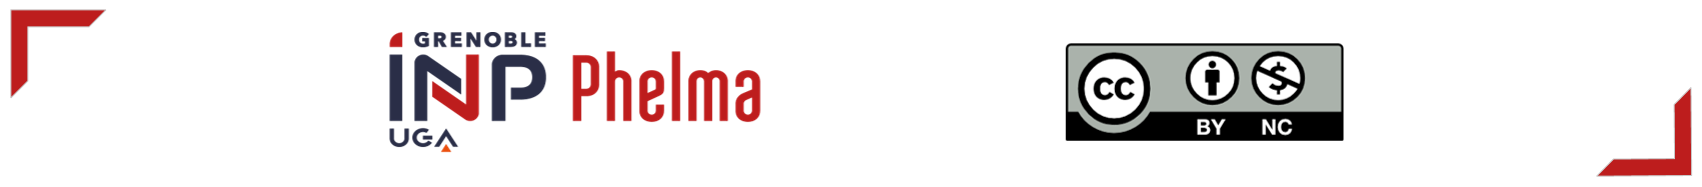</a>